In [1]:
import os
import re
import json
import copy
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
# data frame skeletons to parse and plot using pandas
# *ts is denoted as nano seconds, the timestamp collected is: `time.Now().UnixNano()`

ttprList = {
    "barrierbootstrapping0": {
        "val": [],
        "ts": []
    },
    "barrierprovider-records1": {
        "val": [],
        "ts": []
    },
    "barrierprovider-records2": {
        "val": [],
        "ts": []
    },
    "full-bootstrapping0": {
        "val": [],
        "ts": []
    },
    "full-provider-records1": {
        "val": [],
        "ts": []
    },
    "full-provider-records2": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|0": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|1": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|10": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|11": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|12": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|13": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|14": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|15": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|16": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|17": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|18": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|19": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|2": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|20": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|21": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|22": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|23": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|24": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|25": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|26": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|27": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|28": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|29": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|3": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|30": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|31": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|32": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|33": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|34": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|35": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|36": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|37": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|38": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|39": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|4": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|5": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|6": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|7": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|8": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|9": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|0": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|1": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|10": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|11": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|12": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|13": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|14": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|15": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|16": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|17": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|18": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|19": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|2": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|20": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|21": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|22": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|23": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|24": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|25": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|26": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|27": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|28": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|29": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|3": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|30": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|31": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|32": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|33": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|34": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|35": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|36": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|37": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|38": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|39": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|4": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|5": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|6": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|7": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|8": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|9": {
        "val": [],
        "ts": []
    },
    "signal-bootstrapping0": {
        "val": [],
        "ts": []
    },
    "signal-provider-records1": {
        "val": [],
        "ts": []
    },
    "signal-provider-records2": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|0": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|1": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|10": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|11": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|12": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|13": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|14": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|15": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|16": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|17": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|18": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|19": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|2": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|20": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|21": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|22": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|23": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|24": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|25": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|26": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|27": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|28": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|29": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|3": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|30": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|31": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|32": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|33": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|34": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|35": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|36": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|37": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|38": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|39": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|4": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|5": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|6": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|7": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|8": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|9": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|0": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|1": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|10": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|11": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|12": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|13": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|14": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|15": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|16": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|17": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|18": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|19": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|2": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|20": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|21": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|22": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|23": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|24": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|25": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|26": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|27": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|28": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|29": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|3": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|30": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|31": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|32": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|33": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|34": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|35": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|36": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|37": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|38": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|39": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|4": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|5": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|6": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|7": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|8": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|9": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|0": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|1": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|10": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|11": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|12": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|13": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|14": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|15": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|16": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|17": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|18": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|19": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|2": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|20": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|21": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|22": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|23": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|24": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|25": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|26": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|27": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|28": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|29": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|3": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|30": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|31": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|32": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|33": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|34": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|35": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|36": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|37": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|38": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|39": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|4": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|5": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|6": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|7": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|8": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|9": {
        "val": [],
        "ts": []
    },
    "time-to-provide-0": {
        "val": [],
        "ts": []
    },
    "time-to-provide-1": {
        "val": [],
        "ts": []
    },
    "time-to-provide-10": {
        "val": [],
        "ts": []
    },
    "time-to-provide-11": {
        "val": [],
        "ts": []
    },
    "time-to-provide-12": {
        "val": [],
        "ts": []
    },
    "time-to-provide-13": {
        "val": [],
        "ts": []
    },
    "time-to-provide-14": {
        "val": [],
        "ts": []
    },
    "time-to-provide-15": {
        "val": [],
        "ts": []
    },
    "time-to-provide-16": {
        "val": [],
        "ts": []
    },
    "time-to-provide-17": {
        "val": [],
        "ts": []
    },
    "time-to-provide-18": {
        "val": [],
        "ts": []
    },
    "time-to-provide-19": {
        "val": [],
        "ts": []
    },
    "time-to-provide-2": {
        "val": [],
        "ts": []
    },
    "time-to-provide-20": {
        "val": [],
        "ts": []
    },
    "time-to-provide-21": {
        "val": [],
        "ts": []
    },
    "time-to-provide-22": {
        "val": [],
        "ts": []
    },
    "time-to-provide-23": {
        "val": [],
        "ts": []
    },
    "time-to-provide-24": {
        "val": [],
        "ts": []
    },
    "time-to-provide-25": {
        "val": [],
        "ts": []
    },
    "time-to-provide-26": {
        "val": [],
        "ts": []
    },
    "time-to-provide-27": {
        "val": [],
        "ts": []
    },
    "time-to-provide-28": {
        "val": [],
        "ts": []
    },
    "time-to-provide-29": {
        "val": [],
        "ts": []
    },
    "time-to-provide-3": {
        "val": [],
        "ts": []
    },
    "time-to-provide-30": {
        "val": [],
        "ts": []
    },
    "time-to-provide-31": {
        "val": [],
        "ts": []
    },
    "time-to-provide-32": {
        "val": [],
        "ts": []
    },
    "time-to-provide-33": {
        "val": [],
        "ts": []
    },
    "time-to-provide-34": {
        "val": [],
        "ts": []
    },
    "time-to-provide-35": {
        "val": [],
        "ts": []
    },
    "time-to-provide-36": {
        "val": [],
        "ts": []
    },
    "time-to-provide-37": {
        "val": [],
        "ts": []
    },
    "time-to-provide-38": {
        "val": [],
        "ts": []
    },
    "time-to-provide-39": {
        "val": [],
        "ts": []
    },
    "time-to-provide-4": {
        "val": [],
        "ts": []
    },
    "time-to-provide-5": {
        "val": [],
        "ts": []
    },
    "time-to-provide-6": {
        "val": [],
        "ts": []
    },
    "time-to-provide-7": {
        "val": [],
        "ts": []
    },
    "time-to-provide-8": {
        "val": [],
        "ts": []
    },
    "time-to-provide-9": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|0": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|1": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|10": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|11": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|12": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|13": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|14": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|15": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|16": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|17": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|18": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|19": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|2": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|20": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|21": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|22": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|23": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|24": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|25": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|26": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|27": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|28": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|29": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|3": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|30": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|31": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|32": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|33": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|34": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|35": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|36": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|37": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|38": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|39": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|4": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|5": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|6": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|7": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|8": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|9": {
        "val": [],
        "ts": []
    }
}

bandwidthStats = {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "tsRateOut": []
}

nodeCpuUsage = {
    "node0": [],
    "node1": [],
    "node2": [],
    "node3": [],
    "node4": [],
    "node5": [],
    "node6": [],
    "node7": [],
    "node8": [],
    "node9": [],
    "node10": [],
    "node11": [],
    "node12": [],
    "node13": [],
    "node14": [],
    "node15": [],
    "node16": [],
    "node17": [],
    "node18": [],
    "node19": [],
    "node20": [],
    "node21": [],
    "node22": [],
    "node23": [],
    "node24": [],
    "node25": [],
    "node26": [],
    "node27": [],
    "node28": [],
    "node29": [],
    "node30": [],
    "node31": [],
    "node32": [],
    "node33": [],
    "node34": [],
    "node35": [],
    "node36": [],
    "node37": [],
    "node38": [],
    "node39": []
}

diagnosticsList = {
    "EnableGC": {
        "val": [],
        "ts": []
    },
    "HeapAlloc": {
        "val": [],
        "ts": []
    },
    "LastGC": {
        "val": [],
        "ts": []
    },
    "NumGC": {
        "val": [],
        "ts": []
    },
    "MCacheSys": {
        "val": [],
        "ts": []
    },
#     "PauseNs": [],
    "StackSys": {
        "val": [],
        "ts": []
    },
#     "ReadMemStats": [],
    "StackInuse": {
        "val": [],
        "ts": []
    },
    "Sys": {
        "val": [],
        "ts": []
    },
    "NumThread": {
        "val": [],
        "ts": []
    },
    "HeapIdle": {
        "val": [],
        "ts": []
    },
    "HeapInuse": {
        "val": [],
        "ts": []
    },
    "Lookups": {
        "val": [],
        "ts": []
    },
    "MSpanInuse": {
        "val": [],
        "ts": []
    },
    "Frees": {
        "val": [],
        "ts": []
    },
    "NextGC": {
        "val": [],
        "ts": []
    },
    "NumCgoCall": {
        "val": [],
        "ts": []
    },
    "PauseTotalNs": {
        "val": [],
        "ts": []
    },
    "NumGoroutine": {
        "val": [],
        "ts": []
    },
    "BuckHashSys": {
        "val": [],
        "ts": []
    },
    "HeapObjects": {
        "val": [],
        "ts": []
    },
    "GCCPUFraction": {
        "val": [],
        "ts": []
    },
    "TotalAlloc": {
        "val": [],
        "ts": []
    },
    "DebugGC": {
        "val": [],
        "ts": []
    },
    "HeapReleased": {
        "val": [],
        "ts": []
    },
    "HeapSys": {
        "val": [],
        "ts": []
    },
    "MCacheInuse": {
        "val": [],
        "ts": []
    },
    "Alloc": {
        "val": [],
        "ts": []
    },
    "Mallocs": {
        "val": [],
        "ts": []
    },
    "MSpanSys": {
        "val": [],
        "ts": []
    },
    "pauseNs": {
        "ts": [],
        "count" : [],
        "max": [],
        "mean": [],
        "min": [],
        "p50": [],
        "p75": [],
        "p95": [],
        "p99": [],
        "p999": [],
        "p9999": [],
        "stddev": [],
        "variance": []
    },
    "readMemStats": {
        "ts": [],
        "count" : [],
        "m1": [],
        "m15": [],
        "m5": [],
        "max": [],
        "mean": [],
        "meanrate": [],
        "min": [],
        "p50": [],
        "p75": [],
        "p95": [],
        "p99": [],
        "p999": [],
        "p9999": [],
        "stddev": [],
        "variance": []
    }
}


# convenience methods
def resetListVars():
    global diagnosticsList
    diagnosticsList = {
        "EnableGC": {
            "val": [],
            "ts": []
        },
        "HeapAlloc": {
            "val": [],
            "ts": []
        },
        "LastGC": {
            "val": [],
            "ts": []
        },
        "NumGC": {
            "val": [],
            "ts": []
        },
        "MCacheSys": {
            "val": [],
            "ts": []
        },
    #     "PauseNs": [],
        "StackSys": {
            "val": [],
            "ts": []
        },
    #     "ReadMemStats": [],
        "StackInuse": {
            "val": [],
            "ts": []
        },
        "Sys": {
            "val": [],
            "ts": []
        },
        "NumThread": {
            "val": [],
            "ts": []
        },
        "HeapIdle": {
            "val": [],
            "ts": []
        },
        "HeapInuse": {
            "val": [],
            "ts": []
        },
        "Lookups": {
            "val": [],
            "ts": []
        },
        "MSpanInuse": {
            "val": [],
            "ts": []
        },
        "Frees": {
            "val": [],
            "ts": []
        },
        "NextGC": {
            "val": [],
            "ts": []
        },
        "NumCgoCall": {
            "val": [],
            "ts": []
        },
        "PauseTotalNs": {
            "val": [],
            "ts": []
        },
        "NumGoroutine": {
            "val": [],
            "ts": []
        },
        "BuckHashSys": {
            "val": [],
            "ts": []
        },
        "HeapObjects": {
            "val": [],
            "ts": []
        },
        "GCCPUFraction": {
            "val": [],
            "ts": []
        },
        "TotalAlloc": {
            "val": [],
            "ts": []
        },
        "DebugGC": {
            "val": [],
            "ts": []
        },
        "HeapReleased": {
            "val": [],
            "ts": []
        },
        "HeapSys": {
            "val": [],
            "ts": []
        },
        "MCacheInuse": {
            "val": [],
            "ts": []
        },
        "Alloc": {
            "val": [],
            "ts": []
        },
        "Mallocs": {
            "val": [],
            "ts": []
        },
        "MSpanSys": {
            "val": [],
            "ts": []
        },
        "pauseNs": {
            "ts": [],
            "count" : [],
            "max": [],
            "mean": [],
            "min": [],
            "p50": [],
            "p75": [],
            "p95": [],
            "p99": [],
            "p999": [],
            "p9999": [],
            "stddev": [],
            "variance": []
        },
        "readMemStats": {
            "ts": [],
            "count" : [],
            "m1": [],
            "m15": [],
            "m5": [],
            "max": [],
            "mean": [],
            "meanrate": [],
            "min": [],
            "p50": [],
            "p75": [],
            "p95": [],
            "p99": [],
            "p999": [],
            "p9999": [],
            "stddev": [],
            "variance": []
        }
    }
    return

# convenience methods
def resetTtprList():
    global ttprList
    ttprList = {
        "barrierbootstrapping0": {
            "val": [],
            "ts": []
        },
        "barrierprovider-records1": {
            "val": [],
            "ts": []
        },
        "barrierprovider-records2": {
            "val": [],
            "ts": []
        },
        "full-bootstrapping0": {
            "val": [],
            "ts": []
        },
        "full-provider-records1": {
            "val": [],
            "ts": []
        },
        "full-provider-records2": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|0": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|1": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|10": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|11": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|12": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|13": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|14": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|15": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|16": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|17": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|18": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|19": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|2": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|20": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|21": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|22": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|23": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|24": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|25": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|26": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|27": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|28": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|29": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|3": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|30": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|31": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|32": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|33": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|34": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|35": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|36": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|37": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|38": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|39": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|4": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|5": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|6": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|7": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|8": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|9": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|0": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|1": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|10": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|11": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|12": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|13": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|14": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|15": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|16": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|17": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|18": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|19": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|2": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|20": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|21": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|22": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|23": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|24": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|25": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|26": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|27": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|28": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|29": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|3": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|30": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|31": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|32": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|33": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|34": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|35": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|36": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|37": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|38": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|39": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|4": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|5": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|6": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|7": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|8": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|9": {
            "val": [],
            "ts": []
        },
        "signal-bootstrapping0": {
            "val": [],
            "ts": []
        },
        "signal-provider-records1": {
            "val": [],
            "ts": []
        },
        "signal-provider-records2": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|0": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|1": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|10": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|11": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|12": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|13": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|14": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|15": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|16": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|17": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|18": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|19": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|2": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|20": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|21": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|22": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|23": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|24": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|25": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|26": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|27": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|28": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|29": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|3": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|30": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|31": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|32": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|33": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|34": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|35": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|36": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|37": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|38": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|39": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|4": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|5": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|6": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|7": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|8": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|9": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|0": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|1": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|10": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|11": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|12": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|13": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|14": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|15": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|16": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|17": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|18": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|19": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|2": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|20": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|21": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|22": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|23": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|24": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|25": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|26": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|27": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|28": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|29": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|3": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|30": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|31": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|32": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|33": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|34": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|35": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|36": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|37": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|38": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|39": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|4": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|5": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|6": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|7": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|8": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|9": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|0": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|1": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|10": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|11": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|12": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|13": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|14": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|15": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|16": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|17": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|18": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|19": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|2": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|20": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|21": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|22": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|23": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|24": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|25": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|26": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|27": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|28": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|29": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|3": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|30": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|31": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|32": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|33": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|34": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|35": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|36": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|37": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|38": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|39": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|4": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|5": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|6": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|7": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|8": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|9": {
            "val": [],
            "ts": []
        },
        "time-to-provide-0": {
            "val": [],
            "ts": []
        },
        "time-to-provide-1": {
            "val": [],
            "ts": []
        },
        "time-to-provide-10": {
            "val": [],
            "ts": []
        },
        "time-to-provide-11": {
            "val": [],
            "ts": []
        },
        "time-to-provide-12": {
            "val": [],
            "ts": []
        },
        "time-to-provide-13": {
            "val": [],
            "ts": []
        },
        "time-to-provide-14": {
            "val": [],
            "ts": []
        },
        "time-to-provide-15": {
            "val": [],
            "ts": []
        },
        "time-to-provide-16": {
            "val": [],
            "ts": []
        },
        "time-to-provide-17": {
            "val": [],
            "ts": []
        },
        "time-to-provide-18": {
            "val": [],
            "ts": []
        },
        "time-to-provide-19": {
            "val": [],
            "ts": []
        },
        "time-to-provide-2": {
            "val": [],
            "ts": []
        },
        "time-to-provide-20": {
            "val": [],
            "ts": []
        },
        "time-to-provide-21": {
            "val": [],
            "ts": []
        },
        "time-to-provide-22": {
            "val": [],
            "ts": []
        },
        "time-to-provide-23": {
            "val": [],
            "ts": []
        },
        "time-to-provide-24": {
            "val": [],
            "ts": []
        },
        "time-to-provide-25": {
            "val": [],
            "ts": []
        },
        "time-to-provide-26": {
            "val": [],
            "ts": []
        },
        "time-to-provide-27": {
            "val": [],
            "ts": []
        },
        "time-to-provide-28": {
            "val": [],
            "ts": []
        },
        "time-to-provide-29": {
            "val": [],
            "ts": []
        },
        "time-to-provide-3": {
            "val": [],
            "ts": []
        },
        "time-to-provide-30": {
            "val": [],
            "ts": []
        },
        "time-to-provide-31": {
            "val": [],
            "ts": []
        },
        "time-to-provide-32": {
            "val": [],
            "ts": []
        },
        "time-to-provide-33": {
            "val": [],
            "ts": []
        },
        "time-to-provide-34": {
            "val": [],
            "ts": []
        },
        "time-to-provide-35": {
            "val": [],
            "ts": []
        },
        "time-to-provide-36": {
            "val": [],
            "ts": []
        },
        "time-to-provide-37": {
            "val": [],
            "ts": []
        },
        "time-to-provide-38": {
            "val": [],
            "ts": []
        },
        "time-to-provide-39": {
            "val": [],
            "ts": []
        },
        "time-to-provide-4": {
            "val": [],
            "ts": []
        },
        "time-to-provide-5": {
            "val": [],
            "ts": []
        },
        "time-to-provide-6": {
            "val": [],
            "ts": []
        },
        "time-to-provide-7": {
            "val": [],
            "ts": []
        },
        "time-to-provide-8": {
            "val": [],
            "ts": []
        },
        "time-to-provide-9": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|0": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|1": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|10": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|11": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|12": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|13": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|14": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|15": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|16": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|17": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|18": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|19": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|2": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|20": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|21": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|22": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|23": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|24": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|25": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|26": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|27": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|28": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|29": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|3": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|30": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|31": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|32": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|33": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|34": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|35": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|36": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|37": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|38": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|39": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|4": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|5": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|6": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|7": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|8": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|9": {
            "val": [],
            "ts": []
        }
    }
    return

def resetBandwidthStats():
    global bandwidthStats
    bandwidthStats = {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "tsRateOut": []
    }
    return

def resetCpuUsage():
    global nodeCpuUsage
    nodeCpuUsage = {
    "node0": [],
    "node1": [],
    "node2": [],
    "node3": [],
    "node4": [],
    "node5": [],
    "node6": [],
    "node7": [],
    "node8": [],
    "node9": [],
    "node10": [],
    "node11": [],
    "node12": [],
    "node13": [],
    "node14": [],
    "node15": [],
    "node16": [],
    "node17": [],
    "node18": [],
    "node19": [],
    "node20": [],
    "node21": [],
    "node22": [],
    "node23": [],
    "node24": [],
    "node25": [],
    "node26": [],
    "node27": [],
    "node28": [],
    "node29": [],
    "node30": [],
    "node31": [],
    "node32": [],
    "node33": [],
    "node34": [],
    "node35": [],
    "node36": [],
    "node37": [],
    "node38": [],
    "node39": []
#     "node40": [],
#     "node41": [],
#     "node42": [],
#     "node43": [],
#     "node44": [],
#     "node45": [],
#     "node46": [],
#     "node47": [],
#     "node48": [],
#     "node49": []
}

def resetBandwidthStatsList():
    global bandwidthStatsList
    bandwidthStatsList = []
    return

def resetNodeDiagnostics():
    global nodeDiagnostics
    nodeDiagnostics = []
    return


In [3]:
bandwidthStatsList = []
### Parser and data collection sorting for file: results.out
def parseResults(runId, path, filename, numNodes):
    for i in range(nodeNum):
#         print(path+str(i)+filename)
        with open(path+str(i)+filename, 'r') as f:
            lines = f.readlines()
        #     print(len(lines))
            for j in range(len(lines)):
#                 print(lines[j])
                l = json.loads(lines[j])
#                 print(l["name"])
#                 print(l["measures"]["value"])
                # let's make a new dictionary for the values loaded by the files
                # compile everything into one array
                # be able to easily read the file and run calculations for the run tests
                if l["name"] == "barrierbootstrapping0":
                    ttprList["barrierbootstrapping0"]["val"].append(l["measures"]["value"])
                    ttprList["barrierbootstrapping0"]["ts"].append(l["ts"])
                elif l["name"] == "barrierprovider-records1":
                    ttprList["barrierprovider-records1"]["val"].append(l["measures"]["value"])
                    ttprList["barrierprovider-records1"]["ts"].append(l["ts"])
                elif l["name"] == "barrierprovider-records2":
                    ttprList["barrierprovider-records2"]["val"].append(l["measures"]["value"])
                    ttprList["barrierprovider-records2"]["ts"].append(l["ts"])
                elif l["name"] == "full bootstrapping0":
                    ttprList["full-bootstrapping0"]["val"].append(l["measures"]["value"])
                    ttprList["full-bootstrapping0"]["ts"].append(l["ts"])
                elif l["name"] == "full provider-records1":
                    ttprList["full-provider-records1"]["val"].append(l["measures"]["value"])
                    ttprList["full-provider-records1"]["ts"].append(l["ts"])
                elif l["name"] == "full provider-records2":
                    ttprList["full-provider-records2"]["val"].append(l["measures"]["value"])
                    ttprList["full-provider-records2"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|0":
                    ttprList["peers-found|done|cypress-provider|0"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|0"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|1":
                    ttprList["peers-found|done|cypress-provider|1"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|1"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|10":
                    ttprList["peers-found|done|cypress-provider|10"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|10"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|11":
                    ttprList["peers-found|done|cypress-provider|11"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|11"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|12":
                    ttprList["peers-found|done|cypress-provider|12"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|12"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|13":
                    ttprList["peers-found|done|cypress-provider|13"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|13"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|14":
                    ttprList["peers-found|done|cypress-provider|14"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|14"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|15":
                    ttprList["peers-found|done|cypress-provider|15"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|15"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|16":
                    ttprList["peers-found|done|cypress-provider|16"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|16"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|17":
                    ttprList["peers-found|done|cypress-provider|17"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|17"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|18":
                    ttprList["peers-found|done|cypress-provider|18"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|18"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|19":
                    ttprList["peers-found|done|cypress-provider|19"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|19"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|2":
                    ttprList["peers-found|done|cypress-provider|2"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|2"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|20":
                    ttprList["peers-found|done|cypress-provider|20"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|20"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|21":
                    ttprList["peers-found|done|cypress-provider|21"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|21"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|22":
                    ttprList["peers-found|done|cypress-provider|22"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|22"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|23":
                    ttprList["peers-found|done|cypress-provider|23"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|23"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|24":
                    ttprList["peers-found|done|cypress-provider|24"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|24"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|25":
                    ttprList["peers-found|done|cypress-provider|25"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|25"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|26":
                    ttprList["peers-found|done|cypress-provider|26"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|26"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|27":
                    ttprList["peers-found|done|cypress-provider|27"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|27"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|28":
                    ttprList["peers-found|done|cypress-provider|28"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|28"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|29":
                    ttprList["peers-found|done|cypress-provider|29"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|29"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|3":
                    ttprList["peers-found|done|cypress-provider|3"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|3"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|30":
                    ttprList["peers-found|done|cypress-provider|30"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|30"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|31":
                    ttprList["peers-found|done|cypress-provider|31"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|31"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|32":
                    ttprList["peers-found|done|cypress-provider|32"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|32"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|33":
                    ttprList["peers-found|done|cypress-provider|33"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|33"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|34":
                    ttprList["peers-found|done|cypress-provider|34"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|34"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|35":
                    ttprList["peers-found|done|cypress-provider|35"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|35"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|36":
                    ttprList["peers-found|done|cypress-provider|36"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|36"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|37":
                    ttprList["peers-found|done|cypress-provider|37"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|37"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|38":
                    ttprList["peers-found|done|cypress-provider|38"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|38"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|39":
                    ttprList["peers-found|done|cypress-provider|39"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|39"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|4":
                    ttprList["peers-found|done|cypress-provider|4"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|4"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|5":
                    ttprList["peers-found|done|cypress-provider|5"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|5"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|6":
                    ttprList["peers-found|done|cypress-provider|6"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|6"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|7":
                    ttprList["peers-found|done|cypress-provider|7"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|7"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|8":
                    ttprList["peers-found|done|cypress-provider|8"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|8"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|9":
                    ttprList["peers-found|done|cypress-provider|9"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|9"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|0":
                    ttprList["peers-missing|done|cypress-provider|0"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|0"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|1":
                    ttprList["peers-missing|done|cypress-provider|1"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|1"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|10":
                    ttprList["peers-missing|done|cypress-provider|10"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|10"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|11":
                    ttprList["peers-missing|done|cypress-provider|11"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|11"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|12":
                    ttprList["peers-missing|done|cypress-provider|12"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|12"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|13":
                    ttprList["peers-missing|done|cypress-provider|13"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|13"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|14":
                    ttprList["peers-missing|done|cypress-provider|14"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|14"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|15":
                    ttprList["peers-missing|done|cypress-provider|15"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|15"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|16":
                    ttprList["peers-missing|done|cypress-provider|16"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|16"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|17":
                    ttprList["peers-missing|done|cypress-provider|17"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|17"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|18":
                    ttprList["peers-missing|done|cypress-provider|18"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|18"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|19":
                    ttprList["peers-missing|done|cypress-provider|19"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|19"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|2":
                    ttprList["peers-missing|done|cypress-provider|2"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|2"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|20":
                    ttprList["peers-missing|done|cypress-provider|20"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|20"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|21":
                    ttprList["peers-missing|done|cypress-provider|21"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|21"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|22":
                    ttprList["peers-missing|done|cypress-provider|22"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|22"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|23":
                    ttprList["peers-missing|done|cypress-provider|23"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|23"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|24":
                    ttprList["peers-missing|done|cypress-provider|24"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|24"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|25":
                    ttprList["peers-missing|done|cypress-provider|25"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|25"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|26":
                    ttprList["peers-missing|done|cypress-provider|26"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|26"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|27":
                    ttprList["peers-missing|done|cypress-provider|27"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|27"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|28":
                    ttprList["peers-missing|done|cypress-provider|28"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|28"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|29":
                    ttprList["peers-missing|done|cypress-provider|29"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|29"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|3":
                    ttprList["peers-missing|done|cypress-provider|3"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|3"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|30":
                    ttprList["peers-missing|done|cypress-provider|30"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|30"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|31":
                    ttprList["peers-missing|done|cypress-provider|31"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|31"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|32":
                    ttprList["peers-missing|done|cypress-provider|32"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|32"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|33":
                    ttprList["peers-missing|done|cypress-provider|33"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|33"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|33":
                    ttprList["peers-missing|done|cypress-provider|33"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|33"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|34":
                    ttprList["peers-missing|done|cypress-provider|34"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|34"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|35":
                    ttprList["peers-missing|done|cypress-provider|35"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|35"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|36":
                    ttprList["peers-missing|done|cypress-provider|36"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|36"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|37":
                    ttprList["peers-missing|done|cypress-provider|37"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|37"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|38":
                    ttprList["peers-missing|done|cypress-provider|38"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|38"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|39":
                    ttprList["peers-missing|done|cypress-provider|39"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|39"]["ts"].append(l["ts"])                
                elif l["name"] == "peers-missing|done|cypress-provider|4":
                    ttprList["peers-missing|done|cypress-provider|4"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|4"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|5":
                    ttprList["peers-missing|done|cypress-provider|5"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|5"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|6":
                    ttprList["peers-missing|done|cypress-provider|6"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|6"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|7":
                    ttprList["peers-missing|done|cypress-provider|7"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|7"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|8":
                    ttprList["peers-missing|done|cypress-provider|8"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|8"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|9":
                    ttprList["peers-missing|done|cypress-provider|9"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|9"]["ts"].append(l["ts"])
                elif l["name"] == "signal bootstrapping0":
                    ttprList["signal-bootstrapping0"]["val"].append(l["measures"]["value"])
                    ttprList["signal-bootstrapping0"]["ts"].append(l["ts"])
                elif l["name"] == "signal provider-records1":
                    ttprList["signal-provider-records1"]["val"].append(l["measures"]["value"])
                    ttprList["signal-provider-records1"]["ts"].append(l["ts"])
                elif l["name"] == "signal provider-records2":
                    ttprList["signal-provider-records2"]["val"].append(l["measures"]["value"])
                    ttprList["signal-provider-records2"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|0":
                    ttprList["time-to-find-first|cypress-provider|0"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|0"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|1":
                    ttprList["time-to-find-first|cypress-provider|1"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|1"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|10":
                    ttprList["time-to-find-first|cypress-provider|10"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|10"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|11":
                    ttprList["time-to-find-first|cypress-provider|11"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|11"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|12":
                    ttprList["time-to-find-first|cypress-provider|12"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|12"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|13":
                    ttprList["time-to-find-first|cypress-provider|13"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|13"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|14":
                    ttprList["time-to-find-first|cypress-provider|14"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|14"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|15":
                    ttprList["time-to-find-first|cypress-provider|15"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|15"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|16":
                    ttprList["time-to-find-first|cypress-provider|16"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|16"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|17":
                    ttprList["time-to-find-first|cypress-provider|17"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|17"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|18":
                    ttprList["time-to-find-first|cypress-provider|18"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|18"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|19":
                    ttprList["time-to-find-first|cypress-provider|19"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|19"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|2":
                    ttprList["time-to-find-first|cypress-provider|2"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|2"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|20":
                    ttprList["time-to-find-first|cypress-provider|20"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|20"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|21":
                    ttprList["time-to-find-first|cypress-provider|21"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|21"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|22":
                    ttprList["time-to-find-first|cypress-provider|22"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|22"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|23":
                    ttprList["time-to-find-first|cypress-provider|23"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|23"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|24":
                    ttprList["time-to-find-first|cypress-provider|24"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|24"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|25":
                    ttprList["time-to-find-first|cypress-provider|25"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|25"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|26":
                    ttprList["time-to-find-first|cypress-provider|26"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|26"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|27":
                    ttprList["time-to-find-first|cypress-provider|27"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|27"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|28":
                    ttprList["time-to-find-first|cypress-provider|28"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|28"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|29":
                    ttprList["time-to-find-first|cypress-provider|29"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|29"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|3":
                    ttprList["time-to-find-first|cypress-provider|3"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|3"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|30":
                    ttprList["time-to-find-first|cypress-provider|30"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|30"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|31":
                    ttprList["time-to-find-first|cypress-provider|31"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|31"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|32":
                    ttprList["time-to-find-first|cypress-provider|32"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|32"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|33":
                    ttprList["time-to-find-first|cypress-provider|33"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|33"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|33":
                    ttprList["time-to-find-first|cypress-provider|33"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|33"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|34":
                    ttprList["time-to-find-first|cypress-provider|34"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|34"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|35":
                    ttprList["time-to-find-first|cypress-provider|35"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|35"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|36":
                    ttprList["time-to-find-first|cypress-provider|36"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|36"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|37":
                    ttprList["time-to-find-first|cypress-provider|37"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|37"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|38":
                    ttprList["time-to-find-first|cypress-provider|38"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|38"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|39":
                    ttprList["time-to-find-first|cypress-provider|39"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|39"]["ts"].append(l["ts"])                
                elif l["name"] == "time-to-find-first|cypress-provider|20":
                    ttprList["time-to-find-first|cypress-provider|20"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|20"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|21":
                    ttprList["time-to-find-first|cypress-provider|21"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|21"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|22":
                    ttprList["time-to-find-first|cypress-provider|22"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|22"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|23":
                    ttprList["time-to-find-first|cypress-provider|23"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|23"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|24":
                    ttprList["time-to-find-first|cypress-provider|24"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|24"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|25":
                    ttprList["time-to-find-first|cypress-provider|25"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|25"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|26":
                    ttprList["time-to-find-first|cypress-provider|26"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|26"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|27":
                    ttprList["time-to-find-first|cypress-provider|27"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|27"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|28":
                    ttprList["time-to-find-first|cypress-provider|28"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|28"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|29":
                    ttprList["time-to-find-first|cypress-provider|29"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|29"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|3":
                    ttprList["time-to-find-first|cypress-provider|3"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|3"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|30":
                    ttprList["time-to-find-first|cypress-provider|30"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|30"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|31":
                    ttprList["time-to-find-first|cypress-provider|31"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|31"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|33":
                    ttprList["time-to-find-first|cypress-provider|33"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|33"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|33":
                    ttprList["time-to-find-first|cypress-provider|33"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|33"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|34":
                    ttprList["time-to-find-first|cypress-provider|34"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|34"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|35":
                    ttprList["time-to-find-first|cypress-provider|35"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|35"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|36":
                    ttprList["time-to-find-first|cypress-provider|36"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|36"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|37":
                    ttprList["time-to-find-first|cypress-provider|37"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|37"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|38":
                    ttprList["time-to-find-first|cypress-provider|38"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|38"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|39":
                    ttprList["time-to-find-first|cypress-provider|39"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|39"]["ts"].append(l["ts"])                
                elif l["name"] == "time-to-find-first|cypress-provider|4":
                    ttprList["time-to-find-first|cypress-provider|4"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|4"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|5":
                    ttprList["time-to-find-first|cypress-provider|5"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|5"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|6":
                    ttprList["time-to-find-first|cypress-provider|6"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|6"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|7":
                    ttprList["time-to-find-first|cypress-provider|7"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|7"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|8":
                    ttprList["time-to-find-first|cypress-provider|8"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|8"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|9":
                    ttprList["time-to-find-first|cypress-provider|9"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|9"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|0":
                    ttprList["time-to-find-last|done|cypress-provider|0"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|0"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|1":
                    ttprList["time-to-find-last|done|cypress-provider|1"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|1"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|10":
                    ttprList["time-to-find-last|done|cypress-provider|10"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|10"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|11":
                    ttprList["time-to-find-last|done|cypress-provider|11"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|11"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|12":
                    ttprList["time-to-find-last|done|cypress-provider|12"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|12"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|13":
                    ttprList["time-to-find-last|done|cypress-provider|13"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|13"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|14":
                    ttprList["time-to-find-last|done|cypress-provider|14"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|14"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|15":
                    ttprList["time-to-find-last|done|cypress-provider|15"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|15"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|16":
                    ttprList["time-to-find-last|done|cypress-provider|16"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|16"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|17":
                    ttprList["time-to-find-last|done|cypress-provider|17"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|17"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|18":
                    ttprList["time-to-find-last|done|cypress-provider|18"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|18"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|19":
                    ttprList["time-to-find-last|done|cypress-provider|19"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|19"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|2":
                    ttprList["time-to-find-last|done|cypress-provider|2"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|2"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|20":
                    ttprList["time-to-find-last|done|cypress-provider|20"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|20"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|21":
                    ttprList["time-to-find-last|done|cypress-provider|21"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|21"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|22":
                    ttprList["time-to-find-last|done|cypress-provider|22"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|22"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|23":
                    ttprList["time-to-find-last|done|cypress-provider|23"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|23"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|24":
                    ttprList["time-to-find-last|done|cypress-provider|24"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|24"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|25":
                    ttprList["time-to-find-last|done|cypress-provider|25"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|25"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|26":
                    ttprList["time-to-find-last|done|cypress-provider|26"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|26"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|27":
                    ttprList["time-to-find-last|done|cypress-provider|27"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|27"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|28":
                    ttprList["time-to-find-last|done|cypress-provider|28"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|28"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|29":
                    ttprList["time-to-find-last|done|cypress-provider|29"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|29"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|3":
                    ttprList["time-to-find-last|done|cypress-provider|3"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|3"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|30":
                    ttprList["time-to-find-last|done|cypress-provider|30"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|30"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|31":
                    ttprList["time-to-find-last|done|cypress-provider|31"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|31"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|32":
                    ttprList["time-to-find-last|done|cypress-provider|32"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|32"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|33":
                    ttprList["time-to-find-last|done|cypress-provider|33"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|33"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|33":
                    ttprList["time-to-find-last|done|cypress-provider|33"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|33"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|34":
                    ttprList["time-to-find-last|done|cypress-provider|34"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|34"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|35":
                    ttprList["time-to-find-last|done|cypress-provider|35"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|35"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|36":
                    ttprList["time-to-find-last|done|cypress-provider|36"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|36"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|37":
                    ttprList["time-to-find-last|done|cypress-provider|37"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|37"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|38":
                    ttprList["time-to-find-last|done|cypress-provider|38"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|38"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|39":
                    ttprList["time-to-find-last|done|cypress-provider|39"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|39"]["ts"].append(l["ts"])                
                elif l["name"] == "time-to-find-last|done|cypress-provider|4":
                    ttprList["time-to-find-last|done|cypress-provider|4"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|4"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|5":
                    ttprList["time-to-find-last|done|cypress-provider|5"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|5"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|6":
                    ttprList["time-to-find-last|done|cypress-provider|6"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|6"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|7":
                    ttprList["time-to-find-last|done|cypress-provider|7"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|7"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|8":
                    ttprList["time-to-find-last|done|cypress-provider|8"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|8"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|9":
                    ttprList["time-to-find-last|done|cypress-provider|9"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|9"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|0":
                    ttprList["time-to-find|done|cypress-provider|0"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|0"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|1":
                    ttprList["time-to-find|done|cypress-provider|1"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|1"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|10":
                    ttprList["time-to-find|done|cypress-provider|10"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|10"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|11":
                    ttprList["time-to-find|done|cypress-provider|11"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|11"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|12":
                    ttprList["time-to-find|done|cypress-provider|12"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|12"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|13":
                    ttprList["time-to-find|done|cypress-provider|13"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|13"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|14":
                    ttprList["time-to-find|done|cypress-provider|14"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|14"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|15":
                    ttprList["time-to-find|done|cypress-provider|15"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|15"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|16":
                    ttprList["time-to-find|done|cypress-provider|16"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|16"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|17":
                    ttprList["time-to-find|done|cypress-provider|17"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|17"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|18":
                    ttprList["time-to-find|done|cypress-provider|18"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|18"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|19":
                    ttprList["time-to-find|done|cypress-provider|19"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|19"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|0":
                    ttprList["time-to-find|done|cypress-provider|0"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|0"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|1":
                    ttprList["time-to-find|done|cypress-provider|1"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|1"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|2":
                    ttprList["time-to-find|done|cypress-provider|2"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|2"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|20":
                    ttprList["time-to-find|done|cypress-provider|20"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|20"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|21":
                    ttprList["time-to-find|done|cypress-provider|21"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|21"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|22":
                    ttprList["time-to-find|done|cypress-provider|22"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|22"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|23":
                    ttprList["time-to-find|done|cypress-provider|23"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|23"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|24":
                    ttprList["time-to-find|done|cypress-provider|24"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|24"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|25":
                    ttprList["time-to-find|done|cypress-provider|25"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|25"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|26":
                    ttprList["time-to-find|done|cypress-provider|26"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|26"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|27":
                    ttprList["time-to-find|done|cypress-provider|27"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|27"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|28":
                    ttprList["time-to-find|done|cypress-provider|28"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|28"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|29":
                    ttprList["time-to-find|done|cypress-provider|29"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|29"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|3":
                    ttprList["time-to-find|done|cypress-provider|3"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|3"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|30":
                    ttprList["time-to-find|done|cypress-provider|30"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|30"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|31":
                    ttprList["time-to-find|done|cypress-provider|31"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|31"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|32":
                    ttprList["time-to-find|done|cypress-provider|32"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|32"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|33":
                    ttprList["time-to-find|done|cypress-provider|33"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|33"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|33":
                    ttprList["time-to-find|done|cypress-provider|33"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|33"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|34":
                    ttprList["time-to-find|done|cypress-provider|34"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|34"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|35":
                    ttprList["time-to-find|done|cypress-provider|35"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|35"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|36":
                    ttprList["time-to-find|done|cypress-provider|36"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|36"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|37":
                    ttprList["time-to-find|done|cypress-provider|37"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|37"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|38":
                    ttprList["time-to-find|done|cypress-provider|38"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|38"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|39":
                    ttprList["time-to-find|done|cypress-provider|39"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|39"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|4":
                    ttprList["time-to-find|done|cypress-provider|4"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|4"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|5":
                    ttprList["time-to-find|done|cypress-provider|5"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|5"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|6":
                    ttprList["time-to-find|done|cypress-provider|6"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|6"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|7":
                    ttprList["time-to-find|done|cypress-provider|7"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|7"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|8":
                    ttprList["time-to-find|done|cypress-provider|8"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|8"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|9":
                    ttprList["time-to-find|done|cypress-provider|9"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|9"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-0":
                    ttprList["time-to-provide-0"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-0"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-1":
                    ttprList["time-to-provide-1"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-1"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-10":
                    ttprList["time-to-provide-10"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-10"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-11":
                    ttprList["time-to-provide-11"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-11"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-12":
                    ttprList["time-to-provide-12"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-12"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-13":
                    ttprList["time-to-provide-13"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-13"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-14":
                    ttprList["time-to-provide-14"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-14"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-15":
                    ttprList["time-to-provide-15"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-15"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-16":
                    ttprList["time-to-provide-16"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-16"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-17":
                    ttprList["time-to-provide-17"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-17"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-18":
                    ttprList["time-to-provide-18"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-18"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-19":
                    ttprList["time-to-provide-19"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-19"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-2":
                    ttprList["time-to-provide-2"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-2"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-20":
#                     ttprList["time-to-provide-20"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-20"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-21":
#                     ttprList["time-to-provide-21"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-21"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-22":
#                     ttprList["time-to-provide-22"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-22"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-23":
#                     ttprList["time-to-provide-23"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-23"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-24":
#                     ttprList["time-to-provide-24"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-24"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-25":
#                     ttprList["time-to-provide-25"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-25"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-26":
#                     ttprList["time-to-provide-26"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-26"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-27":
#                     ttprList["time-to-provide-27"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-27"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-28":
#                     ttprList["time-to-provide-28"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-28"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-29":
#                     ttprList["time-to-provide-29"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-29"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-3":
                    ttprList["time-to-provide-3"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-3"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-30":
#                     ttprList["time-to-provide-30"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-30"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-31":
#                     ttprList["time-to-provide-31"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-31"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-32":
#                     ttprList["time-to-provide-32"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-32"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-33":
#                     ttprList["time-to-provide-33"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-33"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-33":
#                     ttprList["time-to-provide-33"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-33"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-34":
#                     ttprList["time-to-provide-34"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-34"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-35":
#                     ttprList["time-to-provide-35"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-35"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-36":
#                     ttprList["time-to-provide-36"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-36"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-37":
#                     ttprList["time-to-provide-37"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-37"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-38":
#                     ttprList["time-to-provide-38"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-38"]["ts"].append(l["ts"])
#                 elif l["name"] == "time-to-provide-39":
#                     ttprList["time-to-provide-39"]["val"].append(l["measures"]["value"])
#                     ttprList["time-to-provide-39"]["ts"].append(l["ts"])                
                elif l["name"] == "time-to-provide-4":
                    ttprList["time-to-provide-4"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-4"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-5":
                    ttprList["time-to-provide-5"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-5"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-6":
                    ttprList["time-to-provide-6"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-6"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-7":
                    ttprList["time-to-provide-7"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-7"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-8":
                    ttprList["time-to-provide-8"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-8"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-9":
                    ttprList["time-to-provide-9"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-9"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|0":
                    ttprList["num-hops|cypress-provider|0"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|0"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|1":
                    ttprList["num-hops|cypress-provider|1"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|1"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|2":
                    ttprList["num-hops|cypress-provider|2"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|2"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|20":
#                     ttprList["num-hops|cypress-provider|20"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|20"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|21":
#                     ttprList["num-hops|cypress-provider|21"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|21"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|22":
#                     ttprList["num-hops|cypress-provider|22"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|22"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|23":
#                     ttprList["num-hops|cypress-provider|23"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|23"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|24":
#                     ttprList["num-hops|cypress-provider|24"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|24"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|25":
#                     ttprList["num-hops|cypress-provider|25"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|25"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|26":
#                     ttprList["num-hops|cypress-provider|26"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|26"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|27":
#                     ttprList["num-hops|cypress-provider|27"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|27"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|28":
#                     ttprList["num-hops|cypress-provider|28"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|28"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|29":
#                     ttprList["num-hops|cypress-provider|29"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|29"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|3":
                    ttprList["num-hops|cypress-provider|3"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|3"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|30":
#                     ttprList["num-hops|cypress-provider|30"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|30"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|31":
#                     ttprList["num-hops|cypress-provider|31"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|31"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|32":
#                     ttprList["num-hops|cypress-provider|32"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|32"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|33":
#                     ttprList["num-hops|cypress-provider|33"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|33"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|33":
#                     ttprList["num-hops|cypress-provider|33"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|33"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|34":
#                     ttprList["num-hops|cypress-provider|34"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|34"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|35":
#                     ttprList["num-hops|cypress-provider|35"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|35"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|36":
#                     ttprList["num-hops|cypress-provider|36"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|36"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|37":
#                     ttprList["num-hops|cypress-provider|37"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|37"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|38":
#                     ttprList["num-hops|cypress-provider|38"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|38"]["ts"].append(l["ts"])
#                 elif l["name"] == "num-hops|cypress-provider|39":
#                     ttprList["num-hops|cypress-provider|39"]["val"].append(l["measures"]["value"])
#                     ttprList["num-hops|cypress-provider|39"]["ts"].append(l["ts"])                
                elif l["name"] == "num-hops|cypress-provider|4":
                    ttprList["num-hops|cypress-provider|4"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|4"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|5":
                    ttprList["num-hops|cypress-provider|5"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|5"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|6":
                    ttprList["num-hops|cypress-provider|6"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|6"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|7":
                    ttprList["num-hops|cypress-provider|7"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|7"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|8":
                    ttprList["num-hops|cypress-provider|8"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|8"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|9":
                    ttprList["num-hops|cypress-provider|9"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|9"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|10":
                    ttprList["num-hops|cypress-provider|10"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|10"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|11":
                    ttprList["num-hops|cypress-provider|11"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|11"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|12":
                    ttprList["num-hops|cypress-provider|12"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|12"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|13":
                    ttprList["num-hops|cypress-provider|13"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|13"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|14":
                    ttprList["num-hops|cypress-provider|14"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|14"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|15":
                    ttprList["num-hops|cypress-provider|15"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|15"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|16":
                    ttprList["num-hops|cypress-provider|16"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|16"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|17":
                    ttprList["num-hops|cypress-provider|17"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|17"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|18":
                    ttprList["num-hops|cypress-provider|18"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|18"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|19":
                    ttprList["num-hops|cypress-provider|19"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|19"]["ts"].append(l["ts"])
                else:
                    if re.match((r'bandwidth\-total\-in\|(.+)'), l["name"]):
                        bandwidthStats["bandwidthTotalIn"].append(l["measures"]["value"])
                        bandwidthStats["tsTotalIn"].append(l["ts"])
                    elif re.match((r'bandwidth\-total\-out\|(.+)'), l["name"]):
                        bandwidthStats["bandwidthTotalOut"].append(l["measures"]["value"])
                        bandwidthStats["tsTotalOut"].append(l["ts"])
                    elif re.match((r'bandwidth\-rate\-in\|(.+)'), l["name"]):
                        bandwidthStats["bandwidthRateIn"].append(l["measures"]["value"])
                        bandwidthStats["tsRateIn"].append(l["ts"])
                    elif re.match((r'bandwidth\-rate\-out\|(.+)'), l["name"]):
                        bandwidthStats["bandwidthRateOut"].append(l["measures"]["value"])
                        bandwidthStats["tsRateOut"].append(l["ts"])
                    else:
                        print(l)
                        print("error parsing results.out")
            bandwidthStatsList.append(bandwidthStats)
            resetBandwidthStats()
                

nodeDiagnostics = []
### Parser and data collection sorting for file: results.out
def parseDiagnostics(runId, path, filename, numNodes):
    for i in range(numNodes):    
        # this piece of code only searches and parses through a single node's diagnostic's file
        with open(path+str(i)+filename, 'r') as f:
                lines = f.readlines()
                for j in range(len(lines)):
        #             print(lines[j])
                    l = json.loads(lines[j])

                    if l["name"] == "runtime.MemStats.EnableGC":
                        diagnosticsList["EnableGC"]["val"].append(l["measures"]["value"])
                        diagnosticsList["EnableGC"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.HeapAlloc":
                        diagnosticsList["HeapAlloc"]["val"].append(l["measures"]["value"])
                        diagnosticsList["HeapAlloc"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.LastGC":
                        diagnosticsList["LastGC"]["val"].append(l["measures"]["value"])
                        diagnosticsList["LastGC"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.NumGC":
                        diagnosticsList["NumGC"]["val"].append(l["measures"]["value"])
                        diagnosticsList["NumGC"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.MCacheSys":
                        diagnosticsList["MCacheSys"]["val"].append(l["measures"]["value"])
                        diagnosticsList["MCacheSys"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.PauseNs":
                        diagnosticsList["pauseNs"]["ts"].append(l["ts"])
                        diagnosticsList["pauseNs"]["count"].append(l["measures"]["count"])
                        diagnosticsList["pauseNs"]["max"].append(l["measures"]["max"])
                        diagnosticsList["pauseNs"]["mean"].append(l["measures"]["mean"])
                        diagnosticsList["pauseNs"]["min"].append(l["measures"]["min"])
                        diagnosticsList["pauseNs"]["p50"].append(l["measures"]["p50"])
                        diagnosticsList["pauseNs"]["p75"].append(l["measures"]["p75"])
                        diagnosticsList["pauseNs"]["p95"].append(l["measures"]["p95"])
                        diagnosticsList["pauseNs"]["p99"].append(l["measures"]["p99"])
                        diagnosticsList["pauseNs"]["p999"].append(l["measures"]["p999"])
                        diagnosticsList["pauseNs"]["p9999"].append(l["measures"]["p9999"])
                        diagnosticsList["pauseNs"]["stddev"].append(l["measures"]["stddev"])
                        diagnosticsList["pauseNs"]["variance"].append(l["measures"]["variance"])
                    elif l["name"] == "runtime.MemStats.StackSys":
                        diagnosticsList["StackSys"]["val"].append(l["measures"]["value"])
                        diagnosticsList["StackSys"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.ReadMemStats":
                        diagnosticsList["readMemStats"]["ts"].append(l["ts"])
                        diagnosticsList["readMemStats"]["count"].append(l["measures"]["count"])
                        diagnosticsList["readMemStats"]["m1"].append(l["measures"]["m1"])
                        diagnosticsList["readMemStats"]["m15"].append(l["measures"]["m15"])
                        diagnosticsList["readMemStats"]["m5"].append(l["measures"]["m5"])
                        diagnosticsList["readMemStats"]["max"].append(l["measures"]["max"])
                        diagnosticsList["readMemStats"]["mean"].append(l["measures"]["mean"])
                        diagnosticsList["readMemStats"]["meanrate"].append(l["measures"]["meanrate"])
                        diagnosticsList["readMemStats"]["min"].append(l["measures"]["min"])
                        diagnosticsList["readMemStats"]["p50"].append(l["measures"]["p50"])
                        diagnosticsList["readMemStats"]["p75"].append(l["measures"]["p75"])
                        diagnosticsList["readMemStats"]["p95"].append(l["measures"]["p95"])
                        diagnosticsList["readMemStats"]["p99"].append(l["measures"]["p99"])
                        diagnosticsList["readMemStats"]["p999"].append(l["measures"]["p999"])
                        diagnosticsList["readMemStats"]["p9999"].append(l["measures"]["p9999"])
                        diagnosticsList["readMemStats"]["stddev"].append(l["measures"]["stddev"])
                        diagnosticsList["readMemStats"]["variance"].append(l["measures"]["variance"])
                    elif l["name"] == "runtime.MemStats.StackInuse":
                        diagnosticsList["StackInuse"]["val"].append(l["measures"]["value"])
                        diagnosticsList["StackInuse"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.Sys":
                        diagnosticsList["Sys"]["val"].append(l["measures"]["value"])
                        diagnosticsList["Sys"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.NumThread":
                        diagnosticsList["NumThread"]["val"].append(l["measures"]["value"])
                        diagnosticsList["NumThread"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.HeapIdle":
                        diagnosticsList["HeapIdle"]["val"].append(l["measures"]["value"])
                        diagnosticsList["HeapIdle"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.HeapInuse":
                        diagnosticsList["HeapInuse"]["val"].append(l["measures"]["value"])
                        diagnosticsList["HeapInuse"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.Lookups":
                        diagnosticsList["Lookups"]["val"].append(l["measures"]["value"])
                        diagnosticsList["Lookups"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.MSpanInuse":
                        diagnosticsList["MSpanInuse"]["val"].append(l["measures"]["value"])
                        diagnosticsList["MSpanInuse"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.Frees":
                        diagnosticsList["Frees"]["val"].append(l["measures"]["value"])
                        diagnosticsList["Frees"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.NextGC":
                        diagnosticsList["NextGC"]["val"].append(l["measures"]["value"])
                        diagnosticsList["NextGC"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.NumCgoCall":
                        diagnosticsList["NumCgoCall"]["val"].append(l["measures"]["value"])
                        diagnosticsList["NumCgoCall"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.PauseTotalNs":
                        diagnosticsList["PauseTotalNs"]["val"].append(l["measures"]["value"])
                        diagnosticsList["PauseTotalNs"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.NumGoroutine":
                        diagnosticsList["NumGoroutine"]["val"].append(l["measures"]["value"])
                        diagnosticsList["NumGoroutine"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.BuckHashSys":
                        diagnosticsList["BuckHashSys"]["val"].append(l["measures"]["value"])
                        diagnosticsList["BuckHashSys"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.HeapObjects":
                        diagnosticsList["HeapObjects"]["val"].append(l["measures"]["value"])
                        diagnosticsList["HeapObjects"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.GCCPUFraction":
                        diagnosticsList["GCCPUFraction"]["val"].append(l["measures"]["value"])
                        diagnosticsList["GCCPUFraction"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.TotalAlloc":
                        diagnosticsList["TotalAlloc"]["val"].append(l["measures"]["value"])
                        diagnosticsList["TotalAlloc"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.DebugGC":
                        diagnosticsList["DebugGC"]["val"].append(l["measures"]["value"])
                        diagnosticsList["DebugGC"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.HeapReleased":
                        diagnosticsList["HeapReleased"]["val"].append(l["measures"]["value"])
                        diagnosticsList["HeapReleased"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.HeapSys":
                        diagnosticsList["HeapSys"]["val"].append(l["measures"]["value"])
                        diagnosticsList["HeapSys"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.MCacheInuse":
                        diagnosticsList["MCacheInuse"]["val"].append(l["measures"]["value"])
                        diagnosticsList["MCacheInuse"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.Alloc":
                        diagnosticsList["Alloc"]["val"].append(l["measures"]["value"])
                        diagnosticsList["Alloc"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.Mallocs":
                        diagnosticsList["Mallocs"]["val"].append(l["measures"]["value"])
                        diagnosticsList["Mallocs"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.MSpanSys":
                        diagnosticsList["MSpanSys"]["val"].append(l["measures"]["value"])
                        diagnosticsList["MSpanSys"]["ts"].append(l["ts"])
                    else:
                        print("error parsing results.out")
                nodeDiagnostics.append(diagnosticsList)
                resetListVars()


In [4]:
def adjustTimeStamps(tsList):
    adjustedTs = []
    startTs = tsList[0]
    for i in range(len(tsList)):
#         print(str(tsList[i])+" - "+str(startTs)+" = "+str(tsList[i]-startTs))
        adjustedTs.append(tsList[i]-startTs)
    return adjustedTs

In [5]:
def parseCPU(fp, numNodes):
    resetCpuUsage()
    with open(fp, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if "provider" not in line:
                continue
            parts = line.split()
            prov_name = parts[1].split("-")
            prov_index = prov_name[len(prov_name)-1]
            cpu = parts[2]
            if "%" not in cpu:
                continue
            cpu = cpu.split("%")
            nodeCpuUsage["node"+prov_index].append(cpu[0])
            

In [6]:
def calcAVG(arr):
    sum = 0
    for i in range(len(arr)):
        sum += float(arr[i])
    return sum/(len(arr))

In [37]:
## Calculate the Averages of Different Metrics

n40 = [ "node0", "node1", "node2", "node3", "node4", 
     "node5", "node6", "node7", "node8", "node9", 
     "node10", "node11", "node12", "node13", "node14", 
     "node15", "node16", "node17", "node18", "node19", 
     "node20", "node21", "node22", "node23", "node24", 
     "node25", "node26", "node27", "node28", "node29", 
     "node30", "node31", "node32", "node33", "node34", 
     "node35", "node36", "node37", "node38", "node39"]

n20 = [ "node0", "node1", "node2", "node3", "node4", 
    "node5", "node6", "node7", "node8", "node9", 
    "node10", "node11", "node12", "node13", "node14", 
    "node15", "node16", "node17", "node18", "node19"]

def avgOfSingleRun(runId, branch, filename, nodeNum):
    avgCpu = []
    avgPeersFound = []
    avgPeersMissing = []
    avgTimeToFindFirst = []
    avgTimeToFindLast = []
    avgTimeToFind = []
    avgTimeToProvide = []
    avgNumHops = []
    avgBandwidthTotalIn = []
    avgBandwidthTotalOut = []
    avgBandwidthRateIn = []
    avgBandwidthRateOut = []
    avgBarrierBootstrapping0 = []
    avgBarrierProviderRecords1 =[]
    avgBarrierProviderRecords2 = []
    avgFullBootstrapping0 = []
    avgFullProviderRecords1 = []
    avgFullProviderRecords2 = []
    avgSignalBootstrapping0 = []
    avgSignalProviderRecords1 = []
    avgSignalProviderRecords2 = []
    
    avgEnableGC = []
    avgHeapAlloc = []
    avgLastGC = []
    avgNumGC = []
    avgMCacheSys = []
    avgStackSys = []
    avgStackInuse = []
    avgSys = []
    avgNumThread = []
    avgHeapIdle = []
    avgHeapInuse = []
    avgLookups = []
    avgMSpanInuse = []
    avgFrees = []
    avgNextGC = []
    avgNumCgoCall = []
    avgPauseTotalNs = []
    avgNumGoroutine = []
    avgBuckHashSys = []
    avgHeapObjects = []
    avgGCCPUFraction = []
    avgTotalAlloc = []
    avgDebugGC = []
    avgHeapReleased = []
    avgHeapSys = []
    avgMCacheInuse = []
    avgAlloc = []
    avgMallocs = []
    avgMSpanSys = []
        
    path="./data/metrics/"+branch+"/"+"run"+runId+"/cypress-provider/"

    # resets the ttprList var
    resetTtprList()
    # resets the badnwidthStatsList var
    resetBandwidthStatsList()
    # resets the nodeDiagnostics var
    resetNodeDiagnostics()
    # reset nodeCpuUsage var
    resetCpuUsage()
    
    parseResults(runId, path, filename, nodeNum)
    parseDiagnostics(runId, path, "/diagnostics.out", nodeNum)

    cpuFP="./data/metrics/"+branch+"/run"+runId+"/cpuStats.txt"
    parseCPU(cpuFP, nodeNum)
    
    for i in range(len(nodeCpuUsage)):
        for j in range (len(nodeCpuUsage[n40[i]])-1):
            avgCpu.append(float(nodeCpuUsage[n40[i]][j]))
    
    avgBarrierBootstrapping0.append(calcAVG(ttprList["barrierbootstrapping0"]["val"]))
    avgBarrierProviderRecords1.append(calcAVG(ttprList["barrierprovider-records1"]["val"]))
    avgBarrierProviderRecords2.append(calcAVG(ttprList["barrierprovider-records2"]["val"]))
    avgFullBootstrapping0.append(calcAVG(ttprList["full-bootstrapping0"]["val"]))
    avgFullProviderRecords1.append(calcAVG(ttprList["full-provider-records1"]["val"]))
    avgFullProviderRecords2.append(calcAVG(ttprList["full-provider-records2"]["val"]))
    avgSignalBootstrapping0.append(calcAVG(ttprList["signal-bootstrapping0"]["val"]))
    avgSignalProviderRecords1.append(calcAVG(ttprList["signal-provider-records1"]["val"]))
    avgSignalProviderRecords2.append(calcAVG(ttprList["signal-provider-records2"]["val"]))
    
    avgEnableGC.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["EnableGC"]["val"],nodeDiagnostics[1]["EnableGC"]["val"],nodeDiagnostics[2]["EnableGC"]["val"],nodeDiagnostics[3]["EnableGC"]["val"],nodeDiagnostics[4]["EnableGC"]["val"],nodeDiagnostics[5]["EnableGC"]["val"],nodeDiagnostics[6]["EnableGC"]["val"],nodeDiagnostics[7]["EnableGC"]["val"],nodeDiagnostics[8]["EnableGC"]["val"],nodeDiagnostics[9]["EnableGC"]["val"],nodeDiagnostics[10]["EnableGC"]["val"],nodeDiagnostics[11]["EnableGC"]["val"],nodeDiagnostics[12]["EnableGC"]["val"],nodeDiagnostics[13]["EnableGC"]["val"],nodeDiagnostics[14]["EnableGC"]["val"],nodeDiagnostics[15]["EnableGC"]["val"],nodeDiagnostics[16]["EnableGC"]["val"],nodeDiagnostics[17]["EnableGC"]["val"],nodeDiagnostics[18]["EnableGC"]["val"],nodeDiagnostics[19]["EnableGC"]["val"],nodeDiagnostics[20]["EnableGC"]["val"],nodeDiagnostics[21]["EnableGC"]["val"],nodeDiagnostics[22]["EnableGC"]["val"],nodeDiagnostics[23]["EnableGC"]["val"],nodeDiagnostics[24]["EnableGC"]["val"],nodeDiagnostics[25]["EnableGC"]["val"],nodeDiagnostics[26]["EnableGC"]["val"],nodeDiagnostics[27]["EnableGC"]["val"],nodeDiagnostics[28]["EnableGC"]["val"],nodeDiagnostics[29]["EnableGC"]["val"],nodeDiagnostics[30]["EnableGC"]["val"],nodeDiagnostics[31]["EnableGC"]["val"],nodeDiagnostics[32]["EnableGC"]["val"],nodeDiagnostics[33]["EnableGC"]["val"],nodeDiagnostics[34]["EnableGC"]["val"],nodeDiagnostics[35]["EnableGC"]["val"],nodeDiagnostics[36]["EnableGC"]["val"],nodeDiagnostics[37]["EnableGC"]["val"],nodeDiagnostics[38]["EnableGC"]["val"],nodeDiagnostics[39]["EnableGC"]["val"])])
    avgHeapAlloc.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["HeapAlloc"]["val"],nodeDiagnostics[1]["HeapAlloc"]["val"],nodeDiagnostics[2]["HeapAlloc"]["val"],nodeDiagnostics[3]["HeapAlloc"]["val"],nodeDiagnostics[4]["HeapAlloc"]["val"],nodeDiagnostics[5]["HeapAlloc"]["val"],nodeDiagnostics[6]["HeapAlloc"]["val"],nodeDiagnostics[7]["HeapAlloc"]["val"],nodeDiagnostics[8]["HeapAlloc"]["val"],nodeDiagnostics[9]["HeapAlloc"]["val"],nodeDiagnostics[10]["HeapAlloc"]["val"],nodeDiagnostics[11]["HeapAlloc"]["val"],nodeDiagnostics[12]["HeapAlloc"]["val"],nodeDiagnostics[13]["HeapAlloc"]["val"],nodeDiagnostics[14]["HeapAlloc"]["val"],nodeDiagnostics[15]["HeapAlloc"]["val"],nodeDiagnostics[16]["HeapAlloc"]["val"],nodeDiagnostics[17]["HeapAlloc"]["val"],nodeDiagnostics[18]["HeapAlloc"]["val"],nodeDiagnostics[19]["HeapAlloc"]["val"],nodeDiagnostics[20]["HeapAlloc"]["val"],nodeDiagnostics[21]["HeapAlloc"]["val"],nodeDiagnostics[22]["HeapAlloc"]["val"],nodeDiagnostics[23]["HeapAlloc"]["val"],nodeDiagnostics[24]["HeapAlloc"]["val"],nodeDiagnostics[25]["HeapAlloc"]["val"],nodeDiagnostics[26]["HeapAlloc"]["val"],nodeDiagnostics[27]["HeapAlloc"]["val"],nodeDiagnostics[28]["HeapAlloc"]["val"],nodeDiagnostics[29]["HeapAlloc"]["val"],nodeDiagnostics[30]["HeapAlloc"]["val"],nodeDiagnostics[31]["HeapAlloc"]["val"],nodeDiagnostics[32]["HeapAlloc"]["val"],nodeDiagnostics[33]["HeapAlloc"]["val"],nodeDiagnostics[34]["HeapAlloc"]["val"],nodeDiagnostics[35]["HeapAlloc"]["val"],nodeDiagnostics[36]["HeapAlloc"]["val"],nodeDiagnostics[37]["HeapAlloc"]["val"],nodeDiagnostics[38]["HeapAlloc"]["val"],nodeDiagnostics[39]["HeapAlloc"]["val"])])
    avgLastGC.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["LastGC"]["val"],nodeDiagnostics[1]["LastGC"]["val"],nodeDiagnostics[2]["LastGC"]["val"],nodeDiagnostics[3]["LastGC"]["val"],nodeDiagnostics[4]["LastGC"]["val"],nodeDiagnostics[5]["LastGC"]["val"],nodeDiagnostics[6]["LastGC"]["val"],nodeDiagnostics[7]["LastGC"]["val"],nodeDiagnostics[8]["LastGC"]["val"],nodeDiagnostics[9]["LastGC"]["val"],nodeDiagnostics[10]["LastGC"]["val"],nodeDiagnostics[11]["LastGC"]["val"],nodeDiagnostics[12]["LastGC"]["val"],nodeDiagnostics[13]["LastGC"]["val"],nodeDiagnostics[14]["LastGC"]["val"],nodeDiagnostics[15]["LastGC"]["val"],nodeDiagnostics[16]["LastGC"]["val"],nodeDiagnostics[17]["LastGC"]["val"],nodeDiagnostics[18]["LastGC"]["val"],nodeDiagnostics[19]["LastGC"]["val"],nodeDiagnostics[20]["LastGC"]["val"],nodeDiagnostics[21]["LastGC"]["val"],nodeDiagnostics[22]["LastGC"]["val"],nodeDiagnostics[23]["LastGC"]["val"],nodeDiagnostics[24]["LastGC"]["val"],nodeDiagnostics[25]["LastGC"]["val"],nodeDiagnostics[26]["LastGC"]["val"],nodeDiagnostics[27]["LastGC"]["val"],nodeDiagnostics[28]["LastGC"]["val"],nodeDiagnostics[29]["LastGC"]["val"],nodeDiagnostics[30]["LastGC"]["val"],nodeDiagnostics[31]["LastGC"]["val"],nodeDiagnostics[32]["LastGC"]["val"],nodeDiagnostics[33]["LastGC"]["val"],nodeDiagnostics[34]["LastGC"]["val"],nodeDiagnostics[35]["LastGC"]["val"],nodeDiagnostics[36]["LastGC"]["val"],nodeDiagnostics[37]["LastGC"]["val"],nodeDiagnostics[38]["LastGC"]["val"],nodeDiagnostics[39]["LastGC"]["val"])])
    avgNumGC.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["NumGC"]["val"],nodeDiagnostics[1]["NumGC"]["val"],nodeDiagnostics[2]["NumGC"]["val"],nodeDiagnostics[3]["NumGC"]["val"],nodeDiagnostics[4]["NumGC"]["val"],nodeDiagnostics[5]["NumGC"]["val"],nodeDiagnostics[6]["NumGC"]["val"],nodeDiagnostics[7]["NumGC"]["val"],nodeDiagnostics[8]["NumGC"]["val"],nodeDiagnostics[9]["NumGC"]["val"],nodeDiagnostics[10]["NumGC"]["val"],nodeDiagnostics[11]["NumGC"]["val"],nodeDiagnostics[12]["NumGC"]["val"],nodeDiagnostics[13]["NumGC"]["val"],nodeDiagnostics[14]["NumGC"]["val"],nodeDiagnostics[15]["NumGC"]["val"],nodeDiagnostics[16]["NumGC"]["val"],nodeDiagnostics[17]["NumGC"]["val"],nodeDiagnostics[18]["NumGC"]["val"],nodeDiagnostics[19]["NumGC"]["val"],nodeDiagnostics[20]["NumGC"]["val"],nodeDiagnostics[21]["NumGC"]["val"],nodeDiagnostics[22]["NumGC"]["val"],nodeDiagnostics[23]["NumGC"]["val"],nodeDiagnostics[24]["NumGC"]["val"],nodeDiagnostics[25]["NumGC"]["val"],nodeDiagnostics[26]["NumGC"]["val"],nodeDiagnostics[27]["NumGC"]["val"],nodeDiagnostics[28]["NumGC"]["val"],nodeDiagnostics[29]["NumGC"]["val"],nodeDiagnostics[30]["NumGC"]["val"],nodeDiagnostics[31]["NumGC"]["val"],nodeDiagnostics[32]["NumGC"]["val"],nodeDiagnostics[33]["NumGC"]["val"],nodeDiagnostics[34]["NumGC"]["val"],nodeDiagnostics[35]["NumGC"]["val"],nodeDiagnostics[36]["NumGC"]["val"],nodeDiagnostics[37]["NumGC"]["val"],nodeDiagnostics[38]["NumGC"]["val"],nodeDiagnostics[39]["NumGC"]["val"])])
    avgMCacheSys.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["MCacheSys"]["val"],nodeDiagnostics[1]["MCacheSys"]["val"],nodeDiagnostics[2]["MCacheSys"]["val"],nodeDiagnostics[3]["MCacheSys"]["val"],nodeDiagnostics[4]["MCacheSys"]["val"],nodeDiagnostics[5]["MCacheSys"]["val"],nodeDiagnostics[6]["MCacheSys"]["val"],nodeDiagnostics[7]["MCacheSys"]["val"],nodeDiagnostics[8]["MCacheSys"]["val"],nodeDiagnostics[9]["MCacheSys"]["val"],nodeDiagnostics[10]["MCacheSys"]["val"],nodeDiagnostics[11]["MCacheSys"]["val"],nodeDiagnostics[12]["MCacheSys"]["val"],nodeDiagnostics[13]["MCacheSys"]["val"],nodeDiagnostics[14]["MCacheSys"]["val"],nodeDiagnostics[15]["MCacheSys"]["val"],nodeDiagnostics[16]["MCacheSys"]["val"],nodeDiagnostics[17]["MCacheSys"]["val"],nodeDiagnostics[18]["MCacheSys"]["val"],nodeDiagnostics[19]["MCacheSys"]["val"],nodeDiagnostics[20]["MCacheSys"]["val"],nodeDiagnostics[21]["MCacheSys"]["val"],nodeDiagnostics[22]["MCacheSys"]["val"],nodeDiagnostics[23]["MCacheSys"]["val"],nodeDiagnostics[24]["MCacheSys"]["val"],nodeDiagnostics[25]["MCacheSys"]["val"],nodeDiagnostics[26]["MCacheSys"]["val"],nodeDiagnostics[27]["MCacheSys"]["val"],nodeDiagnostics[28]["MCacheSys"]["val"],nodeDiagnostics[29]["MCacheSys"]["val"],nodeDiagnostics[30]["MCacheSys"]["val"],nodeDiagnostics[31]["MCacheSys"]["val"],nodeDiagnostics[32]["MCacheSys"]["val"],nodeDiagnostics[33]["MCacheSys"]["val"],nodeDiagnostics[34]["MCacheSys"]["val"],nodeDiagnostics[35]["MCacheSys"]["val"],nodeDiagnostics[36]["MCacheSys"]["val"],nodeDiagnostics[37]["MCacheSys"]["val"],nodeDiagnostics[38]["MCacheSys"]["val"],nodeDiagnostics[39]["MCacheSys"]["val"])])
    avgStackSys.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["StackSys"]["val"],nodeDiagnostics[1]["StackSys"]["val"],nodeDiagnostics[2]["StackSys"]["val"],nodeDiagnostics[3]["StackSys"]["val"],nodeDiagnostics[4]["StackSys"]["val"],nodeDiagnostics[5]["StackSys"]["val"],nodeDiagnostics[6]["StackSys"]["val"],nodeDiagnostics[7]["StackSys"]["val"],nodeDiagnostics[8]["StackSys"]["val"],nodeDiagnostics[9]["StackSys"]["val"],nodeDiagnostics[10]["StackSys"]["val"],nodeDiagnostics[11]["StackSys"]["val"],nodeDiagnostics[12]["StackSys"]["val"],nodeDiagnostics[13]["StackSys"]["val"],nodeDiagnostics[14]["StackSys"]["val"],nodeDiagnostics[15]["StackSys"]["val"],nodeDiagnostics[16]["StackSys"]["val"],nodeDiagnostics[17]["StackSys"]["val"],nodeDiagnostics[18]["StackSys"]["val"],nodeDiagnostics[19]["StackSys"]["val"],nodeDiagnostics[20]["StackSys"]["val"],nodeDiagnostics[21]["StackSys"]["val"],nodeDiagnostics[22]["StackSys"]["val"],nodeDiagnostics[23]["StackSys"]["val"],nodeDiagnostics[24]["StackSys"]["val"],nodeDiagnostics[25]["StackSys"]["val"],nodeDiagnostics[26]["StackSys"]["val"],nodeDiagnostics[27]["StackSys"]["val"],nodeDiagnostics[28]["StackSys"]["val"],nodeDiagnostics[29]["StackSys"]["val"],nodeDiagnostics[30]["StackSys"]["val"],nodeDiagnostics[31]["StackSys"]["val"],nodeDiagnostics[32]["StackSys"]["val"],nodeDiagnostics[33]["StackSys"]["val"],nodeDiagnostics[34]["StackSys"]["val"],nodeDiagnostics[35]["StackSys"]["val"],nodeDiagnostics[36]["StackSys"]["val"],nodeDiagnostics[37]["StackSys"]["val"],nodeDiagnostics[38]["StackSys"]["val"],nodeDiagnostics[39]["StackSys"]["val"])])
    avgStackInuse.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["StackInuse"]["val"],nodeDiagnostics[1]["StackInuse"]["val"],nodeDiagnostics[2]["StackInuse"]["val"],nodeDiagnostics[3]["StackInuse"]["val"],nodeDiagnostics[4]["StackInuse"]["val"],nodeDiagnostics[5]["StackInuse"]["val"],nodeDiagnostics[6]["StackInuse"]["val"],nodeDiagnostics[7]["StackInuse"]["val"],nodeDiagnostics[8]["StackInuse"]["val"],nodeDiagnostics[9]["StackInuse"]["val"],nodeDiagnostics[10]["StackInuse"]["val"],nodeDiagnostics[11]["StackInuse"]["val"],nodeDiagnostics[12]["StackInuse"]["val"],nodeDiagnostics[13]["StackInuse"]["val"],nodeDiagnostics[14]["StackInuse"]["val"],nodeDiagnostics[15]["StackInuse"]["val"],nodeDiagnostics[16]["StackInuse"]["val"],nodeDiagnostics[17]["StackInuse"]["val"],nodeDiagnostics[18]["StackInuse"]["val"],nodeDiagnostics[19]["StackInuse"]["val"],nodeDiagnostics[20]["StackInuse"]["val"],nodeDiagnostics[21]["StackInuse"]["val"],nodeDiagnostics[22]["StackInuse"]["val"],nodeDiagnostics[23]["StackInuse"]["val"],nodeDiagnostics[24]["StackInuse"]["val"],nodeDiagnostics[25]["StackInuse"]["val"],nodeDiagnostics[26]["StackInuse"]["val"],nodeDiagnostics[27]["StackInuse"]["val"],nodeDiagnostics[28]["StackInuse"]["val"],nodeDiagnostics[29]["StackInuse"]["val"],nodeDiagnostics[30]["StackInuse"]["val"],nodeDiagnostics[31]["StackInuse"]["val"],nodeDiagnostics[32]["StackInuse"]["val"],nodeDiagnostics[33]["StackInuse"]["val"],nodeDiagnostics[34]["StackInuse"]["val"],nodeDiagnostics[35]["StackInuse"]["val"],nodeDiagnostics[36]["StackInuse"]["val"],nodeDiagnostics[37]["StackInuse"]["val"],nodeDiagnostics[38]["StackInuse"]["val"],nodeDiagnostics[39]["StackInuse"]["val"])])
    avgSys.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["Sys"]["val"],nodeDiagnostics[1]["Sys"]["val"],nodeDiagnostics[2]["Sys"]["val"],nodeDiagnostics[3]["Sys"]["val"],nodeDiagnostics[4]["Sys"]["val"],nodeDiagnostics[5]["Sys"]["val"],nodeDiagnostics[6]["Sys"]["val"],nodeDiagnostics[7]["Sys"]["val"],nodeDiagnostics[8]["Sys"]["val"],nodeDiagnostics[9]["Sys"]["val"],nodeDiagnostics[10]["Sys"]["val"],nodeDiagnostics[11]["Sys"]["val"],nodeDiagnostics[12]["Sys"]["val"],nodeDiagnostics[13]["Sys"]["val"],nodeDiagnostics[14]["Sys"]["val"],nodeDiagnostics[15]["Sys"]["val"],nodeDiagnostics[16]["Sys"]["val"],nodeDiagnostics[17]["Sys"]["val"],nodeDiagnostics[18]["Sys"]["val"],nodeDiagnostics[19]["Sys"]["val"],nodeDiagnostics[20]["Sys"]["val"],nodeDiagnostics[21]["Sys"]["val"],nodeDiagnostics[22]["Sys"]["val"],nodeDiagnostics[23]["Sys"]["val"],nodeDiagnostics[24]["Sys"]["val"],nodeDiagnostics[25]["Sys"]["val"],nodeDiagnostics[26]["Sys"]["val"],nodeDiagnostics[27]["Sys"]["val"],nodeDiagnostics[28]["Sys"]["val"],nodeDiagnostics[29]["Sys"]["val"],nodeDiagnostics[30]["Sys"]["val"],nodeDiagnostics[31]["Sys"]["val"],nodeDiagnostics[32]["Sys"]["val"],nodeDiagnostics[33]["Sys"]["val"],nodeDiagnostics[34]["Sys"]["val"],nodeDiagnostics[35]["Sys"]["val"],nodeDiagnostics[36]["Sys"]["val"],nodeDiagnostics[37]["Sys"]["val"],nodeDiagnostics[38]["Sys"]["val"],nodeDiagnostics[39]["Sys"]["val"])])
    avgNumThread.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["NumThread"]["val"],nodeDiagnostics[1]["NumThread"]["val"],nodeDiagnostics[2]["NumThread"]["val"],nodeDiagnostics[3]["NumThread"]["val"],nodeDiagnostics[4]["NumThread"]["val"],nodeDiagnostics[5]["NumThread"]["val"],nodeDiagnostics[6]["NumThread"]["val"],nodeDiagnostics[7]["NumThread"]["val"],nodeDiagnostics[8]["NumThread"]["val"],nodeDiagnostics[9]["NumThread"]["val"],nodeDiagnostics[10]["NumThread"]["val"],nodeDiagnostics[11]["NumThread"]["val"],nodeDiagnostics[12]["NumThread"]["val"],nodeDiagnostics[13]["NumThread"]["val"],nodeDiagnostics[14]["NumThread"]["val"],nodeDiagnostics[15]["NumThread"]["val"],nodeDiagnostics[16]["NumThread"]["val"],nodeDiagnostics[17]["NumThread"]["val"],nodeDiagnostics[18]["NumThread"]["val"],nodeDiagnostics[19]["NumThread"]["val"],nodeDiagnostics[20]["NumThread"]["val"],nodeDiagnostics[21]["NumThread"]["val"],nodeDiagnostics[22]["NumThread"]["val"],nodeDiagnostics[23]["NumThread"]["val"],nodeDiagnostics[24]["NumThread"]["val"],nodeDiagnostics[25]["NumThread"]["val"],nodeDiagnostics[26]["NumThread"]["val"],nodeDiagnostics[27]["NumThread"]["val"],nodeDiagnostics[28]["NumThread"]["val"],nodeDiagnostics[29]["NumThread"]["val"],nodeDiagnostics[30]["NumThread"]["val"],nodeDiagnostics[31]["NumThread"]["val"],nodeDiagnostics[32]["NumThread"]["val"],nodeDiagnostics[33]["NumThread"]["val"],nodeDiagnostics[34]["NumThread"]["val"],nodeDiagnostics[35]["NumThread"]["val"],nodeDiagnostics[36]["NumThread"]["val"],nodeDiagnostics[37]["NumThread"]["val"],nodeDiagnostics[38]["NumThread"]["val"],nodeDiagnostics[39]["NumThread"]["val"])])
    avgHeapIdle.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["HeapIdle"]["val"],nodeDiagnostics[1]["HeapIdle"]["val"],nodeDiagnostics[2]["HeapIdle"]["val"],nodeDiagnostics[3]["HeapIdle"]["val"],nodeDiagnostics[4]["HeapIdle"]["val"],nodeDiagnostics[5]["HeapIdle"]["val"],nodeDiagnostics[6]["HeapIdle"]["val"],nodeDiagnostics[7]["HeapIdle"]["val"],nodeDiagnostics[8]["HeapIdle"]["val"],nodeDiagnostics[9]["HeapIdle"]["val"],nodeDiagnostics[10]["HeapIdle"]["val"],nodeDiagnostics[11]["HeapIdle"]["val"],nodeDiagnostics[12]["HeapIdle"]["val"],nodeDiagnostics[13]["HeapIdle"]["val"],nodeDiagnostics[14]["HeapIdle"]["val"],nodeDiagnostics[15]["HeapIdle"]["val"],nodeDiagnostics[16]["HeapIdle"]["val"],nodeDiagnostics[17]["HeapIdle"]["val"],nodeDiagnostics[18]["HeapIdle"]["val"],nodeDiagnostics[19]["HeapIdle"]["val"],nodeDiagnostics[20]["HeapIdle"]["val"],nodeDiagnostics[21]["HeapIdle"]["val"],nodeDiagnostics[22]["HeapIdle"]["val"],nodeDiagnostics[23]["HeapIdle"]["val"],nodeDiagnostics[24]["HeapIdle"]["val"],nodeDiagnostics[25]["HeapIdle"]["val"],nodeDiagnostics[26]["HeapIdle"]["val"],nodeDiagnostics[27]["HeapIdle"]["val"],nodeDiagnostics[28]["HeapIdle"]["val"],nodeDiagnostics[29]["HeapIdle"]["val"],nodeDiagnostics[30]["HeapIdle"]["val"],nodeDiagnostics[31]["HeapIdle"]["val"],nodeDiagnostics[32]["HeapIdle"]["val"],nodeDiagnostics[33]["HeapIdle"]["val"],nodeDiagnostics[34]["HeapIdle"]["val"],nodeDiagnostics[35]["HeapIdle"]["val"],nodeDiagnostics[36]["HeapIdle"]["val"],nodeDiagnostics[37]["HeapIdle"]["val"],nodeDiagnostics[38]["HeapIdle"]["val"],nodeDiagnostics[39]["HeapIdle"]["val"])])
    avgHeapInuse.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["HeapInuse"]["val"],nodeDiagnostics[1]["HeapInuse"]["val"],nodeDiagnostics[2]["HeapInuse"]["val"],nodeDiagnostics[3]["HeapInuse"]["val"],nodeDiagnostics[4]["HeapInuse"]["val"],nodeDiagnostics[5]["HeapInuse"]["val"],nodeDiagnostics[6]["HeapInuse"]["val"],nodeDiagnostics[7]["HeapInuse"]["val"],nodeDiagnostics[8]["HeapInuse"]["val"],nodeDiagnostics[9]["HeapInuse"]["val"],nodeDiagnostics[10]["HeapInuse"]["val"],nodeDiagnostics[11]["HeapInuse"]["val"],nodeDiagnostics[12]["HeapInuse"]["val"],nodeDiagnostics[13]["HeapInuse"]["val"],nodeDiagnostics[14]["HeapInuse"]["val"],nodeDiagnostics[15]["HeapInuse"]["val"],nodeDiagnostics[16]["HeapInuse"]["val"],nodeDiagnostics[17]["HeapInuse"]["val"],nodeDiagnostics[18]["HeapInuse"]["val"],nodeDiagnostics[19]["HeapInuse"]["val"],nodeDiagnostics[20]["HeapInuse"]["val"],nodeDiagnostics[21]["HeapInuse"]["val"],nodeDiagnostics[22]["HeapInuse"]["val"],nodeDiagnostics[23]["HeapInuse"]["val"],nodeDiagnostics[24]["HeapInuse"]["val"],nodeDiagnostics[25]["HeapInuse"]["val"],nodeDiagnostics[26]["HeapInuse"]["val"],nodeDiagnostics[27]["HeapInuse"]["val"],nodeDiagnostics[28]["HeapInuse"]["val"],nodeDiagnostics[29]["HeapInuse"]["val"],nodeDiagnostics[30]["HeapInuse"]["val"],nodeDiagnostics[31]["HeapInuse"]["val"],nodeDiagnostics[32]["HeapInuse"]["val"],nodeDiagnostics[33]["HeapInuse"]["val"],nodeDiagnostics[34]["HeapInuse"]["val"],nodeDiagnostics[35]["HeapInuse"]["val"],nodeDiagnostics[36]["HeapInuse"]["val"],nodeDiagnostics[37]["HeapInuse"]["val"],nodeDiagnostics[38]["HeapInuse"]["val"],nodeDiagnostics[39]["HeapInuse"]["val"])])
    avgLookups.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["Lookups"]["val"],nodeDiagnostics[1]["Lookups"]["val"],nodeDiagnostics[2]["Lookups"]["val"],nodeDiagnostics[3]["Lookups"]["val"],nodeDiagnostics[4]["Lookups"]["val"],nodeDiagnostics[5]["Lookups"]["val"],nodeDiagnostics[6]["Lookups"]["val"],nodeDiagnostics[7]["Lookups"]["val"],nodeDiagnostics[8]["Lookups"]["val"],nodeDiagnostics[9]["Lookups"]["val"],nodeDiagnostics[10]["Lookups"]["val"],nodeDiagnostics[11]["Lookups"]["val"],nodeDiagnostics[12]["Lookups"]["val"],nodeDiagnostics[13]["Lookups"]["val"],nodeDiagnostics[14]["Lookups"]["val"],nodeDiagnostics[15]["Lookups"]["val"],nodeDiagnostics[16]["Lookups"]["val"],nodeDiagnostics[17]["Lookups"]["val"],nodeDiagnostics[18]["Lookups"]["val"],nodeDiagnostics[19]["Lookups"]["val"],nodeDiagnostics[20]["Lookups"]["val"],nodeDiagnostics[21]["Lookups"]["val"],nodeDiagnostics[22]["Lookups"]["val"],nodeDiagnostics[23]["Lookups"]["val"],nodeDiagnostics[24]["Lookups"]["val"],nodeDiagnostics[25]["Lookups"]["val"],nodeDiagnostics[26]["Lookups"]["val"],nodeDiagnostics[27]["Lookups"]["val"],nodeDiagnostics[28]["Lookups"]["val"],nodeDiagnostics[29]["Lookups"]["val"],nodeDiagnostics[30]["Lookups"]["val"],nodeDiagnostics[31]["Lookups"]["val"],nodeDiagnostics[32]["Lookups"]["val"],nodeDiagnostics[33]["Lookups"]["val"],nodeDiagnostics[34]["Lookups"]["val"],nodeDiagnostics[35]["Lookups"]["val"],nodeDiagnostics[36]["Lookups"]["val"],nodeDiagnostics[37]["Lookups"]["val"],nodeDiagnostics[38]["Lookups"]["val"],nodeDiagnostics[39]["Lookups"]["val"])])
    avgMSpanInuse.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["MSpanInuse"]["val"],nodeDiagnostics[1]["MSpanInuse"]["val"],nodeDiagnostics[2]["MSpanInuse"]["val"],nodeDiagnostics[3]["MSpanInuse"]["val"],nodeDiagnostics[4]["MSpanInuse"]["val"],nodeDiagnostics[5]["MSpanInuse"]["val"],nodeDiagnostics[6]["MSpanInuse"]["val"],nodeDiagnostics[7]["MSpanInuse"]["val"],nodeDiagnostics[8]["MSpanInuse"]["val"],nodeDiagnostics[9]["MSpanInuse"]["val"],nodeDiagnostics[10]["MSpanInuse"]["val"],nodeDiagnostics[11]["MSpanInuse"]["val"],nodeDiagnostics[12]["MSpanInuse"]["val"],nodeDiagnostics[13]["MSpanInuse"]["val"],nodeDiagnostics[14]["MSpanInuse"]["val"],nodeDiagnostics[15]["MSpanInuse"]["val"],nodeDiagnostics[16]["MSpanInuse"]["val"],nodeDiagnostics[17]["MSpanInuse"]["val"],nodeDiagnostics[18]["MSpanInuse"]["val"],nodeDiagnostics[19]["MSpanInuse"]["val"],nodeDiagnostics[20]["MSpanInuse"]["val"],nodeDiagnostics[21]["MSpanInuse"]["val"],nodeDiagnostics[22]["MSpanInuse"]["val"],nodeDiagnostics[23]["MSpanInuse"]["val"],nodeDiagnostics[24]["MSpanInuse"]["val"],nodeDiagnostics[25]["MSpanInuse"]["val"],nodeDiagnostics[26]["MSpanInuse"]["val"],nodeDiagnostics[27]["MSpanInuse"]["val"],nodeDiagnostics[28]["MSpanInuse"]["val"],nodeDiagnostics[29]["MSpanInuse"]["val"],nodeDiagnostics[30]["MSpanInuse"]["val"],nodeDiagnostics[31]["MSpanInuse"]["val"],nodeDiagnostics[32]["MSpanInuse"]["val"],nodeDiagnostics[33]["MSpanInuse"]["val"],nodeDiagnostics[34]["MSpanInuse"]["val"],nodeDiagnostics[35]["MSpanInuse"]["val"],nodeDiagnostics[36]["MSpanInuse"]["val"],nodeDiagnostics[37]["MSpanInuse"]["val"],nodeDiagnostics[38]["MSpanInuse"]["val"],nodeDiagnostics[39]["MSpanInuse"]["val"])])
    avgFrees.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["Frees"]["val"],nodeDiagnostics[1]["Frees"]["val"],nodeDiagnostics[2]["Frees"]["val"],nodeDiagnostics[3]["Frees"]["val"],nodeDiagnostics[4]["Frees"]["val"],nodeDiagnostics[5]["Frees"]["val"],nodeDiagnostics[6]["Frees"]["val"],nodeDiagnostics[7]["Frees"]["val"],nodeDiagnostics[8]["Frees"]["val"],nodeDiagnostics[9]["Frees"]["val"],nodeDiagnostics[10]["Frees"]["val"],nodeDiagnostics[11]["Frees"]["val"],nodeDiagnostics[12]["Frees"]["val"],nodeDiagnostics[13]["Frees"]["val"],nodeDiagnostics[14]["Frees"]["val"],nodeDiagnostics[15]["Frees"]["val"],nodeDiagnostics[16]["Frees"]["val"],nodeDiagnostics[17]["Frees"]["val"],nodeDiagnostics[18]["Frees"]["val"],nodeDiagnostics[19]["Frees"]["val"],nodeDiagnostics[20]["Frees"]["val"],nodeDiagnostics[21]["Frees"]["val"],nodeDiagnostics[22]["Frees"]["val"],nodeDiagnostics[23]["Frees"]["val"],nodeDiagnostics[24]["Frees"]["val"],nodeDiagnostics[25]["Frees"]["val"],nodeDiagnostics[26]["Frees"]["val"],nodeDiagnostics[27]["Frees"]["val"],nodeDiagnostics[28]["Frees"]["val"],nodeDiagnostics[29]["Frees"]["val"],nodeDiagnostics[30]["Frees"]["val"],nodeDiagnostics[31]["Frees"]["val"],nodeDiagnostics[32]["Frees"]["val"],nodeDiagnostics[33]["Frees"]["val"],nodeDiagnostics[34]["Frees"]["val"],nodeDiagnostics[35]["Frees"]["val"],nodeDiagnostics[36]["Frees"]["val"],nodeDiagnostics[37]["Frees"]["val"],nodeDiagnostics[38]["Frees"]["val"],nodeDiagnostics[39]["Frees"]["val"])])
    avgNextGC.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["NextGC"]["val"],nodeDiagnostics[1]["NextGC"]["val"],nodeDiagnostics[2]["NextGC"]["val"],nodeDiagnostics[3]["NextGC"]["val"],nodeDiagnostics[4]["NextGC"]["val"],nodeDiagnostics[5]["NextGC"]["val"],nodeDiagnostics[6]["NextGC"]["val"],nodeDiagnostics[7]["NextGC"]["val"],nodeDiagnostics[8]["NextGC"]["val"],nodeDiagnostics[9]["NextGC"]["val"],nodeDiagnostics[10]["NextGC"]["val"],nodeDiagnostics[11]["NextGC"]["val"],nodeDiagnostics[12]["NextGC"]["val"],nodeDiagnostics[13]["NextGC"]["val"],nodeDiagnostics[14]["NextGC"]["val"],nodeDiagnostics[15]["NextGC"]["val"],nodeDiagnostics[16]["NextGC"]["val"],nodeDiagnostics[17]["NextGC"]["val"],nodeDiagnostics[18]["NextGC"]["val"],nodeDiagnostics[19]["NextGC"]["val"],nodeDiagnostics[20]["NextGC"]["val"],nodeDiagnostics[21]["NextGC"]["val"],nodeDiagnostics[22]["NextGC"]["val"],nodeDiagnostics[23]["NextGC"]["val"],nodeDiagnostics[24]["NextGC"]["val"],nodeDiagnostics[25]["NextGC"]["val"],nodeDiagnostics[26]["NextGC"]["val"],nodeDiagnostics[27]["NextGC"]["val"],nodeDiagnostics[28]["NextGC"]["val"],nodeDiagnostics[29]["NextGC"]["val"],nodeDiagnostics[30]["NextGC"]["val"],nodeDiagnostics[31]["NextGC"]["val"],nodeDiagnostics[32]["NextGC"]["val"],nodeDiagnostics[33]["NextGC"]["val"],nodeDiagnostics[34]["NextGC"]["val"],nodeDiagnostics[35]["NextGC"]["val"],nodeDiagnostics[36]["NextGC"]["val"],nodeDiagnostics[37]["NextGC"]["val"],nodeDiagnostics[38]["NextGC"]["val"],nodeDiagnostics[39]["NextGC"]["val"])])
    avgNumCgoCall.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["NumCgoCall"]["val"],nodeDiagnostics[1]["NumCgoCall"]["val"],nodeDiagnostics[2]["NumCgoCall"]["val"],nodeDiagnostics[3]["NumCgoCall"]["val"],nodeDiagnostics[4]["NumCgoCall"]["val"],nodeDiagnostics[5]["NumCgoCall"]["val"],nodeDiagnostics[6]["NumCgoCall"]["val"],nodeDiagnostics[7]["NumCgoCall"]["val"],nodeDiagnostics[8]["NumCgoCall"]["val"],nodeDiagnostics[9]["NumCgoCall"]["val"],nodeDiagnostics[10]["NumCgoCall"]["val"],nodeDiagnostics[11]["NumCgoCall"]["val"],nodeDiagnostics[12]["NumCgoCall"]["val"],nodeDiagnostics[13]["NumCgoCall"]["val"],nodeDiagnostics[14]["NumCgoCall"]["val"],nodeDiagnostics[15]["NumCgoCall"]["val"],nodeDiagnostics[16]["NumCgoCall"]["val"],nodeDiagnostics[17]["NumCgoCall"]["val"],nodeDiagnostics[18]["NumCgoCall"]["val"],nodeDiagnostics[19]["NumCgoCall"]["val"],nodeDiagnostics[20]["NumCgoCall"]["val"],nodeDiagnostics[21]["NumCgoCall"]["val"],nodeDiagnostics[22]["NumCgoCall"]["val"],nodeDiagnostics[23]["NumCgoCall"]["val"],nodeDiagnostics[24]["NumCgoCall"]["val"],nodeDiagnostics[25]["NumCgoCall"]["val"],nodeDiagnostics[26]["NumCgoCall"]["val"],nodeDiagnostics[27]["NumCgoCall"]["val"],nodeDiagnostics[28]["NumCgoCall"]["val"],nodeDiagnostics[29]["NumCgoCall"]["val"],nodeDiagnostics[30]["NumCgoCall"]["val"],nodeDiagnostics[31]["NumCgoCall"]["val"],nodeDiagnostics[32]["NumCgoCall"]["val"],nodeDiagnostics[33]["NumCgoCall"]["val"],nodeDiagnostics[34]["NumCgoCall"]["val"],nodeDiagnostics[35]["NumCgoCall"]["val"],nodeDiagnostics[36]["NumCgoCall"]["val"],nodeDiagnostics[37]["NumCgoCall"]["val"],nodeDiagnostics[38]["NumCgoCall"]["val"],nodeDiagnostics[39]["NumCgoCall"]["val"])])
    avgPauseTotalNs.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["PauseTotalNs"]["val"],nodeDiagnostics[1]["PauseTotalNs"]["val"],nodeDiagnostics[2]["PauseTotalNs"]["val"],nodeDiagnostics[3]["PauseTotalNs"]["val"],nodeDiagnostics[4]["PauseTotalNs"]["val"],nodeDiagnostics[5]["PauseTotalNs"]["val"],nodeDiagnostics[6]["PauseTotalNs"]["val"],nodeDiagnostics[7]["PauseTotalNs"]["val"],nodeDiagnostics[8]["PauseTotalNs"]["val"],nodeDiagnostics[9]["PauseTotalNs"]["val"],nodeDiagnostics[10]["PauseTotalNs"]["val"],nodeDiagnostics[11]["PauseTotalNs"]["val"],nodeDiagnostics[12]["PauseTotalNs"]["val"],nodeDiagnostics[13]["PauseTotalNs"]["val"],nodeDiagnostics[14]["PauseTotalNs"]["val"],nodeDiagnostics[15]["PauseTotalNs"]["val"],nodeDiagnostics[16]["PauseTotalNs"]["val"],nodeDiagnostics[17]["PauseTotalNs"]["val"],nodeDiagnostics[18]["PauseTotalNs"]["val"],nodeDiagnostics[19]["PauseTotalNs"]["val"],nodeDiagnostics[20]["PauseTotalNs"]["val"],nodeDiagnostics[21]["PauseTotalNs"]["val"],nodeDiagnostics[22]["PauseTotalNs"]["val"],nodeDiagnostics[23]["PauseTotalNs"]["val"],nodeDiagnostics[24]["PauseTotalNs"]["val"],nodeDiagnostics[25]["PauseTotalNs"]["val"],nodeDiagnostics[26]["PauseTotalNs"]["val"],nodeDiagnostics[27]["PauseTotalNs"]["val"],nodeDiagnostics[28]["PauseTotalNs"]["val"],nodeDiagnostics[29]["PauseTotalNs"]["val"],nodeDiagnostics[30]["PauseTotalNs"]["val"],nodeDiagnostics[31]["PauseTotalNs"]["val"],nodeDiagnostics[32]["PauseTotalNs"]["val"],nodeDiagnostics[33]["PauseTotalNs"]["val"],nodeDiagnostics[34]["PauseTotalNs"]["val"],nodeDiagnostics[35]["PauseTotalNs"]["val"],nodeDiagnostics[36]["PauseTotalNs"]["val"],nodeDiagnostics[37]["PauseTotalNs"]["val"],nodeDiagnostics[38]["PauseTotalNs"]["val"],nodeDiagnostics[39]["PauseTotalNs"]["val"])])
    avgNumGoroutine.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["NumGoroutine"]["val"],nodeDiagnostics[1]["NumGoroutine"]["val"],nodeDiagnostics[2]["NumGoroutine"]["val"],nodeDiagnostics[3]["NumGoroutine"]["val"],nodeDiagnostics[4]["NumGoroutine"]["val"],nodeDiagnostics[5]["NumGoroutine"]["val"],nodeDiagnostics[6]["NumGoroutine"]["val"],nodeDiagnostics[7]["NumGoroutine"]["val"],nodeDiagnostics[8]["NumGoroutine"]["val"],nodeDiagnostics[9]["NumGoroutine"]["val"],nodeDiagnostics[10]["NumGoroutine"]["val"],nodeDiagnostics[11]["NumGoroutine"]["val"],nodeDiagnostics[12]["NumGoroutine"]["val"],nodeDiagnostics[13]["NumGoroutine"]["val"],nodeDiagnostics[14]["NumGoroutine"]["val"],nodeDiagnostics[15]["NumGoroutine"]["val"],nodeDiagnostics[16]["NumGoroutine"]["val"],nodeDiagnostics[17]["NumGoroutine"]["val"],nodeDiagnostics[18]["NumGoroutine"]["val"],nodeDiagnostics[19]["NumGoroutine"]["val"],nodeDiagnostics[20]["NumGoroutine"]["val"],nodeDiagnostics[21]["NumGoroutine"]["val"],nodeDiagnostics[22]["NumGoroutine"]["val"],nodeDiagnostics[23]["NumGoroutine"]["val"],nodeDiagnostics[24]["NumGoroutine"]["val"],nodeDiagnostics[25]["NumGoroutine"]["val"],nodeDiagnostics[26]["NumGoroutine"]["val"],nodeDiagnostics[27]["NumGoroutine"]["val"],nodeDiagnostics[28]["NumGoroutine"]["val"],nodeDiagnostics[29]["NumGoroutine"]["val"],nodeDiagnostics[30]["NumGoroutine"]["val"],nodeDiagnostics[31]["NumGoroutine"]["val"],nodeDiagnostics[32]["NumGoroutine"]["val"],nodeDiagnostics[33]["NumGoroutine"]["val"],nodeDiagnostics[34]["NumGoroutine"]["val"],nodeDiagnostics[35]["NumGoroutine"]["val"],nodeDiagnostics[36]["NumGoroutine"]["val"],nodeDiagnostics[37]["NumGoroutine"]["val"],nodeDiagnostics[38]["NumGoroutine"]["val"],nodeDiagnostics[39]["NumGoroutine"]["val"])])
    avgBuckHashSys.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["BuckHashSys"]["val"],nodeDiagnostics[1]["BuckHashSys"]["val"],nodeDiagnostics[2]["BuckHashSys"]["val"],nodeDiagnostics[3]["BuckHashSys"]["val"],nodeDiagnostics[4]["BuckHashSys"]["val"],nodeDiagnostics[5]["BuckHashSys"]["val"],nodeDiagnostics[6]["BuckHashSys"]["val"],nodeDiagnostics[7]["BuckHashSys"]["val"],nodeDiagnostics[8]["BuckHashSys"]["val"],nodeDiagnostics[9]["BuckHashSys"]["val"],nodeDiagnostics[10]["BuckHashSys"]["val"],nodeDiagnostics[11]["BuckHashSys"]["val"],nodeDiagnostics[12]["BuckHashSys"]["val"],nodeDiagnostics[13]["BuckHashSys"]["val"],nodeDiagnostics[14]["BuckHashSys"]["val"],nodeDiagnostics[15]["BuckHashSys"]["val"],nodeDiagnostics[16]["BuckHashSys"]["val"],nodeDiagnostics[17]["BuckHashSys"]["val"],nodeDiagnostics[18]["BuckHashSys"]["val"],nodeDiagnostics[19]["BuckHashSys"]["val"],nodeDiagnostics[20]["BuckHashSys"]["val"],nodeDiagnostics[21]["BuckHashSys"]["val"],nodeDiagnostics[22]["BuckHashSys"]["val"],nodeDiagnostics[23]["BuckHashSys"]["val"],nodeDiagnostics[24]["BuckHashSys"]["val"],nodeDiagnostics[25]["BuckHashSys"]["val"],nodeDiagnostics[26]["BuckHashSys"]["val"],nodeDiagnostics[27]["BuckHashSys"]["val"],nodeDiagnostics[28]["BuckHashSys"]["val"],nodeDiagnostics[29]["BuckHashSys"]["val"],nodeDiagnostics[30]["BuckHashSys"]["val"],nodeDiagnostics[31]["BuckHashSys"]["val"],nodeDiagnostics[32]["BuckHashSys"]["val"],nodeDiagnostics[33]["BuckHashSys"]["val"],nodeDiagnostics[34]["BuckHashSys"]["val"],nodeDiagnostics[35]["BuckHashSys"]["val"],nodeDiagnostics[36]["BuckHashSys"]["val"],nodeDiagnostics[37]["BuckHashSys"]["val"],nodeDiagnostics[38]["BuckHashSys"]["val"],nodeDiagnostics[39]["BuckHashSys"]["val"])])
    avgHeapObjects.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["HeapObjects"]["val"],nodeDiagnostics[1]["HeapObjects"]["val"],nodeDiagnostics[2]["HeapObjects"]["val"],nodeDiagnostics[3]["HeapObjects"]["val"],nodeDiagnostics[4]["HeapObjects"]["val"],nodeDiagnostics[5]["HeapObjects"]["val"],nodeDiagnostics[6]["HeapObjects"]["val"],nodeDiagnostics[7]["HeapObjects"]["val"],nodeDiagnostics[8]["HeapObjects"]["val"],nodeDiagnostics[9]["HeapObjects"]["val"],nodeDiagnostics[10]["HeapObjects"]["val"],nodeDiagnostics[11]["HeapObjects"]["val"],nodeDiagnostics[12]["HeapObjects"]["val"],nodeDiagnostics[13]["HeapObjects"]["val"],nodeDiagnostics[14]["HeapObjects"]["val"],nodeDiagnostics[15]["HeapObjects"]["val"],nodeDiagnostics[16]["HeapObjects"]["val"],nodeDiagnostics[17]["HeapObjects"]["val"],nodeDiagnostics[18]["HeapObjects"]["val"],nodeDiagnostics[19]["HeapObjects"]["val"],nodeDiagnostics[20]["HeapObjects"]["val"],nodeDiagnostics[21]["HeapObjects"]["val"],nodeDiagnostics[22]["HeapObjects"]["val"],nodeDiagnostics[23]["HeapObjects"]["val"],nodeDiagnostics[24]["HeapObjects"]["val"],nodeDiagnostics[25]["HeapObjects"]["val"],nodeDiagnostics[26]["HeapObjects"]["val"],nodeDiagnostics[27]["HeapObjects"]["val"],nodeDiagnostics[28]["HeapObjects"]["val"],nodeDiagnostics[29]["HeapObjects"]["val"],nodeDiagnostics[30]["HeapObjects"]["val"],nodeDiagnostics[31]["HeapObjects"]["val"],nodeDiagnostics[32]["HeapObjects"]["val"],nodeDiagnostics[33]["HeapObjects"]["val"],nodeDiagnostics[34]["HeapObjects"]["val"],nodeDiagnostics[35]["HeapObjects"]["val"],nodeDiagnostics[36]["HeapObjects"]["val"],nodeDiagnostics[37]["HeapObjects"]["val"],nodeDiagnostics[38]["HeapObjects"]["val"],nodeDiagnostics[39]["HeapObjects"]["val"])])
    avgGCCPUFraction.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["GCCPUFraction"]["val"],nodeDiagnostics[1]["GCCPUFraction"]["val"],nodeDiagnostics[2]["GCCPUFraction"]["val"],nodeDiagnostics[3]["GCCPUFraction"]["val"],nodeDiagnostics[4]["GCCPUFraction"]["val"],nodeDiagnostics[5]["GCCPUFraction"]["val"],nodeDiagnostics[6]["GCCPUFraction"]["val"],nodeDiagnostics[7]["GCCPUFraction"]["val"],nodeDiagnostics[8]["GCCPUFraction"]["val"],nodeDiagnostics[9]["GCCPUFraction"]["val"],nodeDiagnostics[10]["GCCPUFraction"]["val"],nodeDiagnostics[11]["GCCPUFraction"]["val"],nodeDiagnostics[12]["GCCPUFraction"]["val"],nodeDiagnostics[13]["GCCPUFraction"]["val"],nodeDiagnostics[14]["GCCPUFraction"]["val"],nodeDiagnostics[15]["GCCPUFraction"]["val"],nodeDiagnostics[16]["GCCPUFraction"]["val"],nodeDiagnostics[17]["GCCPUFraction"]["val"],nodeDiagnostics[18]["GCCPUFraction"]["val"],nodeDiagnostics[19]["GCCPUFraction"]["val"],nodeDiagnostics[20]["GCCPUFraction"]["val"],nodeDiagnostics[21]["GCCPUFraction"]["val"],nodeDiagnostics[22]["GCCPUFraction"]["val"],nodeDiagnostics[23]["GCCPUFraction"]["val"],nodeDiagnostics[24]["GCCPUFraction"]["val"],nodeDiagnostics[25]["GCCPUFraction"]["val"],nodeDiagnostics[26]["GCCPUFraction"]["val"],nodeDiagnostics[27]["GCCPUFraction"]["val"],nodeDiagnostics[28]["GCCPUFraction"]["val"],nodeDiagnostics[29]["GCCPUFraction"]["val"],nodeDiagnostics[30]["GCCPUFraction"]["val"],nodeDiagnostics[31]["GCCPUFraction"]["val"],nodeDiagnostics[32]["GCCPUFraction"]["val"],nodeDiagnostics[33]["GCCPUFraction"]["val"],nodeDiagnostics[34]["GCCPUFraction"]["val"],nodeDiagnostics[35]["GCCPUFraction"]["val"],nodeDiagnostics[36]["GCCPUFraction"]["val"],nodeDiagnostics[37]["GCCPUFraction"]["val"],nodeDiagnostics[38]["GCCPUFraction"]["val"],nodeDiagnostics[39]["GCCPUFraction"]["val"])])
    avgTotalAlloc.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["TotalAlloc"]["val"],nodeDiagnostics[1]["TotalAlloc"]["val"],nodeDiagnostics[2]["TotalAlloc"]["val"],nodeDiagnostics[3]["TotalAlloc"]["val"],nodeDiagnostics[4]["TotalAlloc"]["val"],nodeDiagnostics[5]["TotalAlloc"]["val"],nodeDiagnostics[6]["TotalAlloc"]["val"],nodeDiagnostics[7]["TotalAlloc"]["val"],nodeDiagnostics[8]["TotalAlloc"]["val"],nodeDiagnostics[9]["TotalAlloc"]["val"],nodeDiagnostics[10]["TotalAlloc"]["val"],nodeDiagnostics[11]["TotalAlloc"]["val"],nodeDiagnostics[12]["TotalAlloc"]["val"],nodeDiagnostics[13]["TotalAlloc"]["val"],nodeDiagnostics[14]["TotalAlloc"]["val"],nodeDiagnostics[15]["TotalAlloc"]["val"],nodeDiagnostics[16]["TotalAlloc"]["val"],nodeDiagnostics[17]["TotalAlloc"]["val"],nodeDiagnostics[18]["TotalAlloc"]["val"],nodeDiagnostics[19]["TotalAlloc"]["val"],nodeDiagnostics[20]["TotalAlloc"]["val"],nodeDiagnostics[21]["TotalAlloc"]["val"],nodeDiagnostics[22]["TotalAlloc"]["val"],nodeDiagnostics[23]["TotalAlloc"]["val"],nodeDiagnostics[24]["TotalAlloc"]["val"],nodeDiagnostics[25]["TotalAlloc"]["val"],nodeDiagnostics[26]["TotalAlloc"]["val"],nodeDiagnostics[27]["TotalAlloc"]["val"],nodeDiagnostics[28]["TotalAlloc"]["val"],nodeDiagnostics[29]["TotalAlloc"]["val"],nodeDiagnostics[30]["TotalAlloc"]["val"],nodeDiagnostics[31]["TotalAlloc"]["val"],nodeDiagnostics[32]["TotalAlloc"]["val"],nodeDiagnostics[33]["TotalAlloc"]["val"],nodeDiagnostics[34]["TotalAlloc"]["val"],nodeDiagnostics[35]["TotalAlloc"]["val"],nodeDiagnostics[36]["TotalAlloc"]["val"],nodeDiagnostics[37]["TotalAlloc"]["val"],nodeDiagnostics[38]["TotalAlloc"]["val"],nodeDiagnostics[39]["TotalAlloc"]["val"])])
    avgDebugGC.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["DebugGC"]["val"],nodeDiagnostics[1]["DebugGC"]["val"],nodeDiagnostics[2]["DebugGC"]["val"],nodeDiagnostics[3]["DebugGC"]["val"],nodeDiagnostics[4]["DebugGC"]["val"],nodeDiagnostics[5]["DebugGC"]["val"],nodeDiagnostics[6]["DebugGC"]["val"],nodeDiagnostics[7]["DebugGC"]["val"],nodeDiagnostics[8]["DebugGC"]["val"],nodeDiagnostics[9]["DebugGC"]["val"],nodeDiagnostics[10]["DebugGC"]["val"],nodeDiagnostics[11]["DebugGC"]["val"],nodeDiagnostics[12]["DebugGC"]["val"],nodeDiagnostics[13]["DebugGC"]["val"],nodeDiagnostics[14]["DebugGC"]["val"],nodeDiagnostics[15]["DebugGC"]["val"],nodeDiagnostics[16]["DebugGC"]["val"],nodeDiagnostics[17]["DebugGC"]["val"],nodeDiagnostics[18]["DebugGC"]["val"],nodeDiagnostics[19]["DebugGC"]["val"],nodeDiagnostics[20]["DebugGC"]["val"],nodeDiagnostics[21]["DebugGC"]["val"],nodeDiagnostics[22]["DebugGC"]["val"],nodeDiagnostics[23]["DebugGC"]["val"],nodeDiagnostics[24]["DebugGC"]["val"],nodeDiagnostics[25]["DebugGC"]["val"],nodeDiagnostics[26]["DebugGC"]["val"],nodeDiagnostics[27]["DebugGC"]["val"],nodeDiagnostics[28]["DebugGC"]["val"],nodeDiagnostics[29]["DebugGC"]["val"],nodeDiagnostics[30]["DebugGC"]["val"],nodeDiagnostics[31]["DebugGC"]["val"],nodeDiagnostics[32]["DebugGC"]["val"],nodeDiagnostics[33]["DebugGC"]["val"],nodeDiagnostics[34]["DebugGC"]["val"],nodeDiagnostics[35]["DebugGC"]["val"],nodeDiagnostics[36]["DebugGC"]["val"],nodeDiagnostics[37]["DebugGC"]["val"],nodeDiagnostics[38]["DebugGC"]["val"],nodeDiagnostics[39]["DebugGC"]["val"])])
    avgHeapReleased.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["HeapReleased"]["val"],nodeDiagnostics[1]["HeapReleased"]["val"],nodeDiagnostics[2]["HeapReleased"]["val"],nodeDiagnostics[3]["HeapReleased"]["val"],nodeDiagnostics[4]["HeapReleased"]["val"],nodeDiagnostics[5]["HeapReleased"]["val"],nodeDiagnostics[6]["HeapReleased"]["val"],nodeDiagnostics[7]["HeapReleased"]["val"],nodeDiagnostics[8]["HeapReleased"]["val"],nodeDiagnostics[9]["HeapReleased"]["val"],nodeDiagnostics[10]["HeapReleased"]["val"],nodeDiagnostics[11]["HeapReleased"]["val"],nodeDiagnostics[12]["HeapReleased"]["val"],nodeDiagnostics[13]["HeapReleased"]["val"],nodeDiagnostics[14]["HeapReleased"]["val"],nodeDiagnostics[15]["HeapReleased"]["val"],nodeDiagnostics[16]["HeapReleased"]["val"],nodeDiagnostics[17]["HeapReleased"]["val"],nodeDiagnostics[18]["HeapReleased"]["val"],nodeDiagnostics[19]["HeapReleased"]["val"],nodeDiagnostics[20]["HeapReleased"]["val"],nodeDiagnostics[21]["HeapReleased"]["val"],nodeDiagnostics[22]["HeapReleased"]["val"],nodeDiagnostics[23]["HeapReleased"]["val"],nodeDiagnostics[24]["HeapReleased"]["val"],nodeDiagnostics[25]["HeapReleased"]["val"],nodeDiagnostics[26]["HeapReleased"]["val"],nodeDiagnostics[27]["HeapReleased"]["val"],nodeDiagnostics[28]["HeapReleased"]["val"],nodeDiagnostics[29]["HeapReleased"]["val"],nodeDiagnostics[30]["HeapReleased"]["val"],nodeDiagnostics[31]["HeapReleased"]["val"],nodeDiagnostics[32]["HeapReleased"]["val"],nodeDiagnostics[33]["HeapReleased"]["val"],nodeDiagnostics[34]["HeapReleased"]["val"],nodeDiagnostics[35]["HeapReleased"]["val"],nodeDiagnostics[36]["HeapReleased"]["val"],nodeDiagnostics[37]["HeapReleased"]["val"],nodeDiagnostics[38]["HeapReleased"]["val"],nodeDiagnostics[39]["HeapReleased"]["val"])])
    avgHeapSys.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["HeapSys"]["val"],nodeDiagnostics[1]["HeapSys"]["val"],nodeDiagnostics[2]["HeapSys"]["val"],nodeDiagnostics[3]["HeapSys"]["val"],nodeDiagnostics[4]["HeapSys"]["val"],nodeDiagnostics[5]["HeapSys"]["val"],nodeDiagnostics[6]["HeapSys"]["val"],nodeDiagnostics[7]["HeapSys"]["val"],nodeDiagnostics[8]["HeapSys"]["val"],nodeDiagnostics[9]["HeapSys"]["val"],nodeDiagnostics[10]["HeapSys"]["val"],nodeDiagnostics[11]["HeapSys"]["val"],nodeDiagnostics[12]["HeapSys"]["val"],nodeDiagnostics[13]["HeapSys"]["val"],nodeDiagnostics[14]["HeapSys"]["val"],nodeDiagnostics[15]["HeapSys"]["val"],nodeDiagnostics[16]["HeapSys"]["val"],nodeDiagnostics[17]["HeapSys"]["val"],nodeDiagnostics[18]["HeapSys"]["val"],nodeDiagnostics[19]["HeapSys"]["val"],nodeDiagnostics[20]["HeapSys"]["val"],nodeDiagnostics[21]["HeapSys"]["val"],nodeDiagnostics[22]["HeapSys"]["val"],nodeDiagnostics[23]["HeapSys"]["val"],nodeDiagnostics[24]["HeapSys"]["val"],nodeDiagnostics[25]["HeapSys"]["val"],nodeDiagnostics[26]["HeapSys"]["val"],nodeDiagnostics[27]["HeapSys"]["val"],nodeDiagnostics[28]["HeapSys"]["val"],nodeDiagnostics[29]["HeapSys"]["val"],nodeDiagnostics[30]["HeapSys"]["val"],nodeDiagnostics[31]["HeapSys"]["val"],nodeDiagnostics[32]["HeapSys"]["val"],nodeDiagnostics[33]["HeapSys"]["val"],nodeDiagnostics[34]["HeapSys"]["val"],nodeDiagnostics[35]["HeapSys"]["val"],nodeDiagnostics[36]["HeapSys"]["val"],nodeDiagnostics[37]["HeapSys"]["val"],nodeDiagnostics[38]["HeapSys"]["val"],nodeDiagnostics[39]["HeapSys"]["val"])])
    avgMCacheInuse.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["MCacheInuse"]["val"],nodeDiagnostics[1]["MCacheInuse"]["val"],nodeDiagnostics[2]["MCacheInuse"]["val"],nodeDiagnostics[3]["MCacheInuse"]["val"],nodeDiagnostics[4]["MCacheInuse"]["val"],nodeDiagnostics[5]["MCacheInuse"]["val"],nodeDiagnostics[6]["MCacheInuse"]["val"],nodeDiagnostics[7]["MCacheInuse"]["val"],nodeDiagnostics[8]["MCacheInuse"]["val"],nodeDiagnostics[9]["MCacheInuse"]["val"],nodeDiagnostics[10]["MCacheInuse"]["val"],nodeDiagnostics[11]["MCacheInuse"]["val"],nodeDiagnostics[12]["MCacheInuse"]["val"],nodeDiagnostics[13]["MCacheInuse"]["val"],nodeDiagnostics[14]["MCacheInuse"]["val"],nodeDiagnostics[15]["MCacheInuse"]["val"],nodeDiagnostics[16]["MCacheInuse"]["val"],nodeDiagnostics[17]["MCacheInuse"]["val"],nodeDiagnostics[18]["MCacheInuse"]["val"],nodeDiagnostics[19]["MCacheInuse"]["val"],nodeDiagnostics[20]["MCacheInuse"]["val"],nodeDiagnostics[21]["MCacheInuse"]["val"],nodeDiagnostics[22]["MCacheInuse"]["val"],nodeDiagnostics[23]["MCacheInuse"]["val"],nodeDiagnostics[24]["MCacheInuse"]["val"],nodeDiagnostics[25]["MCacheInuse"]["val"],nodeDiagnostics[26]["MCacheInuse"]["val"],nodeDiagnostics[27]["MCacheInuse"]["val"],nodeDiagnostics[28]["MCacheInuse"]["val"],nodeDiagnostics[29]["MCacheInuse"]["val"],nodeDiagnostics[30]["MCacheInuse"]["val"],nodeDiagnostics[31]["MCacheInuse"]["val"],nodeDiagnostics[32]["MCacheInuse"]["val"],nodeDiagnostics[33]["MCacheInuse"]["val"],nodeDiagnostics[34]["MCacheInuse"]["val"],nodeDiagnostics[35]["MCacheInuse"]["val"],nodeDiagnostics[36]["MCacheInuse"]["val"],nodeDiagnostics[37]["MCacheInuse"]["val"],nodeDiagnostics[38]["MCacheInuse"]["val"],nodeDiagnostics[39]["MCacheInuse"]["val"])])
    avgAlloc.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["Alloc"]["val"],nodeDiagnostics[1]["Alloc"]["val"],nodeDiagnostics[2]["Alloc"]["val"],nodeDiagnostics[3]["Alloc"]["val"],nodeDiagnostics[4]["Alloc"]["val"],nodeDiagnostics[5]["Alloc"]["val"],nodeDiagnostics[6]["Alloc"]["val"],nodeDiagnostics[7]["Alloc"]["val"],nodeDiagnostics[8]["Alloc"]["val"],nodeDiagnostics[9]["Alloc"]["val"],nodeDiagnostics[10]["Alloc"]["val"],nodeDiagnostics[11]["Alloc"]["val"],nodeDiagnostics[12]["Alloc"]["val"],nodeDiagnostics[13]["Alloc"]["val"],nodeDiagnostics[14]["Alloc"]["val"],nodeDiagnostics[15]["Alloc"]["val"],nodeDiagnostics[16]["Alloc"]["val"],nodeDiagnostics[17]["Alloc"]["val"],nodeDiagnostics[18]["Alloc"]["val"],nodeDiagnostics[19]["Alloc"]["val"],nodeDiagnostics[20]["Alloc"]["val"],nodeDiagnostics[21]["Alloc"]["val"],nodeDiagnostics[22]["Alloc"]["val"],nodeDiagnostics[23]["Alloc"]["val"],nodeDiagnostics[24]["Alloc"]["val"],nodeDiagnostics[25]["Alloc"]["val"],nodeDiagnostics[26]["Alloc"]["val"],nodeDiagnostics[27]["Alloc"]["val"],nodeDiagnostics[28]["Alloc"]["val"],nodeDiagnostics[29]["Alloc"]["val"],nodeDiagnostics[30]["Alloc"]["val"],nodeDiagnostics[31]["Alloc"]["val"],nodeDiagnostics[32]["Alloc"]["val"],nodeDiagnostics[33]["Alloc"]["val"],nodeDiagnostics[34]["Alloc"]["val"],nodeDiagnostics[35]["Alloc"]["val"],nodeDiagnostics[36]["Alloc"]["val"],nodeDiagnostics[37]["Alloc"]["val"],nodeDiagnostics[38]["Alloc"]["val"],nodeDiagnostics[39]["Alloc"]["val"])])
    avgMallocs.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["Mallocs"]["val"],nodeDiagnostics[1]["Mallocs"]["val"],nodeDiagnostics[2]["Mallocs"]["val"],nodeDiagnostics[3]["Mallocs"]["val"],nodeDiagnostics[4]["Mallocs"]["val"],nodeDiagnostics[5]["Mallocs"]["val"],nodeDiagnostics[6]["Mallocs"]["val"],nodeDiagnostics[7]["Mallocs"]["val"],nodeDiagnostics[8]["Mallocs"]["val"],nodeDiagnostics[9]["Mallocs"]["val"],nodeDiagnostics[10]["Mallocs"]["val"],nodeDiagnostics[11]["Mallocs"]["val"],nodeDiagnostics[12]["Mallocs"]["val"],nodeDiagnostics[13]["Mallocs"]["val"],nodeDiagnostics[14]["Mallocs"]["val"],nodeDiagnostics[15]["Mallocs"]["val"],nodeDiagnostics[16]["Mallocs"]["val"],nodeDiagnostics[17]["Mallocs"]["val"],nodeDiagnostics[18]["Mallocs"]["val"],nodeDiagnostics[19]["Mallocs"]["val"],nodeDiagnostics[20]["Mallocs"]["val"],nodeDiagnostics[21]["Mallocs"]["val"],nodeDiagnostics[22]["Mallocs"]["val"],nodeDiagnostics[23]["Mallocs"]["val"],nodeDiagnostics[24]["Mallocs"]["val"],nodeDiagnostics[25]["Mallocs"]["val"],nodeDiagnostics[26]["Mallocs"]["val"],nodeDiagnostics[27]["Mallocs"]["val"],nodeDiagnostics[28]["Mallocs"]["val"],nodeDiagnostics[29]["Mallocs"]["val"],nodeDiagnostics[30]["Mallocs"]["val"],nodeDiagnostics[31]["Mallocs"]["val"],nodeDiagnostics[32]["Mallocs"]["val"],nodeDiagnostics[33]["Mallocs"]["val"],nodeDiagnostics[34]["Mallocs"]["val"],nodeDiagnostics[35]["Mallocs"]["val"],nodeDiagnostics[36]["Mallocs"]["val"],nodeDiagnostics[37]["Mallocs"]["val"],nodeDiagnostics[38]["Mallocs"]["val"],nodeDiagnostics[39]["Mallocs"]["val"])])
    avgMSpanSys.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["MSpanSys"]["val"],nodeDiagnostics[1]["MSpanSys"]["val"],nodeDiagnostics[2]["MSpanSys"]["val"],nodeDiagnostics[3]["MSpanSys"]["val"],nodeDiagnostics[4]["MSpanSys"]["val"],nodeDiagnostics[5]["MSpanSys"]["val"],nodeDiagnostics[6]["MSpanSys"]["val"],nodeDiagnostics[7]["MSpanSys"]["val"],nodeDiagnostics[8]["MSpanSys"]["val"],nodeDiagnostics[9]["MSpanSys"]["val"],nodeDiagnostics[10]["MSpanSys"]["val"],nodeDiagnostics[11]["MSpanSys"]["val"],nodeDiagnostics[12]["MSpanSys"]["val"],nodeDiagnostics[13]["MSpanSys"]["val"],nodeDiagnostics[14]["MSpanSys"]["val"],nodeDiagnostics[15]["MSpanSys"]["val"],nodeDiagnostics[16]["MSpanSys"]["val"],nodeDiagnostics[17]["MSpanSys"]["val"],nodeDiagnostics[18]["MSpanSys"]["val"],nodeDiagnostics[19]["MSpanSys"]["val"],nodeDiagnostics[20]["MSpanSys"]["val"],nodeDiagnostics[21]["MSpanSys"]["val"],nodeDiagnostics[22]["MSpanSys"]["val"],nodeDiagnostics[23]["MSpanSys"]["val"],nodeDiagnostics[24]["MSpanSys"]["val"],nodeDiagnostics[25]["MSpanSys"]["val"],nodeDiagnostics[26]["MSpanSys"]["val"],nodeDiagnostics[27]["MSpanSys"]["val"],nodeDiagnostics[28]["MSpanSys"]["val"],nodeDiagnostics[29]["MSpanSys"]["val"],nodeDiagnostics[30]["MSpanSys"]["val"],nodeDiagnostics[31]["MSpanSys"]["val"],nodeDiagnostics[32]["MSpanSys"]["val"],nodeDiagnostics[33]["MSpanSys"]["val"],nodeDiagnostics[34]["MSpanSys"]["val"],nodeDiagnostics[35]["MSpanSys"]["val"],nodeDiagnostics[36]["MSpanSys"]["val"],nodeDiagnostics[37]["MSpanSys"]["val"],nodeDiagnostics[38]["MSpanSys"]["val"],nodeDiagnostics[39]["MSpanSys"]["val"])])

    avgPeersFound.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(ttprList["peers-found|done|cypress-provider|0"]["val"],ttprList["peers-found|done|cypress-provider|1"]["val"],ttprList["peers-found|done|cypress-provider|2"]["val"],ttprList["peers-found|done|cypress-provider|3"]["val"],ttprList["peers-found|done|cypress-provider|4"]["val"],ttprList["peers-found|done|cypress-provider|5"]["val"],ttprList["peers-found|done|cypress-provider|6"]["val"],ttprList["peers-found|done|cypress-provider|7"]["val"],ttprList["peers-found|done|cypress-provider|8"]["val"],ttprList["peers-found|done|cypress-provider|9"]["val"],ttprList["peers-found|done|cypress-provider|10"]["val"],ttprList["peers-found|done|cypress-provider|11"]["val"],ttprList["peers-found|done|cypress-provider|12"]["val"],ttprList["peers-found|done|cypress-provider|13"]["val"],ttprList["peers-found|done|cypress-provider|14"]["val"],ttprList["peers-found|done|cypress-provider|15"]["val"],ttprList["peers-found|done|cypress-provider|16"]["val"],ttprList["peers-found|done|cypress-provider|17"]["val"],ttprList["peers-found|done|cypress-provider|18"]["val"],ttprList["peers-found|done|cypress-provider|19"]["val"])])
    avgPeersMissing.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(ttprList["peers-missing|done|cypress-provider|0"]["val"],ttprList["peers-missing|done|cypress-provider|1"]["val"],ttprList["peers-missing|done|cypress-provider|2"]["val"],ttprList["peers-missing|done|cypress-provider|3"]["val"],ttprList["peers-missing|done|cypress-provider|4"]["val"],ttprList["peers-missing|done|cypress-provider|5"]["val"],ttprList["peers-missing|done|cypress-provider|6"]["val"],ttprList["peers-missing|done|cypress-provider|7"]["val"],ttprList["peers-missing|done|cypress-provider|8"]["val"],ttprList["peers-missing|done|cypress-provider|9"]["val"],ttprList["peers-missing|done|cypress-provider|10"]["val"],ttprList["peers-missing|done|cypress-provider|11"]["val"],ttprList["peers-missing|done|cypress-provider|12"]["val"],ttprList["peers-missing|done|cypress-provider|13"]["val"],ttprList["peers-missing|done|cypress-provider|14"]["val"],ttprList["peers-missing|done|cypress-provider|15"]["val"],ttprList["peers-missing|done|cypress-provider|16"]["val"],ttprList["peers-missing|done|cypress-provider|17"]["val"],ttprList["peers-missing|done|cypress-provider|18"]["val"],ttprList["peers-missing|done|cypress-provider|19"]["val"])])
    avgTimeToFindFirst.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(ttprList["time-to-find-first|cypress-provider|0"]["val"],ttprList["time-to-find-first|cypress-provider|1"]["val"],ttprList["time-to-find-first|cypress-provider|2"]["val"],ttprList["time-to-find-first|cypress-provider|3"]["val"],ttprList["time-to-find-first|cypress-provider|4"]["val"],ttprList["time-to-find-first|cypress-provider|5"]["val"],ttprList["time-to-find-first|cypress-provider|6"]["val"],ttprList["time-to-find-first|cypress-provider|7"]["val"],ttprList["time-to-find-first|cypress-provider|8"]["val"],ttprList["time-to-find-first|cypress-provider|9"]["val"],ttprList["time-to-find-first|cypress-provider|10"]["val"],ttprList["time-to-find-first|cypress-provider|11"]["val"],ttprList["time-to-find-first|cypress-provider|12"]["val"],ttprList["time-to-find-first|cypress-provider|13"]["val"],ttprList["time-to-find-first|cypress-provider|14"]["val"],ttprList["time-to-find-first|cypress-provider|15"]["val"],ttprList["time-to-find-first|cypress-provider|16"]["val"],ttprList["time-to-find-first|cypress-provider|17"]["val"],ttprList["time-to-find-first|cypress-provider|18"]["val"],ttprList["time-to-find-first|cypress-provider|19"]["val"])])
    avgTimeToFindLast.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(ttprList["time-to-find-last|done|cypress-provider|0"]["val"],ttprList["time-to-find-last|done|cypress-provider|1"]["val"],ttprList["time-to-find-last|done|cypress-provider|2"]["val"],ttprList["time-to-find-last|done|cypress-provider|3"]["val"],ttprList["time-to-find-last|done|cypress-provider|4"]["val"],ttprList["time-to-find-last|done|cypress-provider|5"]["val"],ttprList["time-to-find-last|done|cypress-provider|6"]["val"],ttprList["time-to-find-last|done|cypress-provider|7"]["val"],ttprList["time-to-find-last|done|cypress-provider|8"]["val"],ttprList["time-to-find-last|done|cypress-provider|9"]["val"],ttprList["time-to-find-last|done|cypress-provider|10"]["val"],ttprList["time-to-find-last|done|cypress-provider|11"]["val"],ttprList["time-to-find-last|done|cypress-provider|12"]["val"],ttprList["time-to-find-last|done|cypress-provider|13"]["val"],ttprList["time-to-find-last|done|cypress-provider|14"]["val"],ttprList["time-to-find-last|done|cypress-provider|15"]["val"],ttprList["time-to-find-last|done|cypress-provider|16"]["val"],ttprList["time-to-find-last|done|cypress-provider|17"]["val"],ttprList["time-to-find-last|done|cypress-provider|18"]["val"],ttprList["time-to-find-last|done|cypress-provider|19"]["val"])])
    avgTimeToFind.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(ttprList["time-to-find|done|cypress-provider|0"]["val"],ttprList["time-to-find|done|cypress-provider|1"]["val"],ttprList["time-to-find|done|cypress-provider|2"]["val"],ttprList["time-to-find|done|cypress-provider|3"]["val"],ttprList["time-to-find|done|cypress-provider|4"]["val"],ttprList["time-to-find|done|cypress-provider|5"]["val"],ttprList["time-to-find|done|cypress-provider|6"]["val"],ttprList["time-to-find|done|cypress-provider|7"]["val"],ttprList["time-to-find|done|cypress-provider|8"]["val"],ttprList["time-to-find|done|cypress-provider|9"]["val"],ttprList["time-to-find|done|cypress-provider|10"]["val"],ttprList["time-to-find|done|cypress-provider|11"]["val"],ttprList["time-to-find|done|cypress-provider|12"]["val"],ttprList["time-to-find|done|cypress-provider|13"]["val"],ttprList["time-to-find|done|cypress-provider|14"]["val"],ttprList["time-to-find|done|cypress-provider|15"]["val"],ttprList["time-to-find|done|cypress-provider|16"]["val"],ttprList["time-to-find|done|cypress-provider|17"]["val"],ttprList["time-to-find|done|cypress-provider|18"]["val"],ttprList["time-to-find|done|cypress-provider|19"]["val"])])
    avgTimeToProvide.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(ttprList["time-to-provide-0"]["val"],ttprList["time-to-provide-1"]["val"],ttprList["time-to-provide-2"]["val"],ttprList["time-to-provide-3"]["val"],ttprList["time-to-provide-4"]["val"],ttprList["time-to-provide-5"]["val"],ttprList["time-to-provide-6"]["val"],ttprList["time-to-provide-7"]["val"],ttprList["time-to-provide-8"]["val"],ttprList["time-to-provide-9"]["val"],ttprList["time-to-provide-10"]["val"],ttprList["time-to-provide-11"]["val"],ttprList["time-to-provide-12"]["val"],ttprList["time-to-provide-13"]["val"],ttprList["time-to-provide-14"]["val"],ttprList["time-to-provide-15"]["val"],ttprList["time-to-provide-16"]["val"],ttprList["time-to-provide-17"]["val"],ttprList["time-to-provide-18"]["val"],ttprList["time-to-provide-19"]["val"])])
    avgNumHops.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(ttprList["num-hops|cypress-provider|0"]["val"],ttprList["num-hops|cypress-provider|1"]["val"],ttprList["num-hops|cypress-provider|2"]["val"],ttprList["num-hops|cypress-provider|3"]["val"],ttprList["num-hops|cypress-provider|4"]["val"],ttprList["num-hops|cypress-provider|5"]["val"],ttprList["num-hops|cypress-provider|6"]["val"],ttprList["num-hops|cypress-provider|7"]["val"],ttprList["num-hops|cypress-provider|8"]["val"],ttprList["num-hops|cypress-provider|9"]["val"],ttprList["num-hops|cypress-provider|10"]["val"],ttprList["num-hops|cypress-provider|11"]["val"],ttprList["num-hops|cypress-provider|12"]["val"],ttprList["num-hops|cypress-provider|13"]["val"],ttprList["num-hops|cypress-provider|14"]["val"],ttprList["num-hops|cypress-provider|15"]["val"],ttprList["num-hops|cypress-provider|16"]["val"],ttprList["num-hops|cypress-provider|17"]["val"],ttprList["num-hops|cypress-provider|18"]["val"],ttprList["num-hops|cypress-provider|19"]["val"])])
    avgBandwidthTotalIn.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(bandwidthStatsList[0]["bandwidthTotalIn"],bandwidthStatsList[1]["bandwidthTotalIn"],bandwidthStatsList[2]["bandwidthTotalIn"],bandwidthStatsList[3]["bandwidthTotalIn"],bandwidthStatsList[4]["bandwidthTotalIn"],bandwidthStatsList[5]["bandwidthTotalIn"],bandwidthStatsList[6]["bandwidthTotalIn"],bandwidthStatsList[7]["bandwidthTotalIn"],bandwidthStatsList[8]["bandwidthTotalIn"],bandwidthStatsList[9]["bandwidthTotalIn"],bandwidthStatsList[10]["bandwidthTotalIn"],bandwidthStatsList[11]["bandwidthTotalIn"],bandwidthStatsList[12]["bandwidthTotalIn"],bandwidthStatsList[13]["bandwidthTotalIn"],bandwidthStatsList[14]["bandwidthTotalIn"],bandwidthStatsList[15]["bandwidthTotalIn"],bandwidthStatsList[16]["bandwidthTotalIn"],bandwidthStatsList[17]["bandwidthTotalIn"],bandwidthStatsList[18]["bandwidthTotalIn"],bandwidthStatsList[19]["bandwidthTotalIn"])])
    avgBandwidthTotalOut.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(bandwidthStatsList[0]["bandwidthTotalOut"],bandwidthStatsList[1]["bandwidthTotalOut"],bandwidthStatsList[2]["bandwidthTotalOut"],bandwidthStatsList[3]["bandwidthTotalOut"],bandwidthStatsList[4]["bandwidthTotalOut"],bandwidthStatsList[5]["bandwidthTotalOut"],bandwidthStatsList[6]["bandwidthTotalOut"],bandwidthStatsList[7]["bandwidthTotalOut"],bandwidthStatsList[8]["bandwidthTotalOut"],bandwidthStatsList[9]["bandwidthTotalOut"],bandwidthStatsList[10]["bandwidthTotalOut"],bandwidthStatsList[11]["bandwidthTotalOut"],bandwidthStatsList[12]["bandwidthTotalOut"],bandwidthStatsList[13]["bandwidthTotalOut"],bandwidthStatsList[14]["bandwidthTotalOut"],bandwidthStatsList[15]["bandwidthTotalOut"],bandwidthStatsList[16]["bandwidthTotalOut"],bandwidthStatsList[17]["bandwidthTotalOut"],bandwidthStatsList[18]["bandwidthTotalOut"],bandwidthStatsList[19]["bandwidthTotalOut"])])
    avgBandwidthRateIn.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(bandwidthStatsList[0]["bandwidthRateIn"],bandwidthStatsList[1]["bandwidthRateIn"],bandwidthStatsList[2]["bandwidthRateIn"],bandwidthStatsList[3]["bandwidthRateIn"],bandwidthStatsList[4]["bandwidthRateIn"],bandwidthStatsList[5]["bandwidthRateIn"],bandwidthStatsList[6]["bandwidthRateIn"],bandwidthStatsList[7]["bandwidthRateIn"],bandwidthStatsList[8]["bandwidthRateIn"],bandwidthStatsList[9]["bandwidthRateIn"],bandwidthStatsList[10]["bandwidthRateIn"],bandwidthStatsList[11]["bandwidthRateIn"],bandwidthStatsList[12]["bandwidthRateIn"],bandwidthStatsList[13]["bandwidthRateIn"],bandwidthStatsList[14]["bandwidthRateIn"],bandwidthStatsList[15]["bandwidthRateIn"],bandwidthStatsList[16]["bandwidthRateIn"],bandwidthStatsList[17]["bandwidthRateIn"],bandwidthStatsList[18]["bandwidthRateIn"],bandwidthStatsList[19]["bandwidthRateIn"])])
    avgBandwidthRateOut.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(bandwidthStatsList[0]["bandwidthRateOut"],bandwidthStatsList[1]["bandwidthRateOut"],bandwidthStatsList[2]["bandwidthRateOut"],bandwidthStatsList[3]["bandwidthRateOut"],bandwidthStatsList[4]["bandwidthRateOut"],bandwidthStatsList[5]["bandwidthRateOut"],bandwidthStatsList[6]["bandwidthRateOut"],bandwidthStatsList[7]["bandwidthRateOut"],bandwidthStatsList[8]["bandwidthRateOut"],bandwidthStatsList[9]["bandwidthRateOut"],bandwidthStatsList[10]["bandwidthRateOut"],bandwidthStatsList[11]["bandwidthRateOut"],bandwidthStatsList[12]["bandwidthRateOut"],bandwidthStatsList[13]["bandwidthRateOut"],bandwidthStatsList[14]["bandwidthRateOut"],bandwidthStatsList[15]["bandwidthRateOut"],bandwidthStatsList[16]["bandwidthRateOut"],bandwidthStatsList[17]["bandwidthRateOut"],bandwidthStatsList[18]["bandwidthRateOut"],bandwidthStatsList[19]["bandwidthRateOut"])])
        
    return avgCpu, avgPeersFound, avgPeersMissing, avgTimeToFindFirst, avgTimeToFindLast, avgTimeToFind, avgTimeToProvide, avgNumHops, avgBandwidthTotalIn, avgBandwidthTotalOut, avgBandwidthRateIn, avgBandwidthRateOut, avgBarrierBootstrapping0, avgBarrierProviderRecords1, avgBarrierProviderRecords2,avgFullBootstrapping0, avgFullProviderRecords1, avgFullProviderRecords2, avgSignalBootstrapping0, avgSignalProviderRecords1, avgSignalProviderRecords2, avgEnableGC, avgHeapAlloc, avgLastGC, avgNumGC, avgMCacheSys, avgStackSys, avgStackInuse, avgSys, avgNumThread, avgHeapIdle, avgHeapInuse, avgLookups, avgMSpanInuse, avgFrees, avgNextGC, avgNumCgoCall, avgPauseTotalNs, avgNumGoroutine, avgBuckHashSys, avgHeapObjects, avgGCCPUFraction, avgTotalAlloc, avgDebugGC, avgHeapReleased, avgHeapSys, avgMCacheInuse, avgAlloc, avgMallocs, avgMSpanSys

def zipAvg9(l):
    if len(l) != 9:
        return "error in array length"
    return [(x1+x2+x3+x4+x5+x6+x7+x8+x9) / 9.0 for x1,x2,x3,x4,x5,x6,x7,x8,x9 in zip(l[0], l[1], l[2], l[3], l[4], l[5], l[6], l[7], l[8])]

def zipAvg(l):
    if len(l) != 3:
        return "error in array length"
    return [(x1+x2+x3) / 3.0 for x1,x2,x3 in zip(l[0], l[1], l[2])]


def avgOfX(runId, branch, filename, nodeNum, runs):
    avgCpu = []
    avgPeersFound = []
    avgPeersMissing = []
    avgTimeToFindFirst = []
    avgTimeToFindLast = []
    avgTimeToFind = []
    avgTimeToProvide = []
    avgNumHops = []
    avgBandwidthTotalIn = []
    avgBandwidthTotalOut = []
    avgBandwidthRateIn = []
    avgBandwidthRateOut = []
    avgBarrierBootstrapping0 = []
    avgBarrierProviderRecords1 =[]
    avgBarrierProviderRecords2 = []
    avgFullBootstrapping0 = []
    avgFullProviderRecords1 = []
    avgFullProviderRecords2 = []
    avgSignalBootstrapping0 = []
    avgSignalProviderRecords1 = []
    avgSignalProviderRecords2 = []
    
    avgEnableGC = []
    avgHeapAlloc = []
    avgLastGC = []
    avgNumGC = []
    avgMCacheSys = []
    avgStackSys = []
    avgStackInuse = []
    avgSys = []
    avgNumThread = []
    avgHeapIdle = []
    avgHeapInuse = []
    avgLookups = []
    avgMSpanInuse = []
    avgFrees = []
    avgNextGC = []
    avgNumCgoCall = []
    avgPauseTotalNs = []
    avgNumGoroutine = []
    avgBuckHashSys = []
    avgHeapObjects = []
    avgGCCPUFraction = []
    avgTotalAlloc = []
    avgDebugGC = []
    avgHeapReleased = []
    avgHeapSys = []
    avgMCacheInuse = []
    avgAlloc = []
    avgMallocs = []
    avgMSpanSys = []
        
    for a in range(runs):
        rid = int(runId)+a
        path="./data/metrics/"+branch+"/"+"run"+str(rid)+"/cypress-provider/"

        # resets the ttprList var
        resetTtprList()
        # resets the badnwidthStatsList var
        resetBandwidthStatsList()
        # resets the nodeDiagnostics var
        resetNodeDiagnostics()
        # reset nodeCpuUsage var
        resetCpuUsage()
        
        parseResults(rid, path, filename, nodeNum)
        parseDiagnostics(rid, path, "/diagnostics.out", nodeNum)

        cpuFP="./data/metrics/"+branch+"/run"+str(rid)+"/cpuStats.txt"
        parseCPU(cpuFP, nodeNum)
        
        for i in range(len(nodeCpuUsage)):
            for j in range (len(nodeCpuUsage[n40[i]])-1):
                avgCpu.append(float(nodeCpuUsage[n40[i]][j]))
        
        avgBarrierBootstrapping0.append(calcAVG(ttprList["barrierbootstrapping0"]["val"]))
        avgBarrierProviderRecords1.append(calcAVG(ttprList["barrierprovider-records1"]["val"]))
        avgBarrierProviderRecords2.append(calcAVG(ttprList["barrierprovider-records2"]["val"]))
        avgFullBootstrapping0.append(calcAVG(ttprList["full-bootstrapping0"]["val"]))
        avgFullProviderRecords1.append(calcAVG(ttprList["full-provider-records1"]["val"]))
        avgFullProviderRecords2.append(calcAVG(ttprList["full-provider-records2"]["val"]))
        avgSignalBootstrapping0.append(calcAVG(ttprList["signal-bootstrapping0"]["val"]))
        avgSignalProviderRecords1.append(calcAVG(ttprList["signal-provider-records1"]["val"]))
        avgSignalProviderRecords2.append(calcAVG(ttprList["signal-provider-records2"]["val"]))
        
        avgEnableGC.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["EnableGC"]["val"],nodeDiagnostics[1]["EnableGC"]["val"],nodeDiagnostics[2]["EnableGC"]["val"],nodeDiagnostics[3]["EnableGC"]["val"],nodeDiagnostics[4]["EnableGC"]["val"],nodeDiagnostics[5]["EnableGC"]["val"],nodeDiagnostics[6]["EnableGC"]["val"],nodeDiagnostics[7]["EnableGC"]["val"],nodeDiagnostics[8]["EnableGC"]["val"],nodeDiagnostics[9]["EnableGC"]["val"],nodeDiagnostics[10]["EnableGC"]["val"],nodeDiagnostics[11]["EnableGC"]["val"],nodeDiagnostics[12]["EnableGC"]["val"],nodeDiagnostics[13]["EnableGC"]["val"],nodeDiagnostics[14]["EnableGC"]["val"],nodeDiagnostics[15]["EnableGC"]["val"],nodeDiagnostics[16]["EnableGC"]["val"],nodeDiagnostics[17]["EnableGC"]["val"],nodeDiagnostics[18]["EnableGC"]["val"],nodeDiagnostics[19]["EnableGC"]["val"],nodeDiagnostics[20]["EnableGC"]["val"],nodeDiagnostics[21]["EnableGC"]["val"],nodeDiagnostics[22]["EnableGC"]["val"],nodeDiagnostics[23]["EnableGC"]["val"],nodeDiagnostics[24]["EnableGC"]["val"],nodeDiagnostics[25]["EnableGC"]["val"],nodeDiagnostics[26]["EnableGC"]["val"],nodeDiagnostics[27]["EnableGC"]["val"],nodeDiagnostics[28]["EnableGC"]["val"],nodeDiagnostics[29]["EnableGC"]["val"],nodeDiagnostics[30]["EnableGC"]["val"],nodeDiagnostics[31]["EnableGC"]["val"],nodeDiagnostics[32]["EnableGC"]["val"],nodeDiagnostics[33]["EnableGC"]["val"],nodeDiagnostics[34]["EnableGC"]["val"],nodeDiagnostics[35]["EnableGC"]["val"],nodeDiagnostics[36]["EnableGC"]["val"],nodeDiagnostics[37]["EnableGC"]["val"],nodeDiagnostics[38]["EnableGC"]["val"],nodeDiagnostics[39]["EnableGC"]["val"])])
        avgHeapAlloc.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["HeapAlloc"]["val"],nodeDiagnostics[1]["HeapAlloc"]["val"],nodeDiagnostics[2]["HeapAlloc"]["val"],nodeDiagnostics[3]["HeapAlloc"]["val"],nodeDiagnostics[4]["HeapAlloc"]["val"],nodeDiagnostics[5]["HeapAlloc"]["val"],nodeDiagnostics[6]["HeapAlloc"]["val"],nodeDiagnostics[7]["HeapAlloc"]["val"],nodeDiagnostics[8]["HeapAlloc"]["val"],nodeDiagnostics[9]["HeapAlloc"]["val"],nodeDiagnostics[10]["HeapAlloc"]["val"],nodeDiagnostics[11]["HeapAlloc"]["val"],nodeDiagnostics[12]["HeapAlloc"]["val"],nodeDiagnostics[13]["HeapAlloc"]["val"],nodeDiagnostics[14]["HeapAlloc"]["val"],nodeDiagnostics[15]["HeapAlloc"]["val"],nodeDiagnostics[16]["HeapAlloc"]["val"],nodeDiagnostics[17]["HeapAlloc"]["val"],nodeDiagnostics[18]["HeapAlloc"]["val"],nodeDiagnostics[19]["HeapAlloc"]["val"],nodeDiagnostics[20]["HeapAlloc"]["val"],nodeDiagnostics[21]["HeapAlloc"]["val"],nodeDiagnostics[22]["HeapAlloc"]["val"],nodeDiagnostics[23]["HeapAlloc"]["val"],nodeDiagnostics[24]["HeapAlloc"]["val"],nodeDiagnostics[25]["HeapAlloc"]["val"],nodeDiagnostics[26]["HeapAlloc"]["val"],nodeDiagnostics[27]["HeapAlloc"]["val"],nodeDiagnostics[28]["HeapAlloc"]["val"],nodeDiagnostics[29]["HeapAlloc"]["val"],nodeDiagnostics[30]["HeapAlloc"]["val"],nodeDiagnostics[31]["HeapAlloc"]["val"],nodeDiagnostics[32]["HeapAlloc"]["val"],nodeDiagnostics[33]["HeapAlloc"]["val"],nodeDiagnostics[34]["HeapAlloc"]["val"],nodeDiagnostics[35]["HeapAlloc"]["val"],nodeDiagnostics[36]["HeapAlloc"]["val"],nodeDiagnostics[37]["HeapAlloc"]["val"],nodeDiagnostics[38]["HeapAlloc"]["val"],nodeDiagnostics[39]["HeapAlloc"]["val"])])
        avgLastGC.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["LastGC"]["val"],nodeDiagnostics[1]["LastGC"]["val"],nodeDiagnostics[2]["LastGC"]["val"],nodeDiagnostics[3]["LastGC"]["val"],nodeDiagnostics[4]["LastGC"]["val"],nodeDiagnostics[5]["LastGC"]["val"],nodeDiagnostics[6]["LastGC"]["val"],nodeDiagnostics[7]["LastGC"]["val"],nodeDiagnostics[8]["LastGC"]["val"],nodeDiagnostics[9]["LastGC"]["val"],nodeDiagnostics[10]["LastGC"]["val"],nodeDiagnostics[11]["LastGC"]["val"],nodeDiagnostics[12]["LastGC"]["val"],nodeDiagnostics[13]["LastGC"]["val"],nodeDiagnostics[14]["LastGC"]["val"],nodeDiagnostics[15]["LastGC"]["val"],nodeDiagnostics[16]["LastGC"]["val"],nodeDiagnostics[17]["LastGC"]["val"],nodeDiagnostics[18]["LastGC"]["val"],nodeDiagnostics[19]["LastGC"]["val"],nodeDiagnostics[20]["LastGC"]["val"],nodeDiagnostics[21]["LastGC"]["val"],nodeDiagnostics[22]["LastGC"]["val"],nodeDiagnostics[23]["LastGC"]["val"],nodeDiagnostics[24]["LastGC"]["val"],nodeDiagnostics[25]["LastGC"]["val"],nodeDiagnostics[26]["LastGC"]["val"],nodeDiagnostics[27]["LastGC"]["val"],nodeDiagnostics[28]["LastGC"]["val"],nodeDiagnostics[29]["LastGC"]["val"],nodeDiagnostics[30]["LastGC"]["val"],nodeDiagnostics[31]["LastGC"]["val"],nodeDiagnostics[32]["LastGC"]["val"],nodeDiagnostics[33]["LastGC"]["val"],nodeDiagnostics[34]["LastGC"]["val"],nodeDiagnostics[35]["LastGC"]["val"],nodeDiagnostics[36]["LastGC"]["val"],nodeDiagnostics[37]["LastGC"]["val"],nodeDiagnostics[38]["LastGC"]["val"],nodeDiagnostics[39]["LastGC"]["val"])])
        avgNumGC.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["NumGC"]["val"],nodeDiagnostics[1]["NumGC"]["val"],nodeDiagnostics[2]["NumGC"]["val"],nodeDiagnostics[3]["NumGC"]["val"],nodeDiagnostics[4]["NumGC"]["val"],nodeDiagnostics[5]["NumGC"]["val"],nodeDiagnostics[6]["NumGC"]["val"],nodeDiagnostics[7]["NumGC"]["val"],nodeDiagnostics[8]["NumGC"]["val"],nodeDiagnostics[9]["NumGC"]["val"],nodeDiagnostics[10]["NumGC"]["val"],nodeDiagnostics[11]["NumGC"]["val"],nodeDiagnostics[12]["NumGC"]["val"],nodeDiagnostics[13]["NumGC"]["val"],nodeDiagnostics[14]["NumGC"]["val"],nodeDiagnostics[15]["NumGC"]["val"],nodeDiagnostics[16]["NumGC"]["val"],nodeDiagnostics[17]["NumGC"]["val"],nodeDiagnostics[18]["NumGC"]["val"],nodeDiagnostics[19]["NumGC"]["val"],nodeDiagnostics[20]["NumGC"]["val"],nodeDiagnostics[21]["NumGC"]["val"],nodeDiagnostics[22]["NumGC"]["val"],nodeDiagnostics[23]["NumGC"]["val"],nodeDiagnostics[24]["NumGC"]["val"],nodeDiagnostics[25]["NumGC"]["val"],nodeDiagnostics[26]["NumGC"]["val"],nodeDiagnostics[27]["NumGC"]["val"],nodeDiagnostics[28]["NumGC"]["val"],nodeDiagnostics[29]["NumGC"]["val"],nodeDiagnostics[30]["NumGC"]["val"],nodeDiagnostics[31]["NumGC"]["val"],nodeDiagnostics[32]["NumGC"]["val"],nodeDiagnostics[33]["NumGC"]["val"],nodeDiagnostics[34]["NumGC"]["val"],nodeDiagnostics[35]["NumGC"]["val"],nodeDiagnostics[36]["NumGC"]["val"],nodeDiagnostics[37]["NumGC"]["val"],nodeDiagnostics[38]["NumGC"]["val"],nodeDiagnostics[39]["NumGC"]["val"])])
        avgMCacheSys.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["MCacheSys"]["val"],nodeDiagnostics[1]["MCacheSys"]["val"],nodeDiagnostics[2]["MCacheSys"]["val"],nodeDiagnostics[3]["MCacheSys"]["val"],nodeDiagnostics[4]["MCacheSys"]["val"],nodeDiagnostics[5]["MCacheSys"]["val"],nodeDiagnostics[6]["MCacheSys"]["val"],nodeDiagnostics[7]["MCacheSys"]["val"],nodeDiagnostics[8]["MCacheSys"]["val"],nodeDiagnostics[9]["MCacheSys"]["val"],nodeDiagnostics[10]["MCacheSys"]["val"],nodeDiagnostics[11]["MCacheSys"]["val"],nodeDiagnostics[12]["MCacheSys"]["val"],nodeDiagnostics[13]["MCacheSys"]["val"],nodeDiagnostics[14]["MCacheSys"]["val"],nodeDiagnostics[15]["MCacheSys"]["val"],nodeDiagnostics[16]["MCacheSys"]["val"],nodeDiagnostics[17]["MCacheSys"]["val"],nodeDiagnostics[18]["MCacheSys"]["val"],nodeDiagnostics[19]["MCacheSys"]["val"],nodeDiagnostics[20]["MCacheSys"]["val"],nodeDiagnostics[21]["MCacheSys"]["val"],nodeDiagnostics[22]["MCacheSys"]["val"],nodeDiagnostics[23]["MCacheSys"]["val"],nodeDiagnostics[24]["MCacheSys"]["val"],nodeDiagnostics[25]["MCacheSys"]["val"],nodeDiagnostics[26]["MCacheSys"]["val"],nodeDiagnostics[27]["MCacheSys"]["val"],nodeDiagnostics[28]["MCacheSys"]["val"],nodeDiagnostics[29]["MCacheSys"]["val"],nodeDiagnostics[30]["MCacheSys"]["val"],nodeDiagnostics[31]["MCacheSys"]["val"],nodeDiagnostics[32]["MCacheSys"]["val"],nodeDiagnostics[33]["MCacheSys"]["val"],nodeDiagnostics[34]["MCacheSys"]["val"],nodeDiagnostics[35]["MCacheSys"]["val"],nodeDiagnostics[36]["MCacheSys"]["val"],nodeDiagnostics[37]["MCacheSys"]["val"],nodeDiagnostics[38]["MCacheSys"]["val"],nodeDiagnostics[39]["MCacheSys"]["val"])])
        avgStackSys.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["StackSys"]["val"],nodeDiagnostics[1]["StackSys"]["val"],nodeDiagnostics[2]["StackSys"]["val"],nodeDiagnostics[3]["StackSys"]["val"],nodeDiagnostics[4]["StackSys"]["val"],nodeDiagnostics[5]["StackSys"]["val"],nodeDiagnostics[6]["StackSys"]["val"],nodeDiagnostics[7]["StackSys"]["val"],nodeDiagnostics[8]["StackSys"]["val"],nodeDiagnostics[9]["StackSys"]["val"],nodeDiagnostics[10]["StackSys"]["val"],nodeDiagnostics[11]["StackSys"]["val"],nodeDiagnostics[12]["StackSys"]["val"],nodeDiagnostics[13]["StackSys"]["val"],nodeDiagnostics[14]["StackSys"]["val"],nodeDiagnostics[15]["StackSys"]["val"],nodeDiagnostics[16]["StackSys"]["val"],nodeDiagnostics[17]["StackSys"]["val"],nodeDiagnostics[18]["StackSys"]["val"],nodeDiagnostics[19]["StackSys"]["val"],nodeDiagnostics[20]["StackSys"]["val"],nodeDiagnostics[21]["StackSys"]["val"],nodeDiagnostics[22]["StackSys"]["val"],nodeDiagnostics[23]["StackSys"]["val"],nodeDiagnostics[24]["StackSys"]["val"],nodeDiagnostics[25]["StackSys"]["val"],nodeDiagnostics[26]["StackSys"]["val"],nodeDiagnostics[27]["StackSys"]["val"],nodeDiagnostics[28]["StackSys"]["val"],nodeDiagnostics[29]["StackSys"]["val"],nodeDiagnostics[30]["StackSys"]["val"],nodeDiagnostics[31]["StackSys"]["val"],nodeDiagnostics[32]["StackSys"]["val"],nodeDiagnostics[33]["StackSys"]["val"],nodeDiagnostics[34]["StackSys"]["val"],nodeDiagnostics[35]["StackSys"]["val"],nodeDiagnostics[36]["StackSys"]["val"],nodeDiagnostics[37]["StackSys"]["val"],nodeDiagnostics[38]["StackSys"]["val"],nodeDiagnostics[39]["StackSys"]["val"])])
        avgStackInuse.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["StackInuse"]["val"],nodeDiagnostics[1]["StackInuse"]["val"],nodeDiagnostics[2]["StackInuse"]["val"],nodeDiagnostics[3]["StackInuse"]["val"],nodeDiagnostics[4]["StackInuse"]["val"],nodeDiagnostics[5]["StackInuse"]["val"],nodeDiagnostics[6]["StackInuse"]["val"],nodeDiagnostics[7]["StackInuse"]["val"],nodeDiagnostics[8]["StackInuse"]["val"],nodeDiagnostics[9]["StackInuse"]["val"],nodeDiagnostics[10]["StackInuse"]["val"],nodeDiagnostics[11]["StackInuse"]["val"],nodeDiagnostics[12]["StackInuse"]["val"],nodeDiagnostics[13]["StackInuse"]["val"],nodeDiagnostics[14]["StackInuse"]["val"],nodeDiagnostics[15]["StackInuse"]["val"],nodeDiagnostics[16]["StackInuse"]["val"],nodeDiagnostics[17]["StackInuse"]["val"],nodeDiagnostics[18]["StackInuse"]["val"],nodeDiagnostics[19]["StackInuse"]["val"],nodeDiagnostics[20]["StackInuse"]["val"],nodeDiagnostics[21]["StackInuse"]["val"],nodeDiagnostics[22]["StackInuse"]["val"],nodeDiagnostics[23]["StackInuse"]["val"],nodeDiagnostics[24]["StackInuse"]["val"],nodeDiagnostics[25]["StackInuse"]["val"],nodeDiagnostics[26]["StackInuse"]["val"],nodeDiagnostics[27]["StackInuse"]["val"],nodeDiagnostics[28]["StackInuse"]["val"],nodeDiagnostics[29]["StackInuse"]["val"],nodeDiagnostics[30]["StackInuse"]["val"],nodeDiagnostics[31]["StackInuse"]["val"],nodeDiagnostics[32]["StackInuse"]["val"],nodeDiagnostics[33]["StackInuse"]["val"],nodeDiagnostics[34]["StackInuse"]["val"],nodeDiagnostics[35]["StackInuse"]["val"],nodeDiagnostics[36]["StackInuse"]["val"],nodeDiagnostics[37]["StackInuse"]["val"],nodeDiagnostics[38]["StackInuse"]["val"],nodeDiagnostics[39]["StackInuse"]["val"])])
        avgSys.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["Sys"]["val"],nodeDiagnostics[1]["Sys"]["val"],nodeDiagnostics[2]["Sys"]["val"],nodeDiagnostics[3]["Sys"]["val"],nodeDiagnostics[4]["Sys"]["val"],nodeDiagnostics[5]["Sys"]["val"],nodeDiagnostics[6]["Sys"]["val"],nodeDiagnostics[7]["Sys"]["val"],nodeDiagnostics[8]["Sys"]["val"],nodeDiagnostics[9]["Sys"]["val"],nodeDiagnostics[10]["Sys"]["val"],nodeDiagnostics[11]["Sys"]["val"],nodeDiagnostics[12]["Sys"]["val"],nodeDiagnostics[13]["Sys"]["val"],nodeDiagnostics[14]["Sys"]["val"],nodeDiagnostics[15]["Sys"]["val"],nodeDiagnostics[16]["Sys"]["val"],nodeDiagnostics[17]["Sys"]["val"],nodeDiagnostics[18]["Sys"]["val"],nodeDiagnostics[19]["Sys"]["val"],nodeDiagnostics[20]["Sys"]["val"],nodeDiagnostics[21]["Sys"]["val"],nodeDiagnostics[22]["Sys"]["val"],nodeDiagnostics[23]["Sys"]["val"],nodeDiagnostics[24]["Sys"]["val"],nodeDiagnostics[25]["Sys"]["val"],nodeDiagnostics[26]["Sys"]["val"],nodeDiagnostics[27]["Sys"]["val"],nodeDiagnostics[28]["Sys"]["val"],nodeDiagnostics[29]["Sys"]["val"],nodeDiagnostics[30]["Sys"]["val"],nodeDiagnostics[31]["Sys"]["val"],nodeDiagnostics[32]["Sys"]["val"],nodeDiagnostics[33]["Sys"]["val"],nodeDiagnostics[34]["Sys"]["val"],nodeDiagnostics[35]["Sys"]["val"],nodeDiagnostics[36]["Sys"]["val"],nodeDiagnostics[37]["Sys"]["val"],nodeDiagnostics[38]["Sys"]["val"],nodeDiagnostics[39]["Sys"]["val"])])
        avgNumThread.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["NumThread"]["val"],nodeDiagnostics[1]["NumThread"]["val"],nodeDiagnostics[2]["NumThread"]["val"],nodeDiagnostics[3]["NumThread"]["val"],nodeDiagnostics[4]["NumThread"]["val"],nodeDiagnostics[5]["NumThread"]["val"],nodeDiagnostics[6]["NumThread"]["val"],nodeDiagnostics[7]["NumThread"]["val"],nodeDiagnostics[8]["NumThread"]["val"],nodeDiagnostics[9]["NumThread"]["val"],nodeDiagnostics[10]["NumThread"]["val"],nodeDiagnostics[11]["NumThread"]["val"],nodeDiagnostics[12]["NumThread"]["val"],nodeDiagnostics[13]["NumThread"]["val"],nodeDiagnostics[14]["NumThread"]["val"],nodeDiagnostics[15]["NumThread"]["val"],nodeDiagnostics[16]["NumThread"]["val"],nodeDiagnostics[17]["NumThread"]["val"],nodeDiagnostics[18]["NumThread"]["val"],nodeDiagnostics[19]["NumThread"]["val"],nodeDiagnostics[20]["NumThread"]["val"],nodeDiagnostics[21]["NumThread"]["val"],nodeDiagnostics[22]["NumThread"]["val"],nodeDiagnostics[23]["NumThread"]["val"],nodeDiagnostics[24]["NumThread"]["val"],nodeDiagnostics[25]["NumThread"]["val"],nodeDiagnostics[26]["NumThread"]["val"],nodeDiagnostics[27]["NumThread"]["val"],nodeDiagnostics[28]["NumThread"]["val"],nodeDiagnostics[29]["NumThread"]["val"],nodeDiagnostics[30]["NumThread"]["val"],nodeDiagnostics[31]["NumThread"]["val"],nodeDiagnostics[32]["NumThread"]["val"],nodeDiagnostics[33]["NumThread"]["val"],nodeDiagnostics[34]["NumThread"]["val"],nodeDiagnostics[35]["NumThread"]["val"],nodeDiagnostics[36]["NumThread"]["val"],nodeDiagnostics[37]["NumThread"]["val"],nodeDiagnostics[38]["NumThread"]["val"],nodeDiagnostics[39]["NumThread"]["val"])])
        avgHeapIdle.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["HeapIdle"]["val"],nodeDiagnostics[1]["HeapIdle"]["val"],nodeDiagnostics[2]["HeapIdle"]["val"],nodeDiagnostics[3]["HeapIdle"]["val"],nodeDiagnostics[4]["HeapIdle"]["val"],nodeDiagnostics[5]["HeapIdle"]["val"],nodeDiagnostics[6]["HeapIdle"]["val"],nodeDiagnostics[7]["HeapIdle"]["val"],nodeDiagnostics[8]["HeapIdle"]["val"],nodeDiagnostics[9]["HeapIdle"]["val"],nodeDiagnostics[10]["HeapIdle"]["val"],nodeDiagnostics[11]["HeapIdle"]["val"],nodeDiagnostics[12]["HeapIdle"]["val"],nodeDiagnostics[13]["HeapIdle"]["val"],nodeDiagnostics[14]["HeapIdle"]["val"],nodeDiagnostics[15]["HeapIdle"]["val"],nodeDiagnostics[16]["HeapIdle"]["val"],nodeDiagnostics[17]["HeapIdle"]["val"],nodeDiagnostics[18]["HeapIdle"]["val"],nodeDiagnostics[19]["HeapIdle"]["val"],nodeDiagnostics[20]["HeapIdle"]["val"],nodeDiagnostics[21]["HeapIdle"]["val"],nodeDiagnostics[22]["HeapIdle"]["val"],nodeDiagnostics[23]["HeapIdle"]["val"],nodeDiagnostics[24]["HeapIdle"]["val"],nodeDiagnostics[25]["HeapIdle"]["val"],nodeDiagnostics[26]["HeapIdle"]["val"],nodeDiagnostics[27]["HeapIdle"]["val"],nodeDiagnostics[28]["HeapIdle"]["val"],nodeDiagnostics[29]["HeapIdle"]["val"],nodeDiagnostics[30]["HeapIdle"]["val"],nodeDiagnostics[31]["HeapIdle"]["val"],nodeDiagnostics[32]["HeapIdle"]["val"],nodeDiagnostics[33]["HeapIdle"]["val"],nodeDiagnostics[34]["HeapIdle"]["val"],nodeDiagnostics[35]["HeapIdle"]["val"],nodeDiagnostics[36]["HeapIdle"]["val"],nodeDiagnostics[37]["HeapIdle"]["val"],nodeDiagnostics[38]["HeapIdle"]["val"],nodeDiagnostics[39]["HeapIdle"]["val"])])
        avgHeapInuse.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["HeapInuse"]["val"],nodeDiagnostics[1]["HeapInuse"]["val"],nodeDiagnostics[2]["HeapInuse"]["val"],nodeDiagnostics[3]["HeapInuse"]["val"],nodeDiagnostics[4]["HeapInuse"]["val"],nodeDiagnostics[5]["HeapInuse"]["val"],nodeDiagnostics[6]["HeapInuse"]["val"],nodeDiagnostics[7]["HeapInuse"]["val"],nodeDiagnostics[8]["HeapInuse"]["val"],nodeDiagnostics[9]["HeapInuse"]["val"],nodeDiagnostics[10]["HeapInuse"]["val"],nodeDiagnostics[11]["HeapInuse"]["val"],nodeDiagnostics[12]["HeapInuse"]["val"],nodeDiagnostics[13]["HeapInuse"]["val"],nodeDiagnostics[14]["HeapInuse"]["val"],nodeDiagnostics[15]["HeapInuse"]["val"],nodeDiagnostics[16]["HeapInuse"]["val"],nodeDiagnostics[17]["HeapInuse"]["val"],nodeDiagnostics[18]["HeapInuse"]["val"],nodeDiagnostics[19]["HeapInuse"]["val"],nodeDiagnostics[20]["HeapInuse"]["val"],nodeDiagnostics[21]["HeapInuse"]["val"],nodeDiagnostics[22]["HeapInuse"]["val"],nodeDiagnostics[23]["HeapInuse"]["val"],nodeDiagnostics[24]["HeapInuse"]["val"],nodeDiagnostics[25]["HeapInuse"]["val"],nodeDiagnostics[26]["HeapInuse"]["val"],nodeDiagnostics[27]["HeapInuse"]["val"],nodeDiagnostics[28]["HeapInuse"]["val"],nodeDiagnostics[29]["HeapInuse"]["val"],nodeDiagnostics[30]["HeapInuse"]["val"],nodeDiagnostics[31]["HeapInuse"]["val"],nodeDiagnostics[32]["HeapInuse"]["val"],nodeDiagnostics[33]["HeapInuse"]["val"],nodeDiagnostics[34]["HeapInuse"]["val"],nodeDiagnostics[35]["HeapInuse"]["val"],nodeDiagnostics[36]["HeapInuse"]["val"],nodeDiagnostics[37]["HeapInuse"]["val"],nodeDiagnostics[38]["HeapInuse"]["val"],nodeDiagnostics[39]["HeapInuse"]["val"])])
        avgLookups.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["Lookups"]["val"],nodeDiagnostics[1]["Lookups"]["val"],nodeDiagnostics[2]["Lookups"]["val"],nodeDiagnostics[3]["Lookups"]["val"],nodeDiagnostics[4]["Lookups"]["val"],nodeDiagnostics[5]["Lookups"]["val"],nodeDiagnostics[6]["Lookups"]["val"],nodeDiagnostics[7]["Lookups"]["val"],nodeDiagnostics[8]["Lookups"]["val"],nodeDiagnostics[9]["Lookups"]["val"],nodeDiagnostics[10]["Lookups"]["val"],nodeDiagnostics[11]["Lookups"]["val"],nodeDiagnostics[12]["Lookups"]["val"],nodeDiagnostics[13]["Lookups"]["val"],nodeDiagnostics[14]["Lookups"]["val"],nodeDiagnostics[15]["Lookups"]["val"],nodeDiagnostics[16]["Lookups"]["val"],nodeDiagnostics[17]["Lookups"]["val"],nodeDiagnostics[18]["Lookups"]["val"],nodeDiagnostics[19]["Lookups"]["val"],nodeDiagnostics[20]["Lookups"]["val"],nodeDiagnostics[21]["Lookups"]["val"],nodeDiagnostics[22]["Lookups"]["val"],nodeDiagnostics[23]["Lookups"]["val"],nodeDiagnostics[24]["Lookups"]["val"],nodeDiagnostics[25]["Lookups"]["val"],nodeDiagnostics[26]["Lookups"]["val"],nodeDiagnostics[27]["Lookups"]["val"],nodeDiagnostics[28]["Lookups"]["val"],nodeDiagnostics[29]["Lookups"]["val"],nodeDiagnostics[30]["Lookups"]["val"],nodeDiagnostics[31]["Lookups"]["val"],nodeDiagnostics[32]["Lookups"]["val"],nodeDiagnostics[33]["Lookups"]["val"],nodeDiagnostics[34]["Lookups"]["val"],nodeDiagnostics[35]["Lookups"]["val"],nodeDiagnostics[36]["Lookups"]["val"],nodeDiagnostics[37]["Lookups"]["val"],nodeDiagnostics[38]["Lookups"]["val"],nodeDiagnostics[39]["Lookups"]["val"])])
        avgMSpanInuse.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["MSpanInuse"]["val"],nodeDiagnostics[1]["MSpanInuse"]["val"],nodeDiagnostics[2]["MSpanInuse"]["val"],nodeDiagnostics[3]["MSpanInuse"]["val"],nodeDiagnostics[4]["MSpanInuse"]["val"],nodeDiagnostics[5]["MSpanInuse"]["val"],nodeDiagnostics[6]["MSpanInuse"]["val"],nodeDiagnostics[7]["MSpanInuse"]["val"],nodeDiagnostics[8]["MSpanInuse"]["val"],nodeDiagnostics[9]["MSpanInuse"]["val"],nodeDiagnostics[10]["MSpanInuse"]["val"],nodeDiagnostics[11]["MSpanInuse"]["val"],nodeDiagnostics[12]["MSpanInuse"]["val"],nodeDiagnostics[13]["MSpanInuse"]["val"],nodeDiagnostics[14]["MSpanInuse"]["val"],nodeDiagnostics[15]["MSpanInuse"]["val"],nodeDiagnostics[16]["MSpanInuse"]["val"],nodeDiagnostics[17]["MSpanInuse"]["val"],nodeDiagnostics[18]["MSpanInuse"]["val"],nodeDiagnostics[19]["MSpanInuse"]["val"],nodeDiagnostics[20]["MSpanInuse"]["val"],nodeDiagnostics[21]["MSpanInuse"]["val"],nodeDiagnostics[22]["MSpanInuse"]["val"],nodeDiagnostics[23]["MSpanInuse"]["val"],nodeDiagnostics[24]["MSpanInuse"]["val"],nodeDiagnostics[25]["MSpanInuse"]["val"],nodeDiagnostics[26]["MSpanInuse"]["val"],nodeDiagnostics[27]["MSpanInuse"]["val"],nodeDiagnostics[28]["MSpanInuse"]["val"],nodeDiagnostics[29]["MSpanInuse"]["val"],nodeDiagnostics[30]["MSpanInuse"]["val"],nodeDiagnostics[31]["MSpanInuse"]["val"],nodeDiagnostics[32]["MSpanInuse"]["val"],nodeDiagnostics[33]["MSpanInuse"]["val"],nodeDiagnostics[34]["MSpanInuse"]["val"],nodeDiagnostics[35]["MSpanInuse"]["val"],nodeDiagnostics[36]["MSpanInuse"]["val"],nodeDiagnostics[37]["MSpanInuse"]["val"],nodeDiagnostics[38]["MSpanInuse"]["val"],nodeDiagnostics[39]["MSpanInuse"]["val"])])
        avgFrees.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["Frees"]["val"],nodeDiagnostics[1]["Frees"]["val"],nodeDiagnostics[2]["Frees"]["val"],nodeDiagnostics[3]["Frees"]["val"],nodeDiagnostics[4]["Frees"]["val"],nodeDiagnostics[5]["Frees"]["val"],nodeDiagnostics[6]["Frees"]["val"],nodeDiagnostics[7]["Frees"]["val"],nodeDiagnostics[8]["Frees"]["val"],nodeDiagnostics[9]["Frees"]["val"],nodeDiagnostics[10]["Frees"]["val"],nodeDiagnostics[11]["Frees"]["val"],nodeDiagnostics[12]["Frees"]["val"],nodeDiagnostics[13]["Frees"]["val"],nodeDiagnostics[14]["Frees"]["val"],nodeDiagnostics[15]["Frees"]["val"],nodeDiagnostics[16]["Frees"]["val"],nodeDiagnostics[17]["Frees"]["val"],nodeDiagnostics[18]["Frees"]["val"],nodeDiagnostics[19]["Frees"]["val"],nodeDiagnostics[20]["Frees"]["val"],nodeDiagnostics[21]["Frees"]["val"],nodeDiagnostics[22]["Frees"]["val"],nodeDiagnostics[23]["Frees"]["val"],nodeDiagnostics[24]["Frees"]["val"],nodeDiagnostics[25]["Frees"]["val"],nodeDiagnostics[26]["Frees"]["val"],nodeDiagnostics[27]["Frees"]["val"],nodeDiagnostics[28]["Frees"]["val"],nodeDiagnostics[29]["Frees"]["val"],nodeDiagnostics[30]["Frees"]["val"],nodeDiagnostics[31]["Frees"]["val"],nodeDiagnostics[32]["Frees"]["val"],nodeDiagnostics[33]["Frees"]["val"],nodeDiagnostics[34]["Frees"]["val"],nodeDiagnostics[35]["Frees"]["val"],nodeDiagnostics[36]["Frees"]["val"],nodeDiagnostics[37]["Frees"]["val"],nodeDiagnostics[38]["Frees"]["val"],nodeDiagnostics[39]["Frees"]["val"])])
        avgNextGC.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["NextGC"]["val"],nodeDiagnostics[1]["NextGC"]["val"],nodeDiagnostics[2]["NextGC"]["val"],nodeDiagnostics[3]["NextGC"]["val"],nodeDiagnostics[4]["NextGC"]["val"],nodeDiagnostics[5]["NextGC"]["val"],nodeDiagnostics[6]["NextGC"]["val"],nodeDiagnostics[7]["NextGC"]["val"],nodeDiagnostics[8]["NextGC"]["val"],nodeDiagnostics[9]["NextGC"]["val"],nodeDiagnostics[10]["NextGC"]["val"],nodeDiagnostics[11]["NextGC"]["val"],nodeDiagnostics[12]["NextGC"]["val"],nodeDiagnostics[13]["NextGC"]["val"],nodeDiagnostics[14]["NextGC"]["val"],nodeDiagnostics[15]["NextGC"]["val"],nodeDiagnostics[16]["NextGC"]["val"],nodeDiagnostics[17]["NextGC"]["val"],nodeDiagnostics[18]["NextGC"]["val"],nodeDiagnostics[19]["NextGC"]["val"],nodeDiagnostics[20]["NextGC"]["val"],nodeDiagnostics[21]["NextGC"]["val"],nodeDiagnostics[22]["NextGC"]["val"],nodeDiagnostics[23]["NextGC"]["val"],nodeDiagnostics[24]["NextGC"]["val"],nodeDiagnostics[25]["NextGC"]["val"],nodeDiagnostics[26]["NextGC"]["val"],nodeDiagnostics[27]["NextGC"]["val"],nodeDiagnostics[28]["NextGC"]["val"],nodeDiagnostics[29]["NextGC"]["val"],nodeDiagnostics[30]["NextGC"]["val"],nodeDiagnostics[31]["NextGC"]["val"],nodeDiagnostics[32]["NextGC"]["val"],nodeDiagnostics[33]["NextGC"]["val"],nodeDiagnostics[34]["NextGC"]["val"],nodeDiagnostics[35]["NextGC"]["val"],nodeDiagnostics[36]["NextGC"]["val"],nodeDiagnostics[37]["NextGC"]["val"],nodeDiagnostics[38]["NextGC"]["val"],nodeDiagnostics[39]["NextGC"]["val"])])
        avgNumCgoCall.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["NumCgoCall"]["val"],nodeDiagnostics[1]["NumCgoCall"]["val"],nodeDiagnostics[2]["NumCgoCall"]["val"],nodeDiagnostics[3]["NumCgoCall"]["val"],nodeDiagnostics[4]["NumCgoCall"]["val"],nodeDiagnostics[5]["NumCgoCall"]["val"],nodeDiagnostics[6]["NumCgoCall"]["val"],nodeDiagnostics[7]["NumCgoCall"]["val"],nodeDiagnostics[8]["NumCgoCall"]["val"],nodeDiagnostics[9]["NumCgoCall"]["val"],nodeDiagnostics[10]["NumCgoCall"]["val"],nodeDiagnostics[11]["NumCgoCall"]["val"],nodeDiagnostics[12]["NumCgoCall"]["val"],nodeDiagnostics[13]["NumCgoCall"]["val"],nodeDiagnostics[14]["NumCgoCall"]["val"],nodeDiagnostics[15]["NumCgoCall"]["val"],nodeDiagnostics[16]["NumCgoCall"]["val"],nodeDiagnostics[17]["NumCgoCall"]["val"],nodeDiagnostics[18]["NumCgoCall"]["val"],nodeDiagnostics[19]["NumCgoCall"]["val"],nodeDiagnostics[20]["NumCgoCall"]["val"],nodeDiagnostics[21]["NumCgoCall"]["val"],nodeDiagnostics[22]["NumCgoCall"]["val"],nodeDiagnostics[23]["NumCgoCall"]["val"],nodeDiagnostics[24]["NumCgoCall"]["val"],nodeDiagnostics[25]["NumCgoCall"]["val"],nodeDiagnostics[26]["NumCgoCall"]["val"],nodeDiagnostics[27]["NumCgoCall"]["val"],nodeDiagnostics[28]["NumCgoCall"]["val"],nodeDiagnostics[29]["NumCgoCall"]["val"],nodeDiagnostics[30]["NumCgoCall"]["val"],nodeDiagnostics[31]["NumCgoCall"]["val"],nodeDiagnostics[32]["NumCgoCall"]["val"],nodeDiagnostics[33]["NumCgoCall"]["val"],nodeDiagnostics[34]["NumCgoCall"]["val"],nodeDiagnostics[35]["NumCgoCall"]["val"],nodeDiagnostics[36]["NumCgoCall"]["val"],nodeDiagnostics[37]["NumCgoCall"]["val"],nodeDiagnostics[38]["NumCgoCall"]["val"],nodeDiagnostics[39]["NumCgoCall"]["val"])])
        avgPauseTotalNs.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["PauseTotalNs"]["val"],nodeDiagnostics[1]["PauseTotalNs"]["val"],nodeDiagnostics[2]["PauseTotalNs"]["val"],nodeDiagnostics[3]["PauseTotalNs"]["val"],nodeDiagnostics[4]["PauseTotalNs"]["val"],nodeDiagnostics[5]["PauseTotalNs"]["val"],nodeDiagnostics[6]["PauseTotalNs"]["val"],nodeDiagnostics[7]["PauseTotalNs"]["val"],nodeDiagnostics[8]["PauseTotalNs"]["val"],nodeDiagnostics[9]["PauseTotalNs"]["val"],nodeDiagnostics[10]["PauseTotalNs"]["val"],nodeDiagnostics[11]["PauseTotalNs"]["val"],nodeDiagnostics[12]["PauseTotalNs"]["val"],nodeDiagnostics[13]["PauseTotalNs"]["val"],nodeDiagnostics[14]["PauseTotalNs"]["val"],nodeDiagnostics[15]["PauseTotalNs"]["val"],nodeDiagnostics[16]["PauseTotalNs"]["val"],nodeDiagnostics[17]["PauseTotalNs"]["val"],nodeDiagnostics[18]["PauseTotalNs"]["val"],nodeDiagnostics[19]["PauseTotalNs"]["val"],nodeDiagnostics[20]["PauseTotalNs"]["val"],nodeDiagnostics[21]["PauseTotalNs"]["val"],nodeDiagnostics[22]["PauseTotalNs"]["val"],nodeDiagnostics[23]["PauseTotalNs"]["val"],nodeDiagnostics[24]["PauseTotalNs"]["val"],nodeDiagnostics[25]["PauseTotalNs"]["val"],nodeDiagnostics[26]["PauseTotalNs"]["val"],nodeDiagnostics[27]["PauseTotalNs"]["val"],nodeDiagnostics[28]["PauseTotalNs"]["val"],nodeDiagnostics[29]["PauseTotalNs"]["val"],nodeDiagnostics[30]["PauseTotalNs"]["val"],nodeDiagnostics[31]["PauseTotalNs"]["val"],nodeDiagnostics[32]["PauseTotalNs"]["val"],nodeDiagnostics[33]["PauseTotalNs"]["val"],nodeDiagnostics[34]["PauseTotalNs"]["val"],nodeDiagnostics[35]["PauseTotalNs"]["val"],nodeDiagnostics[36]["PauseTotalNs"]["val"],nodeDiagnostics[37]["PauseTotalNs"]["val"],nodeDiagnostics[38]["PauseTotalNs"]["val"],nodeDiagnostics[39]["PauseTotalNs"]["val"])])
        avgNumGoroutine.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["NumGoroutine"]["val"],nodeDiagnostics[1]["NumGoroutine"]["val"],nodeDiagnostics[2]["NumGoroutine"]["val"],nodeDiagnostics[3]["NumGoroutine"]["val"],nodeDiagnostics[4]["NumGoroutine"]["val"],nodeDiagnostics[5]["NumGoroutine"]["val"],nodeDiagnostics[6]["NumGoroutine"]["val"],nodeDiagnostics[7]["NumGoroutine"]["val"],nodeDiagnostics[8]["NumGoroutine"]["val"],nodeDiagnostics[9]["NumGoroutine"]["val"],nodeDiagnostics[10]["NumGoroutine"]["val"],nodeDiagnostics[11]["NumGoroutine"]["val"],nodeDiagnostics[12]["NumGoroutine"]["val"],nodeDiagnostics[13]["NumGoroutine"]["val"],nodeDiagnostics[14]["NumGoroutine"]["val"],nodeDiagnostics[15]["NumGoroutine"]["val"],nodeDiagnostics[16]["NumGoroutine"]["val"],nodeDiagnostics[17]["NumGoroutine"]["val"],nodeDiagnostics[18]["NumGoroutine"]["val"],nodeDiagnostics[19]["NumGoroutine"]["val"],nodeDiagnostics[20]["NumGoroutine"]["val"],nodeDiagnostics[21]["NumGoroutine"]["val"],nodeDiagnostics[22]["NumGoroutine"]["val"],nodeDiagnostics[23]["NumGoroutine"]["val"],nodeDiagnostics[24]["NumGoroutine"]["val"],nodeDiagnostics[25]["NumGoroutine"]["val"],nodeDiagnostics[26]["NumGoroutine"]["val"],nodeDiagnostics[27]["NumGoroutine"]["val"],nodeDiagnostics[28]["NumGoroutine"]["val"],nodeDiagnostics[29]["NumGoroutine"]["val"],nodeDiagnostics[30]["NumGoroutine"]["val"],nodeDiagnostics[31]["NumGoroutine"]["val"],nodeDiagnostics[32]["NumGoroutine"]["val"],nodeDiagnostics[33]["NumGoroutine"]["val"],nodeDiagnostics[34]["NumGoroutine"]["val"],nodeDiagnostics[35]["NumGoroutine"]["val"],nodeDiagnostics[36]["NumGoroutine"]["val"],nodeDiagnostics[37]["NumGoroutine"]["val"],nodeDiagnostics[38]["NumGoroutine"]["val"],nodeDiagnostics[39]["NumGoroutine"]["val"])])
        avgBuckHashSys.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["BuckHashSys"]["val"],nodeDiagnostics[1]["BuckHashSys"]["val"],nodeDiagnostics[2]["BuckHashSys"]["val"],nodeDiagnostics[3]["BuckHashSys"]["val"],nodeDiagnostics[4]["BuckHashSys"]["val"],nodeDiagnostics[5]["BuckHashSys"]["val"],nodeDiagnostics[6]["BuckHashSys"]["val"],nodeDiagnostics[7]["BuckHashSys"]["val"],nodeDiagnostics[8]["BuckHashSys"]["val"],nodeDiagnostics[9]["BuckHashSys"]["val"],nodeDiagnostics[10]["BuckHashSys"]["val"],nodeDiagnostics[11]["BuckHashSys"]["val"],nodeDiagnostics[12]["BuckHashSys"]["val"],nodeDiagnostics[13]["BuckHashSys"]["val"],nodeDiagnostics[14]["BuckHashSys"]["val"],nodeDiagnostics[15]["BuckHashSys"]["val"],nodeDiagnostics[16]["BuckHashSys"]["val"],nodeDiagnostics[17]["BuckHashSys"]["val"],nodeDiagnostics[18]["BuckHashSys"]["val"],nodeDiagnostics[19]["BuckHashSys"]["val"],nodeDiagnostics[20]["BuckHashSys"]["val"],nodeDiagnostics[21]["BuckHashSys"]["val"],nodeDiagnostics[22]["BuckHashSys"]["val"],nodeDiagnostics[23]["BuckHashSys"]["val"],nodeDiagnostics[24]["BuckHashSys"]["val"],nodeDiagnostics[25]["BuckHashSys"]["val"],nodeDiagnostics[26]["BuckHashSys"]["val"],nodeDiagnostics[27]["BuckHashSys"]["val"],nodeDiagnostics[28]["BuckHashSys"]["val"],nodeDiagnostics[29]["BuckHashSys"]["val"],nodeDiagnostics[30]["BuckHashSys"]["val"],nodeDiagnostics[31]["BuckHashSys"]["val"],nodeDiagnostics[32]["BuckHashSys"]["val"],nodeDiagnostics[33]["BuckHashSys"]["val"],nodeDiagnostics[34]["BuckHashSys"]["val"],nodeDiagnostics[35]["BuckHashSys"]["val"],nodeDiagnostics[36]["BuckHashSys"]["val"],nodeDiagnostics[37]["BuckHashSys"]["val"],nodeDiagnostics[38]["BuckHashSys"]["val"],nodeDiagnostics[39]["BuckHashSys"]["val"])])
        avgHeapObjects.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["HeapObjects"]["val"],nodeDiagnostics[1]["HeapObjects"]["val"],nodeDiagnostics[2]["HeapObjects"]["val"],nodeDiagnostics[3]["HeapObjects"]["val"],nodeDiagnostics[4]["HeapObjects"]["val"],nodeDiagnostics[5]["HeapObjects"]["val"],nodeDiagnostics[6]["HeapObjects"]["val"],nodeDiagnostics[7]["HeapObjects"]["val"],nodeDiagnostics[8]["HeapObjects"]["val"],nodeDiagnostics[9]["HeapObjects"]["val"],nodeDiagnostics[10]["HeapObjects"]["val"],nodeDiagnostics[11]["HeapObjects"]["val"],nodeDiagnostics[12]["HeapObjects"]["val"],nodeDiagnostics[13]["HeapObjects"]["val"],nodeDiagnostics[14]["HeapObjects"]["val"],nodeDiagnostics[15]["HeapObjects"]["val"],nodeDiagnostics[16]["HeapObjects"]["val"],nodeDiagnostics[17]["HeapObjects"]["val"],nodeDiagnostics[18]["HeapObjects"]["val"],nodeDiagnostics[19]["HeapObjects"]["val"],nodeDiagnostics[20]["HeapObjects"]["val"],nodeDiagnostics[21]["HeapObjects"]["val"],nodeDiagnostics[22]["HeapObjects"]["val"],nodeDiagnostics[23]["HeapObjects"]["val"],nodeDiagnostics[24]["HeapObjects"]["val"],nodeDiagnostics[25]["HeapObjects"]["val"],nodeDiagnostics[26]["HeapObjects"]["val"],nodeDiagnostics[27]["HeapObjects"]["val"],nodeDiagnostics[28]["HeapObjects"]["val"],nodeDiagnostics[29]["HeapObjects"]["val"],nodeDiagnostics[30]["HeapObjects"]["val"],nodeDiagnostics[31]["HeapObjects"]["val"],nodeDiagnostics[32]["HeapObjects"]["val"],nodeDiagnostics[33]["HeapObjects"]["val"],nodeDiagnostics[34]["HeapObjects"]["val"],nodeDiagnostics[35]["HeapObjects"]["val"],nodeDiagnostics[36]["HeapObjects"]["val"],nodeDiagnostics[37]["HeapObjects"]["val"],nodeDiagnostics[38]["HeapObjects"]["val"],nodeDiagnostics[39]["HeapObjects"]["val"])])
        avgGCCPUFraction.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["GCCPUFraction"]["val"],nodeDiagnostics[1]["GCCPUFraction"]["val"],nodeDiagnostics[2]["GCCPUFraction"]["val"],nodeDiagnostics[3]["GCCPUFraction"]["val"],nodeDiagnostics[4]["GCCPUFraction"]["val"],nodeDiagnostics[5]["GCCPUFraction"]["val"],nodeDiagnostics[6]["GCCPUFraction"]["val"],nodeDiagnostics[7]["GCCPUFraction"]["val"],nodeDiagnostics[8]["GCCPUFraction"]["val"],nodeDiagnostics[9]["GCCPUFraction"]["val"],nodeDiagnostics[10]["GCCPUFraction"]["val"],nodeDiagnostics[11]["GCCPUFraction"]["val"],nodeDiagnostics[12]["GCCPUFraction"]["val"],nodeDiagnostics[13]["GCCPUFraction"]["val"],nodeDiagnostics[14]["GCCPUFraction"]["val"],nodeDiagnostics[15]["GCCPUFraction"]["val"],nodeDiagnostics[16]["GCCPUFraction"]["val"],nodeDiagnostics[17]["GCCPUFraction"]["val"],nodeDiagnostics[18]["GCCPUFraction"]["val"],nodeDiagnostics[19]["GCCPUFraction"]["val"],nodeDiagnostics[20]["GCCPUFraction"]["val"],nodeDiagnostics[21]["GCCPUFraction"]["val"],nodeDiagnostics[22]["GCCPUFraction"]["val"],nodeDiagnostics[23]["GCCPUFraction"]["val"],nodeDiagnostics[24]["GCCPUFraction"]["val"],nodeDiagnostics[25]["GCCPUFraction"]["val"],nodeDiagnostics[26]["GCCPUFraction"]["val"],nodeDiagnostics[27]["GCCPUFraction"]["val"],nodeDiagnostics[28]["GCCPUFraction"]["val"],nodeDiagnostics[29]["GCCPUFraction"]["val"],nodeDiagnostics[30]["GCCPUFraction"]["val"],nodeDiagnostics[31]["GCCPUFraction"]["val"],nodeDiagnostics[32]["GCCPUFraction"]["val"],nodeDiagnostics[33]["GCCPUFraction"]["val"],nodeDiagnostics[34]["GCCPUFraction"]["val"],nodeDiagnostics[35]["GCCPUFraction"]["val"],nodeDiagnostics[36]["GCCPUFraction"]["val"],nodeDiagnostics[37]["GCCPUFraction"]["val"],nodeDiagnostics[38]["GCCPUFraction"]["val"],nodeDiagnostics[39]["GCCPUFraction"]["val"])])
        avgTotalAlloc.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["TotalAlloc"]["val"],nodeDiagnostics[1]["TotalAlloc"]["val"],nodeDiagnostics[2]["TotalAlloc"]["val"],nodeDiagnostics[3]["TotalAlloc"]["val"],nodeDiagnostics[4]["TotalAlloc"]["val"],nodeDiagnostics[5]["TotalAlloc"]["val"],nodeDiagnostics[6]["TotalAlloc"]["val"],nodeDiagnostics[7]["TotalAlloc"]["val"],nodeDiagnostics[8]["TotalAlloc"]["val"],nodeDiagnostics[9]["TotalAlloc"]["val"],nodeDiagnostics[10]["TotalAlloc"]["val"],nodeDiagnostics[11]["TotalAlloc"]["val"],nodeDiagnostics[12]["TotalAlloc"]["val"],nodeDiagnostics[13]["TotalAlloc"]["val"],nodeDiagnostics[14]["TotalAlloc"]["val"],nodeDiagnostics[15]["TotalAlloc"]["val"],nodeDiagnostics[16]["TotalAlloc"]["val"],nodeDiagnostics[17]["TotalAlloc"]["val"],nodeDiagnostics[18]["TotalAlloc"]["val"],nodeDiagnostics[19]["TotalAlloc"]["val"],nodeDiagnostics[20]["TotalAlloc"]["val"],nodeDiagnostics[21]["TotalAlloc"]["val"],nodeDiagnostics[22]["TotalAlloc"]["val"],nodeDiagnostics[23]["TotalAlloc"]["val"],nodeDiagnostics[24]["TotalAlloc"]["val"],nodeDiagnostics[25]["TotalAlloc"]["val"],nodeDiagnostics[26]["TotalAlloc"]["val"],nodeDiagnostics[27]["TotalAlloc"]["val"],nodeDiagnostics[28]["TotalAlloc"]["val"],nodeDiagnostics[29]["TotalAlloc"]["val"],nodeDiagnostics[30]["TotalAlloc"]["val"],nodeDiagnostics[31]["TotalAlloc"]["val"],nodeDiagnostics[32]["TotalAlloc"]["val"],nodeDiagnostics[33]["TotalAlloc"]["val"],nodeDiagnostics[34]["TotalAlloc"]["val"],nodeDiagnostics[35]["TotalAlloc"]["val"],nodeDiagnostics[36]["TotalAlloc"]["val"],nodeDiagnostics[37]["TotalAlloc"]["val"],nodeDiagnostics[38]["TotalAlloc"]["val"],nodeDiagnostics[39]["TotalAlloc"]["val"])])
        avgDebugGC.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["DebugGC"]["val"],nodeDiagnostics[1]["DebugGC"]["val"],nodeDiagnostics[2]["DebugGC"]["val"],nodeDiagnostics[3]["DebugGC"]["val"],nodeDiagnostics[4]["DebugGC"]["val"],nodeDiagnostics[5]["DebugGC"]["val"],nodeDiagnostics[6]["DebugGC"]["val"],nodeDiagnostics[7]["DebugGC"]["val"],nodeDiagnostics[8]["DebugGC"]["val"],nodeDiagnostics[9]["DebugGC"]["val"],nodeDiagnostics[10]["DebugGC"]["val"],nodeDiagnostics[11]["DebugGC"]["val"],nodeDiagnostics[12]["DebugGC"]["val"],nodeDiagnostics[13]["DebugGC"]["val"],nodeDiagnostics[14]["DebugGC"]["val"],nodeDiagnostics[15]["DebugGC"]["val"],nodeDiagnostics[16]["DebugGC"]["val"],nodeDiagnostics[17]["DebugGC"]["val"],nodeDiagnostics[18]["DebugGC"]["val"],nodeDiagnostics[19]["DebugGC"]["val"],nodeDiagnostics[20]["DebugGC"]["val"],nodeDiagnostics[21]["DebugGC"]["val"],nodeDiagnostics[22]["DebugGC"]["val"],nodeDiagnostics[23]["DebugGC"]["val"],nodeDiagnostics[24]["DebugGC"]["val"],nodeDiagnostics[25]["DebugGC"]["val"],nodeDiagnostics[26]["DebugGC"]["val"],nodeDiagnostics[27]["DebugGC"]["val"],nodeDiagnostics[28]["DebugGC"]["val"],nodeDiagnostics[29]["DebugGC"]["val"],nodeDiagnostics[30]["DebugGC"]["val"],nodeDiagnostics[31]["DebugGC"]["val"],nodeDiagnostics[32]["DebugGC"]["val"],nodeDiagnostics[33]["DebugGC"]["val"],nodeDiagnostics[34]["DebugGC"]["val"],nodeDiagnostics[35]["DebugGC"]["val"],nodeDiagnostics[36]["DebugGC"]["val"],nodeDiagnostics[37]["DebugGC"]["val"],nodeDiagnostics[38]["DebugGC"]["val"],nodeDiagnostics[39]["DebugGC"]["val"])])
        avgHeapReleased.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["HeapReleased"]["val"],nodeDiagnostics[1]["HeapReleased"]["val"],nodeDiagnostics[2]["HeapReleased"]["val"],nodeDiagnostics[3]["HeapReleased"]["val"],nodeDiagnostics[4]["HeapReleased"]["val"],nodeDiagnostics[5]["HeapReleased"]["val"],nodeDiagnostics[6]["HeapReleased"]["val"],nodeDiagnostics[7]["HeapReleased"]["val"],nodeDiagnostics[8]["HeapReleased"]["val"],nodeDiagnostics[9]["HeapReleased"]["val"],nodeDiagnostics[10]["HeapReleased"]["val"],nodeDiagnostics[11]["HeapReleased"]["val"],nodeDiagnostics[12]["HeapReleased"]["val"],nodeDiagnostics[13]["HeapReleased"]["val"],nodeDiagnostics[14]["HeapReleased"]["val"],nodeDiagnostics[15]["HeapReleased"]["val"],nodeDiagnostics[16]["HeapReleased"]["val"],nodeDiagnostics[17]["HeapReleased"]["val"],nodeDiagnostics[18]["HeapReleased"]["val"],nodeDiagnostics[19]["HeapReleased"]["val"],nodeDiagnostics[20]["HeapReleased"]["val"],nodeDiagnostics[21]["HeapReleased"]["val"],nodeDiagnostics[22]["HeapReleased"]["val"],nodeDiagnostics[23]["HeapReleased"]["val"],nodeDiagnostics[24]["HeapReleased"]["val"],nodeDiagnostics[25]["HeapReleased"]["val"],nodeDiagnostics[26]["HeapReleased"]["val"],nodeDiagnostics[27]["HeapReleased"]["val"],nodeDiagnostics[28]["HeapReleased"]["val"],nodeDiagnostics[29]["HeapReleased"]["val"],nodeDiagnostics[30]["HeapReleased"]["val"],nodeDiagnostics[31]["HeapReleased"]["val"],nodeDiagnostics[32]["HeapReleased"]["val"],nodeDiagnostics[33]["HeapReleased"]["val"],nodeDiagnostics[34]["HeapReleased"]["val"],nodeDiagnostics[35]["HeapReleased"]["val"],nodeDiagnostics[36]["HeapReleased"]["val"],nodeDiagnostics[37]["HeapReleased"]["val"],nodeDiagnostics[38]["HeapReleased"]["val"],nodeDiagnostics[39]["HeapReleased"]["val"])])
        avgHeapSys.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["HeapSys"]["val"],nodeDiagnostics[1]["HeapSys"]["val"],nodeDiagnostics[2]["HeapSys"]["val"],nodeDiagnostics[3]["HeapSys"]["val"],nodeDiagnostics[4]["HeapSys"]["val"],nodeDiagnostics[5]["HeapSys"]["val"],nodeDiagnostics[6]["HeapSys"]["val"],nodeDiagnostics[7]["HeapSys"]["val"],nodeDiagnostics[8]["HeapSys"]["val"],nodeDiagnostics[9]["HeapSys"]["val"],nodeDiagnostics[10]["HeapSys"]["val"],nodeDiagnostics[11]["HeapSys"]["val"],nodeDiagnostics[12]["HeapSys"]["val"],nodeDiagnostics[13]["HeapSys"]["val"],nodeDiagnostics[14]["HeapSys"]["val"],nodeDiagnostics[15]["HeapSys"]["val"],nodeDiagnostics[16]["HeapSys"]["val"],nodeDiagnostics[17]["HeapSys"]["val"],nodeDiagnostics[18]["HeapSys"]["val"],nodeDiagnostics[19]["HeapSys"]["val"],nodeDiagnostics[20]["HeapSys"]["val"],nodeDiagnostics[21]["HeapSys"]["val"],nodeDiagnostics[22]["HeapSys"]["val"],nodeDiagnostics[23]["HeapSys"]["val"],nodeDiagnostics[24]["HeapSys"]["val"],nodeDiagnostics[25]["HeapSys"]["val"],nodeDiagnostics[26]["HeapSys"]["val"],nodeDiagnostics[27]["HeapSys"]["val"],nodeDiagnostics[28]["HeapSys"]["val"],nodeDiagnostics[29]["HeapSys"]["val"],nodeDiagnostics[30]["HeapSys"]["val"],nodeDiagnostics[31]["HeapSys"]["val"],nodeDiagnostics[32]["HeapSys"]["val"],nodeDiagnostics[33]["HeapSys"]["val"],nodeDiagnostics[34]["HeapSys"]["val"],nodeDiagnostics[35]["HeapSys"]["val"],nodeDiagnostics[36]["HeapSys"]["val"],nodeDiagnostics[37]["HeapSys"]["val"],nodeDiagnostics[38]["HeapSys"]["val"],nodeDiagnostics[39]["HeapSys"]["val"])])
        avgMCacheInuse.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["MCacheInuse"]["val"],nodeDiagnostics[1]["MCacheInuse"]["val"],nodeDiagnostics[2]["MCacheInuse"]["val"],nodeDiagnostics[3]["MCacheInuse"]["val"],nodeDiagnostics[4]["MCacheInuse"]["val"],nodeDiagnostics[5]["MCacheInuse"]["val"],nodeDiagnostics[6]["MCacheInuse"]["val"],nodeDiagnostics[7]["MCacheInuse"]["val"],nodeDiagnostics[8]["MCacheInuse"]["val"],nodeDiagnostics[9]["MCacheInuse"]["val"],nodeDiagnostics[10]["MCacheInuse"]["val"],nodeDiagnostics[11]["MCacheInuse"]["val"],nodeDiagnostics[12]["MCacheInuse"]["val"],nodeDiagnostics[13]["MCacheInuse"]["val"],nodeDiagnostics[14]["MCacheInuse"]["val"],nodeDiagnostics[15]["MCacheInuse"]["val"],nodeDiagnostics[16]["MCacheInuse"]["val"],nodeDiagnostics[17]["MCacheInuse"]["val"],nodeDiagnostics[18]["MCacheInuse"]["val"],nodeDiagnostics[19]["MCacheInuse"]["val"],nodeDiagnostics[20]["MCacheInuse"]["val"],nodeDiagnostics[21]["MCacheInuse"]["val"],nodeDiagnostics[22]["MCacheInuse"]["val"],nodeDiagnostics[23]["MCacheInuse"]["val"],nodeDiagnostics[24]["MCacheInuse"]["val"],nodeDiagnostics[25]["MCacheInuse"]["val"],nodeDiagnostics[26]["MCacheInuse"]["val"],nodeDiagnostics[27]["MCacheInuse"]["val"],nodeDiagnostics[28]["MCacheInuse"]["val"],nodeDiagnostics[29]["MCacheInuse"]["val"],nodeDiagnostics[30]["MCacheInuse"]["val"],nodeDiagnostics[31]["MCacheInuse"]["val"],nodeDiagnostics[32]["MCacheInuse"]["val"],nodeDiagnostics[33]["MCacheInuse"]["val"],nodeDiagnostics[34]["MCacheInuse"]["val"],nodeDiagnostics[35]["MCacheInuse"]["val"],nodeDiagnostics[36]["MCacheInuse"]["val"],nodeDiagnostics[37]["MCacheInuse"]["val"],nodeDiagnostics[38]["MCacheInuse"]["val"],nodeDiagnostics[39]["MCacheInuse"]["val"])])
        avgAlloc.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["Alloc"]["val"],nodeDiagnostics[1]["Alloc"]["val"],nodeDiagnostics[2]["Alloc"]["val"],nodeDiagnostics[3]["Alloc"]["val"],nodeDiagnostics[4]["Alloc"]["val"],nodeDiagnostics[5]["Alloc"]["val"],nodeDiagnostics[6]["Alloc"]["val"],nodeDiagnostics[7]["Alloc"]["val"],nodeDiagnostics[8]["Alloc"]["val"],nodeDiagnostics[9]["Alloc"]["val"],nodeDiagnostics[10]["Alloc"]["val"],nodeDiagnostics[11]["Alloc"]["val"],nodeDiagnostics[12]["Alloc"]["val"],nodeDiagnostics[13]["Alloc"]["val"],nodeDiagnostics[14]["Alloc"]["val"],nodeDiagnostics[15]["Alloc"]["val"],nodeDiagnostics[16]["Alloc"]["val"],nodeDiagnostics[17]["Alloc"]["val"],nodeDiagnostics[18]["Alloc"]["val"],nodeDiagnostics[19]["Alloc"]["val"],nodeDiagnostics[20]["Alloc"]["val"],nodeDiagnostics[21]["Alloc"]["val"],nodeDiagnostics[22]["Alloc"]["val"],nodeDiagnostics[23]["Alloc"]["val"],nodeDiagnostics[24]["Alloc"]["val"],nodeDiagnostics[25]["Alloc"]["val"],nodeDiagnostics[26]["Alloc"]["val"],nodeDiagnostics[27]["Alloc"]["val"],nodeDiagnostics[28]["Alloc"]["val"],nodeDiagnostics[29]["Alloc"]["val"],nodeDiagnostics[30]["Alloc"]["val"],nodeDiagnostics[31]["Alloc"]["val"],nodeDiagnostics[32]["Alloc"]["val"],nodeDiagnostics[33]["Alloc"]["val"],nodeDiagnostics[34]["Alloc"]["val"],nodeDiagnostics[35]["Alloc"]["val"],nodeDiagnostics[36]["Alloc"]["val"],nodeDiagnostics[37]["Alloc"]["val"],nodeDiagnostics[38]["Alloc"]["val"],nodeDiagnostics[39]["Alloc"]["val"])])
        avgMallocs.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["Mallocs"]["val"],nodeDiagnostics[1]["Mallocs"]["val"],nodeDiagnostics[2]["Mallocs"]["val"],nodeDiagnostics[3]["Mallocs"]["val"],nodeDiagnostics[4]["Mallocs"]["val"],nodeDiagnostics[5]["Mallocs"]["val"],nodeDiagnostics[6]["Mallocs"]["val"],nodeDiagnostics[7]["Mallocs"]["val"],nodeDiagnostics[8]["Mallocs"]["val"],nodeDiagnostics[9]["Mallocs"]["val"],nodeDiagnostics[10]["Mallocs"]["val"],nodeDiagnostics[11]["Mallocs"]["val"],nodeDiagnostics[12]["Mallocs"]["val"],nodeDiagnostics[13]["Mallocs"]["val"],nodeDiagnostics[14]["Mallocs"]["val"],nodeDiagnostics[15]["Mallocs"]["val"],nodeDiagnostics[16]["Mallocs"]["val"],nodeDiagnostics[17]["Mallocs"]["val"],nodeDiagnostics[18]["Mallocs"]["val"],nodeDiagnostics[19]["Mallocs"]["val"],nodeDiagnostics[20]["Mallocs"]["val"],nodeDiagnostics[21]["Mallocs"]["val"],nodeDiagnostics[22]["Mallocs"]["val"],nodeDiagnostics[23]["Mallocs"]["val"],nodeDiagnostics[24]["Mallocs"]["val"],nodeDiagnostics[25]["Mallocs"]["val"],nodeDiagnostics[26]["Mallocs"]["val"],nodeDiagnostics[27]["Mallocs"]["val"],nodeDiagnostics[28]["Mallocs"]["val"],nodeDiagnostics[29]["Mallocs"]["val"],nodeDiagnostics[30]["Mallocs"]["val"],nodeDiagnostics[31]["Mallocs"]["val"],nodeDiagnostics[32]["Mallocs"]["val"],nodeDiagnostics[33]["Mallocs"]["val"],nodeDiagnostics[34]["Mallocs"]["val"],nodeDiagnostics[35]["Mallocs"]["val"],nodeDiagnostics[36]["Mallocs"]["val"],nodeDiagnostics[37]["Mallocs"]["val"],nodeDiagnostics[38]["Mallocs"]["val"],nodeDiagnostics[39]["Mallocs"]["val"])])
        avgMSpanSys.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40)/40 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40 in zip(nodeDiagnostics[0]["MSpanSys"]["val"],nodeDiagnostics[1]["MSpanSys"]["val"],nodeDiagnostics[2]["MSpanSys"]["val"],nodeDiagnostics[3]["MSpanSys"]["val"],nodeDiagnostics[4]["MSpanSys"]["val"],nodeDiagnostics[5]["MSpanSys"]["val"],nodeDiagnostics[6]["MSpanSys"]["val"],nodeDiagnostics[7]["MSpanSys"]["val"],nodeDiagnostics[8]["MSpanSys"]["val"],nodeDiagnostics[9]["MSpanSys"]["val"],nodeDiagnostics[10]["MSpanSys"]["val"],nodeDiagnostics[11]["MSpanSys"]["val"],nodeDiagnostics[12]["MSpanSys"]["val"],nodeDiagnostics[13]["MSpanSys"]["val"],nodeDiagnostics[14]["MSpanSys"]["val"],nodeDiagnostics[15]["MSpanSys"]["val"],nodeDiagnostics[16]["MSpanSys"]["val"],nodeDiagnostics[17]["MSpanSys"]["val"],nodeDiagnostics[18]["MSpanSys"]["val"],nodeDiagnostics[19]["MSpanSys"]["val"],nodeDiagnostics[20]["MSpanSys"]["val"],nodeDiagnostics[21]["MSpanSys"]["val"],nodeDiagnostics[22]["MSpanSys"]["val"],nodeDiagnostics[23]["MSpanSys"]["val"],nodeDiagnostics[24]["MSpanSys"]["val"],nodeDiagnostics[25]["MSpanSys"]["val"],nodeDiagnostics[26]["MSpanSys"]["val"],nodeDiagnostics[27]["MSpanSys"]["val"],nodeDiagnostics[28]["MSpanSys"]["val"],nodeDiagnostics[29]["MSpanSys"]["val"],nodeDiagnostics[30]["MSpanSys"]["val"],nodeDiagnostics[31]["MSpanSys"]["val"],nodeDiagnostics[32]["MSpanSys"]["val"],nodeDiagnostics[33]["MSpanSys"]["val"],nodeDiagnostics[34]["MSpanSys"]["val"],nodeDiagnostics[35]["MSpanSys"]["val"],nodeDiagnostics[36]["MSpanSys"]["val"],nodeDiagnostics[37]["MSpanSys"]["val"],nodeDiagnostics[38]["MSpanSys"]["val"],nodeDiagnostics[39]["MSpanSys"]["val"])])

        avgPeersFound.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(ttprList["peers-found|done|cypress-provider|0"]["val"],ttprList["peers-found|done|cypress-provider|1"]["val"],ttprList["peers-found|done|cypress-provider|2"]["val"],ttprList["peers-found|done|cypress-provider|3"]["val"],ttprList["peers-found|done|cypress-provider|4"]["val"],ttprList["peers-found|done|cypress-provider|5"]["val"],ttprList["peers-found|done|cypress-provider|6"]["val"],ttprList["peers-found|done|cypress-provider|7"]["val"],ttprList["peers-found|done|cypress-provider|8"]["val"],ttprList["peers-found|done|cypress-provider|9"]["val"],ttprList["peers-found|done|cypress-provider|10"]["val"],ttprList["peers-found|done|cypress-provider|11"]["val"],ttprList["peers-found|done|cypress-provider|12"]["val"],ttprList["peers-found|done|cypress-provider|13"]["val"],ttprList["peers-found|done|cypress-provider|14"]["val"],ttprList["peers-found|done|cypress-provider|15"]["val"],ttprList["peers-found|done|cypress-provider|16"]["val"],ttprList["peers-found|done|cypress-provider|17"]["val"],ttprList["peers-found|done|cypress-provider|18"]["val"],ttprList["peers-found|done|cypress-provider|19"]["val"])])
        avgPeersMissing.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(ttprList["peers-missing|done|cypress-provider|0"]["val"],ttprList["peers-missing|done|cypress-provider|1"]["val"],ttprList["peers-missing|done|cypress-provider|2"]["val"],ttprList["peers-missing|done|cypress-provider|3"]["val"],ttprList["peers-missing|done|cypress-provider|4"]["val"],ttprList["peers-missing|done|cypress-provider|5"]["val"],ttprList["peers-missing|done|cypress-provider|6"]["val"],ttprList["peers-missing|done|cypress-provider|7"]["val"],ttprList["peers-missing|done|cypress-provider|8"]["val"],ttprList["peers-missing|done|cypress-provider|9"]["val"],ttprList["peers-missing|done|cypress-provider|10"]["val"],ttprList["peers-missing|done|cypress-provider|11"]["val"],ttprList["peers-missing|done|cypress-provider|12"]["val"],ttprList["peers-missing|done|cypress-provider|13"]["val"],ttprList["peers-missing|done|cypress-provider|14"]["val"],ttprList["peers-missing|done|cypress-provider|15"]["val"],ttprList["peers-missing|done|cypress-provider|16"]["val"],ttprList["peers-missing|done|cypress-provider|17"]["val"],ttprList["peers-missing|done|cypress-provider|18"]["val"],ttprList["peers-missing|done|cypress-provider|19"]["val"])])
        avgTimeToFindFirst.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(ttprList["time-to-find-first|cypress-provider|0"]["val"],ttprList["time-to-find-first|cypress-provider|1"]["val"],ttprList["time-to-find-first|cypress-provider|2"]["val"],ttprList["time-to-find-first|cypress-provider|3"]["val"],ttprList["time-to-find-first|cypress-provider|4"]["val"],ttprList["time-to-find-first|cypress-provider|5"]["val"],ttprList["time-to-find-first|cypress-provider|6"]["val"],ttprList["time-to-find-first|cypress-provider|7"]["val"],ttprList["time-to-find-first|cypress-provider|8"]["val"],ttprList["time-to-find-first|cypress-provider|9"]["val"],ttprList["time-to-find-first|cypress-provider|10"]["val"],ttprList["time-to-find-first|cypress-provider|11"]["val"],ttprList["time-to-find-first|cypress-provider|12"]["val"],ttprList["time-to-find-first|cypress-provider|13"]["val"],ttprList["time-to-find-first|cypress-provider|14"]["val"],ttprList["time-to-find-first|cypress-provider|15"]["val"],ttprList["time-to-find-first|cypress-provider|16"]["val"],ttprList["time-to-find-first|cypress-provider|17"]["val"],ttprList["time-to-find-first|cypress-provider|18"]["val"],ttprList["time-to-find-first|cypress-provider|19"]["val"])])
        avgTimeToFindLast.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(ttprList["time-to-find-last|done|cypress-provider|0"]["val"],ttprList["time-to-find-last|done|cypress-provider|1"]["val"],ttprList["time-to-find-last|done|cypress-provider|2"]["val"],ttprList["time-to-find-last|done|cypress-provider|3"]["val"],ttprList["time-to-find-last|done|cypress-provider|4"]["val"],ttprList["time-to-find-last|done|cypress-provider|5"]["val"],ttprList["time-to-find-last|done|cypress-provider|6"]["val"],ttprList["time-to-find-last|done|cypress-provider|7"]["val"],ttprList["time-to-find-last|done|cypress-provider|8"]["val"],ttprList["time-to-find-last|done|cypress-provider|9"]["val"],ttprList["time-to-find-last|done|cypress-provider|10"]["val"],ttprList["time-to-find-last|done|cypress-provider|11"]["val"],ttprList["time-to-find-last|done|cypress-provider|12"]["val"],ttprList["time-to-find-last|done|cypress-provider|13"]["val"],ttprList["time-to-find-last|done|cypress-provider|14"]["val"],ttprList["time-to-find-last|done|cypress-provider|15"]["val"],ttprList["time-to-find-last|done|cypress-provider|16"]["val"],ttprList["time-to-find-last|done|cypress-provider|17"]["val"],ttprList["time-to-find-last|done|cypress-provider|18"]["val"],ttprList["time-to-find-last|done|cypress-provider|19"]["val"])])
        avgTimeToFind.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(ttprList["time-to-find|done|cypress-provider|0"]["val"],ttprList["time-to-find|done|cypress-provider|1"]["val"],ttprList["time-to-find|done|cypress-provider|2"]["val"],ttprList["time-to-find|done|cypress-provider|3"]["val"],ttprList["time-to-find|done|cypress-provider|4"]["val"],ttprList["time-to-find|done|cypress-provider|5"]["val"],ttprList["time-to-find|done|cypress-provider|6"]["val"],ttprList["time-to-find|done|cypress-provider|7"]["val"],ttprList["time-to-find|done|cypress-provider|8"]["val"],ttprList["time-to-find|done|cypress-provider|9"]["val"],ttprList["time-to-find|done|cypress-provider|10"]["val"],ttprList["time-to-find|done|cypress-provider|11"]["val"],ttprList["time-to-find|done|cypress-provider|12"]["val"],ttprList["time-to-find|done|cypress-provider|13"]["val"],ttprList["time-to-find|done|cypress-provider|14"]["val"],ttprList["time-to-find|done|cypress-provider|15"]["val"],ttprList["time-to-find|done|cypress-provider|16"]["val"],ttprList["time-to-find|done|cypress-provider|17"]["val"],ttprList["time-to-find|done|cypress-provider|18"]["val"],ttprList["time-to-find|done|cypress-provider|19"]["val"])])
        avgTimeToProvide.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(ttprList["time-to-provide-0"]["val"],ttprList["time-to-provide-1"]["val"],ttprList["time-to-provide-2"]["val"],ttprList["time-to-provide-3"]["val"],ttprList["time-to-provide-4"]["val"],ttprList["time-to-provide-5"]["val"],ttprList["time-to-provide-6"]["val"],ttprList["time-to-provide-7"]["val"],ttprList["time-to-provide-8"]["val"],ttprList["time-to-provide-9"]["val"],ttprList["time-to-provide-10"]["val"],ttprList["time-to-provide-11"]["val"],ttprList["time-to-provide-12"]["val"],ttprList["time-to-provide-13"]["val"],ttprList["time-to-provide-14"]["val"],ttprList["time-to-provide-15"]["val"],ttprList["time-to-provide-16"]["val"],ttprList["time-to-provide-17"]["val"],ttprList["time-to-provide-18"]["val"],ttprList["time-to-provide-19"]["val"])])
        avgNumHops.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(ttprList["num-hops|cypress-provider|0"]["val"],ttprList["num-hops|cypress-provider|1"]["val"],ttprList["num-hops|cypress-provider|2"]["val"],ttprList["num-hops|cypress-provider|3"]["val"],ttprList["num-hops|cypress-provider|4"]["val"],ttprList["num-hops|cypress-provider|5"]["val"],ttprList["num-hops|cypress-provider|6"]["val"],ttprList["num-hops|cypress-provider|7"]["val"],ttprList["num-hops|cypress-provider|8"]["val"],ttprList["num-hops|cypress-provider|9"]["val"],ttprList["num-hops|cypress-provider|10"]["val"],ttprList["num-hops|cypress-provider|11"]["val"],ttprList["num-hops|cypress-provider|12"]["val"],ttprList["num-hops|cypress-provider|13"]["val"],ttprList["num-hops|cypress-provider|14"]["val"],ttprList["num-hops|cypress-provider|15"]["val"],ttprList["num-hops|cypress-provider|16"]["val"],ttprList["num-hops|cypress-provider|17"]["val"],ttprList["num-hops|cypress-provider|18"]["val"],ttprList["num-hops|cypress-provider|19"]["val"])])
        avgBandwidthTotalIn.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(bandwidthStatsList[0]["bandwidthTotalIn"],bandwidthStatsList[1]["bandwidthTotalIn"],bandwidthStatsList[2]["bandwidthTotalIn"],bandwidthStatsList[3]["bandwidthTotalIn"],bandwidthStatsList[4]["bandwidthTotalIn"],bandwidthStatsList[5]["bandwidthTotalIn"],bandwidthStatsList[6]["bandwidthTotalIn"],bandwidthStatsList[7]["bandwidthTotalIn"],bandwidthStatsList[8]["bandwidthTotalIn"],bandwidthStatsList[9]["bandwidthTotalIn"],bandwidthStatsList[10]["bandwidthTotalIn"],bandwidthStatsList[11]["bandwidthTotalIn"],bandwidthStatsList[12]["bandwidthTotalIn"],bandwidthStatsList[13]["bandwidthTotalIn"],bandwidthStatsList[14]["bandwidthTotalIn"],bandwidthStatsList[15]["bandwidthTotalIn"],bandwidthStatsList[16]["bandwidthTotalIn"],bandwidthStatsList[17]["bandwidthTotalIn"],bandwidthStatsList[18]["bandwidthTotalIn"],bandwidthStatsList[19]["bandwidthTotalIn"])])
        avgBandwidthTotalOut.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(bandwidthStatsList[0]["bandwidthTotalOut"],bandwidthStatsList[1]["bandwidthTotalOut"],bandwidthStatsList[2]["bandwidthTotalOut"],bandwidthStatsList[3]["bandwidthTotalOut"],bandwidthStatsList[4]["bandwidthTotalOut"],bandwidthStatsList[5]["bandwidthTotalOut"],bandwidthStatsList[6]["bandwidthTotalOut"],bandwidthStatsList[7]["bandwidthTotalOut"],bandwidthStatsList[8]["bandwidthTotalOut"],bandwidthStatsList[9]["bandwidthTotalOut"],bandwidthStatsList[10]["bandwidthTotalOut"],bandwidthStatsList[11]["bandwidthTotalOut"],bandwidthStatsList[12]["bandwidthTotalOut"],bandwidthStatsList[13]["bandwidthTotalOut"],bandwidthStatsList[14]["bandwidthTotalOut"],bandwidthStatsList[15]["bandwidthTotalOut"],bandwidthStatsList[16]["bandwidthTotalOut"],bandwidthStatsList[17]["bandwidthTotalOut"],bandwidthStatsList[18]["bandwidthTotalOut"],bandwidthStatsList[19]["bandwidthTotalOut"])])
        avgBandwidthRateIn.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(bandwidthStatsList[0]["bandwidthRateIn"],bandwidthStatsList[1]["bandwidthRateIn"],bandwidthStatsList[2]["bandwidthRateIn"],bandwidthStatsList[3]["bandwidthRateIn"],bandwidthStatsList[4]["bandwidthRateIn"],bandwidthStatsList[5]["bandwidthRateIn"],bandwidthStatsList[6]["bandwidthRateIn"],bandwidthStatsList[7]["bandwidthRateIn"],bandwidthStatsList[8]["bandwidthRateIn"],bandwidthStatsList[9]["bandwidthRateIn"],bandwidthStatsList[10]["bandwidthRateIn"],bandwidthStatsList[11]["bandwidthRateIn"],bandwidthStatsList[12]["bandwidthRateIn"],bandwidthStatsList[13]["bandwidthRateIn"],bandwidthStatsList[14]["bandwidthRateIn"],bandwidthStatsList[15]["bandwidthRateIn"],bandwidthStatsList[16]["bandwidthRateIn"],bandwidthStatsList[17]["bandwidthRateIn"],bandwidthStatsList[18]["bandwidthRateIn"],bandwidthStatsList[19]["bandwidthRateIn"])])
        avgBandwidthRateOut.append([(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20)/20 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20 in zip(bandwidthStatsList[0]["bandwidthRateOut"],bandwidthStatsList[1]["bandwidthRateOut"],bandwidthStatsList[2]["bandwidthRateOut"],bandwidthStatsList[3]["bandwidthRateOut"],bandwidthStatsList[4]["bandwidthRateOut"],bandwidthStatsList[5]["bandwidthRateOut"],bandwidthStatsList[6]["bandwidthRateOut"],bandwidthStatsList[7]["bandwidthRateOut"],bandwidthStatsList[8]["bandwidthRateOut"],bandwidthStatsList[9]["bandwidthRateOut"],bandwidthStatsList[10]["bandwidthRateOut"],bandwidthStatsList[11]["bandwidthRateOut"],bandwidthStatsList[12]["bandwidthRateOut"],bandwidthStatsList[13]["bandwidthRateOut"],bandwidthStatsList[14]["bandwidthRateOut"],bandwidthStatsList[15]["bandwidthRateOut"],bandwidthStatsList[16]["bandwidthRateOut"],bandwidthStatsList[17]["bandwidthRateOut"],bandwidthStatsList[18]["bandwidthRateOut"],bandwidthStatsList[19]["bandwidthRateOut"])])
        
        a+=1
        
    return avgCpu, avgPeersFound, avgPeersMissing, avgTimeToFindFirst, avgTimeToFindLast, avgTimeToFind, avgTimeToProvide, avgNumHops, avgBandwidthTotalIn, avgBandwidthTotalOut, avgBandwidthRateIn, avgBandwidthRateOut, avgBarrierBootstrapping0, avgBarrierProviderRecords1, avgBarrierProviderRecords2,avgFullBootstrapping0, avgFullProviderRecords1, avgFullProviderRecords2, avgSignalBootstrapping0, avgSignalProviderRecords1, avgSignalProviderRecords2, avgEnableGC, avgHeapAlloc, avgLastGC, avgNumGC, avgMCacheSys, avgStackSys, avgStackInuse, avgSys, avgNumThread, avgHeapIdle, avgHeapInuse, avgLookups, avgMSpanInuse, avgFrees, avgNextGC, avgNumCgoCall, avgPauseTotalNs, avgNumGoroutine, avgBuckHashSys, avgHeapObjects, avgGCCPUFraction, avgTotalAlloc, avgDebugGC, avgHeapReleased, avgHeapSys, avgMCacheInuse, avgAlloc, avgMallocs, avgMSpanSys


In [8]:
## To generate parse the files and generate graphs for a different run, replace the "runId" variable with the one 
## that you wish to change to.
## change branch to choose the test branch type.

# resetTtprList()
# resetBandwidthStatsList()
# resetNodeDiagnostics()
# branch="vanilla"
# runId="1"
# path="./data/metrics/"+branch+"/"+"run"+runId+"/cypress-provider/"
# filename="/results.out"
# nodeNum=50

# parseResults(runId, path, filename, nodeNum)

# filename="/diagnostics.out"
# parseDiagnostics(runId, path, filename, nodeNum)

# cpuFP="./data/metrics/"+branch+"/run"+runId+"/cpuStats.txt"
# parseCPU(cpuFP, nodeNum)

###################################################################################################
# below, the "avgOfThree" function will call do the above 3 times over the files of (start + 2) #
# this means that if `runID = 1`, the averages of run1, run2, and run3 will be made into an array. #

In [28]:

runId="1"
runs=3
filename="/results.out"
nodeNum=40

branch="vanilla"
path="./data/metrics/"+branch+"/"+"run"+runId+"/cypress-provider/"
avgCpuV123, avgPeersFoundArrV123, avgPeersMissingArrV123, avgTimeToFindFirstArrV123, avgTimeToFindLastArrV123, avgTimeToFindArrV123, avgTimeToProvideArrV123, avgNumHopsArrV123, avgBandwidthTotalInArrV123, avgBandwidthTotalOutArrV123, avgBandwidthRateInArrV123, avgBandwidthRateOutArrV123, avgBarrierBootstrapping0ArrV123, avgBarrierProviderRecords1ArrV123, avgBarrierProviderRecords2ArrV123,avgFullBootstrapping0ArrV123, avgFullProviderRecords1ArrV123, avgFullProviderRecords2ArrV123, avgSignalBootstrapping0ArrV123, avgSignalProviderRecords1ArrV123, avgSignalProviderRecords2ArrV123, avgEnableGCArrV123, avgHeapAllocArrV123, avgLastGCArrV123, avgNumGCArrV123, avgMCacheSysArrV123, avgStackSysArrV123, avgStackInuseArrV123, avgSysArrV123, avgNumThreadArrV123, avgHeapIdleArrV123, avgHeapInuseArrV123, avgLookupsArrV123, avgMSpanInuseArrV123, avgFreesArrV123, avgNextGCArrV123, avgNumCgoCallArrV123, avgPauseTotalNsArrV123, avgNumGoroutineArrV123, avgBuckHashSysArrV123, avgHeapObjectsArrV123, avgGCCPUFractionArrV123, avgTotalAllocArrV123, avgDebugGCArrV123, avgHeapReleasedArrV123, avgHeapSysArrV123, avgMCacheInuseArrV123, avgAllocArrV123, avgMallocsArrV123, avgMSpanSysArrV123 = avgOfX(runId, branch, filename, nodeNum, runs)

branch="dh"
path="./data/metrics/"+branch+"/"+"run"+runId+"/cypress-provider/"
avgCpuDH123, avgPeersFoundArrDH123, avgPeersMissingArrDH123, avgTimeToFindFirstArrDH123, avgTimeToFindLastArrDH123, avgTimeToFindArrDH123, avgTimeToProvideArrDH123, avgNumHopsArrDH123, avgBandwidthTotalInArrDH123, avgBandwidthTotalOutArrDH123, avgBandwidthRateInArrDH123, avgBandwidthRateOutArrDH123, avgBarrierBootstrapping0ArrDH123, avgBarrierProviderRecords1ArrDH123, avgBarrierProviderRecords2ArrDH123,avgFullBootstrapping0ArrDH123, avgFullProviderRecords1ArrDH123, avgFullProviderRecords2ArrDH123, avgSignalBootstrapping0ArrDH123, avgSignalProviderRecords1ArrDH123, avgSignalProviderRecords2ArrDH123, avgEnableGCArrDH123, avgHeapAllocArrDH123, avgLastGCArrDH123, avgNumGCArrDH123, avgMCacheSysArrDH123, avgStackSysArrDH123, avgStackInuseArrDH123, avgSysArrDH123, avgNumThreadArrDH123, avgHeapIdleArrDH123, avgHeapInuseArrDH123, avgLookupsArrDH123, avgMSpanInuseArrDH123, avgFreesArrDH123, avgNextGCArrDH123, avgNumCgoCallArrDH123, avgPauseTotalNsArrDH123, avgNumGoroutineArrDH123, avgBuckHashSysArrDH123, avgHeapObjectsArrDH123, avgGCCPUFractionArrDH123, avgTotalAllocArrDH123, avgDebugGCArrDH123, avgHeapReleasedArrDH123, avgHeapSysArrDH123, avgMCacheInuseArrDH123, avgAllocArrDH123, avgMallocsArrDH123, avgMSpanSysArrDH123 = avgOfX(runId, branch, filename, nodeNum, runs)

branch="pl"
path="./data/metrics/"+branch+"/"+"run"+runId+"/cypress-provider/"
avgCpuPL123, avgPeersFoundArrPL123, avgPeersMissingArrPL123, avgTimeToFindFirstArrPL123, avgTimeToFindLastArrPL123, avgTimeToFindArrPL123, avgTimeToProvideArrPL123, avgNumHopsArrPL123, avgBandwidthTotalInArrPL123, avgBandwidthTotalOutArrPL123, avgBandwidthRateInArrPL123, avgBandwidthRateOutArrPL123, avgBarrierBootstrapping0ArrPL123, avgBarrierProviderRecords1ArrPL123, avgBarrierProviderRecords2ArrPL123,avgFullBootstrapping0ArrPL123, avgFullProviderRecords1ArrPL123, avgFullProviderRecords2ArrPL123, avgSignalBootstrapping0ArrPL123, avgSignalProviderRecords1ArrPL123, avgSignalProviderRecords2ArrPL123, avgEnableGCArrPL123, avgHeapAllocArrPL123, avgLastGCArrPL123, avgNumGCArrPL123, avgMCacheSysArrPL123, avgStackSysArrPL123, avgStackInuseArrPL123, avgSysArrPL123, avgNumThreadArrPL123, avgHeapIdleArrPL123, avgHeapInuseArrPL123, avgLookupsArrPL123, avgMSpanInuseArrPL123, avgFreesArrPL123, avgNextGCArrPL123, avgNumCgoCallArrPL123, avgPauseTotalNsArrPL123, avgNumGoroutineArrPL123, avgBuckHashSysArrPL123, avgHeapObjectsArrPL123, avgGCCPUFractionArrPL123, avgTotalAllocArrPL123, avgDebugGCArrPL123, avgHeapReleasedArrPL123, avgHeapSysArrPL123, avgMCacheInuseArrPL123, avgAllocArrPL123, avgMallocsArrPL123, avgMSpanSysArrPL123 = avgOfX(runId, branch, filename, nodeNum, runs)

branch="pe"
path="./data/metrics/"+branch+"/"+"run"+runId+"/cypress-provider/"
avgCpuPE123, avgPeersFoundArrPE123, avgPeersMissingArrPE123, avgTimeToFindFirstArrPE123, avgTimeToFindLastArrPE123, avgTimeToFindArrPE123, avgTimeToProvideArrPE123, avgNumHopsArrPE123, avgBandwidthTotalInArrPE123, avgBandwidthTotalOutArrPE123, avgBandwidthRateInArrPE123, avgBandwidthRateOutArrPE123, avgBarrierBootstrapping0ArrPE123, avgBarrierProviderRecords1ArrPE123, avgBarrierProviderRecords2ArrPE123,avgFullBootstrapping0ArrPE123, avgFullProviderRecords1ArrPE123, avgFullProviderRecords2ArrPE123, avgSignalBootstrapping0ArrPE123, avgSignalProviderRecords1ArrPE123, avgSignalProviderRecords2ArrPE123, avgEnableGCArrPE123, avgHeapAllocArrPE123, avgLastGCArrPE123, avgNumGCArrPE123, avgMCacheSysArrPE123, avgStackSysArrPE123, avgStackInuseArrPE123, avgSysArrPE123, avgNumThreadArrPE123, avgHeapIdleArrPE123, avgHeapInuseArrPE123, avgLookupsArrPE123, avgMSpanInuseArrPE123, avgFreesArrPE123, avgNextGCArrPE123, avgNumCgoCallArrPE123, avgPauseTotalNsArrPE123, avgNumGoroutineArrPE123, avgBuckHashSysArrPE123, avgHeapObjectsArrPE123, avgGCCPUFractionArrPE123, avgTotalAllocArrPE123, avgDebugGCArrPE123, avgHeapReleasedArrPE123, avgHeapSysArrPE123, avgMCacheInuseArrPE123, avgAllocArrPE123, avgMallocsArrPE123, avgMSpanSysArrPE123 = avgOfX(runId, branch, filename, nodeNum, runs)


# the variables above will have 3 arrays associated with each run (V123 == Vanilla Run1-3)
# each index will represent the avg'd data set for each run, respectively (index=0 => run1, index=1 => run2, etc.)

# the following will take the 3 arrays and take the avg values to create a new array of averaged values.

avgPeersFoundV123 = zipAvg(avgPeersFoundArrV123)
avgPeersMissingV123 = zipAvg(avgPeersMissingArrV123)
avgTimeToFindFirstV123 = zipAvg(avgTimeToFindFirstArrV123)
avgTimeToFindLastV123 = zipAvg(avgTimeToFindLastArrV123)
avgTimeToFindV123 = zipAvg(avgTimeToFindArrV123)
avgTimeToProvideV123 = zipAvg(avgTimeToProvideArrV123)
avgNumHopsV123 = zipAvg(avgNumHopsArrV123)
avgBandwidthTotalInV123 = zipAvg(avgBandwidthTotalInArrV123)
avgBandwidthTotalOutV123 = zipAvg(avgBandwidthTotalOutArrV123)
avgBandwidthRateInV123 = zipAvg(avgBandwidthRateInArrV123)
avgBandwidthRateOutV123 = zipAvg(avgBandwidthRateOutArrV123)
avgEnableGCV123 = zipAvg(avgEnableGCArrV123)
avgHeapAllocV123 = zipAvg(avgHeapAllocArrV123)
avgLastGCV123 = zipAvg(avgLastGCArrV123)
avgNumGCV123 = zipAvg(avgNumGCArrV123)
avgMCacheSysV123 = zipAvg(avgMCacheSysArrV123)
avgStackSysV123 = zipAvg(avgStackSysArrV123)
avgStackInuseV123 = zipAvg(avgStackInuseArrV123)
avgSysV123 = zipAvg(avgSysArrV123)
avgNumThreadV123 = zipAvg(avgNumThreadArrV123)
avgHeapIdleV123 = zipAvg(avgHeapIdleArrV123)
avgHeapInuseV123 = zipAvg(avgHeapInuseArrV123)
avgLookupsV123 = zipAvg(avgLookupsArrV123)
avgMSpanInuseV123 = zipAvg(avgMSpanInuseArrV123)
avgFreesV123 = zipAvg(avgFreesArrV123)
avgNextGCV123 = zipAvg(avgNextGCArrV123)
avgNumCgoCallV123 = zipAvg(avgNumCgoCallArrV123)
avgPauseTotalNsV123 = zipAvg(avgPauseTotalNsArrV123)
avgNumGoroutineV123 = zipAvg(avgNumGoroutineArrV123)
avgBuckHashSysV123 = zipAvg(avgBuckHashSysArrV123)
avgHeapObjectsV123 = zipAvg(avgHeapObjectsArrV123)
avgTotalAllocV123 = zipAvg(avgTotalAllocArrV123)
avgGCCPUFractionV123 = zipAvg(avgGCCPUFractionArrV123)
avgDebugGCV123 = zipAvg(avgDebugGCArrV123)
avgHeapReleasedV123 = zipAvg(avgHeapReleasedArrV123)
avgHeapSysV123 = zipAvg(avgHeapSysArrV123)
avgMSpanSysV123 = zipAvg(avgMSpanSysArrV123)
avgMCacheInuseV123 = zipAvg(avgMCacheInuseArrV123)
avgAllocV123 = zipAvg(avgAllocArrV123)
avgMallocsV123 = zipAvg(avgMallocsArrV123)

avgPeersFoundDH123 = zipAvg(avgPeersFoundArrDH123)
avgPeersMissingDH123 = zipAvg(avgPeersMissingArrDH123)
avgTimeToFindFirstDH123 = zipAvg(avgTimeToFindFirstArrDH123)
avgTimeToFindLastDH123 = zipAvg(avgTimeToFindLastArrDH123)
avgTimeToFindDH123 = zipAvg(avgTimeToFindArrDH123)
avgTimeToProvideDH123 = zipAvg(avgTimeToProvideArrDH123)
avgNumHopsDH123 = zipAvg(avgNumHopsArrDH123)
avgBandwidthTotalInDH123 = zipAvg(avgBandwidthTotalInArrDH123)
avgBandwidthTotalOutDH123 = zipAvg(avgBandwidthTotalOutArrDH123)
avgBandwidthRateInDH123 = zipAvg(avgBandwidthRateInArrDH123)
avgBandwidthRateOutDH123 = zipAvg(avgBandwidthRateOutArrDH123)
avgEnableGCDH123 = zipAvg(avgEnableGCArrDH123)
avgHeapAllocDH123 = zipAvg(avgHeapAllocArrDH123)
avgLastGCDH123 = zipAvg(avgLastGCArrDH123)
avgNumGCDH123 = zipAvg(avgNumGCArrDH123)
avgMCacheSysDH123 = zipAvg(avgMCacheSysArrDH123)
avgStackSysDH123 = zipAvg(avgStackSysArrDH123)
avgStackInuseDH123 = zipAvg(avgStackInuseArrDH123)
avgSysDH123 = zipAvg(avgSysArrDH123)
avgNumThreadDH123 = zipAvg(avgNumThreadArrDH123)
avgHeapIdleDH123 = zipAvg(avgHeapIdleArrDH123)
avgHeapInuseDH123 = zipAvg(avgHeapInuseArrDH123)
avgLookupsDH123 = zipAvg(avgLookupsArrDH123)
avgMSpanInuseDH123 = zipAvg(avgMSpanInuseArrDH123)
avgFreesDH123 = zipAvg(avgFreesArrDH123)
avgNextGCDH123 = zipAvg(avgNextGCArrDH123)
avgNumCgoCallDH123 = zipAvg(avgNumCgoCallArrDH123)
avgPauseTotalNsDH123 = zipAvg(avgPauseTotalNsArrDH123)
avgNumGoroutineDH123 = zipAvg(avgNumGoroutineArrDH123)
avgBuckHashSysDH123 = zipAvg(avgBuckHashSysArrDH123)
avgHeapObjectsDH123 = zipAvg(avgHeapObjectsArrDH123)
avgTotalAllocDH123 = zipAvg(avgTotalAllocArrDH123)
avgGCCPUFractionDH123 = zipAvg(avgGCCPUFractionArrDH123)
avgDebugGCDH123 = zipAvg(avgDebugGCArrDH123)
avgHeapReleasedDH123 = zipAvg(avgHeapReleasedArrDH123)
avgHeapSysDH123 = zipAvg(avgHeapSysArrDH123)
avgMSpanSysDH123 = zipAvg(avgMSpanSysArrDH123)
avgMCacheInuseDH123 = zipAvg(avgMCacheInuseArrDH123)
avgAllocDH123 = zipAvg(avgAllocArrDH123)
avgMallocsDH123 = zipAvg(avgMallocsArrDH123)

avgPeersFoundPL123 = zipAvg(avgPeersFoundArrPL123)
avgPeersMissingPL123 = zipAvg(avgPeersMissingArrPL123)
avgTimeToFindFirstPL123 = zipAvg(avgTimeToFindFirstArrPL123)
avgTimeToFindLastPL123 = zipAvg(avgTimeToFindLastArrPL123)
avgTimeToFindPL123 = zipAvg(avgTimeToFindArrPL123)
avgTimeToProvidePL123 = zipAvg(avgTimeToProvideArrPL123)
avgNumHopsPL123 = zipAvg(avgNumHopsArrPL123)
avgBandwidthTotalInPL123 = zipAvg(avgBandwidthTotalInArrPL123)
avgBandwidthTotalOutPL123 = zipAvg(avgBandwidthTotalOutArrPL123)
avgBandwidthRateInPL123 = zipAvg(avgBandwidthRateInArrPL123)
avgBandwidthRateOutPL123 = zipAvg(avgBandwidthRateOutArrPL123)
avgEnableGCPL123 = zipAvg(avgEnableGCArrPL123)
avgHeapAllocPL123 = zipAvg(avgHeapAllocArrPL123)
avgLastGCPL123 = zipAvg(avgLastGCArrPL123)
avgNumGCPL123 = zipAvg(avgNumGCArrPL123)
avgMCacheSysPL123 = zipAvg(avgMCacheSysArrPL123)
avgStackSysPL123 = zipAvg(avgStackSysArrPL123)
avgStackInusePL123 = zipAvg(avgStackInuseArrPL123)
avgSysPL123 = zipAvg(avgSysArrPL123)
avgNumThreadPL123 = zipAvg(avgNumThreadArrPL123)
avgHeapIdlePL123 = zipAvg(avgHeapIdleArrPL123)
avgHeapInusePL123 = zipAvg(avgHeapInuseArrPL123)
avgLookupsPL123 = zipAvg(avgLookupsArrPL123)
avgMSpanInusePL123 = zipAvg(avgMSpanInuseArrPL123)
avgFreesPL123 = zipAvg(avgFreesArrPL123)
avgNextGCPL123 = zipAvg(avgNextGCArrPL123)
avgNumCgoCallPL123 = zipAvg(avgNumCgoCallArrPL123)
avgPauseTotalNsPL123 = zipAvg(avgPauseTotalNsArrPL123)
avgNumGoroutinePL123 = zipAvg(avgNumGoroutineArrPL123)
avgBuckHashSysPL123 = zipAvg(avgBuckHashSysArrPL123)
avgHeapObjectsPL123 = zipAvg(avgHeapObjectsArrPL123)
avgTotalAllocPL123 = zipAvg(avgTotalAllocArrPL123)
avgGCCPUFractionPL123 = zipAvg(avgGCCPUFractionArrPL123)
avgDebugGCPL123 = zipAvg(avgDebugGCArrPL123)
avgHeapReleasedPL123 = zipAvg(avgHeapReleasedArrPL123)
avgHeapSysPL123 = zipAvg(avgHeapSysArrPL123)
avgMSpanSysPL123 = zipAvg(avgMSpanSysArrPL123)
avgMCacheInusePL123 = zipAvg(avgMCacheInuseArrPL123)
avgAllocPL123 = zipAvg(avgAllocArrPL123)
avgMallocsPL123 = zipAvg(avgMallocsArrPL123)

avgPeersFoundPE123 = zipAvg(avgPeersFoundArrPE123)
avgPeersMissingPE123 = zipAvg(avgPeersMissingArrPE123)
avgTimeToFindFirstPE123 = zipAvg(avgTimeToFindFirstArrPE123)
avgTimeToFindLastPE123 = zipAvg(avgTimeToFindLastArrPE123)
avgTimeToFindPE123 = zipAvg(avgTimeToFindArrPE123)
avgTimeToProvidePE123 = zipAvg(avgTimeToProvideArrPE123)
avgNumHopsPE123 = zipAvg(avgNumHopsArrPE123)
avgBandwidthTotalInPE123 = zipAvg(avgBandwidthTotalInArrPE123)
avgBandwidthTotalOutPE123 = zipAvg(avgBandwidthTotalOutArrPE123)
avgBandwidthRateInPE123 = zipAvg(avgBandwidthRateInArrPE123)
avgBandwidthRateOutPE123 = zipAvg(avgBandwidthRateOutArrPE123)
avgEnableGCPE123 = zipAvg(avgEnableGCArrPE123)
avgHeapAllocPE123 = zipAvg(avgHeapAllocArrPE123)
avgLastGCPE123 = zipAvg(avgLastGCArrPE123)
avgNumGCPE123 = zipAvg(avgNumGCArrPE123)
avgMCacheSysPE123 = zipAvg(avgMCacheSysArrPE123)
avgStackSysPE123 = zipAvg(avgStackSysArrPE123)
avgStackInusePE123 = zipAvg(avgStackInuseArrPE123)
avgSysPE123 = zipAvg(avgSysArrPE123)
avgNumThreadPE123 = zipAvg(avgNumThreadArrPE123)
avgHeapIdlePE123 = zipAvg(avgHeapIdleArrPE123)
avgHeapInusePE123 = zipAvg(avgHeapInuseArrPE123)
avgLookupsPE123 = zipAvg(avgLookupsArrPE123)
avgMSpanInusePE123 = zipAvg(avgMSpanInuseArrPE123)
avgFreesPE123 = zipAvg(avgFreesArrPE123)
avgNextGCPE123 = zipAvg(avgNextGCArrPE123)
avgNumCgoCallPE123 = zipAvg(avgNumCgoCallArrPE123)
avgPauseTotalNsPE123 = zipAvg(avgPauseTotalNsArrPE123)
avgNumGoroutinePE123 = zipAvg(avgNumGoroutineArrPE123)
avgBuckHashSysPE123 = zipAvg(avgBuckHashSysArrPE123)
avgHeapObjectsPE123 = zipAvg(avgHeapObjectsArrPE123)
avgTotalAllocPE123 = zipAvg(avgTotalAllocArrPE123)
avgGCCPUFractionPE123 = zipAvg(avgGCCPUFractionArrPE123)
avgDebugGCPE123 = zipAvg(avgDebugGCArrPE123)
avgHeapReleasedPE123 = zipAvg(avgHeapReleasedArrPE123)
avgHeapSysPE123 = zipAvg(avgHeapSysArrPE123)
avgMSpanSysPE123 = zipAvg(avgMSpanSysArrPE123)
avgMCacheInusePE123 = zipAvg(avgMCacheInuseArrPE123)
avgAllocPE123 = zipAvg(avgAllocArrPE123)
avgMallocsPE123 = zipAvg(avgMallocsArrPE123)


In [21]:
# This code cell shows how a single run can be parsed and analyzed. The following is commented out because we are
# taking the average of 3 files with the usage of "AvgOfThree(..)" in the cell above.
# 
# branch="vanilla"
# runId="11"
# path="./data/metrics/"+branch+"/"+"run"+runId+"/cypress-provider/"
# filename="/results.out"
# nodeNum=40

# avgCpuVrun1, avgPeersFoundVrun1, avgPeersMissingVrun1, avgTimeToFindFirstVrun1, avgTimeToFindLastVrun1, avgTimeToFindVrun1, avgTimeToProvideVrun1, avgNumHopsVrun1, avgBandwidthTotalInVrun1, avgBandwidthTotalOutVrun1, avgBandwidthRateInVrun1, avgBandwidthRateOutVrun1, avgBarrierBootstrapping0Vrun1, avgBarrierProviderRecords1Vrun1, avgBarrierProviderRecords2Vrun1,avgFullBootstrapping0Vrun1, avgFullProviderRecords1Vrun1, avgFullProviderRecords2Vrun1, avgSignalBootstrapping0Vrun1, avgSignalProviderRecords1Vrun1, avgSignalProviderRecords2Vrun1, avgEnableGCVrun1, avgHeapAllocVrun1, avgLastGCVrun1, avgNumGCVrun1, avgMCacheSysVrun1, avgStackSysVrun1, avgStackInuseVrun1, avgSysVrun1, avgNumThreadVrun1, avgHeapIdleVrun1, avgHeapInuseVrun1, avgLookupsVrun1, avgMSpanInuseVrun1, avgFreesVrun1, avgNextGCVrun1, avgNumCgoCallVrun1, avgPauseTotalNsVrun1, avgNumGoroutineVrun1, avgBuckHashSysVrun1, avgHeapObjectsVrun1, avgGCCPUFractionVrun1, avgTotalAllocVrun1, avgDebugGCVrun1, avgHeapReleasedVrun1, avgHeapSysVrun1, avgMCacheInuseVrun1, avgAllocVrun1, avgMallocsVrun1, avgMSpanSysVrun1 = avgOfSingleRun(runId, path, filename, nodeNum)

# branch="vanilla"
# runId="3"
# path="./data/metrics/"+branch+"/"+"run"+runId+"/cypress-provider/"
# filename="/results.out"
# nodeNum=40
# avgCpuVrun2, avgPeersFoundVrun2, avgPeersMissingVrun2, avgTimeToFindFirstVrun2, avgTimeToFindLastVrun2, avgTimeToFindVrun2, avgTimeToProvideVrun2, avgNumHopsVrun2, avgBandwidthTotalInVrun2, avgBandwidthTotalOutVrun2, avgBandwidthRateInVrun2, avgBandwidthRateOutVrun2, avgBarrierBootstrapping0Vrun2, avgBarrierProviderRecords1Vrun2, avgBarrierProviderRecords2Vrun2,avgFullBootstrapping0Vrun2, avgFullProviderRecords1Vrun2, avgFullProviderRecords2Vrun2, avgSignalBootstrapping0Vrun2, avgSignalProviderRecords1Vrun2, avgSignalProviderRecords2Vrun2, avgEnableGCVrun2, avgHeapAllocVrun2, avgLastGCVrun2, avgNumGCVrun2, avgMCacheSysVrun2, avgStackSysVrun2, avgStackInuseVrun2, avgSysVrun2, avgNumThreadVrun2, avgHeapIdleVrun2, avgHeapInuseVrun2, avgLookupsVrun2, avgMSpanInuseVrun2, avgFreesVrun2, avgNextGCVrun2, avgNumCgoCallVrun2, avgPauseTotalNsVrun2, avgNumGoroutineVrun2, avgBuckHashSysVrun2, avgHeapObjectsVrun2, avgGCCPUFractionVrun2, avgTotalAllocVrun2, avgDebugGCVrun2, avgHeapReleasedVrun2, avgHeapSysVrun2, avgMCacheInuseVrun2, avgAllocVrun2, avgMallocsVrun2, avgMSpanSysVrun2 = avgOfSingleRun(runId, path, filename, nodeNum)

# branch="vanilla"
# runId="10"
# path="./data/metrics/"+branch+"/"+"run"+runId+"/cypress-provider/"
# filename="/results.out"
# nodeNum=40
# avgCpuVrun3, avgPeersFoundVrun3, avgPeersMissingVrun3, avgTimeToFindFirstVrun3, avgTimeToFindLastVrun3, avgTimeToFindVrun3, avgTimeToProvideVrun3, avgNumHopsVrun3, avgBandwidthTotalInVrun3, avgBandwidthTotalOutVrun3, avgBandwidthRateInVrun3, avgBandwidthRateOutVrun3, avgBarrierBootstrapping0Vrun3, avgBarrierProviderRecords1Vrun3, avgBarrierProviderRecords2Vrun3,avgFullBootstrapping0Vrun3, avgFullProviderRecords1Vrun3, avgFullProviderRecords2Vrun3, avgSignalBootstrapping0Vrun3, avgSignalProviderRecords1Vrun3, avgSignalProviderRecords2Vrun3, avgEnableGCVrun3, avgHeapAllocVrun3, avgLastGCVrun3, avgNumGCVrun3, avgMCacheSysVrun3, avgStackSysVrun3, avgStackInuseVrun3, avgSysVrun3, avgNumThreadVrun3, avgHeapIdleVrun3, avgHeapInuseVrun3, avgLookupsVrun3, avgMSpanInuseVrun3, avgFreesVrun3, avgNextGCVrun3, avgNumCgoCallVrun3, avgPauseTotalNsVrun3, avgNumGoroutineVrun3, avgBuckHashSysVrun3, avgHeapObjectsVrun3, avgGCCPUFractionVrun3, avgTotalAllocVrun3, avgDebugGCVrun3, avgHeapReleasedVrun3, avgHeapSysVrun3, avgMCacheInuseVrun3, avgAllocVrun3, avgMallocsVrun3, avgMSpanSysVrun3 = avgOfSingleRun(runId, path, filename, nodeNum)


In [22]:
# runId="3"
# filename="/results.out"
# nodeNum=40

# branch="vanilla"
# path="./data/metrics/"+branch+"/"+"run"+runId+"/cypress-provider/"
# avgCpuDH123, avgPeersFoundArrDH123, avgPeersMissingArrDH123, avgTimeToFindFirstArrDH123, avgTimeToFindLastArrDH123, avgTimeToFindArrDH123, avgTimeToProvideArrDH123, avgNumHopsArrDH123, avgBandwidthTotalInArrDH123, avgBandwidthTotalOutArrDH123, avgBandwidthRateInArrDH123, avgBandwidthRateOutArrDH123, avgBarrierBootstrapping0ArrDH123, avgBarrierProviderRecords1ArrDH123, avgBarrierProviderRecords2ArrDH123,avgFullBootstrapping0ArrDH123, avgFullProviderRecords1ArrDH123, avgFullProviderRecords2ArrDH123, avgSignalBootstrapping0ArrDH123, avgSignalProviderRecords1ArrDH123, avgSignalProviderRecords2ArrDH123, avgEnableGCArrDH123, avgHeapAllocArrDH123, avgLastGCArrDH123, avgNumGCArrDH123, avgMCacheSysArrDH123, avgStackSysArrDH123, avgStackInuseArrDH123, avgSysArrDH123, avgNumThreadArrDH123, avgHeapIdleArrDH123, avgHeapInuseArrDH123, avgLookupsArrDH123, avgMSpanInuseArrDH123, avgFreesArrDH123, avgNextGCArrDH123, avgNumCgoCallArrDH123, avgPauseTotalNsArrDH123, avgNumGoroutineArrDH123, avgBuckHashSysArrDH123, avgHeapObjectsArrDH123, avgGCCPUFractionArrDH123, avgTotalAllocArrDH123, avgDebugGCArrDH123, avgHeapReleasedArrDH123, avgHeapSysArrDH123, avgMCacheInuseArrDH123, avgAllocArrDH123, avgMallocsArrDH123, avgMSpanSysArrDH123 = avgOfSingleRun(runId, branch, filename, nodeNum)

# avgPeersFoundDH123 = avgPeersFoundArrDH123
# avgPeersMissingDH123 = avgPeersMissingArrDH123
# avgTimeToFindFirstDH123 = avgTimeToFindFirstArrDH123
# avgTimeToFindLastDH123 = avgTimeToFindLastArrDH123
# avgTimeToFindDH123 = avgTimeToFindArrDH123
# avgTimeToProvideDH123 = avgTimeToProvideArrDH123
# avgNumHopsDH123 = avgNumHopsArrDH123
# avgBandwidthTotalInDH123 = avgBandwidthTotalInArrDH123
# avgBandwidthTotalOutDH123 = avgBandwidthTotalOutArrDH123
# avgBandwidthRateInDH123 = avgBandwidthRateInArrDH123
# avgBandwidthRateOutDH123 = avgBandwidthRateOutArrDH123
# avgEnableGCDH123 = avgEnableGCArrDH123
# avgHeapAllocDH123 = avgHeapAllocArrDH123
# avgLastGCDH123 = avgLastGCArrDH123
# avgNumGCDH123 = avgNumGCArrDH123
# avgMCacheSysDH123 = avgMCacheSysArrDH123
# avgStackSysDH123 = avgStackSysArrDH123
# avgStackInuseDH123 = avgStackInuseArrDH123
# avgSysDH123 = avgSysArrDH123
# avgNumThreadDH123 = avgNumThreadArrDH123
# avgHeapIdleDH123 = avgHeapIdleArrDH123
# avgHeapInuseDH123 = avgHeapInuseArrDH123
# avgLookupsDH123 = avgLookupsArrDH123
# avgMSpanInuseDH123 = avgMSpanInuseArrDH123
# avgFreesDH123 = avgFreesArrDH123
# avgNextGCDH123 = avgNextGCArrDH123
# avgNumCgoCallDH123 = avgNumCgoCallArrDH123
# avgPauseTotalNsDH123 = avgPauseTotalNsArrDH123
# avgNumGoroutineDH123 = avgNumGoroutineArrDH123
# avgBuckHashSysDH123 = avgBuckHashSysArrDH123
# avgHeapObjectsDH123 = avgHeapObjectsArrDH123
# avgTotalAllocDH123 = avgTotalAllocArrDH123
# avgGCCPUFractionDH123 = avgGCCPUFractionArrDH123
# avgDebugGCDH123 = avgDebugGCArrDH123
# avgHeapReleasedDH123 = avgHeapReleasedArrDH123
# avgHeapSysDH123 = avgHeapSysArrDH123
# avgMSpanSysDH123 = avgMSpanSysArrDH123
# avgMCacheInuseDH123 = avgMCacheInuseArrDH123
# avgAllocDH123 = avgAllocArrDH123
# avgMallocsDH123 = avgMallocsArrDH123

In [42]:

runId="1"
runs=9
filename="/results.out"
nodeNum=40
branch="pe"
path="./data/metrics/"+branch+"/0lat/"+"run"+runId+"/cypress-provider/"

avgCpuPE123, avgPeersFoundArrPE123, avgPeersMissingArrPE123, avgTimeToFindFirstArrPE123, avgTimeToFindLastArrPE123, avgTimeToFindArrPE123, avgTimeToProvideArrPE123, avgNumHopsArrPE123, avgBandwidthTotalInArrPE123, avgBandwidthTotalOutArrPE123, avgBandwidthRateInArrPE123, avgBandwidthRateOutArrPE123, avgBarrierBootstrapping0ArrPE123, avgBarrierProviderRecords1ArrPE123, avgBarrierProviderRecords2ArrPE123,avgFullBootstrapping0ArrPE123, avgFullProviderRecords1ArrPE123, avgFullProviderRecords2ArrPE123, avgSignalBootstrapping0ArrPE123, avgSignalProviderRecords1ArrPE123, avgSignalProviderRecords2ArrPE123, avgEnableGCArrPE123, avgHeapAllocArrPE123, avgLastGCArrPE123, avgNumGCArrPE123, avgMCacheSysArrPE123, avgStackSysArrPE123, avgStackInuseArrPE123, avgSysArrPE123, avgNumThreadArrPE123, avgHeapIdleArrPE123, avgHeapInuseArrPE123, avgLookupsArrPE123, avgMSpanInuseArrPE123, avgFreesArrPE123, avgNextGCArrPE123, avgNumCgoCallArrPE123, avgPauseTotalNsArrPE123, avgNumGoroutineArrPE123, avgBuckHashSysArrPE123, avgHeapObjectsArrPE123, avgGCCPUFractionArrPE123, avgTotalAllocArrPE123, avgDebugGCArrPE123, avgHeapReleasedArrPE123, avgHeapSysArrPE123, avgMCacheInuseArrPE123, avgAllocArrPE123, avgMallocsArrPE123, avgMSpanSysArrPE123 = avgOfX(runId, branch, filename, nodeNum, runs)


# the variables above will have 3 arrays associated with each run (V123 == Vanilla Run1-3)
# each index will represent the avg'd data set for each run, respectively (index=0 => run1, index=1 => run2, etc.)

# the following will take the 3 arrays and take the avg values to create a new array of averaged values.

avgPeersFoundPE123 = zipAvg9(avgPeersFoundArrPE123)
avgPeersMissingPE123 = zipAvg9(avgPeersMissingArrPE123)
avgTimeToFindFirstPE123 = zipAvg9(avgTimeToFindFirstArrPE123)
avgTimeToFindLastPE123 = zipAvg9(avgTimeToFindLastArrPE123)
avgTimeToFindPE123 = zipAvg9(avgTimeToFindArrPE123)
avgTimeToProvidePE123 = zipAvg9(avgTimeToProvideArrPE123)
avgNumHopsPE123 = zipAvg9(avgNumHopsArrPE123)
avgBandwidthTotalInPE123 = zipAvg9(avgBandwidthTotalInArrPE123)
avgBandwidthTotalOutPE123 = zipAvg9(avgBandwidthTotalOutArrPE123)
avgBandwidthRateInPE123 = zipAvg9(avgBandwidthRateInArrPE123)
avgBandwidthRateOutPE123 = zipAvg9(avgBandwidthRateOutArrPE123)
avgEnableGCPE123 = zipAvg9(avgEnableGCArrPE123)
avgHeapAllocPE123 = zipAvg9(avgHeapAllocArrPE123)
avgLastGCPE123 = zipAvg9(avgLastGCArrPE123)
avgNumGCPE123 = zipAvg9(avgNumGCArrPE123)
avgMCacheSysPE123 = zipAvg9(avgMCacheSysArrPE123)
avgStackSysPE123 = zipAvg9(avgStackSysArrPE123)
avgStackInusePE123 = zipAvg9(avgStackInuseArrPE123)
avgSysPE123 = zipAvg9(avgSysArrPE123)
avgNumThreadPE123 = zipAvg9(avgNumThreadArrPE123)
avgHeapIdlePE123 = zipAvg9(avgHeapIdleArrPE123)
avgHeapInusePE123 = zipAvg9(avgHeapInuseArrPE123)
avgLookupsPE123 = zipAvg9(avgLookupsArrPE123)
avgMSpanInusePE123 = zipAvg9(avgMSpanInuseArrPE123)
avgFreesPE123 = zipAvg9(avgFreesArrPE123)
avgNextGCPE123 = zipAvg9(avgNextGCArrPE123)
avgNumCgoCallPE123 = zipAvg9(avgNumCgoCallArrPE123)
avgPauseTotalNsPE123 = zipAvg9(avgPauseTotalNsArrPE123)
avgNumGoroutinePE123 = zipAvg9(avgNumGoroutineArrPE123)
avgBuckHashSysPE123 = zipAvg9(avgBuckHashSysArrPE123)
avgHeapObjectsPE123 = zipAvg9(avgHeapObjectsArrPE123)
avgTotalAllocPE123 = zipAvg9(avgTotalAllocArrPE123)
avgGCCPUFractionPE123 = zipAvg9(avgGCCPUFractionArrPE123)
avgDebugGCPE123 = zipAvg9(avgDebugGCArrPE123)
avgHeapReleasedPE123 = zipAvg9(avgHeapReleasedArrPE123)
avgHeapSysPE123 = zipAvg9(avgHeapSysArrPE123)
avgMSpanSysPE123 = zipAvg9(avgMSpanSysArrPE123)
avgMCacheInusePE123 = zipAvg9(avgMCacheInuseArrPE123)
avgAllocPE123 = zipAvg9(avgAllocArrPE123)
avgMallocsPE123 = zipAvg9(avgMallocsArrPE123)


In [46]:
# print avg of avgs:
print(calcAVG(avgCpuPE123))
print(max(avgCpuPE123))
print(min(avgCpuPE123))
print(calcAVG(avgPeersFoundPE123))
print(max(avgPeersFoundArrPE123[0]+avgPeersFoundArrPE123[1]+avgPeersFoundArrPE123[2]+avgPeersFoundArrPE123[3]+avgPeersFoundArrPE123[4]+avgPeersFoundArrPE123[5]+avgPeersFoundArrPE123[6]+avgPeersFoundArrPE123[7]+avgPeersFoundArrPE123[8]))
print(min(avgPeersFoundArrPE123[0]+avgPeersFoundArrPE123[1]+avgPeersFoundArrPE123[2]+avgPeersFoundArrPE123[3]+avgPeersFoundArrPE123[4]+avgPeersFoundArrPE123[5]+avgPeersFoundArrPE123[6]+avgPeersFoundArrPE123[7]+avgPeersFoundArrPE123[8]))
print(calcAVG(avgPeersMissingPE123))
print(max(avgPeersMissingArrPE123[0]+avgPeersMissingArrPE123[1]+avgPeersMissingArrPE123[2]+avgPeersMissingArrPE123[3]+avgPeersMissingArrPE123[4]+avgPeersMissingArrPE123[5]+avgPeersMissingArrPE123[6]+avgPeersMissingArrPE123[7]+avgPeersMissingArrPE123[8]))
print(min(avgPeersMissingArrPE123[0]+avgPeersMissingArrPE123[1]+avgPeersMissingArrPE123[2]+avgPeersMissingArrPE123[3]+avgPeersMissingArrPE123[4]+avgPeersMissingArrPE123[5]+avgPeersMissingArrPE123[6]+avgPeersMissingArrPE123[7]+avgPeersMissingArrPE123[8]))
print(calcAVG(avgTimeToFindFirstPE123))
print(max(avgTimeToFindFirstArrPE123[0]+avgTimeToFindFirstArrPE123[1]+avgTimeToFindFirstArrPE123[2]+avgTimeToFindFirstArrPE123[3]+avgTimeToFindFirstArrPE123[4]+avgTimeToFindFirstArrPE123[5]+avgTimeToFindFirstArrPE123[6]+avgTimeToFindFirstArrPE123[7]+avgTimeToFindFirstArrPE123[8]))
print(min(avgTimeToFindFirstArrPE123[0]+avgTimeToFindFirstArrPE123[1]+avgTimeToFindFirstArrPE123[2]+avgTimeToFindFirstArrPE123[3]+avgTimeToFindFirstArrPE123[4]+avgTimeToFindFirstArrPE123[5]+avgTimeToFindFirstArrPE123[6]+avgTimeToFindFirstArrPE123[7]+avgTimeToFindFirstArrPE123[8]))
print(calcAVG(avgTimeToFindLastPE123))
print(max(avgTimeToFindLastArrPE123[0]+avgTimeToFindLastArrPE123[1]+avgTimeToFindLastArrPE123[2]+avgTimeToFindLastArrPE123[3]+avgTimeToFindLastArrPE123[4]+avgTimeToFindLastArrPE123[5]+avgTimeToFindLastArrPE123[6]+avgTimeToFindLastArrPE123[7]+avgTimeToFindLastArrPE123[8]))
print(min(avgTimeToFindLastArrPE123[0]+avgTimeToFindLastArrPE123[1]+avgTimeToFindLastArrPE123[2]+avgTimeToFindLastArrPE123[3]+avgTimeToFindLastArrPE123[4]+avgTimeToFindLastArrPE123[5]+avgTimeToFindLastArrPE123[6]+avgTimeToFindLastArrPE123[7]+avgTimeToFindLastArrPE123[8]))
print(calcAVG(avgTimeToFindPE123))
print(max(avgTimeToFindArrPE123[0]+avgTimeToFindArrPE123[1]+avgTimeToFindArrPE123[2]+avgTimeToFindArrPE123[3]+avgTimeToFindArrPE123[4]+avgTimeToFindArrPE123[5]+avgTimeToFindArrPE123[6]+avgTimeToFindArrPE123[7]+avgTimeToFindArrPE123[8]))
print(min(avgTimeToFindArrPE123[0]+avgTimeToFindArrPE123[1]+avgTimeToFindArrPE123[2]+avgTimeToFindArrPE123[3]+avgTimeToFindArrPE123[4]+avgTimeToFindArrPE123[5]+avgTimeToFindArrPE123[6]+avgTimeToFindArrPE123[7]+avgTimeToFindArrPE123[8]))
print(calcAVG(avgTimeToProvidePE123))
print(max(avgTimeToProvideArrPE123[0]+avgTimeToProvideArrPE123[1]+avgTimeToProvideArrPE123[2]+avgTimeToProvideArrPE123[3]+avgTimeToProvideArrPE123[4]+avgTimeToProvideArrPE123[5]+avgTimeToProvideArrPE123[6]+avgTimeToProvideArrPE123[7]+avgTimeToProvideArrPE123[8]))
print(min(avgTimeToProvideArrPE123[0]+avgTimeToProvideArrPE123[1]+avgTimeToProvideArrPE123[2]+avgTimeToProvideArrPE123[3]+avgTimeToProvideArrPE123[4]+avgTimeToProvideArrPE123[5]+avgTimeToProvideArrPE123[6]+avgTimeToProvideArrPE123[7]+avgTimeToProvideArrPE123[8]))
print(calcAVG(avgNumHopsPE123))
print(max(avgNumHopsArrPE123[0]+avgNumHopsArrPE123[1]+avgNumHopsArrPE123[2]+avgNumHopsArrPE123[3]+avgNumHopsArrPE123[4]+avgNumHopsArrPE123[5]+avgNumHopsArrPE123[6]+avgNumHopsArrPE123[7]+avgNumHopsArrPE123[8]))
print(min(avgNumHopsArrPE123[0]+avgNumHopsArrPE123[1]+avgNumHopsArrPE123[2]+avgNumHopsArrPE123[3]+avgNumHopsArrPE123[4]+avgNumHopsArrPE123[5]+avgNumHopsArrPE123[6]+avgNumHopsArrPE123[7]+avgNumHopsArrPE123[8]))
print(calcAVG(avgBandwidthTotalInPE123))
print(max(avgBandwidthTotalInArrPE123[0]+avgBandwidthTotalInArrPE123[1]+avgBandwidthTotalInArrPE123[2]+avgBandwidthTotalInArrPE123[3]+avgBandwidthTotalInArrPE123[4]+avgBandwidthTotalInArrPE123[5]+avgBandwidthTotalInArrPE123[6]+avgBandwidthTotalInArrPE123[7]+avgBandwidthTotalInArrPE123[8]))
print(min(avgBandwidthTotalInArrPE123[0]+avgBandwidthTotalInArrPE123[1]+avgBandwidthTotalInArrPE123[2]+avgBandwidthTotalInArrPE123[3]+avgBandwidthTotalInArrPE123[4]+avgBandwidthTotalInArrPE123[5]+avgBandwidthTotalInArrPE123[6]+avgBandwidthTotalInArrPE123[7]+avgBandwidthTotalInArrPE123[8]))
print(calcAVG(avgBandwidthTotalOutPE123))
print(max(avgBandwidthTotalOutArrPE123[0]+avgBandwidthTotalOutArrPE123[1]+avgBandwidthTotalOutArrPE123[2]+avgBandwidthTotalOutArrPE123[3]+avgBandwidthTotalOutArrPE123[4]+avgBandwidthTotalOutArrPE123[5]+avgBandwidthTotalOutArrPE123[6]+avgBandwidthTotalOutArrPE123[7]+avgBandwidthTotalOutArrPE123[8]))
print(min(avgBandwidthTotalOutArrPE123[0]+avgBandwidthTotalOutArrPE123[1]+avgBandwidthTotalOutArrPE123[2]+avgBandwidthTotalOutArrPE123[3]+avgBandwidthTotalOutArrPE123[4]+avgBandwidthTotalOutArrPE123[5]+avgBandwidthTotalOutArrPE123[6]+avgBandwidthTotalOutArrPE123[7]+avgBandwidthTotalOutArrPE123[8]))
print(calcAVG(avgBandwidthRateInPE123))
print(max(avgBandwidthRateInArrPE123[0]+avgBandwidthRateInArrPE123[1]+avgBandwidthRateInArrPE123[2]+avgBandwidthRateInArrPE123[3]+avgBandwidthRateInArrPE123[4]+avgBandwidthRateInArrPE123[5]+avgBandwidthRateInArrPE123[6]+avgBandwidthRateInArrPE123[7]+avgBandwidthRateInArrPE123[8]))
print(min(avgBandwidthRateInArrPE123[0]+avgBandwidthRateInArrPE123[1]+avgBandwidthRateInArrPE123[2]+avgBandwidthRateInArrPE123[3]+avgBandwidthRateInArrPE123[4]+avgBandwidthRateInArrPE123[5]+avgBandwidthRateInArrPE123[6]+avgBandwidthRateInArrPE123[7]+avgBandwidthRateInArrPE123[8]))
print(calcAVG(avgBandwidthRateOutPE123))
print(max(avgBandwidthRateOutArrPE123[0]+avgBandwidthRateOutArrPE123[1]+avgBandwidthRateOutArrPE123[2]+avgBandwidthRateOutArrPE123[3]+avgBandwidthRateOutArrPE123[4]+avgBandwidthRateOutArrPE123[5]+avgBandwidthRateOutArrPE123[6]+avgBandwidthRateOutArrPE123[7]+avgBandwidthRateOutArrPE123[8]))
print(min(avgBandwidthRateOutArrPE123[0]+avgBandwidthRateOutArrPE123[1]+avgBandwidthRateOutArrPE123[2]+avgBandwidthRateOutArrPE123[3]+avgBandwidthRateOutArrPE123[4]+avgBandwidthRateOutArrPE123[5]+avgBandwidthRateOutArrPE123[6]+avgBandwidthRateOutArrPE123[7]+avgBandwidthRateOutArrPE123[8]))
print(calcAVG(avgBarrierBootstrapping0ArrPE123))
print(max(avgBarrierBootstrapping0ArrPE123))
print(min(avgBarrierBootstrapping0ArrPE123))
print(calcAVG(avgBarrierProviderRecords1ArrPE123))
print(max(avgBarrierProviderRecords1ArrPE123))
print(min(avgBarrierProviderRecords1ArrPE123))
print(calcAVG(avgBarrierProviderRecords2ArrPE123))
print(max(avgBarrierProviderRecords2ArrPE123))
print(min(avgBarrierProviderRecords2ArrPE123))
print(calcAVG(avgFullBootstrapping0ArrPE123))
print(max(avgFullBootstrapping0ArrPE123))
print(min(avgFullBootstrapping0ArrPE123))
print(calcAVG(avgFullProviderRecords1ArrPE123))
print(max(avgFullProviderRecords1ArrPE123))
print(min(avgFullProviderRecords1ArrPE123))
print(calcAVG(avgFullProviderRecords2ArrPE123))
print(max(avgFullProviderRecords2ArrPE123))
print(min(avgFullProviderRecords2ArrPE123))
print(calcAVG(avgSignalBootstrapping0ArrPE123))
print(max(avgSignalBootstrapping0ArrPE123))
print(min(avgSignalBootstrapping0ArrPE123))
print(calcAVG(avgSignalProviderRecords1ArrPE123))
print(max(avgSignalProviderRecords1ArrPE123))
print(min(avgSignalProviderRecords1ArrPE123))
print(calcAVG(avgSignalProviderRecords2ArrPE123))
print(max(avgSignalProviderRecords2ArrPE123))
print(min(avgSignalProviderRecords2ArrPE123))

9.567663901738733
81.77
0.03
40.0
40.0
40.0
0.0
0.0
0.0
731649079.5079167
5035628508.25
4911443.7
4737938290.001807
19508304948.4
754417125.3
80795102760.71028
164368618158.4
23601048001.9
33011790626.514446
48567717939.4
15882787950.6
1.9593055555555552
2.7
1.2
713280.5902777778
3129033.75
163806.15
724344.9763888889
3325043.5
166686.7
23613.825591704248
128440.33145887067
0.0020623114273458022
23562.10819976826
135279.0166401158
0.0029537236118860415
124739191.06111111
194605676.125
65655213.95
2866425155.686111
4678932875.025
1442320961.175
11045210478.647223
21806166102.95
2335504754.3
36179043511.4639
37951131044.4
34577153090.0
38780987939.533325
52657588882.175
20045865507.45
96666929493.40277
166362419662.6
30071768111.225
28542180.33888889
41343530.225
17614275.975
87609487.89444444
130438811.575
40778198.05
151191856.3111111
320980768.9
31146671.95


In [47]:
# print avg of avgs:
print(calcAVG(avgCpuPE123))
print(max(avgCpuPE123))
print(min(avgCpuPE123))
print(calcAVG(avgPeersFoundPE123))
print(max(avgPeersFoundArrPE123[0]+avgPeersFoundArrPE123[1]+avgPeersFoundArrPE123[2]+avgPeersFoundArrPE123[3]+avgPeersFoundArrPE123[4]+avgPeersFoundArrPE123[5]+avgPeersFoundArrPE123[6]+avgPeersFoundArrPE123[7]+avgPeersFoundArrPE123[8]))
print(min(avgPeersFoundArrPE123[0]+avgPeersFoundArrPE123[1]+avgPeersFoundArrPE123[2]+avgPeersFoundArrPE123[3]+avgPeersFoundArrPE123[4]+avgPeersFoundArrPE123[5]+avgPeersFoundArrPE123[6]+avgPeersFoundArrPE123[7]+avgPeersFoundArrPE123[8]))
print(calcAVG(avgPeersMissingPE123))
print(max(avgPeersMissingArrPE123[0]+avgPeersMissingArrPE123[1]+avgPeersMissingArrPE123[2]+avgPeersMissingArrPE123[3]+avgPeersMissingArrPE123[4]+avgPeersMissingArrPE123[5]+avgPeersMissingArrPE123[6]+avgPeersMissingArrPE123[7]+avgPeersMissingArrPE123[8]))
print(min(avgPeersMissingArrPE123[0]+avgPeersMissingArrPE123[1]+avgPeersMissingArrPE123[2]+avgPeersMissingArrPE123[3]+avgPeersMissingArrPE123[4]+avgPeersMissingArrPE123[5]+avgPeersMissingArrPE123[6]+avgPeersMissingArrPE123[7]+avgPeersMissingArrPE123[8]))
print(calcAVG(avgTimeToFindFirstPE123))
print(max(avgTimeToFindFirstArrPE123[0]+avgTimeToFindFirstArrPE123[1]+avgTimeToFindFirstArrPE123[2]+avgTimeToFindFirstArrPE123[3]+avgTimeToFindFirstArrPE123[4]+avgTimeToFindFirstArrPE123[5]+avgTimeToFindFirstArrPE123[6]+avgTimeToFindFirstArrPE123[7]+avgTimeToFindFirstArrPE123[8]))
print(min(avgTimeToFindFirstArrPE123[0]+avgTimeToFindFirstArrPE123[1]+avgTimeToFindFirstArrPE123[2]+avgTimeToFindFirstArrPE123[3]+avgTimeToFindFirstArrPE123[4]+avgTimeToFindFirstArrPE123[5]+avgTimeToFindFirstArrPE123[6]+avgTimeToFindFirstArrPE123[7]+avgTimeToFindFirstArrPE123[8]))
print(calcAVG(avgTimeToFindLastPE123))
print(max(avgTimeToFindLastArrPE123[0]+avgTimeToFindLastArrPE123[1]+avgTimeToFindLastArrPE123[2]+avgTimeToFindLastArrPE123[3]+avgTimeToFindLastArrPE123[4]+avgTimeToFindLastArrPE123[5]+avgTimeToFindLastArrPE123[6]+avgTimeToFindLastArrPE123[7]+avgTimeToFindLastArrPE123[8]))
print(min(avgTimeToFindLastArrPE123[0]+avgTimeToFindLastArrPE123[1]+avgTimeToFindLastArrPE123[2]+avgTimeToFindLastArrPE123[3]+avgTimeToFindLastArrPE123[4]+avgTimeToFindLastArrPE123[5]+avgTimeToFindLastArrPE123[6]+avgTimeToFindLastArrPE123[7]+avgTimeToFindLastArrPE123[8]))
print(calcAVG(avgTimeToFindPE123))
print(max(avgTimeToFindArrPE123[0]+avgTimeToFindArrPE123[1]+avgTimeToFindArrPE123[2]+avgTimeToFindArrPE123[3]+avgTimeToFindArrPE123[4]+avgTimeToFindArrPE123[5]+avgTimeToFindArrPE123[6]+avgTimeToFindArrPE123[7]+avgTimeToFindArrPE123[8]))
print(min(avgTimeToFindArrPE123[0]+avgTimeToFindArrPE123[1]+avgTimeToFindArrPE123[2]+avgTimeToFindArrPE123[3]+avgTimeToFindArrPE123[4]+avgTimeToFindArrPE123[5]+avgTimeToFindArrPE123[6]+avgTimeToFindArrPE123[7]+avgTimeToFindArrPE123[8]))
print(calcAVG(avgTimeToProvidePE123))
print(max(avgTimeToProvideArrPE123[0]+avgTimeToProvideArrPE123[1]+avgTimeToProvideArrPE123[2]+avgTimeToProvideArrPE123[3]+avgTimeToProvideArrPE123[4]+avgTimeToProvideArrPE123[5]+avgTimeToProvideArrPE123[6]+avgTimeToProvideArrPE123[7]+avgTimeToProvideArrPE123[8]))
print(min(avgTimeToProvideArrPE123[0]+avgTimeToProvideArrPE123[1]+avgTimeToProvideArrPE123[2]+avgTimeToProvideArrPE123[3]+avgTimeToProvideArrPE123[4]+avgTimeToProvideArrPE123[5]+avgTimeToProvideArrPE123[6]+avgTimeToProvideArrPE123[7]+avgTimeToProvideArrPE123[8]))
print(calcAVG(avgNumHopsPE123))
print(max(avgNumHopsArrPE123[0]+avgNumHopsArrPE123[1]+avgNumHopsArrPE123[2]+avgNumHopsArrPE123[3]+avgNumHopsArrPE123[4]+avgNumHopsArrPE123[5]+avgNumHopsArrPE123[6]+avgNumHopsArrPE123[7]+avgNumHopsArrPE123[8]))
print(min(avgNumHopsArrPE123[0]+avgNumHopsArrPE123[1]+avgNumHopsArrPE123[2]+avgNumHopsArrPE123[3]+avgNumHopsArrPE123[4]+avgNumHopsArrPE123[5]+avgNumHopsArrPE123[6]+avgNumHopsArrPE123[7]+avgNumHopsArrPE123[8]))
print(calcAVG(avgBandwidthTotalInPE123))
print(max(avgBandwidthTotalInArrPE123[0]+avgBandwidthTotalInArrPE123[1]+avgBandwidthTotalInArrPE123[2]+avgBandwidthTotalInArrPE123[3]+avgBandwidthTotalInArrPE123[4]+avgBandwidthTotalInArrPE123[5]+avgBandwidthTotalInArrPE123[6]+avgBandwidthTotalInArrPE123[7]+avgBandwidthTotalInArrPE123[8]))
print(min(avgBandwidthTotalInArrPE123[0]+avgBandwidthTotalInArrPE123[1]+avgBandwidthTotalInArrPE123[2]+avgBandwidthTotalInArrPE123[3]+avgBandwidthTotalInArrPE123[4]+avgBandwidthTotalInArrPE123[5]+avgBandwidthTotalInArrPE123[6]+avgBandwidthTotalInArrPE123[7]+avgBandwidthTotalInArrPE123[8]))
print(calcAVG(avgBandwidthTotalOutPE123))
print(max(avgBandwidthTotalOutArrPE123[0]+avgBandwidthTotalOutArrPE123[1]+avgBandwidthTotalOutArrPE123[2]+avgBandwidthTotalOutArrPE123[3]+avgBandwidthTotalOutArrPE123[4]+avgBandwidthTotalOutArrPE123[5]+avgBandwidthTotalOutArrPE123[6]+avgBandwidthTotalOutArrPE123[7]+avgBandwidthTotalOutArrPE123[8]))
print(min(avgBandwidthTotalOutArrPE123[0]+avgBandwidthTotalOutArrPE123[1]+avgBandwidthTotalOutArrPE123[2]+avgBandwidthTotalOutArrPE123[3]+avgBandwidthTotalOutArrPE123[4]+avgBandwidthTotalOutArrPE123[5]+avgBandwidthTotalOutArrPE123[6]+avgBandwidthTotalOutArrPE123[7]+avgBandwidthTotalOutArrPE123[8]))
print(calcAVG(avgBandwidthRateInPE123))
print(max(avgBandwidthRateInArrPE123[0]+avgBandwidthRateInArrPE123[1]+avgBandwidthRateInArrPE123[2]+avgBandwidthRateInArrPE123[3]+avgBandwidthRateInArrPE123[4]+avgBandwidthRateInArrPE123[5]+avgBandwidthRateInArrPE123[6]+avgBandwidthRateInArrPE123[7]+avgBandwidthRateInArrPE123[8]))
print(min(avgBandwidthRateInArrPE123[0]+avgBandwidthRateInArrPE123[1]+avgBandwidthRateInArrPE123[2]+avgBandwidthRateInArrPE123[3]+avgBandwidthRateInArrPE123[4]+avgBandwidthRateInArrPE123[5]+avgBandwidthRateInArrPE123[6]+avgBandwidthRateInArrPE123[7]+avgBandwidthRateInArrPE123[8]))
print(calcAVG(avgBandwidthRateOutPE123))
print(max(avgBandwidthRateOutArrPE123[0]+avgBandwidthRateOutArrPE123[1]+avgBandwidthRateOutArrPE123[2]+avgBandwidthRateOutArrPE123[3]+avgBandwidthRateOutArrPE123[4]+avgBandwidthRateOutArrPE123[5]+avgBandwidthRateOutArrPE123[6]+avgBandwidthRateOutArrPE123[7]+avgBandwidthRateOutArrPE123[8]))
print(min(avgBandwidthRateOutArrPE123[0]+avgBandwidthRateOutArrPE123[1]+avgBandwidthRateOutArrPE123[2]+avgBandwidthRateOutArrPE123[3]+avgBandwidthRateOutArrPE123[4]+avgBandwidthRateOutArrPE123[5]+avgBandwidthRateOutArrPE123[6]+avgBandwidthRateOutArrPE123[7]+avgBandwidthRateOutArrPE123[8]))
print(calcAVG(avgBarrierBootstrapping0ArrPE123))
print(max(avgBarrierBootstrapping0ArrPE123))
print(min(avgBarrierBootstrapping0ArrPE123))
print(calcAVG(avgBarrierProviderRecords1ArrPE123))
print(max(avgBarrierProviderRecords1ArrPE123))
print(min(avgBarrierProviderRecords1ArrPE123))
print(calcAVG(avgBarrierProviderRecords2ArrPE123))
print(max(avgBarrierProviderRecords2ArrPE123))
print(min(avgBarrierProviderRecords2ArrPE123))
print(calcAVG(avgFullBootstrapping0ArrPE123))
print(max(avgFullBootstrapping0ArrPE123))
print(min(avgFullBootstrapping0ArrPE123))
print(calcAVG(avgFullProviderRecords1ArrPE123))
print(max(avgFullProviderRecords1ArrPE123))
print(min(avgFullProviderRecords1ArrPE123))
print(calcAVG(avgFullProviderRecords2ArrPE123))
print(max(avgFullProviderRecords2ArrPE123))
print(min(avgFullProviderRecords2ArrPE123))
print(calcAVG(avgSignalBootstrapping0ArrPE123))
print(max(avgSignalBootstrapping0ArrPE123))
print(min(avgSignalBootstrapping0ArrPE123))
print(calcAVG(avgSignalProviderRecords1ArrPE123))
print(max(avgSignalProviderRecords1ArrPE123))
print(min(avgSignalProviderRecords1ArrPE123))
print(calcAVG(avgSignalProviderRecords2ArrPE123))
print(max(avgSignalProviderRecords2ArrPE123))
print(min(avgSignalProviderRecords2ArrPE123))


print()
print()
print()
print()
print()


# print avg of avgs:
print(calcAVG(avgEnableGCPE123))
print(max(avgEnableGCArrPE123[0]+avgEnableGCArrPE123[1]+avgEnableGCArrPE123[2]+avgEnableGCArrPE123[3]+avgEnableGCArrPE123[4]+avgEnableGCArrPE123[5]+avgEnableGCArrPE123[6]+avgEnableGCArrPE123[7]+avgEnableGCArrPE123[8]))
print(min(avgEnableGCArrPE123[0]+avgEnableGCArrPE123[1]+avgEnableGCArrPE123[2]+avgEnableGCArrPE123[3]+avgEnableGCArrPE123[4]+avgEnableGCArrPE123[5]+avgEnableGCArrPE123[6]+avgEnableGCArrPE123[7]+avgEnableGCArrPE123[8]))

print(calcAVG(avgHeapAllocPE123))
print(max(avgHeapAllocArrPE123[0]+avgHeapAllocArrPE123[1]+avgHeapAllocArrPE123[2]+avgHeapAllocArrPE123[3]+avgHeapAllocArrPE123[4]+avgHeapAllocArrPE123[5]+avgHeapAllocArrPE123[6]+avgHeapAllocArrPE123[7]+avgHeapAllocArrPE123[8]))
print(min(avgHeapAllocArrPE123[0]+avgHeapAllocArrPE123[1]+avgHeapAllocArrPE123[2]+avgHeapAllocArrPE123[3]+avgHeapAllocArrPE123[4]+avgHeapAllocArrPE123[5]+avgHeapAllocArrPE123[6]+avgHeapAllocArrPE123[7]+avgHeapAllocArrPE123[8]))

print(calcAVG(avgLastGCPE123))
print(max(avgLastGCArrPE123[0]+avgLastGCArrPE123[1]+avgLastGCArrPE123[2]+avgLastGCArrPE123[3]+avgLastGCArrPE123[4]+avgLastGCArrPE123[5]+avgLastGCArrPE123[6]+avgLastGCArrPE123[7]+avgLastGCArrPE123[8]))
print(min(avgLastGCArrPE123[0]+avgLastGCArrPE123[1]+avgLastGCArrPE123[2]+avgLastGCArrPE123[3]+avgLastGCArrPE123[4]+avgLastGCArrPE123[5]+avgLastGCArrPE123[6]+avgLastGCArrPE123[7]+avgLastGCArrPE123[8]))

print(calcAVG(avgNumGCPE123))
print(max(avgNumGCArrPE123[0]+avgNumGCArrPE123[1]+avgNumGCArrPE123[2]+avgNumGCArrPE123[3]+avgNumGCArrPE123[4]+avgNumGCArrPE123[5]+avgNumGCArrPE123[6]+avgNumGCArrPE123[7]+avgNumGCArrPE123[8]))
print(min(avgNumGCArrPE123[0]+avgNumGCArrPE123[1]+avgNumGCArrPE123[2]+avgNumGCArrPE123[3]+avgNumGCArrPE123[4]+avgNumGCArrPE123[5]+avgNumGCArrPE123[6]+avgNumGCArrPE123[7]+avgNumGCArrPE123[8]))

print(calcAVG(avgMCacheSysPE123))
print(max(avgMCacheSysArrPE123[0]+avgMCacheSysArrPE123[1]+avgMCacheSysArrPE123[2]+avgMCacheSysArrPE123[3]+avgMCacheSysArrPE123[4]+avgMCacheSysArrPE123[5]+avgMCacheSysArrPE123[6]+avgMCacheSysArrPE123[7]+avgMCacheSysArrPE123[8]))
print(min(avgMCacheSysArrPE123[0]+avgMCacheSysArrPE123[1]+avgMCacheSysArrPE123[2]+avgMCacheSysArrPE123[3]+avgMCacheSysArrPE123[4]+avgMCacheSysArrPE123[5]+avgMCacheSysArrPE123[6]+avgMCacheSysArrPE123[7]+avgMCacheSysArrPE123[8]))

print(calcAVG(avgStackSysPE123))
print(max(avgStackSysArrPE123[0]+avgStackSysArrPE123[1]+avgStackSysArrPE123[2]+avgStackSysArrPE123[3]+avgStackSysArrPE123[4]+avgStackSysArrPE123[5]+avgStackSysArrPE123[6]+avgStackSysArrPE123[7]+avgStackSysArrPE123[8]))
print(min(avgStackSysArrPE123[0]+avgStackSysArrPE123[1]+avgStackSysArrPE123[2]+avgStackSysArrPE123[3]+avgStackSysArrPE123[4]+avgStackSysArrPE123[5]+avgStackSysArrPE123[6]+avgStackSysArrPE123[7]+avgStackSysArrPE123[8]))

print(calcAVG(avgStackInusePE123))
print(max(avgStackInuseArrPE123[0]+avgStackInuseArrPE123[1]+avgStackInuseArrPE123[2]+avgStackInuseArrPE123[3]+avgStackInuseArrPE123[4]+avgStackInuseArrPE123[5]+avgStackInuseArrPE123[6]+avgStackInuseArrPE123[7]+avgStackInuseArrPE123[8]))
print(min(avgStackInuseArrPE123[0]+avgStackInuseArrPE123[1]+avgStackInuseArrPE123[2]+avgStackInuseArrPE123[3]+avgStackInuseArrPE123[4]+avgStackInuseArrPE123[5]+avgStackInuseArrPE123[6]+avgStackInuseArrPE123[7]+avgStackInuseArrPE123[8]))

print(calcAVG(avgSysPE123))
print(max(avgSysArrPE123[0]+avgSysArrPE123[1]+avgSysArrPE123[2]+avgSysArrPE123[3]+avgSysArrPE123[4]+avgSysArrPE123[5]+avgSysArrPE123[6]+avgSysArrPE123[7]+avgSysArrPE123[8]))
print(min(avgSysArrPE123[0]+avgSysArrPE123[1]+avgSysArrPE123[2]+avgSysArrPE123[3]+avgSysArrPE123[4]+avgSysArrPE123[5]+avgSysArrPE123[6]+avgSysArrPE123[7]+avgSysArrPE123[8]))

print(calcAVG(avgNumThreadPE123))
print(max(avgNumThreadArrPE123[0]+avgNumThreadArrPE123[1]+avgNumThreadArrPE123[2]+avgNumThreadArrPE123[3]+avgNumThreadArrPE123[4]+avgNumThreadArrPE123[5]+avgNumThreadArrPE123[6]+avgNumThreadArrPE123[7]+avgNumThreadArrPE123[8]))
print(min(avgNumThreadArrPE123[0]+avgNumThreadArrPE123[1]+avgNumThreadArrPE123[2]+avgNumThreadArrPE123[3]+avgNumThreadArrPE123[4]+avgNumThreadArrPE123[5]+avgNumThreadArrPE123[6]+avgNumThreadArrPE123[7]+avgNumThreadArrPE123[8]))

print(calcAVG(avgHeapIdlePE123))
print(max(avgHeapIdleArrPE123[0]+avgHeapIdleArrPE123[1]+avgHeapIdleArrPE123[2]+avgHeapIdleArrPE123[3]+avgHeapIdleArrPE123[4]+avgHeapIdleArrPE123[5]+avgHeapIdleArrPE123[6]+avgHeapIdleArrPE123[7]+avgHeapIdleArrPE123[8]))
print(min(avgHeapIdleArrPE123[0]+avgHeapIdleArrPE123[1]+avgHeapIdleArrPE123[2]+avgHeapIdleArrPE123[3]+avgHeapIdleArrPE123[4]+avgHeapIdleArrPE123[5]+avgHeapIdleArrPE123[6]+avgHeapIdleArrPE123[7]+avgHeapIdleArrPE123[8]))

print(calcAVG(avgHeapInusePE123))
print(max(avgHeapInuseArrPE123[0]+avgHeapInuseArrPE123[1]+avgHeapInuseArrPE123[2]+avgHeapInuseArrPE123[3]+avgHeapInuseArrPE123[4]+avgHeapInuseArrPE123[5]+avgHeapInuseArrPE123[6]+avgHeapInuseArrPE123[7]+avgHeapInuseArrPE123[8]))
print(min(avgHeapInuseArrPE123[0]+avgHeapInuseArrPE123[1]+avgHeapInuseArrPE123[2]+avgHeapInuseArrPE123[3]+avgHeapInuseArrPE123[4]+avgHeapInuseArrPE123[5]+avgHeapInuseArrPE123[6]+avgHeapInuseArrPE123[7]+avgHeapInuseArrPE123[8]))

print(calcAVG(avgLookupsPE123))
print(max(avgLookupsArrPE123[0]+avgLookupsArrPE123[1]+avgLookupsArrPE123[2]+avgLookupsArrPE123[3]+avgLookupsArrPE123[4]+avgLookupsArrPE123[5]+avgLookupsArrPE123[6]+avgLookupsArrPE123[7]+avgLookupsArrPE123[8]))
print(min(avgLookupsArrPE123[0]+avgLookupsArrPE123[1]+avgLookupsArrPE123[2]+avgLookupsArrPE123[3]+avgLookupsArrPE123[4]+avgLookupsArrPE123[5]+avgLookupsArrPE123[6]+avgLookupsArrPE123[7]+avgLookupsArrPE123[8]))

print(calcAVG(avgMSpanInusePE123))
print(max(avgMSpanInuseArrPE123[0]+avgMSpanInuseArrPE123[1]+avgMSpanInuseArrPE123[2]+avgMSpanInuseArrPE123[3]+avgMSpanInuseArrPE123[4]+avgMSpanInuseArrPE123[5]+avgMSpanInuseArrPE123[6]+avgMSpanInuseArrPE123[7]+avgMSpanInuseArrPE123[8]))
print(min(avgMSpanInuseArrPE123[0]+avgMSpanInuseArrPE123[1]+avgMSpanInuseArrPE123[2]+avgMSpanInuseArrPE123[3]+avgMSpanInuseArrPE123[4]+avgMSpanInuseArrPE123[5]+avgMSpanInuseArrPE123[6]+avgMSpanInuseArrPE123[7]+avgMSpanInuseArrPE123[8]))

print(calcAVG(avgFreesPE123))
print(max(avgFreesArrPE123[0]+avgFreesArrPE123[1]+avgFreesArrPE123[2]+avgFreesArrPE123[3]+avgFreesArrPE123[4]+avgFreesArrPE123[5]+avgFreesArrPE123[6]+avgFreesArrPE123[7]+avgFreesArrPE123[8]))
print(min(avgFreesArrPE123[0]+avgFreesArrPE123[1]+avgFreesArrPE123[2]+avgFreesArrPE123[3]+avgFreesArrPE123[4]+avgFreesArrPE123[5]+avgFreesArrPE123[6]+avgFreesArrPE123[7]+avgFreesArrPE123[8]))

print(calcAVG(avgNextGCPE123))
print(max(avgNextGCArrPE123[0]+avgNextGCArrPE123[1]+avgNextGCArrPE123[2]+avgNextGCArrPE123[3]+avgNextGCArrPE123[4]+avgNextGCArrPE123[5]+avgNextGCArrPE123[6]+avgNextGCArrPE123[7]+avgNextGCArrPE123[8]))
print(min(avgNextGCArrPE123[0]+avgNextGCArrPE123[1]+avgNextGCArrPE123[2]+avgNextGCArrPE123[3]+avgNextGCArrPE123[4]+avgNextGCArrPE123[5]+avgNextGCArrPE123[6]+avgNextGCArrPE123[7]+avgNextGCArrPE123[8]))

print(calcAVG(avgNumCgoCallPE123))
print(max(avgNumCgoCallArrPE123[0]+avgNumCgoCallArrPE123[1]+avgNumCgoCallArrPE123[2]+avgNumCgoCallArrPE123[3]+avgNumCgoCallArrPE123[4]+avgNumCgoCallArrPE123[5]+avgNumCgoCallArrPE123[6]+avgNumCgoCallArrPE123[7]+avgNumCgoCallArrPE123[8]))
print(min(avgNumCgoCallArrPE123[0]+avgNumCgoCallArrPE123[1]+avgNumCgoCallArrPE123[2]+avgNumCgoCallArrPE123[3]+avgNumCgoCallArrPE123[4]+avgNumCgoCallArrPE123[5]+avgNumCgoCallArrPE123[6]+avgNumCgoCallArrPE123[7]+avgNumCgoCallArrPE123[8]))

print(calcAVG(avgPauseTotalNsPE123))
print(max(avgPauseTotalNsArrPE123[0]+avgPauseTotalNsArrPE123[1]+avgPauseTotalNsArrPE123[2]+avgPauseTotalNsArrPE123[3]+avgPauseTotalNsArrPE123[4]+avgPauseTotalNsArrPE123[5]+avgPauseTotalNsArrPE123[6]+avgPauseTotalNsArrPE123[7]+avgPauseTotalNsArrPE123[8]))
print(min(avgPauseTotalNsArrPE123[0]+avgPauseTotalNsArrPE123[1]+avgPauseTotalNsArrPE123[2]+avgPauseTotalNsArrPE123[3]+avgPauseTotalNsArrPE123[4]+avgPauseTotalNsArrPE123[5]+avgPauseTotalNsArrPE123[6]+avgPauseTotalNsArrPE123[7]+avgPauseTotalNsArrPE123[8]))

print(calcAVG(avgNumGoroutinePE123))
print(max(avgNumGoroutineArrPE123[0]+avgNumGoroutineArrPE123[1]+avgNumGoroutineArrPE123[2]+avgNumGoroutineArrPE123[3]+avgNumGoroutineArrPE123[4]+avgNumGoroutineArrPE123[5]+avgNumGoroutineArrPE123[6]+avgNumGoroutineArrPE123[7]+avgNumGoroutineArrPE123[8]))
print(min(avgNumGoroutineArrPE123[0]+avgNumGoroutineArrPE123[1]+avgNumGoroutineArrPE123[2]+avgNumGoroutineArrPE123[3]+avgNumGoroutineArrPE123[4]+avgNumGoroutineArrPE123[5]+avgNumGoroutineArrPE123[6]+avgNumGoroutineArrPE123[7]+avgNumGoroutineArrPE123[8]))

print(calcAVG(avgBuckHashSysPE123))
print(max(avgBuckHashSysArrPE123[0]+avgBuckHashSysArrPE123[1]+avgBuckHashSysArrPE123[2]+avgBuckHashSysArrPE123[3]+avgBuckHashSysArrPE123[4]+avgBuckHashSysArrPE123[5]+avgBuckHashSysArrPE123[6]+avgBuckHashSysArrPE123[7]+avgBuckHashSysArrPE123[8]))
print(min(avgBuckHashSysArrPE123[0]+avgBuckHashSysArrPE123[1]+avgBuckHashSysArrPE123[2]+avgBuckHashSysArrPE123[3]+avgBuckHashSysArrPE123[4]+avgBuckHashSysArrPE123[5]+avgBuckHashSysArrPE123[6]+avgBuckHashSysArrPE123[7]+avgBuckHashSysArrPE123[8]))

print(calcAVG(avgHeapObjectsPE123))
print(max(avgHeapObjectsArrPE123[0]+avgHeapObjectsArrPE123[1]+avgHeapObjectsArrPE123[2]+avgHeapObjectsArrPE123[3]+avgHeapObjectsArrPE123[4]+avgHeapObjectsArrPE123[5]+avgHeapObjectsArrPE123[6]+avgHeapObjectsArrPE123[7]+avgHeapObjectsArrPE123[8]))
print(min(avgHeapObjectsArrPE123[0]+avgHeapObjectsArrPE123[1]+avgHeapObjectsArrPE123[2]+avgHeapObjectsArrPE123[3]+avgHeapObjectsArrPE123[4]+avgHeapObjectsArrPE123[5]+avgHeapObjectsArrPE123[6]+avgHeapObjectsArrPE123[7]+avgHeapObjectsArrPE123[8]))

print(calcAVG(avgGCCPUFractionPE123))
print(max(avgGCCPUFractionArrPE123[0]+avgGCCPUFractionArrPE123[1]+avgGCCPUFractionArrPE123[2]+avgGCCPUFractionArrPE123[3]+avgGCCPUFractionArrPE123[4]+avgGCCPUFractionArrPE123[5]+avgGCCPUFractionArrPE123[6]+avgGCCPUFractionArrPE123[7]+avgGCCPUFractionArrPE123[8]))
print(min(avgGCCPUFractionArrPE123[0]+avgGCCPUFractionArrPE123[1]+avgGCCPUFractionArrPE123[2]+avgGCCPUFractionArrPE123[3]+avgGCCPUFractionArrPE123[4]+avgGCCPUFractionArrPE123[5]+avgGCCPUFractionArrPE123[6]+avgGCCPUFractionArrPE123[7]+avgGCCPUFractionArrPE123[8]))

print(calcAVG(avgTotalAllocPE123))
print(max(avgTotalAllocArrPE123[0]+avgTotalAllocArrPE123[1]+avgTotalAllocArrPE123[2]+avgTotalAllocArrPE123[3]+avgTotalAllocArrPE123[4]+avgTotalAllocArrPE123[5]+avgTotalAllocArrPE123[6]+avgTotalAllocArrPE123[7]+avgTotalAllocArrPE123[8]))
print(min(avgTotalAllocArrPE123[0]+avgTotalAllocArrPE123[1]+avgTotalAllocArrPE123[2]+avgTotalAllocArrPE123[3]+avgTotalAllocArrPE123[4]+avgTotalAllocArrPE123[5]+avgTotalAllocArrPE123[6]+avgTotalAllocArrPE123[7]+avgTotalAllocArrPE123[8]))

print(calcAVG(avgDebugGCPE123))
print(max(avgDebugGCArrPE123[0]+avgDebugGCArrPE123[1]+avgDebugGCArrPE123[2]+avgDebugGCArrPE123[3]+avgDebugGCArrPE123[4]+avgDebugGCArrPE123[5]+avgDebugGCArrPE123[6]+avgDebugGCArrPE123[7]+avgDebugGCArrPE123[8]))
print(min(avgDebugGCArrPE123[0]+avgDebugGCArrPE123[1]+avgDebugGCArrPE123[2]+avgDebugGCArrPE123[3]+avgDebugGCArrPE123[4]+avgDebugGCArrPE123[5]+avgDebugGCArrPE123[6]+avgDebugGCArrPE123[7]+avgDebugGCArrPE123[8]))

print(calcAVG(avgHeapReleasedPE123))
print(max(avgHeapReleasedArrPE123[0]+avgHeapReleasedArrPE123[1]+avgHeapReleasedArrPE123[2]+avgHeapReleasedArrPE123[3]+avgHeapReleasedArrPE123[4]+avgHeapReleasedArrPE123[5]+avgHeapReleasedArrPE123[6]+avgHeapReleasedArrPE123[7]+avgHeapReleasedArrPE123[8]))
print(min(avgHeapReleasedArrPE123[0]+avgHeapReleasedArrPE123[1]+avgHeapReleasedArrPE123[2]+avgHeapReleasedArrPE123[3]+avgHeapReleasedArrPE123[4]+avgHeapReleasedArrPE123[5]+avgHeapReleasedArrPE123[6]+avgHeapReleasedArrPE123[7]+avgHeapReleasedArrPE123[8]))

print(calcAVG(avgHeapSysPE123))
print(max(avgHeapSysArrPE123[0]+avgHeapSysArrPE123[1]+avgHeapSysArrPE123[2]+avgHeapSysArrPE123[3]+avgHeapSysArrPE123[4]+avgHeapSysArrPE123[5]+avgHeapSysArrPE123[6]+avgHeapSysArrPE123[7]+avgHeapSysArrPE123[8]))
print(min(avgHeapSysArrPE123[0]+avgHeapSysArrPE123[1]+avgHeapSysArrPE123[2]+avgHeapSysArrPE123[3]+avgHeapSysArrPE123[4]+avgHeapSysArrPE123[5]+avgHeapSysArrPE123[6]+avgHeapSysArrPE123[7]+avgHeapSysArrPE123[8]))

print(calcAVG(avgMCacheInusePE123))
print(max(avgMCacheInuseArrPE123[0]+avgMCacheInuseArrPE123[1]+avgMCacheInuseArrPE123[2]+avgMCacheInuseArrPE123[3]+avgMCacheInuseArrPE123[4]+avgMCacheInuseArrPE123[5]+avgMCacheInuseArrPE123[6]+avgMCacheInuseArrPE123[7]+avgMCacheInuseArrPE123[8]))
print(min(avgMCacheInuseArrPE123[0]+avgMCacheInuseArrPE123[1]+avgMCacheInuseArrPE123[2]))

print(calcAVG(avgAllocPE123))
print(max(avgAllocArrPE123[0]+avgAllocArrPE123[1]+avgAllocArrPE123[2]+avgAllocArrPE123[3]+avgAllocArrPE123[4]+avgAllocArrPE123[5]+avgAllocArrPE123[6]+avgAllocArrPE123[7]+avgAllocArrPE123[8]))
print(min(avgAllocArrPE123[0]+avgAllocArrPE123[1]+avgAllocArrPE123[2]+avgAllocArrPE123[3]+avgAllocArrPE123[4]+avgAllocArrPE123[5]+avgAllocArrPE123[6]+avgAllocArrPE123[7]+avgAllocArrPE123[8]))

print(calcAVG(avgMallocsPE123))
print(max(avgMallocsArrPE123[0]+avgMallocsArrPE123[1]+avgMallocsArrPE123[2]+avgMallocsArrPE123[3]+avgMallocsArrPE123[4]+avgMallocsArrPE123[5]+avgMallocsArrPE123[6]+avgMallocsArrPE123[7]+avgMallocsArrPE123[8]))
print(min(avgMallocsArrPE123[0]+avgMallocsArrPE123[1]+avgMallocsArrPE123[2]+avgMallocsArrPE123[3]+avgMallocsArrPE123[4]+avgMallocsArrPE123[5]+avgMallocsArrPE123[6]+avgMallocsArrPE123[7]+avgMallocsArrPE123[8]))

print(calcAVG(avgMSpanSysPE123))
print(max(avgMSpanSysArrPE123[0]+avgMSpanSysArrPE123[1]+avgMSpanSysArrPE123[2]+avgMSpanSysArrPE123[3]+avgMSpanSysArrPE123[4]+avgMSpanSysArrPE123[5]+avgMSpanSysArrPE123[6]+avgMSpanSysArrPE123[7]+avgMSpanSysArrPE123[8]))
print(min(avgMSpanSysArrPE123[0]+avgMSpanSysArrPE123[1]+avgMSpanSysArrPE123[2]+avgMSpanSysArrPE123[3]+avgMSpanSysArrPE123[4]+avgMSpanSysArrPE123[5]+avgMSpanSysArrPE123[6]+avgMSpanSysArrPE123[7]+avgMSpanSysArrPE123[8]))













9.567663901738733
81.77
0.03
40.0
40.0
40.0
0.0
0.0
0.0
731649079.5079167
5035628508.25
4911443.7
4737938290.001807
19508304948.4
754417125.3
80795102760.71028
164368618158.4
23601048001.9
33011790626.514446
48567717939.4
15882787950.6
1.9593055555555552
2.7
1.2
713280.5902777778
3129033.75
163806.15
724344.9763888889
3325043.5
166686.7
23613.825591704248
128440.33145887067
0.0020623114273458022
23562.10819976826
135279.0166401158
0.0029537236118860415
124739191.06111111
194605676.125
65655213.95
2866425155.686111
4678932875.025
1442320961.175
11045210478.647223
21806166102.95
2335504754.3
36179043511.4639
37951131044.4
34577153090.0
38780987939.533325
52657588882.175
20045865507.45
96666929493.40277
166362419662.6
30071768111.225
28542180.33888889
41343530.225
17614275.975
87609487.89444444
130438811.575
40778198.05
151191856.3111111
320980768.9
31146671.95





1.0
1.0
1.0
35137267.02875817
54907203.6
26862672.6
1.675938159031627e+18
1.6769652494881295e+18
1.6753903569905434e+18
0.34

<Figure size 640x480 with 0 Axes>

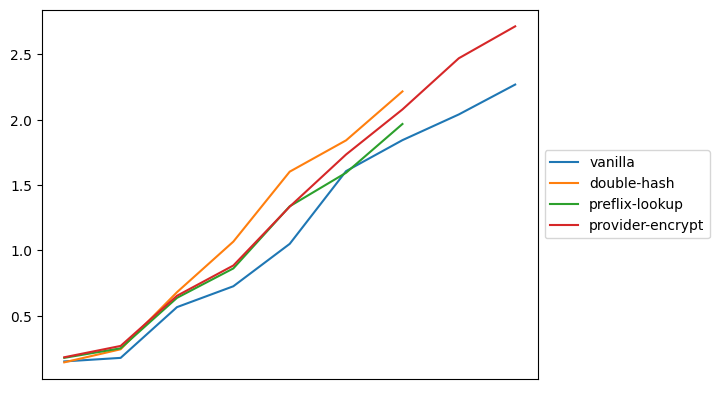

In [703]:
df1 = pd.DataFrame(avgBandwidthTotalInV123)
df2 = pd.DataFrame(avgBandwidthTotalInDH123)
df3 = pd.DataFrame(avgBandwidthTotalInPL123)
df4 = pd.DataFrame(avgBandwidthTotalInPE123)

df1 = df1[:]/1e6
df2 = df2[:]/1e6
df3 = df3[:]/1e6
df4 = df4[:]/1e6

plt.figure()
ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)

# remove x-axis as it does not provide any information about the averages.
x1_axis = ax1.axes.get_xaxis()
x1_axis.set_visible(False)


plt.legend(['vanilla', 'double-hash', 'preflix-lookup', 'provider-encrypt'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

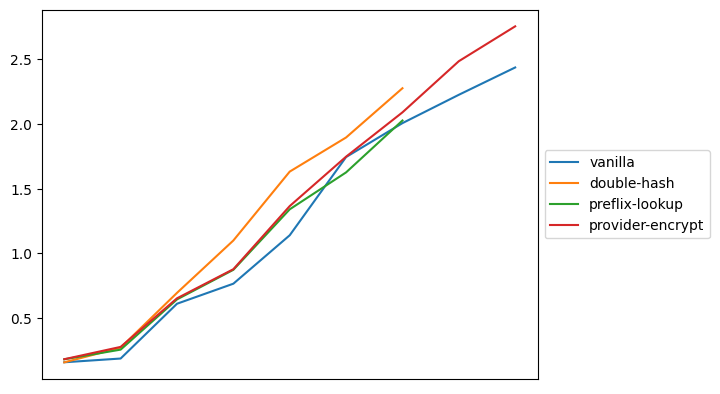

In [704]:
df1 = pd.DataFrame(avgBandwidthTotalOutV123)
df2 = pd.DataFrame(avgBandwidthTotalOutDH123)
df3 = pd.DataFrame(avgBandwidthTotalOutPL123)
df4 = pd.DataFrame(avgBandwidthTotalOutPE123)

df1 = df1[:]/1e6
df2 = df2[:]/1e6
df3 = df3[:]/1e6
df4 = df4[:]/1e6

plt.figure()
ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)

# remove x-axis as it does not provide any information about the averages.
x1_axis = ax1.axes.get_xaxis()
x1_axis.set_visible(False)


plt.legend(['vanilla', 'double-hash', 'preflix-lookup', 'provider-encrypt'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

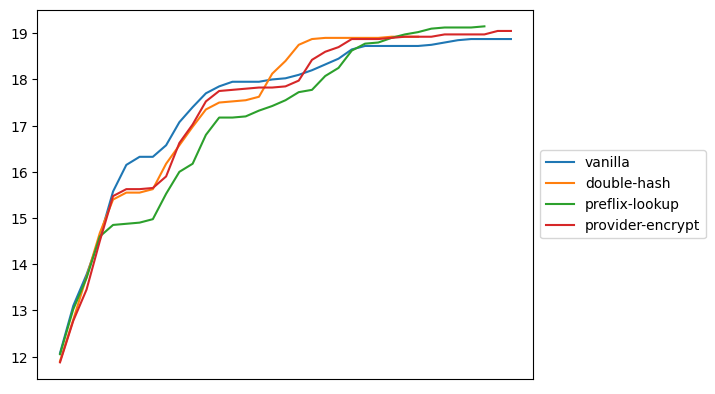

In [466]:
df1 = pd.DataFrame(avgNumThreadV123)
df2 = pd.DataFrame(avgNumThreadDH123)
df3 = pd.DataFrame(avgNumThreadPL123)
df4 = pd.DataFrame(avgNumThreadPE123)


plt.figure()
ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)

# remove x-axis as it does not provide any information about the averages.
x1_axis = ax1.axes.get_xaxis()
x1_axis.set_visible(False)


plt.legend(['vanilla', 'double-hash', 'preflix-lookup', 'provider-encrypt'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

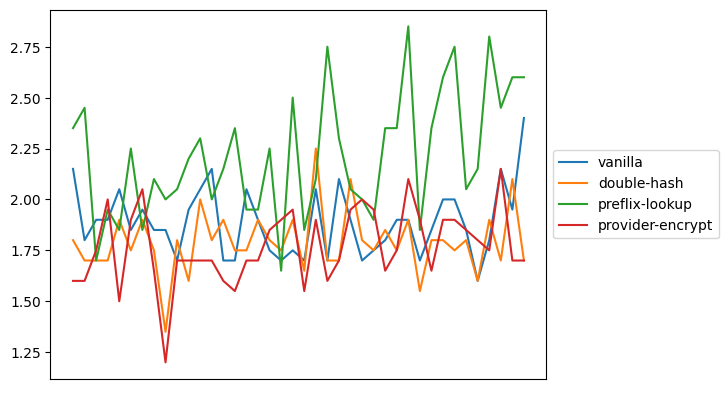

In [467]:
df1 = pd.DataFrame(avgNumHopsV123)
df2 = pd.DataFrame(avgNumHopsDH123)
df3 = pd.DataFrame(avgNumHopsPL123)
df4 = pd.DataFrame(avgNumHopsPE123)


plt.figure()
ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)

# remove x-axis as it does not provide any information about the averages.
x1_axis = ax1.axes.get_xaxis()
x1_axis.set_visible(False)


plt.legend(['vanilla', 'double-hash', 'preflix-lookup', 'provider-encrypt'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()



In [477]:
print(calcAVG(avgTimeToFindFirstPL123))
print(max(avgTimeToFindFirstArrPL123[0]))
print(min(avgTimeToFindFirstArrPL123[0]))
print(max(avgTimeToFindFirstArrPL123[1]))
print(min(avgTimeToFindFirstArrPL123[1]))
print(max(avgTimeToFindFirstArrPL123[2]))
print(min(avgTimeToFindFirstArrPL123[2]))


2992577284.9674997
52356307594.95
113463866.75
52356307594.95
113463866.75
52356307594.95
113463866.75


In [478]:
print(avgTimeToFindFirstArrPL123[0])
print(avgTimeToFindFirstArrPL123[1])
print(avgTimeToFindFirstArrPL123[2])


[1427661375.65, 7967436316.25, 980204885.9, 792674525.25, 52356307594.95, 1826612223.7, 1524940267.35, 1182729369.25, 2361645738.45, 3342770180.75, 1216338567.2, 1778238223.65, 1606065009.1, 1048028981.85, 1176662373.45, 568931443.9, 541604820.9, 338497364.75, 956187617.25, 2071546080.1, 480186368.95, 1176052544.45, 4627435016.9, 4343667104.0, 680751940.0, 2072935773.85, 612473564.95, 1012646496.35, 1119515115.1, 1463241038.15, 1244313850.55, 1032712921.3, 143724712.4, 113463866.75, 4495680331.4, 2342300124.05, 1026150256.85, 1198044492.05, 2756470413.65, 2696242507.35]
[1427661375.65, 7967436316.25, 980204885.9, 792674525.25, 52356307594.95, 1826612223.7, 1524940267.35, 1182729369.25, 2361645738.45, 3342770180.75, 1216338567.2, 1778238223.65, 1606065009.1, 1048028981.85, 1176662373.45, 568931443.9, 541604820.9, 338497364.75, 956187617.25, 2071546080.1, 480186368.95, 1176052544.45, 4627435016.9, 4343667104.0, 680751940.0, 2072935773.85, 612473564.95, 1012646496.35, 1119515115.1, 146324

<Figure size 640x480 with 0 Axes>

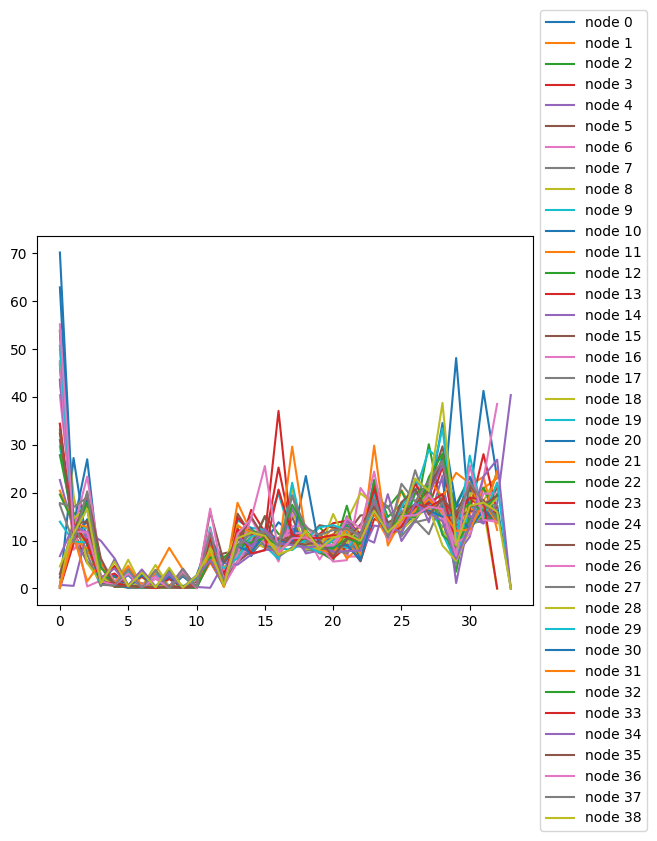

In [230]:
# generate CPU consumption graph. 
# this cell will generate the graph of the run for the most recent `parseCPU` call.

df1 = pd.DataFrame(nodeCpuUsage["node0"]).astype(float)
df2 = pd.DataFrame(nodeCpuUsage["node1"]).astype(float)
df3 = pd.DataFrame(nodeCpuUsage["node2"]).astype(float)
df4 = pd.DataFrame(nodeCpuUsage["node3"]).astype(float)
df5 = pd.DataFrame(nodeCpuUsage["node4"]).astype(float)
df6 = pd.DataFrame(nodeCpuUsage["node5"]).astype(float)
df7 = pd.DataFrame(nodeCpuUsage["node6"]).astype(float)
df8 = pd.DataFrame(nodeCpuUsage["node7"]).astype(float)
df9 = pd.DataFrame(nodeCpuUsage["node8"]).astype(float)
df10 = pd.DataFrame(nodeCpuUsage["node9"]).astype(float)
df11 = pd.DataFrame(nodeCpuUsage["node10"]).astype(float)
df12 = pd.DataFrame(nodeCpuUsage["node11"]).astype(float)
df13 = pd.DataFrame(nodeCpuUsage["node12"]).astype(float)
df14 = pd.DataFrame(nodeCpuUsage["node13"]).astype(float)
df15 = pd.DataFrame(nodeCpuUsage["node14"]).astype(float)
df16 = pd.DataFrame(nodeCpuUsage["node15"]).astype(float)
df17 = pd.DataFrame(nodeCpuUsage["node16"]).astype(float)
df18 = pd.DataFrame(nodeCpuUsage["node17"]).astype(float)
df19 = pd.DataFrame(nodeCpuUsage["node18"]).astype(float)
df20 = pd.DataFrame(nodeCpuUsage["node19"]).astype(float)
df21 = pd.DataFrame(nodeCpuUsage["node20"]).astype(float)
df22 = pd.DataFrame(nodeCpuUsage["node21"]).astype(float)
df23 = pd.DataFrame(nodeCpuUsage["node22"]).astype(float)
df24 = pd.DataFrame(nodeCpuUsage["node23"]).astype(float)
df25 = pd.DataFrame(nodeCpuUsage["node24"]).astype(float)
df26 = pd.DataFrame(nodeCpuUsage["node25"]).astype(float)
df27 = pd.DataFrame(nodeCpuUsage["node26"]).astype(float)
df28 = pd.DataFrame(nodeCpuUsage["node27"]).astype(float)
df29 = pd.DataFrame(nodeCpuUsage["node28"]).astype(float)
df30 = pd.DataFrame(nodeCpuUsage["node29"]).astype(float)
df31 = pd.DataFrame(nodeCpuUsage["node30"]).astype(float)
df32 = pd.DataFrame(nodeCpuUsage["node31"]).astype(float)
df33 = pd.DataFrame(nodeCpuUsage["node32"]).astype(float)
df34 = pd.DataFrame(nodeCpuUsage["node33"]).astype(float)
df35 = pd.DataFrame(nodeCpuUsage["node34"]).astype(float)
df36 = pd.DataFrame(nodeCpuUsage["node35"]).astype(float)
df37 = pd.DataFrame(nodeCpuUsage["node36"]).astype(float)
df38 = pd.DataFrame(nodeCpuUsage["node37"]).astype(float)
df39 = pd.DataFrame(nodeCpuUsage["node38"]).astype(float)
df40 = pd.DataFrame(nodeCpuUsage["node39"]).astype(float)
# df41 = pd.DataFrame(nodeCpuUsage["node40"]).astype(float)
# df42 = pd.DataFrame(nodeCpuUsage["node41"]).astype(float)
# df43 = pd.DataFrame(nodeCpuUsage["node42"]).astype(float)
# df44 = pd.DataFrame(nodeCpuUsage["node43"]).astype(float)
# df45 = pd.DataFrame(nodeCpuUsage["node44"]).astype(float)
# df46 = pd.DataFrame(nodeCpuUsage["node45"]).astype(float)
# df47 = pd.DataFrame(nodeCpuUsage["node46"]).astype(float)
# df48 = pd.DataFrame(nodeCpuUsage["node47"]).astype(float)
# df49 = pd.DataFrame(nodeCpuUsage["node48"]).astype(float)
# df50 = pd.DataFrame(nodeCpuUsage["node49"]).astype(float)

plt.figure()

ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)
ax5 = df5.plot(ax=ax4, kind="line", rot=0)
ax6 = df6.plot(ax=ax5, kind="line", rot=0)
ax7 = df7.plot(ax=ax6, kind="line", rot=0)
ax8 = df8.plot(ax=ax7, kind="line", rot=0)
ax9 = df9.plot(ax=ax8, kind="line", rot=0)
ax10 = df10.plot(ax=ax9, kind="line", rot=0)
ax11 = df11.plot(ax=ax10, kind="line", rot=0)
ax12 = df12.plot(ax=ax11, kind="line", rot=0)
ax13 = df13.plot(ax=ax12, kind="line", rot=0)
ax14 = df14.plot(ax=ax13, kind="line", rot=0)
ax15 = df15.plot(ax=ax14, kind="line", rot=0)
ax16 = df16.plot(ax=ax15, kind="line", rot=0)
ax17 = df17.plot(ax=ax16, kind="line", rot=0)
ax18 = df18.plot(ax=ax17, kind="line", rot=0)
ax19 = df19.plot(ax=ax18, kind="line", rot=0)
ax20 = df20.plot(ax=ax19, kind="line", rot=0)
ax21 = df21.plot(ax=ax20, kind="line", rot=0)
ax22 = df22.plot(ax=ax21, kind="line", rot=0)
ax23 = df23.plot(ax=ax22, kind="line", rot=0)
ax24 = df24.plot(ax=ax23, kind="line", rot=0)
ax25 = df25.plot(ax=ax24, kind="line", rot=0)
ax26 = df26.plot(ax=ax25, kind="line", rot=0)
ax27 = df27.plot(ax=ax26, kind="line", rot=0)
ax28 = df28.plot(ax=ax27, kind="line", rot=0)
ax29 = df29.plot(ax=ax28, kind="line", rot=0)
ax30 = df30.plot(ax=ax29, kind="line", rot=0)
ax31 = df31.plot(ax=ax30, kind="line", rot=0)
ax32 = df32.plot(ax=ax31, kind="line", rot=0)
ax33 = df33.plot(ax=ax32, kind="line", rot=0)
ax34 = df34.plot(ax=ax33, kind="line", rot=0)
ax35 = df35.plot(ax=ax34, kind="line", rot=0)
ax36 = df36.plot(ax=ax35, kind="line", rot=0)
ax37 = df37.plot(ax=ax36, kind="line", rot=0)
ax38 = df38.plot(ax=ax37, kind="line", rot=0)
ax39 = df39.plot(ax=ax38, kind="line", rot=0)
# ax40 = df40.plot(ax=ax39, kind="line", rot=0)
# ax41 = df41.plot(ax=ax40, kind="line", rot=0)
# ax42 = df42.plot(ax=ax41, kind="line", rot=0)
# ax43 = df43.plot(ax=ax42, kind="line", rot=0)
# ax44 = df44.plot(ax=ax43, kind="line", rot=0)
# ax45 = df45.plot(ax=ax44, kind="line", rot=0)
# ax46 = df46.plot(ax=ax45, kind="line", rot=0)
# ax47 = df47.plot(ax=ax46, kind="line", rot=0)
# ax48 = df48.plot(ax=ax47, kind="line", rot=0)
# ax49 = df49.plot(ax=ax48, kind="line", rot=0)
# ax50 = df50.plot(ax=ax49, kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

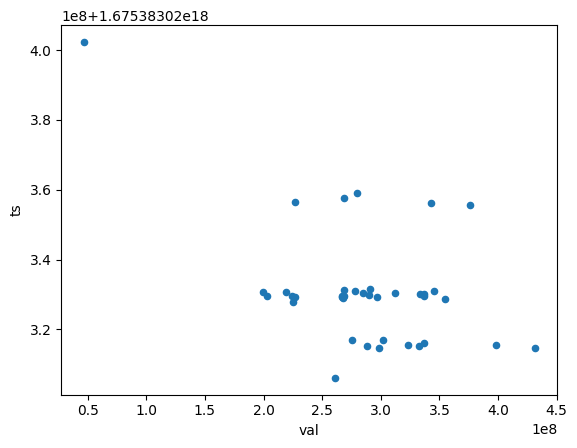

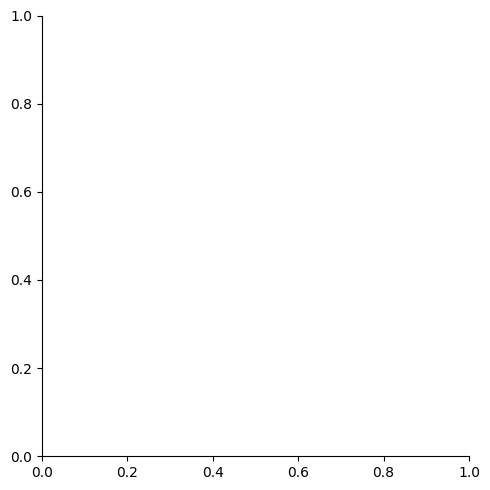

In [421]:
df = pd.DataFrame(ttprList["barrierbootstrapping0"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

sbn.lmplot(data=df,fit_reg=True) 

# plt.legend(["barrierbootstrapping0"], loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

<Figure size 640x480 with 0 Axes>

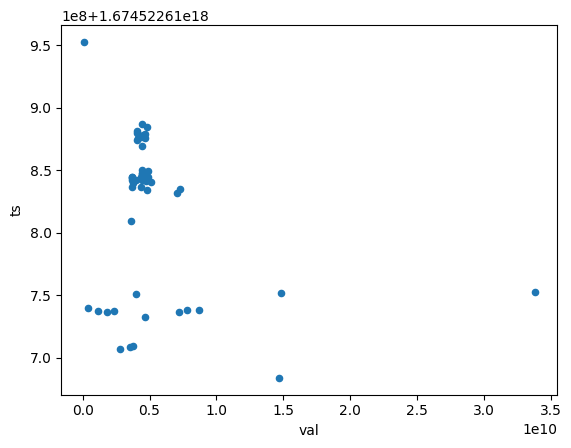

In [3720]:
df = pd.DataFrame(ttprList["barrierprovider-records1"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

# plt.legend(["barrierprovider-records1"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 640x480 with 0 Axes>

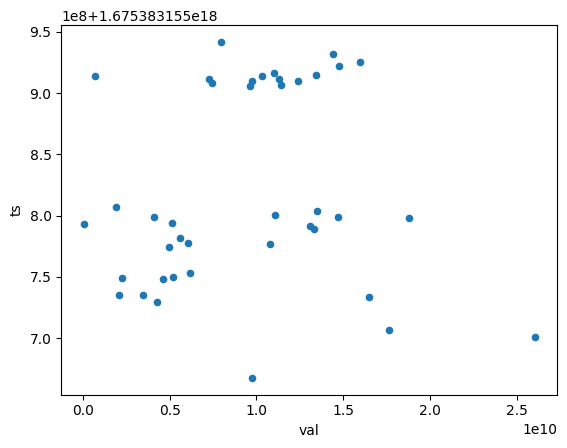

In [469]:
df = pd.DataFrame(ttprList["barrierprovider-records2"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

# plt.legend(["barrierprovider-records2"], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

<Figure size 640x480 with 0 Axes>

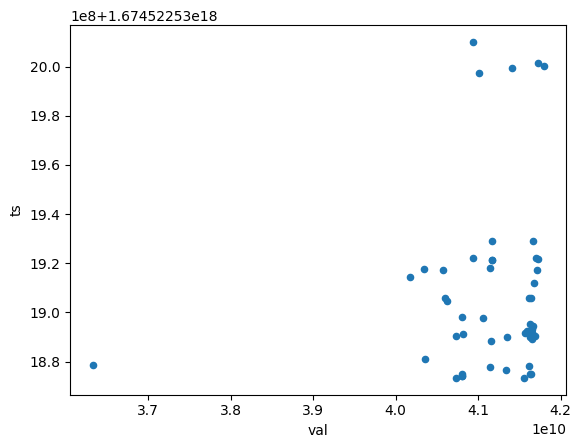

In [3722]:
df = pd.DataFrame(ttprList["full-bootstrapping0"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

# plt.legend(["full-bootstrapping0"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 640x480 with 0 Axes>

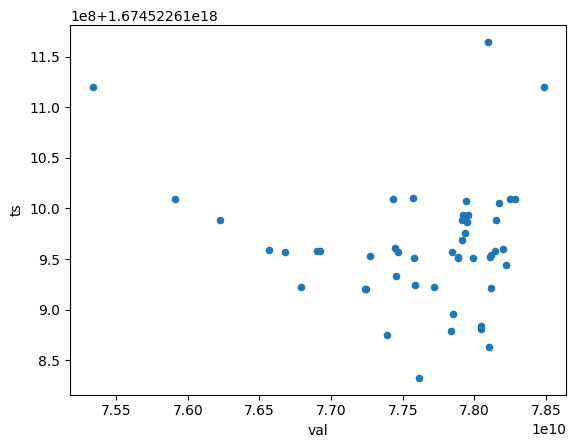

In [3723]:
df = pd.DataFrame(ttprList["full-provider-records1"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

# plt.legend(["full-provider-records1"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 640x480 with 0 Axes>

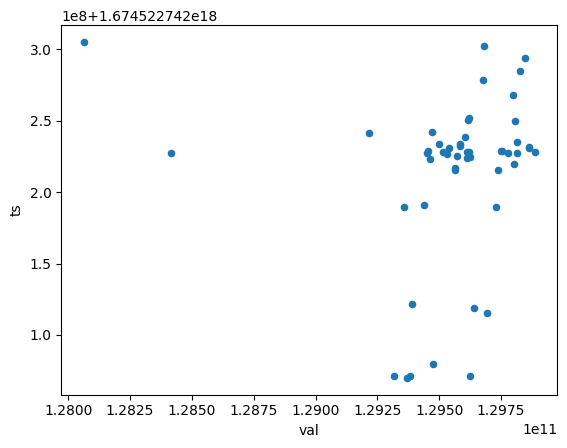

In [3724]:
df = pd.DataFrame(ttprList["full-provider-records2"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

# plt.legend(["full-provider-records2"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 640x480 with 0 Axes>

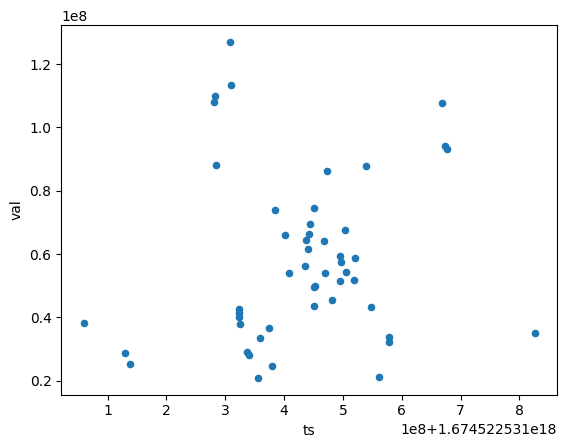

In [3725]:
df = pd.DataFrame(ttprList["signal-bootstrapping0"])
plt.figure()
df.plot(kind="scatter", x="ts", y="val")

# plt.legend(["signal bootstrapping0"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 640x480 with 0 Axes>

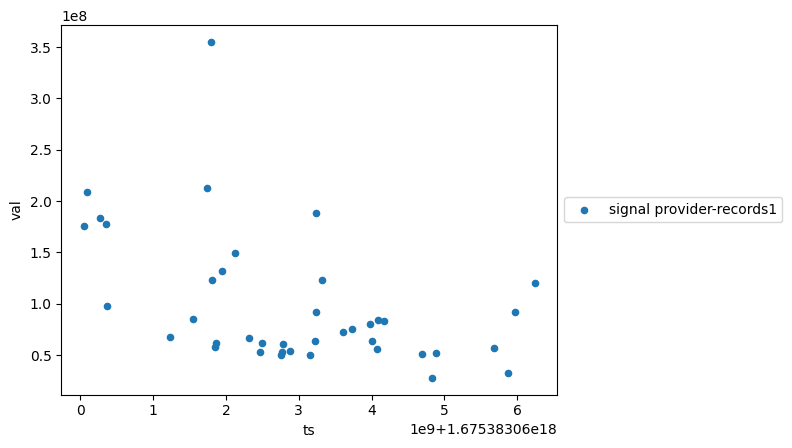

In [182]:
df = pd.DataFrame(ttprList["signal-provider-records1"])
plt.figure()
df.plot(kind="scatter", x="ts", y="val")

plt.legend(["signal provider-records1"], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

<Figure size 640x480 with 0 Axes>

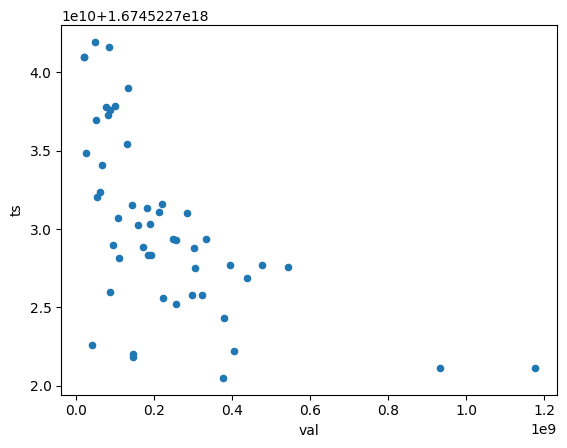

In [3727]:
df = pd.DataFrame(ttprList["signal-provider-records2"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

# plt.legend(["signal provider-records2"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 640x480 with 0 Axes>

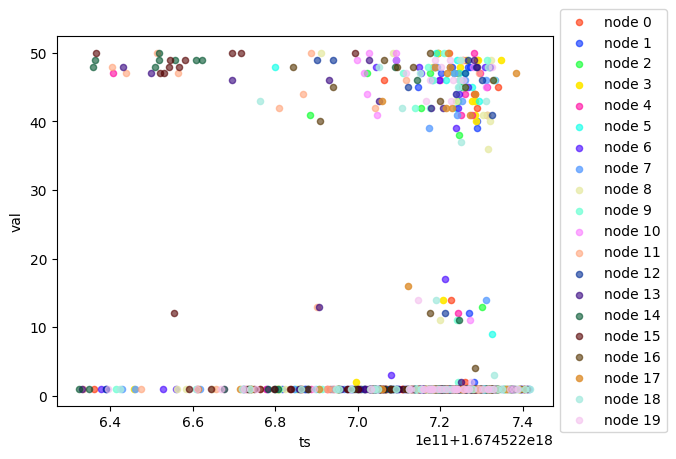

In [3728]:
# conglomerated list of: peers-found | done | cypress-provider | <node_number>
df1 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|0"])
df2 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|1"])
df3 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|2"])
df4 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|3"])
df5 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|4"])
df6 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|5"])
df7 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|6"])
df8 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|7"])
df9 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|8"])
df10 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|9"])
df11 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|10"])
df12 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|11"])
df13 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|12"])
df14 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|13"])
df15 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|14"])
df16 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|15"])
df17 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|16"])
df18 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|17"])
df19 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|18"])
df20 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|19"])
# df21 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|20"])
# df22 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|21"])
# df23 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|22"])
# df24 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|23"])
# df25 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|24"])
# df26 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|25"])
# df27 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|26"])
# df28 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|27"])
# df29 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|28"])
# df30 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|29"])
# df31 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|30"])
# df32 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|31"])
# df33 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|32"])
# df34 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|33"])
# df35 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|34"])
# df36 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|35"])
# df37 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|36"])
# df38 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|37"])
# df39 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|38"])
# df40 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|39"])

nodeList = [
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'
]

c = [
    "#FF2D00", # red
    "#002CFF", # blue
    "#00FF24", # lime green
    "#FFE800", # yellow
    "#FF009D", # magenta
    "#00FFE7", # teal
    "#4100FF", # purple
    "#61A1FF", # light blue
    "#E8EBAA", # light yellow
    "#79FFD7", # sf green
    "#FA79FF", # pink
    "#FFA379", # orange
    "#002B94", # dark blue
    "#32007D", # dark purple
    "#00532E", # dark green
    "#530000", # dark red
    "#533300", # brown
    "#DE8F2F", # golden orange
    "#AAEBE0", # light sf green
    "#F4BFEE", # light pink
    "#BFBFBF", # grey
    "#639950", # army green
    "#C79C52", # gold
    "#008CB3", # darker sky blue
    "#FF007B", # neon pink
    "#817DAD", # purp grey
    "#00A150", # green
    "#00AEFF", # sky blue
    "#B50076", # dark magenta
    "#00AB80", # dark light green
    "#473352", # darker purple
    "#6B7822", # dirty yellow
    "#F5A958", # light orange
    "#7AD686", # light green
    "#396D70", # dark sea blue
    "#46614C", # darker army green
    "#A7FF87", # lemon green
    "#9E442E", # brick red
    "#CC9774", # skin
    "#F2B7A0", # peach
    "#DEA1FF", # light purple
    "#A60050", # dark neon pink
    "#6F7500", # dark dirty yellow
    "#E8582C", # pale orange
    "#5957C2", # purple blue
    "#708779", # light army green
    "#A1648B", # dirty pink
    "#8688AD", # hazy blue
    "#9B9C8C", # yellow grey
    "#8B9E93", # green grey
    "#9E9092", # red grey
]

plt.figure()

ax1 = df1.plot(kind="scatter", y="val", x="ts", c=c[0], rot=0, alpha=0.6)
ax2 = df2.plot(ax=ax1, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
ax3 = df3.plot(ax=ax2, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
ax4 = df4.plot(ax=ax3, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
ax5 = df5.plot(ax=ax4, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
ax6 = df6.plot(ax=ax5, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
ax7 = df7.plot(ax=ax6, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
ax8 = df8.plot(ax=ax7, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
ax9 = df9.plot(ax=ax8, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
ax10 = df10.plot(ax=ax9, kind="scatter", y="val", x="ts", c=c[9],  rot=0, alpha=0.8)
ax11 = df11.plot(ax=ax10, kind="scatter", y="val", x="ts", c=c[10],  rot=0, alpha=0.6)
ax12 = df12.plot(ax=ax11, kind="scatter", y="val", x="ts", c=c[11],  rot=0, alpha=0.6)
ax13 = df13.plot(ax=ax12, kind="scatter", y="val", x="ts", c=c[12],  rot=0, alpha=0.6)
ax14 = df14.plot(ax=ax13, kind="scatter", y="val", x="ts", c=c[13],  rot=0, alpha=0.6)
ax15 = df15.plot(ax=ax14, kind="scatter", y="val", x="ts", c=c[14],  rot=0, alpha=0.6)
ax16 = df16.plot(ax=ax15, kind="scatter", y="val", x="ts", c=c[15],  rot=0, alpha=0.6)
ax17 = df17.plot(ax=ax16, kind="scatter", y="val", x="ts", c=c[16],  rot=0, alpha=0.6)
ax18 = df18.plot(ax=ax17, kind="scatter", y="val", x="ts", c=c[17],  rot=0, alpha=0.8)
ax19 = df19.plot(ax=ax18, kind="scatter", y="val", x="ts", c=c[18],  rot=0, alpha=0.8)
ax20 = df20.plot(ax=ax19, kind="scatter", y="val", x="ts", c=c[19],  rot=0, alpha=0.6)
# ax21 = df21.plot(ax=ax20, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax22 = df22.plot(ax=ax21, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax23 = df23.plot(ax=ax22, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
# ax24 = df24.plot(ax=ax23, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
# ax25 = df25.plot(ax=ax24, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
# ax26 = df26.plot(ax=ax25, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
# ax27 = df27.plot(ax=ax26, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
# ax28 = df28.plot(ax=ax27, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
# ax29 = df29.plot(ax=ax28, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
# ax30 = df30.plot(ax=ax29, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax31 = df31.plot(ax=ax30, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax32 = df32.plot(ax=ax31, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax33 = df33.plot(ax=ax32, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
# ax34 = df34.plot(ax=ax33, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
# ax35 = df35.plot(ax=ax34, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
# ax36 = df36.plot(ax=ax35, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
# ax37 = df37.plot(ax=ax36, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
# ax38 = df38.plot(ax=ax37, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
# ax39 = df39.plot(ax=ax38, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
# ax40 = df40.plot(ax=ax39, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)

plt.legend(nodeList, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

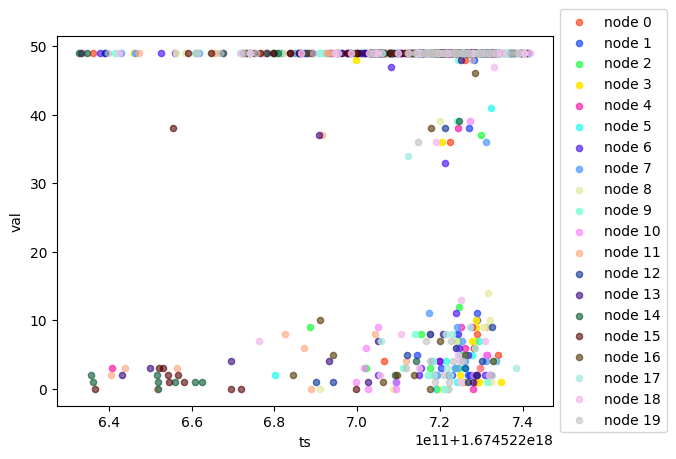

In [3729]:
# conglomerated list of: peers-missing | done | cypress-provider | <node_number>
df1 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|0"])
df2 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|1"])
df3 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|2"])
df4 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|3"])
df5 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|4"])
df6 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|5"])
df7 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|6"])
df8 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|7"])
df9 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|8"])
df10 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|9"])
df11 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|10"])
df12 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|11"])
df13 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|12"])
df14 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|13"])
df15 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|14"])
df16 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|15"])
df17 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|16"])
df18 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|17"])
df19 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|18"])
df20 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|19"])
# df21 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|20"])
# df22 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|21"])
# df23 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|22"])
# df24 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|23"])
# df25 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|24"])
# df26 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|25"])
# df27 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|26"])
# df28 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|27"])
# df29 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|28"])
# df30 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|29"])
# df31 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|30"])
# df32 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|31"])
# df33 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|32"])
# df34 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|33"])
# df35 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|34"])
# df36 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|35"])
# df37 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|36"])
# df38 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|37"])
# df39 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|38"])
# df40 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|39"])

nodeList = [
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'
]

c = [
    "#FF2D00", # red
    "#002CFF", # blue
    "#00FF24", # green
    "#FFE800", # yellow
    "#FF009D", # magenta
    "#00FFE7", # teal
    "#4100FF", # purple
    "#61A1FF", # light blue
    "#E8EBAA", # light yellow
    "#79FFD7", # sf green
    "#FA79FF", # pink
    "#FFA379", # orange
    "#002B94", # dark blue
    "#32007D", # dark purple
    "#00532E", # dark green
    "#530000", # dark red
    "#533300", # brown
    "#AAEBE0", # light sf green
    "#F4BFEE", # light pink
    "#BFBFBF" # grey
]

plt.figure()

ax1 = df1.plot(kind="scatter", y="val", x="ts", c=c[0], rot=0, alpha=0.6)
ax2 = df2.plot(ax=ax1, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
ax3 = df3.plot(ax=ax2, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
ax4 = df4.plot(ax=ax3, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
ax5 = df5.plot(ax=ax4, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
ax6 = df6.plot(ax=ax5, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
ax7 = df7.plot(ax=ax6, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
ax8 = df8.plot(ax=ax7, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
ax9 = df9.plot(ax=ax8, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
ax10 = df10.plot(ax=ax9, kind="scatter", y="val", x="ts", c=c[9],  rot=0, alpha=0.8)
ax11 = df11.plot(ax=ax10, kind="scatter", y="val", x="ts", c=c[10],  rot=0, alpha=0.6)
ax12 = df12.plot(ax=ax11, kind="scatter", y="val", x="ts", c=c[11],  rot=0, alpha=0.6)
ax13 = df13.plot(ax=ax12, kind="scatter", y="val", x="ts", c=c[12],  rot=0, alpha=0.6)
ax14 = df14.plot(ax=ax13, kind="scatter", y="val", x="ts", c=c[13],  rot=0, alpha=0.6)
ax15 = df15.plot(ax=ax14, kind="scatter", y="val", x="ts", c=c[14],  rot=0, alpha=0.6)
ax16 = df16.plot(ax=ax15, kind="scatter", y="val", x="ts", c=c[15],  rot=0, alpha=0.6)
ax17 = df17.plot(ax=ax16, kind="scatter", y="val", x="ts", c=c[16],  rot=0, alpha=0.6)
ax18 = df18.plot(ax=ax17, kind="scatter", y="val", x="ts", c=c[17],  rot=0, alpha=0.8)
ax19 = df19.plot(ax=ax18, kind="scatter", y="val", x="ts", c=c[18],  rot=0, alpha=0.8)
ax20 = df20.plot(ax=ax19, kind="scatter", y="val", x="ts", c=c[19],  rot=0, alpha=0.6)
# ax21 = df21.plot(ax=ax20, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax22 = df22.plot(ax=ax21, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax23 = df23.plot(ax=ax22, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
# ax24 = df24.plot(ax=ax23, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
# ax25 = df25.plot(ax=ax24, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
# ax26 = df26.plot(ax=ax25, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
# ax27 = df27.plot(ax=ax26, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
# ax28 = df28.plot(ax=ax27, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
# ax29 = df29.plot(ax=ax28, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
# ax30 = df30.plot(ax=ax29, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax31 = df31.plot(ax=ax30, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax32 = df32.plot(ax=ax31, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax33 = df33.plot(ax=ax32, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
# ax34 = df34.plot(ax=ax33, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
# ax35 = df35.plot(ax=ax34, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
# ax36 = df36.plot(ax=ax35, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
# ax37 = df37.plot(ax=ax36, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
# ax38 = df38.plot(ax=ax37, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
# ax39 = df39.plot(ax=ax38, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
# ax40 = df40.plot(ax=ax39, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)

plt.legend(nodeList, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

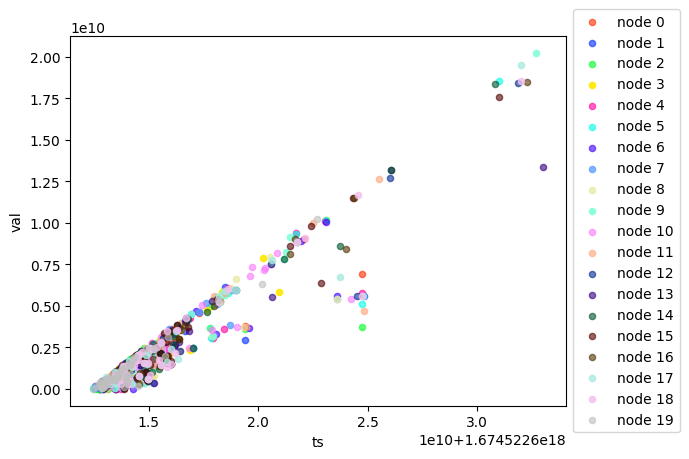

In [3730]:
# conglomerated list of: time-to-find-first | cypress-provider | <node_number>
df1 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|0"])
df2 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|1"])
df3 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|2"])
df4 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|3"])
df5 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|4"])
df6 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|5"])
df7 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|6"])
df8 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|7"])
df9 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|8"])
df10 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|9"])
df11 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|10"])
df12 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|11"])
df13 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|12"])
df14 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|13"])
df15 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|14"])
df16 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|15"])
df17 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|16"])
df18 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|17"])
df19 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|18"])
df20 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|19"])
# df21 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|20"])
# df22 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|21"])
# df23 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|22"])
# df24 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|23"])
# df25 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|24"])
# df26 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|25"])
# df27 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|26"])
# df28 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|27"])
# df29 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|28"])
# df30 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|29"])
# df31 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|30"])
# df32 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|31"])
# df33 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|32"])
# df34 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|33"])
# df35 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|34"])
# df36 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|35"])
# df37 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|36"])
# df38 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|37"])
# df39 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|38"])
# df40 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|39"])

nodeList = [
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'
]

c = [
    "#FF2D00", # red
    "#002CFF", # blue
    "#00FF24", # green
    "#FFE800", # yellow
    "#FF009D", # magenta
    "#00FFE7", # teal
    "#4100FF", # purple
    "#61A1FF", # light blue
    "#E8EBAA", # light yellow
    "#79FFD7", # sf green
    "#FA79FF", # pink
    "#FFA379", # orange
    "#002B94", # dark blue
    "#32007D", # dark purple
    "#00532E", # dark green
    "#530000", # dark red
    "#533300", # brown
    "#AAEBE0", # light sf green
    "#F4BFEE", # light pink
    "#BFBFBF" # grey
]

plt.figure()

ax1 = df1.plot(kind="scatter", y="val", x="ts", c=c[0], rot=0, alpha=0.6)
ax2 = df2.plot(ax=ax1, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
ax3 = df3.plot(ax=ax2, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
ax4 = df4.plot(ax=ax3, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
ax5 = df5.plot(ax=ax4, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
ax6 = df6.plot(ax=ax5, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
ax7 = df7.plot(ax=ax6, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
ax8 = df8.plot(ax=ax7, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
ax9 = df9.plot(ax=ax8, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
ax10 = df10.plot(ax=ax9, kind="scatter", y="val", x="ts", c=c[9],  rot=0, alpha=0.8)
ax11 = df11.plot(ax=ax10, kind="scatter", y="val", x="ts", c=c[10],  rot=0, alpha=0.6)
ax12 = df12.plot(ax=ax11, kind="scatter", y="val", x="ts", c=c[11],  rot=0, alpha=0.6)
ax13 = df13.plot(ax=ax12, kind="scatter", y="val", x="ts", c=c[12],  rot=0, alpha=0.6)
ax14 = df14.plot(ax=ax13, kind="scatter", y="val", x="ts", c=c[13],  rot=0, alpha=0.6)
ax15 = df15.plot(ax=ax14, kind="scatter", y="val", x="ts", c=c[14],  rot=0, alpha=0.6)
ax16 = df16.plot(ax=ax15, kind="scatter", y="val", x="ts", c=c[15],  rot=0, alpha=0.6)
ax17 = df17.plot(ax=ax16, kind="scatter", y="val", x="ts", c=c[16],  rot=0, alpha=0.6)
ax18 = df18.plot(ax=ax17, kind="scatter", y="val", x="ts", c=c[17],  rot=0, alpha=0.8)
ax19 = df19.plot(ax=ax18, kind="scatter", y="val", x="ts", c=c[18],  rot=0, alpha=0.8)
ax20 = df20.plot(ax=ax19, kind="scatter", y="val", x="ts", c=c[19],  rot=0, alpha=0.6)
# ax21 = df21.plot(ax=ax20, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax22 = df22.plot(ax=ax21, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax23 = df23.plot(ax=ax22, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
# ax24 = df24.plot(ax=ax23, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
# ax25 = df25.plot(ax=ax24, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
# ax26 = df26.plot(ax=ax25, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
# ax27 = df27.plot(ax=ax26, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
# ax28 = df28.plot(ax=ax27, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
# ax29 = df29.plot(ax=ax28, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
# ax30 = df30.plot(ax=ax29, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax31 = df31.plot(ax=ax30, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax32 = df32.plot(ax=ax31, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax33 = df33.plot(ax=ax32, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
# ax34 = df34.plot(ax=ax33, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
# ax35 = df35.plot(ax=ax34, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
# ax36 = df36.plot(ax=ax35, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
# ax37 = df37.plot(ax=ax36, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
# ax38 = df38.plot(ax=ax37, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
# ax39 = df39.plot(ax=ax38, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
# ax40 = df40.plot(ax=ax39, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

<Figure size 640x480 with 0 Axes>

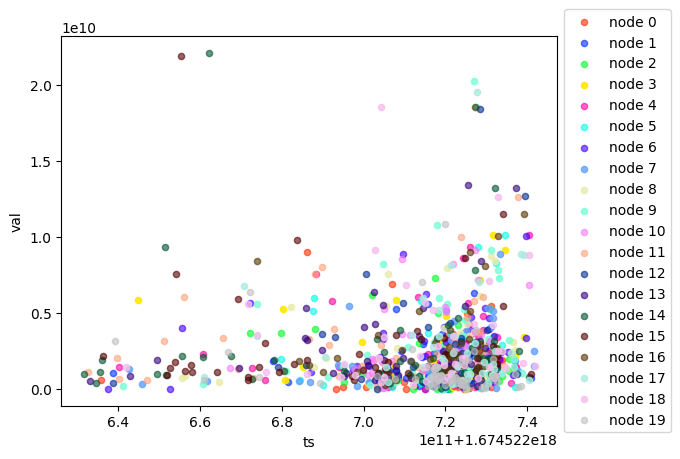

In [3731]:
# conglomerated list of: time-to-find-last | done | cypress-provider | <node_number>
df1 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|0"])
df2 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|1"])
df3 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|2"])
df4 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|3"])
df5 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|4"])
df6 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|5"])
df7 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|6"])
df8 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|7"])
df9 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|8"])
df10 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|9"])
df11 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|10"])
df12 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|11"])
df13 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|12"])
df14 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|13"])
df15 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|14"])
df16 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|15"])
df17 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|16"])
df18 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|17"])
df19 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|18"])
df20 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|19"])
# df21 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|20"])
# df22 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|21"])
# df23 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|22"])
# df24 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|23"])
# df25 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|24"])
# df26 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|25"])
# df27 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|26"])
# df28 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|27"])
# df29 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|28"])
# df30 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|29"])
# df31 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|30"])
# df32 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|31"])
# df33 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|32"])
# df34 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|33"])
# df35 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|34"])
# df36 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|35"])
# df37 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|36"])
# df38 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|37"])
# df39 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|38"])
# df40 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|39"])

nodeList = [
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'
]

c = [
    "#FF2D00", # red
    "#002CFF", # blue
    "#00FF24", # green
    "#FFE800", # yellow
    "#FF009D", # magenta
    "#00FFE7", # teal
    "#4100FF", # purple
    "#61A1FF", # light blue
    "#E8EBAA", # light yellow
    "#79FFD7", # sf green
    "#FA79FF", # pink
    "#FFA379", # orange
    "#002B94", # dark blue
    "#32007D", # dark purple
    "#00532E", # dark green
    "#530000", # dark red
    "#533300", # brown
    "#AAEBE0", # light sf green
    "#F4BFEE", # light pink
    "#BFBFBF" # grey
]

plt.figure()

ax1 = df1.plot(kind="scatter", y="val", x="ts", c=c[0], rot=0, alpha=0.6)
ax2 = df2.plot(ax=ax1, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
ax3 = df3.plot(ax=ax2, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
ax4 = df4.plot(ax=ax3, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
ax5 = df5.plot(ax=ax4, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
ax6 = df6.plot(ax=ax5, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
ax7 = df7.plot(ax=ax6, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
ax8 = df8.plot(ax=ax7, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
ax9 = df9.plot(ax=ax8, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
ax10 = df10.plot(ax=ax9, kind="scatter", y="val", x="ts", c=c[9],  rot=0, alpha=0.8)
ax11 = df11.plot(ax=ax10, kind="scatter", y="val", x="ts", c=c[10],  rot=0, alpha=0.6)
ax12 = df12.plot(ax=ax11, kind="scatter", y="val", x="ts", c=c[11],  rot=0, alpha=0.6)
ax13 = df13.plot(ax=ax12, kind="scatter", y="val", x="ts", c=c[12],  rot=0, alpha=0.6)
ax14 = df14.plot(ax=ax13, kind="scatter", y="val", x="ts", c=c[13],  rot=0, alpha=0.6)
ax15 = df15.plot(ax=ax14, kind="scatter", y="val", x="ts", c=c[14],  rot=0, alpha=0.6)
ax16 = df16.plot(ax=ax15, kind="scatter", y="val", x="ts", c=c[15],  rot=0, alpha=0.6)
ax17 = df17.plot(ax=ax16, kind="scatter", y="val", x="ts", c=c[16],  rot=0, alpha=0.6)
ax18 = df18.plot(ax=ax17, kind="scatter", y="val", x="ts", c=c[17],  rot=0, alpha=0.8)
ax19 = df19.plot(ax=ax18, kind="scatter", y="val", x="ts", c=c[18],  rot=0, alpha=0.8)
ax20 = df20.plot(ax=ax19, kind="scatter", y="val", x="ts", c=c[19],  rot=0, alpha=0.6)
# ax21 = df21.plot(ax=ax20, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax22 = df22.plot(ax=ax21, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax23 = df23.plot(ax=ax22, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
# ax24 = df24.plot(ax=ax23, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
# ax25 = df25.plot(ax=ax24, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
# ax26 = df26.plot(ax=ax25, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
# ax27 = df27.plot(ax=ax26, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
# ax28 = df28.plot(ax=ax27, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
# ax29 = df29.plot(ax=ax28, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
# ax30 = df30.plot(ax=ax29, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax31 = df31.plot(ax=ax30, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax32 = df32.plot(ax=ax31, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax33 = df33.plot(ax=ax32, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
# ax34 = df34.plot(ax=ax33, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
# ax35 = df35.plot(ax=ax34, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
# ax36 = df36.plot(ax=ax35, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
# ax37 = df37.plot(ax=ax36, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
# ax38 = df38.plot(ax=ax37, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
# ax39 = df39.plot(ax=ax38, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
# ax40 = df40.plot(ax=ax39, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)


plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

<Figure size 640x480 with 0 Axes>

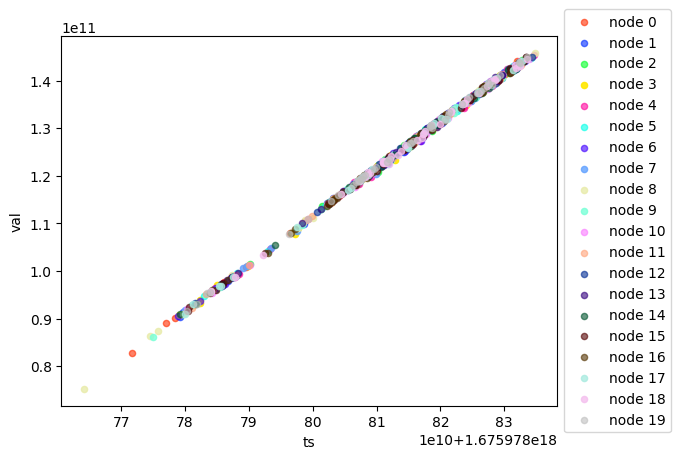

In [27]:
# conglomerated list of: time-to-find | done | cypress-provider | <node_number>
df1 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|0"])
df2 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|1"])
df3 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|2"])
df4 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|3"])
df5 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|4"])
df6 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|5"])
df7 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|6"])
df8 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|7"])
df9 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|8"])
df10 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|9"])
df11 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|10"])
df12 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|11"])
df13 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|12"])
df14 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|13"])
df15 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|14"])
df16 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|15"])
df17 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|16"])
df18 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|17"])
df19 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|18"])
df20 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|19"])
# df21 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|20"])
# df22 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|21"])
# df23 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|22"])
# df24 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|23"])
# df25 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|24"])
# df26 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|25"])
# df27 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|26"])
# df28 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|27"])
# df29 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|28"])
# df30 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|29"])
# df31 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|30"])
# df32 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|31"])
# df33 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|32"])
# df34 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|33"])
# df35 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|34"])
# df36 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|35"])
# df37 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|36"])
# df38 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|37"])
# df39 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|38"])
# df40 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|39"])

nodeList = [
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'
]

c = [
    "#FF2D00", # red
    "#002CFF", # blue
    "#00FF24", # green
    "#FFE800", # yellow
    "#FF009D", # magenta
    "#00FFE7", # teal
    "#4100FF", # purple
    "#61A1FF", # light blue
    "#E8EBAA", # light yellow
    "#79FFD7", # sf green
    "#FA79FF", # pink
    "#FFA379", # orange
    "#002B94", # dark blue
    "#32007D", # dark purple
    "#00532E", # dark green
    "#530000", # dark red
    "#533300", # brown
    "#AAEBE0", # light sf green
    "#F4BFEE", # light pink
    "#BFBFBF" # grey
]

plt.figure()

ax1 = df1.plot(kind="scatter", y="val", x="ts", c=c[0], rot=0, alpha=0.6)
ax2 = df2.plot(ax=ax1, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
ax3 = df3.plot(ax=ax2, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
ax4 = df4.plot(ax=ax3, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
ax5 = df5.plot(ax=ax4, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
ax6 = df6.plot(ax=ax5, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
ax7 = df7.plot(ax=ax6, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
ax8 = df8.plot(ax=ax7, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
ax9 = df9.plot(ax=ax8, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
ax10 = df10.plot(ax=ax9, kind="scatter", y="val", x="ts", c=c[9],  rot=0, alpha=0.8)
ax11 = df11.plot(ax=ax10, kind="scatter", y="val", x="ts", c=c[10],  rot=0, alpha=0.6)
ax12 = df12.plot(ax=ax11, kind="scatter", y="val", x="ts", c=c[11],  rot=0, alpha=0.6)
ax13 = df13.plot(ax=ax12, kind="scatter", y="val", x="ts", c=c[12],  rot=0, alpha=0.6)
ax14 = df14.plot(ax=ax13, kind="scatter", y="val", x="ts", c=c[13],  rot=0, alpha=0.6)
ax15 = df15.plot(ax=ax14, kind="scatter", y="val", x="ts", c=c[14],  rot=0, alpha=0.6)
ax16 = df16.plot(ax=ax15, kind="scatter", y="val", x="ts", c=c[15],  rot=0, alpha=0.6)
ax17 = df17.plot(ax=ax16, kind="scatter", y="val", x="ts", c=c[16],  rot=0, alpha=0.6)
ax18 = df18.plot(ax=ax17, kind="scatter", y="val", x="ts", c=c[17],  rot=0, alpha=0.8)
ax19 = df19.plot(ax=ax18, kind="scatter", y="val", x="ts", c=c[18],  rot=0, alpha=0.8)
ax20 = df20.plot(ax=ax19, kind="scatter", y="val", x="ts", c=c[19],  rot=0, alpha=0.6)
# ax21 = df21.plot(ax=ax20, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax22 = df22.plot(ax=ax21, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax23 = df23.plot(ax=ax22, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
# ax24 = df24.plot(ax=ax23, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
# ax25 = df25.plot(ax=ax24, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
# ax26 = df26.plot(ax=ax25, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
# ax27 = df27.plot(ax=ax26, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
# ax28 = df28.plot(ax=ax27, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
# ax29 = df29.plot(ax=ax28, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
# ax30 = df30.plot(ax=ax29, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax31 = df31.plot(ax=ax30, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax32 = df32.plot(ax=ax31, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax33 = df33.plot(ax=ax32, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
# ax34 = df34.plot(ax=ax33, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
# ax35 = df35.plot(ax=ax34, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
# ax36 = df36.plot(ax=ax35, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
# ax37 = df37.plot(ax=ax36, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
# ax38 = df38.plot(ax=ax37, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
# ax39 = df39.plot(ax=ax38, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
# ax40 = df40.plot(ax=ax39, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

<Figure size 640x480 with 0 Axes>

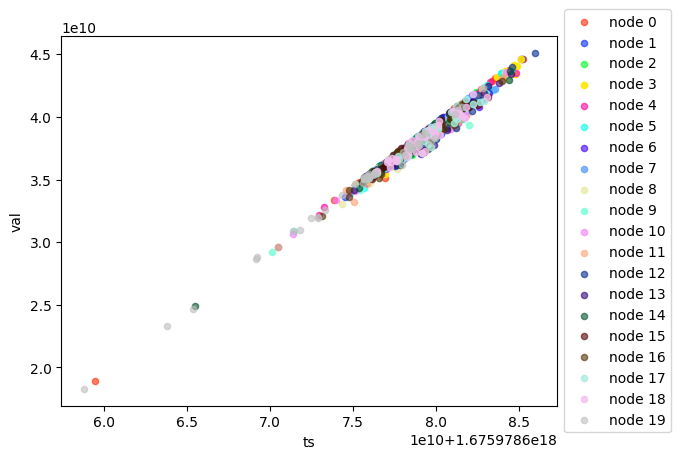

In [28]:
# conglomerated list of: time-to-provide-<node_number>
df1 = pd.DataFrame(ttprList["time-to-provide-0"])
df2 = pd.DataFrame(ttprList["time-to-provide-1"])
df3 = pd.DataFrame(ttprList["time-to-provide-2"])
df4 = pd.DataFrame(ttprList["time-to-provide-3"])
df5 = pd.DataFrame(ttprList["time-to-provide-4"])
df6 = pd.DataFrame(ttprList["time-to-provide-5"])
df7 = pd.DataFrame(ttprList["time-to-provide-6"])
df8 = pd.DataFrame(ttprList["time-to-provide-7"])
df9 = pd.DataFrame(ttprList["time-to-provide-8"])
df10 = pd.DataFrame(ttprList["time-to-provide-9"])
df11 = pd.DataFrame(ttprList["time-to-provide-10"])
df12 = pd.DataFrame(ttprList["time-to-provide-11"])
df13 = pd.DataFrame(ttprList["time-to-provide-12"])
df14 = pd.DataFrame(ttprList["time-to-provide-13"])
df15 = pd.DataFrame(ttprList["time-to-provide-14"])
df16 = pd.DataFrame(ttprList["time-to-provide-15"])
df17 = pd.DataFrame(ttprList["time-to-provide-16"])
df18 = pd.DataFrame(ttprList["time-to-provide-17"])
df19 = pd.DataFrame(ttprList["time-to-provide-18"])
df20 = pd.DataFrame(ttprList["time-to-provide-19"])
df21 = pd.DataFrame(ttprList["time-to-provide-20"])
# df22 = pd.DataFrame(ttprList["time-to-provide-21"])
# df23 = pd.DataFrame(ttprList["time-to-provide-22"])
# df24 = pd.DataFrame(ttprList["time-to-provide-23"])
# df25 = pd.DataFrame(ttprList["time-to-provide-24"])
# df26 = pd.DataFrame(ttprList["time-to-provide-25"])
# df27 = pd.DataFrame(ttprList["time-to-provide-26"])
# df28 = pd.DataFrame(ttprList["time-to-provide-27"])
# df29 = pd.DataFrame(ttprList["time-to-provide-28"])
# df30 = pd.DataFrame(ttprList["time-to-provide-29"])
# df31 = pd.DataFrame(ttprList["time-to-provide-30"])
# df32 = pd.DataFrame(ttprList["time-to-provide-31"])
# df33 = pd.DataFrame(ttprList["time-to-provide-32"])
# df34 = pd.DataFrame(ttprList["time-to-provide-33"])
# df35 = pd.DataFrame(ttprList["time-to-provide-34"])
# df36 = pd.DataFrame(ttprList["time-to-provide-35"])
# df37 = pd.DataFrame(ttprList["time-to-provide-36"])
# df38 = pd.DataFrame(ttprList["time-to-provide-37"])
# df39 = pd.DataFrame(ttprList["time-to-provide-38"])
# df40 = pd.DataFrame(ttprList["time-to-provide-39"])

nodeList = [
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'
]

c = [
    "#FF2D00", # red
    "#002CFF", # blue
    "#00FF24", # green
    "#FFE800", # yellow
    "#FF009D", # magenta
    "#00FFE7", # teal
    "#4100FF", # purple
    "#61A1FF", # light blue
    "#E8EBAA", # light yellow
    "#79FFD7", # sf green
    "#FA79FF", # pink
    "#FFA379", # orange
    "#002B94", # dark blue
    "#32007D", # dark purple
    "#00532E", # dark green
    "#530000", # dark red
    "#533300", # brown
    "#AAEBE0", # light sf green
    "#F4BFEE", # light pink
    "#BFBFBF" # grey
]

plt.figure()

ax1 = df1.plot(kind="scatter", y="val", x="ts", c=c[0], rot=0, alpha=0.6)
ax2 = df2.plot(ax=ax1, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
ax3 = df3.plot(ax=ax2, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
ax4 = df4.plot(ax=ax3, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
ax5 = df5.plot(ax=ax4, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
ax6 = df6.plot(ax=ax5, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
ax7 = df7.plot(ax=ax6, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
ax8 = df8.plot(ax=ax7, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
ax9 = df9.plot(ax=ax8, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
ax10 = df10.plot(ax=ax9, kind="scatter", y="val", x="ts", c=c[9],  rot=0, alpha=0.8)
ax11 = df11.plot(ax=ax10, kind="scatter", y="val", x="ts", c=c[10],  rot=0, alpha=0.6)
ax12 = df12.plot(ax=ax11, kind="scatter", y="val", x="ts", c=c[11],  rot=0, alpha=0.6)
ax13 = df13.plot(ax=ax12, kind="scatter", y="val", x="ts", c=c[12],  rot=0, alpha=0.6)
ax14 = df14.plot(ax=ax13, kind="scatter", y="val", x="ts", c=c[13],  rot=0, alpha=0.6)
ax15 = df15.plot(ax=ax14, kind="scatter", y="val", x="ts", c=c[14],  rot=0, alpha=0.6)
ax16 = df16.plot(ax=ax15, kind="scatter", y="val", x="ts", c=c[15],  rot=0, alpha=0.6)
ax17 = df17.plot(ax=ax16, kind="scatter", y="val", x="ts", c=c[16],  rot=0, alpha=0.6)
ax18 = df18.plot(ax=ax17, kind="scatter", y="val", x="ts", c=c[17],  rot=0, alpha=0.8)
ax19 = df19.plot(ax=ax18, kind="scatter", y="val", x="ts", c=c[18],  rot=0, alpha=0.8)
ax20 = df20.plot(ax=ax19, kind="scatter", y="val", x="ts", c=c[19],  rot=0, alpha=0.6)
# ax21 = df21.plot(ax=ax20, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax22 = df22.plot(ax=ax21, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax23 = df23.plot(ax=ax22, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
# ax24 = df24.plot(ax=ax23, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
# ax25 = df25.plot(ax=ax24, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
# ax26 = df26.plot(ax=ax25, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
# ax27 = df27.plot(ax=ax26, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
# ax28 = df28.plot(ax=ax27, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
# ax29 = df29.plot(ax=ax28, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
# ax30 = df30.plot(ax=ax29, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax31 = df31.plot(ax=ax30, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax32 = df32.plot(ax=ax31, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax33 = df33.plot(ax=ax32, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
# ax34 = df34.plot(ax=ax33, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
# ax35 = df35.plot(ax=ax34, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
# ax36 = df36.plot(ax=ax35, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
# ax37 = df37.plot(ax=ax36, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
# ax38 = df38.plot(ax=ax37, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
# ax39 = df39.plot(ax=ax38, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
# ax40 = df40.plot(ax=ax39, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

<Figure size 640x480 with 0 Axes>

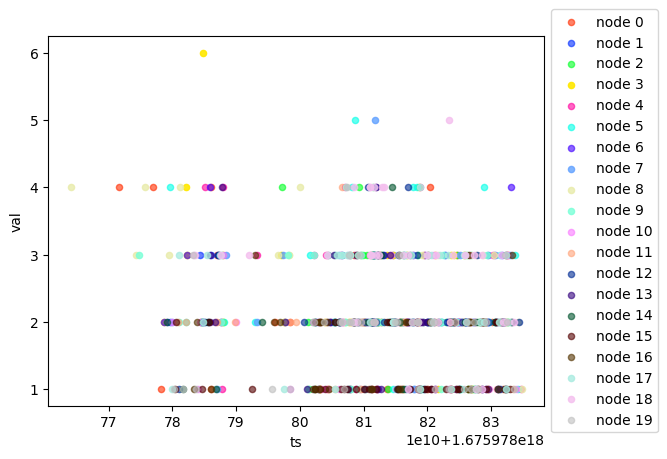

In [29]:
# conglomerated list of: num-hops | cypress-provider | <node_number>
df1 = pd.DataFrame(ttprList["num-hops|cypress-provider|0"])
df2 = pd.DataFrame(ttprList["num-hops|cypress-provider|1"])
df3 = pd.DataFrame(ttprList["num-hops|cypress-provider|2"])
df4 = pd.DataFrame(ttprList["num-hops|cypress-provider|3"])
df5 = pd.DataFrame(ttprList["num-hops|cypress-provider|4"])
df6 = pd.DataFrame(ttprList["num-hops|cypress-provider|5"])
df7 = pd.DataFrame(ttprList["num-hops|cypress-provider|6"])
df8 = pd.DataFrame(ttprList["num-hops|cypress-provider|7"])
df9 = pd.DataFrame(ttprList["num-hops|cypress-provider|8"])
df10 = pd.DataFrame(ttprList["num-hops|cypress-provider|9"])
df11 = pd.DataFrame(ttprList["num-hops|cypress-provider|10"])
df12 = pd.DataFrame(ttprList["num-hops|cypress-provider|11"])
df13 = pd.DataFrame(ttprList["num-hops|cypress-provider|12"])
df14 = pd.DataFrame(ttprList["num-hops|cypress-provider|13"])
df15 = pd.DataFrame(ttprList["num-hops|cypress-provider|14"])
df16 = pd.DataFrame(ttprList["num-hops|cypress-provider|15"])
df17 = pd.DataFrame(ttprList["num-hops|cypress-provider|16"])
df18 = pd.DataFrame(ttprList["num-hops|cypress-provider|17"])
df19 = pd.DataFrame(ttprList["num-hops|cypress-provider|18"])
df20 = pd.DataFrame(ttprList["num-hops|cypress-provider|19"])
# df21 = pd.DataFrame(ttprList["num-hops|cypress-provider|20"])
# df22 = pd.DataFrame(ttprList["num-hops|cypress-provider|21"])
# df23 = pd.DataFrame(ttprList["num-hops|cypress-provider|22"])
# df24 = pd.DataFrame(ttprList["num-hops|cypress-provider|23"])
# df25 = pd.DataFrame(ttprList["num-hops|cypress-provider|24"])
# df26 = pd.DataFrame(ttprList["num-hops|cypress-provider|25"])
# df27 = pd.DataFrame(ttprList["num-hops|cypress-provider|26"])
# df28 = pd.DataFrame(ttprList["num-hops|cypress-provider|27"])
# df29 = pd.DataFrame(ttprList["num-hops|cypress-provider|28"])
# df30 = pd.DataFrame(ttprList["num-hops|cypress-provider|29"])
# df31 = pd.DataFrame(ttprList["num-hops|cypress-provider|30"])
# df32 = pd.DataFrame(ttprList["num-hops|cypress-provider|31"])
# df33 = pd.DataFrame(ttprList["num-hops|cypress-provider|32"])
# df34 = pd.DataFrame(ttprList["num-hops|cypress-provider|33"])
# df35 = pd.DataFrame(ttprList["num-hops|cypress-provider|34"])
# df36 = pd.DataFrame(ttprList["num-hops|cypress-provider|35"])
# df37 = pd.DataFrame(ttprList["num-hops|cypress-provider|36"])
# df38 = pd.DataFrame(ttprList["num-hops|cypress-provider|37"])
# df39 = pd.DataFrame(ttprList["num-hops|cypress-provider|38"])
# df40 = pd.DataFrame(ttprList["num-hops|cypress-provider|39"])

nodeList = [
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'
]

c = [
    "#FF2D00", # red
    "#002CFF", # blue
    "#00FF24", # green
    "#FFE800", # yellow
    "#FF009D", # magenta
    "#00FFE7", # teal
    "#4100FF", # purple
    "#61A1FF", # light blue
    "#E8EBAA", # light yellow
    "#79FFD7", # sf green
    "#FA79FF", # pink
    "#FFA379", # orange
    "#002B94", # dark blue
    "#32007D", # dark purple
    "#00532E", # dark green
    "#530000", # dark red
    "#533300", # brown
    "#AAEBE0", # light sf green
    "#F4BFEE", # light pink
    "#BFBFBF" # grey
]

plt.figure()

ax1 = df1.plot(kind="scatter", y="val", x="ts", c=c[0], rot=0, alpha=0.6)
ax2 = df2.plot(ax=ax1, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
ax3 = df3.plot(ax=ax2, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
ax4 = df4.plot(ax=ax3, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
ax5 = df5.plot(ax=ax4, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
ax6 = df6.plot(ax=ax5, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
ax7 = df7.plot(ax=ax6, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
ax8 = df8.plot(ax=ax7, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
ax9 = df9.plot(ax=ax8, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
ax10 = df10.plot(ax=ax9, kind="scatter", y="val", x="ts", c=c[9],  rot=0, alpha=0.8)
ax11 = df11.plot(ax=ax10, kind="scatter", y="val", x="ts", c=c[10],  rot=0, alpha=0.6)
ax12 = df12.plot(ax=ax11, kind="scatter", y="val", x="ts", c=c[11],  rot=0, alpha=0.6)
ax13 = df13.plot(ax=ax12, kind="scatter", y="val", x="ts", c=c[12],  rot=0, alpha=0.6)
ax14 = df14.plot(ax=ax13, kind="scatter", y="val", x="ts", c=c[13],  rot=0, alpha=0.6)
ax15 = df15.plot(ax=ax14, kind="scatter", y="val", x="ts", c=c[14],  rot=0, alpha=0.6)
ax16 = df16.plot(ax=ax15, kind="scatter", y="val", x="ts", c=c[15],  rot=0, alpha=0.6)
ax17 = df17.plot(ax=ax16, kind="scatter", y="val", x="ts", c=c[16],  rot=0, alpha=0.6)
ax18 = df18.plot(ax=ax17, kind="scatter", y="val", x="ts", c=c[17],  rot=0, alpha=0.8)
ax19 = df19.plot(ax=ax18, kind="scatter", y="val", x="ts", c=c[18],  rot=0, alpha=0.8)
ax20 = df20.plot(ax=ax19, kind="scatter", y="val", x="ts", c=c[19],  rot=0, alpha=0.6)
# ax21 = df21.plot(ax=ax20, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax22 = df22.plot(ax=ax21, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax23 = df23.plot(ax=ax22, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
# ax24 = df24.plot(ax=ax23, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
# ax25 = df25.plot(ax=ax24, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
# ax26 = df26.plot(ax=ax25, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
# ax27 = df27.plot(ax=ax26, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
# ax28 = df28.plot(ax=ax27, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
# ax29 = df29.plot(ax=ax28, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
# ax30 = df30.plot(ax=ax29, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax31 = df31.plot(ax=ax30, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax32 = df32.plot(ax=ax31, kind="scatter", y="val", x="ts", c=c[1], rot=0, alpha=0.6)
# ax33 = df33.plot(ax=ax32, kind="scatter", y="val", x="ts", c=c[2],  rot=0, alpha=0.6)
# ax34 = df34.plot(ax=ax33, kind="scatter", y="val", x="ts", c=c[3],  rot=0, alpha=0.9)
# ax35 = df35.plot(ax=ax34, kind="scatter", y="val", x="ts", c=c[4],  rot=0, alpha=0.6)
# ax36 = df36.plot(ax=ax35, kind="scatter", y="val", x="ts", c=c[5],  rot=0, alpha=0.6)
# ax37 = df37.plot(ax=ax36, kind="scatter", y="val", x="ts", c=c[6],  rot=0, alpha=0.6)
# ax38 = df38.plot(ax=ax37, kind="scatter", y="val", x="ts", c=c[7],  rot=0, alpha=0.8)
# ax39 = df39.plot(ax=ax38, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)
# ax40 = df40.plot(ax=ax39, kind="scatter", y="val", x="ts", c=c[8],  rot=0, alpha=0.8)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

<Figure size 640x480 with 0 Axes>

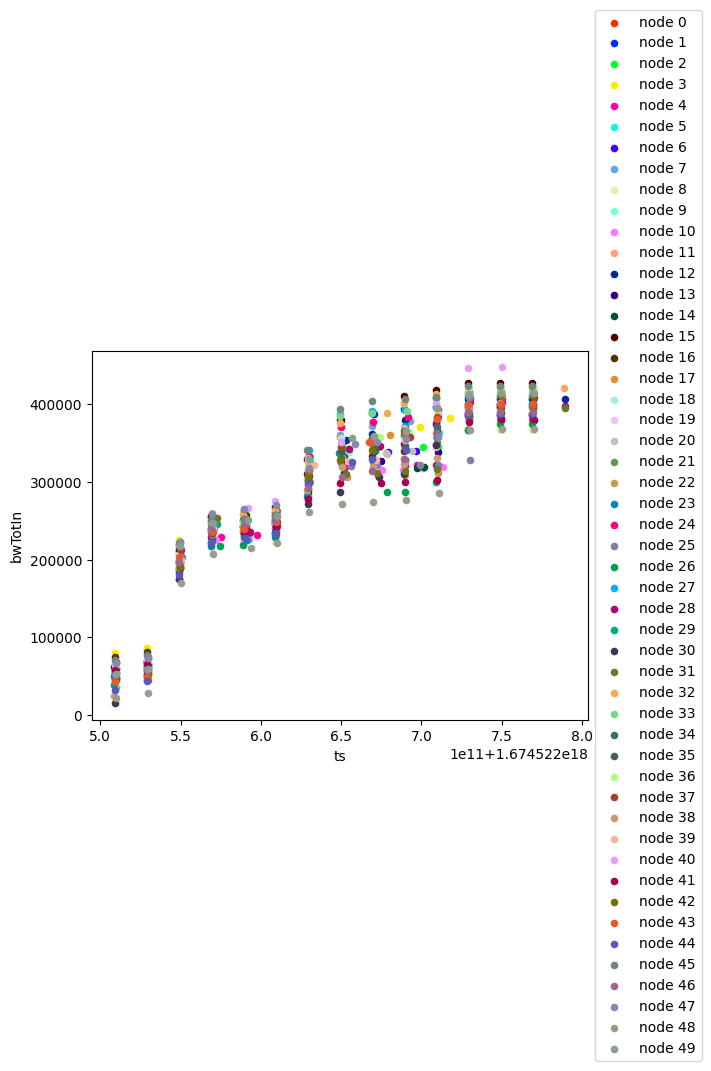

In [3735]:
# aggregated Bandwidth Total In

aggBwTs = {
    "bwTotIn": [],
    "ts": []
}

def resetBwTs():
    global aggBwTs
    aggBwTs = {
        "bwTotIn": [],
        "ts": []
    }
    return

aggBwTsList = []
for i in range(len(bandwidthStatsList)):
    for j in range(len(bandwidthStatsList[i]["bandwidthTotalIn"])):
        aggBwTs["bwTotIn"].append(bandwidthStatsList[i]["bandwidthTotalIn"][j])
        aggBwTs["ts"].append(bandwidthStatsList[i]["tsTotalIn"][j])
    aggBwTsList.append(aggBwTs)
    resetBwTs()

df1 = pd.DataFrame(aggBwTsList[0])
df2 = pd.DataFrame(aggBwTsList[1])
df3 = pd.DataFrame(aggBwTsList[2])
df4 = pd.DataFrame(aggBwTsList[3])
df5 = pd.DataFrame(aggBwTsList[4])
df6 = pd.DataFrame(aggBwTsList[5])
df7 = pd.DataFrame(aggBwTsList[6])
df8 = pd.DataFrame(aggBwTsList[7])
df9 = pd.DataFrame(aggBwTsList[8])
df10 = pd.DataFrame(aggBwTsList[9])
df11 = pd.DataFrame(aggBwTsList[10])
df12 = pd.DataFrame(aggBwTsList[11])
df13 = pd.DataFrame(aggBwTsList[12])
df14 = pd.DataFrame(aggBwTsList[13])
df15 = pd.DataFrame(aggBwTsList[14])
df16 = pd.DataFrame(aggBwTsList[15])
df17 = pd.DataFrame(aggBwTsList[16])
df18 = pd.DataFrame(aggBwTsList[17])
df19 = pd.DataFrame(aggBwTsList[18])
df20 = pd.DataFrame(aggBwTsList[19])
df21 = pd.DataFrame(aggBwTsList[20])
df22 = pd.DataFrame(aggBwTsList[21])
df23 = pd.DataFrame(aggBwTsList[22])
df24 = pd.DataFrame(aggBwTsList[23])
df25 = pd.DataFrame(aggBwTsList[24])
df26 = pd.DataFrame(aggBwTsList[25])
df27 = pd.DataFrame(aggBwTsList[26])
df28 = pd.DataFrame(aggBwTsList[27])
df29 = pd.DataFrame(aggBwTsList[28])
df30 = pd.DataFrame(aggBwTsList[29])
df31 = pd.DataFrame(aggBwTsList[30])
df32 = pd.DataFrame(aggBwTsList[31])
df33 = pd.DataFrame(aggBwTsList[32])
df34 = pd.DataFrame(aggBwTsList[33])
df35 = pd.DataFrame(aggBwTsList[34])
df36 = pd.DataFrame(aggBwTsList[35])
df37 = pd.DataFrame(aggBwTsList[36])
df38 = pd.DataFrame(aggBwTsList[37])
df39 = pd.DataFrame(aggBwTsList[38])
df40 = pd.DataFrame(aggBwTsList[39])
df41 = pd.DataFrame(aggBwTsList[40])
df42 = pd.DataFrame(aggBwTsList[41])
df43 = pd.DataFrame(aggBwTsList[42])
df44 = pd.DataFrame(aggBwTsList[43])
df45 = pd.DataFrame(aggBwTsList[44])
df46 = pd.DataFrame(aggBwTsList[45])
df47 = pd.DataFrame(aggBwTsList[46])
df48 = pd.DataFrame(aggBwTsList[47])
df49 = pd.DataFrame(aggBwTsList[48])
df50 = pd.DataFrame(aggBwTsList[49])

plt.figure()

c = [
    "#FF2D00", # red
    "#002CFF", # blue
    "#00FF24", # lime green
    "#FFE800", # yellow
    "#FF009D", # magenta
    "#00FFE7", # teal
    "#4100FF", # purple
    "#61A1FF", # light blue
    "#E8EBAA", # light yellow
    "#79FFD7", # sf green
    "#FA79FF", # pink
    "#FFA379", # orange
    "#002B94", # dark blue
    "#32007D", # dark purple
    "#00532E", # dark green
    "#530000", # dark red
    "#533300", # brown
    "#DE8F2F", # golden orange
    "#AAEBE0", # light sf green
    "#F4BFEE", # light pink
    "#BFBFBF", # grey
    "#639950", # army green
    "#C79C52", # gold
    "#008CB3", # darker sky blue
    "#FF007B", # neon pink
    "#817DAD", # purp grey
    "#00A150", # green
    "#00AEFF", # sky blue
    "#B50076", # dark magenta
    "#00AB80", # dark light green
    "#473352", # darker purple
    "#6B7822", # dirty yellow
    "#F5A958", # light orange
    "#7AD686", # light green
    "#396D70", # dark sea blue
    "#46614C", # darker army green
    "#A7FF87", # lemon green
    "#9E442E", # brick red
    "#CC9774", # skin
    "#F2B7A0", # peach
    "#DEA1FF", # light purple
    "#A60050", # dark neon pink
    "#6F7500", # dark dirty yellow
    "#E8582C", # pale orange
    "#5957C2", # purple blue
    "#708779", # light army green
    "#A1648B", # dirty pink
    "#8688AD", # hazy blue
    "#9B9C8C", # yellow grey
    "#8B9E93", # green grey
    "#9E9092", # red grey
]



ax1 = df1.plot(kind="scatter",  x="ts", y="bwTotIn", c=c[0], rot=0)
ax2 = df2.plot(ax=ax1, kind="scatter", x="ts", y="bwTotIn", c=c[1], rot=0)
ax3 = df3.plot(ax=ax2, kind="scatter", x="ts", y="bwTotIn", c=c[2], rot=0)
ax4 = df4.plot(ax=ax3, kind="scatter", x="ts", y="bwTotIn", c=c[3], rot=0)
ax5 = df5.plot(ax=ax4, kind="scatter", x="ts", y="bwTotIn", c=c[4], rot=0)
ax6 = df6.plot(ax=ax5, kind="scatter", x="ts", y="bwTotIn", c=c[5], rot=0)
ax7 = df7.plot(ax=ax6, kind="scatter", x="ts", y="bwTotIn", c=c[6], rot=0)
ax8 = df8.plot(ax=ax7, kind="scatter", x="ts", y="bwTotIn", c=c[7], rot=0)
ax9 = df9.plot(ax=ax8, kind="scatter", x="ts", y="bwTotIn", c=c[8], rot=0)
ax10 = df10.plot(ax=ax9, kind="scatter", x="ts", y="bwTotIn", c=c[9], rot=0)
ax11 = df11.plot(ax=ax10, kind="scatter", x="ts", y="bwTotIn", c=c[10], rot=0)
ax12 = df12.plot(ax=ax11, kind="scatter", x="ts", y="bwTotIn", c=c[11], rot=0)
ax13 = df13.plot(ax=ax12, kind="scatter", x="ts", y="bwTotIn", c=c[12], rot=0)
ax14 = df14.plot(ax=ax13, kind="scatter", x="ts", y="bwTotIn", c=c[13], rot=0)
ax15 = df15.plot(ax=ax14, kind="scatter", x="ts", y="bwTotIn", c=c[14], rot=0)
ax16 = df16.plot(ax=ax15, kind="scatter", x="ts", y="bwTotIn", c=c[15], rot=0)
ax17 = df17.plot(ax=ax16, kind="scatter", x="ts", y="bwTotIn", c=c[16], rot=0)
ax18 = df18.plot(ax=ax17, kind="scatter", x="ts", y="bwTotIn", c=c[17], rot=0)
ax19 = df19.plot(ax=ax18, kind="scatter", x="ts", y="bwTotIn", c=c[18], rot=0)
ax20 = df20.plot(ax=ax19, kind="scatter", x="ts", y="bwTotIn", c=c[19], rot=0)
ax21 = df21.plot(ax=ax20, kind="scatter", x="ts", y="bwTotIn", c=c[20], rot=0)
ax22 = df22.plot(ax=ax21, kind="scatter", x="ts", y="bwTotIn", c=c[21], rot=0)
ax23 = df23.plot(ax=ax22, kind="scatter", x="ts", y="bwTotIn", c=c[22], rot=0)
ax24 = df24.plot(ax=ax23, kind="scatter", x="ts", y="bwTotIn", c=c[23], rot=0)
ax25 = df25.plot(ax=ax24, kind="scatter", x="ts", y="bwTotIn", c=c[24], rot=0)
ax26 = df26.plot(ax=ax25, kind="scatter", x="ts", y="bwTotIn", c=c[25], rot=0)
ax27 = df27.plot(ax=ax26, kind="scatter", x="ts", y="bwTotIn", c=c[26], rot=0)
ax28 = df28.plot(ax=ax27, kind="scatter", x="ts", y="bwTotIn", c=c[27], rot=0)
ax29 = df29.plot(ax=ax28, kind="scatter", x="ts", y="bwTotIn", c=c[28], rot=0)
ax30 = df30.plot(ax=ax29, kind="scatter", x="ts", y="bwTotIn", c=c[29], rot=0)
ax31 = df31.plot(ax=ax30, kind="scatter", x="ts", y="bwTotIn", c=c[30], rot=0)
ax32 = df32.plot(ax=ax31, kind="scatter", x="ts", y="bwTotIn", c=c[31], rot=0)
ax33 = df33.plot(ax=ax32, kind="scatter", x="ts", y="bwTotIn", c=c[32], rot=0)
ax34 = df34.plot(ax=ax33, kind="scatter", x="ts", y="bwTotIn", c=c[33], rot=0)
ax35 = df35.plot(ax=ax34, kind="scatter", x="ts", y="bwTotIn", c=c[34], rot=0)
ax36 = df36.plot(ax=ax35, kind="scatter", x="ts", y="bwTotIn", c=c[35], rot=0)
ax37 = df37.plot(ax=ax36, kind="scatter", x="ts", y="bwTotIn", c=c[36], rot=0)
ax38 = df38.plot(ax=ax37, kind="scatter", x="ts", y="bwTotIn", c=c[37], rot=0)
ax39 = df39.plot(ax=ax38, kind="scatter", x="ts", y="bwTotIn", c=c[38], rot=0)
ax40 = df40.plot(ax=ax39, kind="scatter", x="ts", y="bwTotIn", c=c[39], rot=0)
ax41 = df41.plot(ax=ax40, kind="scatter", x="ts", y="bwTotIn", c=c[40], rot=0)
ax42 = df42.plot(ax=ax41, kind="scatter", x="ts", y="bwTotIn", c=c[41], rot=0)
ax43 = df43.plot(ax=ax42, kind="scatter", x="ts", y="bwTotIn", c=c[42], rot=0)
ax44 = df44.plot(ax=ax43, kind="scatter", x="ts", y="bwTotIn", c=c[43], rot=0)
ax45 = df45.plot(ax=ax44, kind="scatter", x="ts", y="bwTotIn", c=c[44], rot=0)
ax46 = df46.plot(ax=ax45, kind="scatter", x="ts", y="bwTotIn", c=c[45], rot=0)
ax47 = df47.plot(ax=ax46, kind="scatter", x="ts", y="bwTotIn", c=c[46], rot=0)
ax48 = df48.plot(ax=ax47, kind="scatter", x="ts", y="bwTotIn", c=c[47], rot=0)
ax49 = df49.plot(ax=ax48, kind="scatter", x="ts", y="bwTotIn", c=c[48], rot=0)
ax50 = df50.plot(ax=ax49, kind="scatter", x="ts", y="bwTotIn", c=c[49], rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

<Figure size 640x480 with 0 Axes>

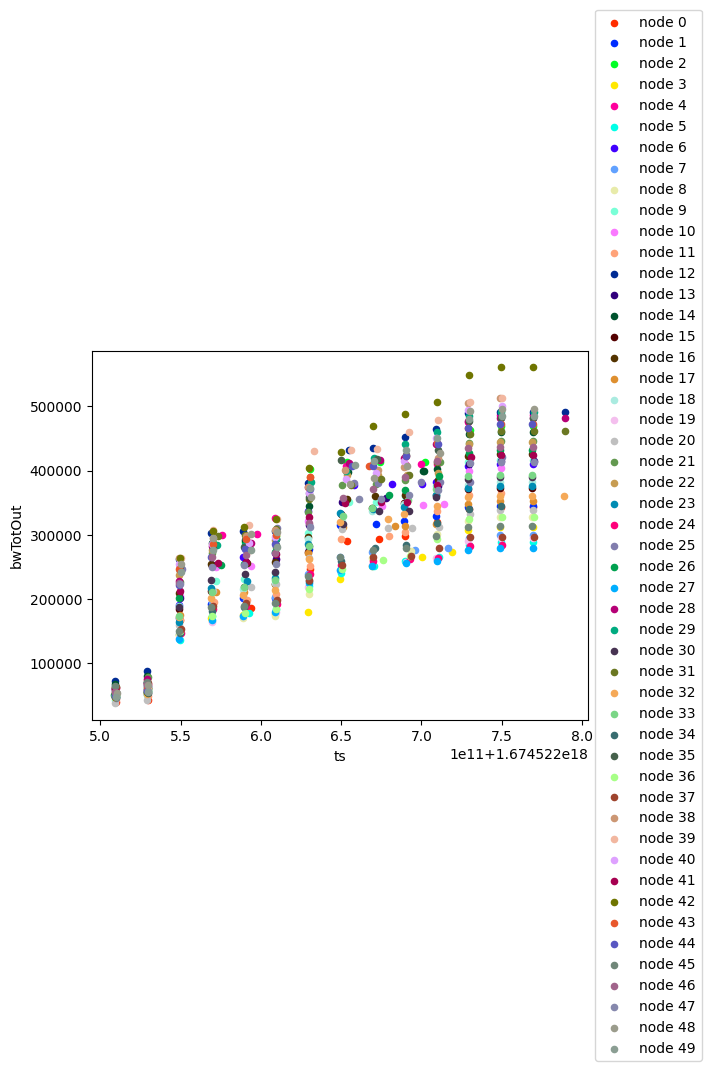

In [3736]:
# aggregated Bandwidth Total Out

aggBwTs = {
    "bwTotOut": [],
    "ts": []
}

def resetBwTs():
    global aggBwTs
    aggBwTs = {
        "bwTotOut": [],
        "ts": []
    }
    return

aggBwTsList = []
for i in range(len(bandwidthStatsList)):
    for j in range(len(bandwidthStatsList[i]["bandwidthTotalOut"])):
        aggBwTs["bwTotOut"].append(bandwidthStatsList[i]["bandwidthTotalOut"][j])
        aggBwTs["ts"].append(bandwidthStatsList[i]["tsTotalOut"][j])
    aggBwTsList.append(aggBwTs)
    resetBwTs()

df1 = pd.DataFrame(aggBwTsList[0])
df2 = pd.DataFrame(aggBwTsList[1])
df3 = pd.DataFrame(aggBwTsList[2])
df4 = pd.DataFrame(aggBwTsList[3])
df5 = pd.DataFrame(aggBwTsList[4])
df6 = pd.DataFrame(aggBwTsList[5])
df7 = pd.DataFrame(aggBwTsList[6])
df8 = pd.DataFrame(aggBwTsList[7])
df9 = pd.DataFrame(aggBwTsList[8])
df10 = pd.DataFrame(aggBwTsList[9])
df11 = pd.DataFrame(aggBwTsList[10])
df12 = pd.DataFrame(aggBwTsList[11])
df13 = pd.DataFrame(aggBwTsList[12])
df14 = pd.DataFrame(aggBwTsList[13])
df15 = pd.DataFrame(aggBwTsList[14])
df16 = pd.DataFrame(aggBwTsList[15])
df17 = pd.DataFrame(aggBwTsList[16])
df18 = pd.DataFrame(aggBwTsList[17])
df19 = pd.DataFrame(aggBwTsList[18])
df20 = pd.DataFrame(aggBwTsList[19])
df21 = pd.DataFrame(aggBwTsList[20])
df22 = pd.DataFrame(aggBwTsList[21])
df23 = pd.DataFrame(aggBwTsList[22])
df24 = pd.DataFrame(aggBwTsList[23])
df25 = pd.DataFrame(aggBwTsList[24])
df26 = pd.DataFrame(aggBwTsList[25])
df27 = pd.DataFrame(aggBwTsList[26])
df28 = pd.DataFrame(aggBwTsList[27])
df29 = pd.DataFrame(aggBwTsList[28])
df30 = pd.DataFrame(aggBwTsList[29])
df31 = pd.DataFrame(aggBwTsList[30])
df32 = pd.DataFrame(aggBwTsList[31])
df33 = pd.DataFrame(aggBwTsList[32])
df34 = pd.DataFrame(aggBwTsList[33])
df35 = pd.DataFrame(aggBwTsList[34])
df36 = pd.DataFrame(aggBwTsList[35])
df37 = pd.DataFrame(aggBwTsList[36])
df38 = pd.DataFrame(aggBwTsList[37])
df39 = pd.DataFrame(aggBwTsList[38])
df40 = pd.DataFrame(aggBwTsList[39])
df41 = pd.DataFrame(aggBwTsList[40])
df42 = pd.DataFrame(aggBwTsList[41])
df43 = pd.DataFrame(aggBwTsList[42])
df44 = pd.DataFrame(aggBwTsList[43])
df45 = pd.DataFrame(aggBwTsList[44])
df46 = pd.DataFrame(aggBwTsList[45])
df47 = pd.DataFrame(aggBwTsList[46])
df48 = pd.DataFrame(aggBwTsList[47])
df49 = pd.DataFrame(aggBwTsList[48])
df50 = pd.DataFrame(aggBwTsList[49])

plt.figure()

c = [
    "#FF2D00", # red
    "#002CFF", # blue
    "#00FF24", # lime green
    "#FFE800", # yellow
    "#FF009D", # magenta
    "#00FFE7", # teal
    "#4100FF", # purple
    "#61A1FF", # light blue
    "#E8EBAA", # light yellow
    "#79FFD7", # sf green
    "#FA79FF", # pink
    "#FFA379", # orange
    "#002B94", # dark blue
    "#32007D", # dark purple
    "#00532E", # dark green
    "#530000", # dark red
    "#533300", # brown
    "#DE8F2F", # golden orange
    "#AAEBE0", # light sf green
    "#F4BFEE", # light pink
    "#BFBFBF", # grey
    "#639950", # army green
    "#C79C52", # gold
    "#008CB3", # darker sky blue
    "#FF007B", # neon pink
    "#817DAD", # purp grey
    "#00A150", # green
    "#00AEFF", # sky blue
    "#B50076", # dark magenta
    "#00AB80", # dark light green
    "#473352", # darker purple
    "#6B7822", # dirty yellow
    "#F5A958", # light orange
    "#7AD686", # light green
    "#396D70", # dark sea blue
    "#46614C", # darker army green
    "#A7FF87", # lemon green
    "#9E442E", # brick red
    "#CC9774", # skin
    "#F2B7A0", # peach
    "#DEA1FF", # light purple
    "#A60050", # dark neon pink
    "#6F7500", # dark dirty yellow
    "#E8582C", # pale orange
    "#5957C2", # purple blue
    "#708779", # light army green
    "#A1648B", # dirty pink
    "#8688AD", # hazy blue
    "#9B9C8C", # yellow grey
    "#8B9E93", # green grey
    "#9E9092", # red grey
]

ax1 = df1.plot(kind="scatter",  x="ts", y="bwTotOut", c=c[0], rot=0)
ax2 = df2.plot(ax=ax1, kind="scatter", x="ts", y="bwTotOut", c=c[1], rot=0)
ax3 = df3.plot(ax=ax2, kind="scatter", x="ts", y="bwTotOut", c=c[2], rot=0)
ax4 = df4.plot(ax=ax3, kind="scatter", x="ts", y="bwTotOut", c=c[3], rot=0)
ax5 = df5.plot(ax=ax4, kind="scatter", x="ts", y="bwTotOut", c=c[4], rot=0)
ax6 = df6.plot(ax=ax5, kind="scatter", x="ts", y="bwTotOut", c=c[5], rot=0)
ax7 = df7.plot(ax=ax6, kind="scatter", x="ts", y="bwTotOut", c=c[6], rot=0)
ax8 = df8.plot(ax=ax7, kind="scatter", x="ts", y="bwTotOut", c=c[7], rot=0)
ax9 = df9.plot(ax=ax8, kind="scatter", x="ts", y="bwTotOut", c=c[8], rot=0)
ax10 = df10.plot(ax=ax9, kind="scatter", x="ts", y="bwTotOut", c=c[9], rot=0)
ax11 = df11.plot(ax=ax10, kind="scatter", x="ts", y="bwTotOut", c=c[10], rot=0)
ax12 = df12.plot(ax=ax11, kind="scatter", x="ts", y="bwTotOut", c=c[11], rot=0)
ax13 = df13.plot(ax=ax12, kind="scatter", x="ts", y="bwTotOut", c=c[12], rot=0)
ax14 = df14.plot(ax=ax13, kind="scatter", x="ts", y="bwTotOut", c=c[13], rot=0)
ax15 = df15.plot(ax=ax14, kind="scatter", x="ts", y="bwTotOut", c=c[14], rot=0)
ax16 = df16.plot(ax=ax15, kind="scatter", x="ts", y="bwTotOut", c=c[15], rot=0)
ax17 = df17.plot(ax=ax16, kind="scatter", x="ts", y="bwTotOut", c=c[16], rot=0)
ax18 = df18.plot(ax=ax17, kind="scatter", x="ts", y="bwTotOut", c=c[17], rot=0)
ax19 = df19.plot(ax=ax18, kind="scatter", x="ts", y="bwTotOut", c=c[18], rot=0)
ax20 = df20.plot(ax=ax19, kind="scatter", x="ts", y="bwTotOut", c=c[19], rot=0)
ax21 = df21.plot(ax=ax20, kind="scatter", x="ts", y="bwTotOut", c=c[20], rot=0)
ax22 = df22.plot(ax=ax21, kind="scatter", x="ts", y="bwTotOut", c=c[21], rot=0)
ax23 = df23.plot(ax=ax22, kind="scatter", x="ts", y="bwTotOut", c=c[22], rot=0)
ax24 = df24.plot(ax=ax23, kind="scatter", x="ts", y="bwTotOut", c=c[23], rot=0)
ax25 = df25.plot(ax=ax24, kind="scatter", x="ts", y="bwTotOut", c=c[24], rot=0)
ax26 = df26.plot(ax=ax25, kind="scatter", x="ts", y="bwTotOut", c=c[25], rot=0)
ax27 = df27.plot(ax=ax26, kind="scatter", x="ts", y="bwTotOut", c=c[26], rot=0)
ax28 = df28.plot(ax=ax27, kind="scatter", x="ts", y="bwTotOut", c=c[27], rot=0)
ax29 = df29.plot(ax=ax28, kind="scatter", x="ts", y="bwTotOut", c=c[28], rot=0)
ax30 = df30.plot(ax=ax29, kind="scatter", x="ts", y="bwTotOut", c=c[29], rot=0)
ax31 = df31.plot(ax=ax30, kind="scatter", x="ts", y="bwTotOut", c=c[30], rot=0)
ax32 = df32.plot(ax=ax31, kind="scatter", x="ts", y="bwTotOut", c=c[31], rot=0)
ax33 = df33.plot(ax=ax32, kind="scatter", x="ts", y="bwTotOut", c=c[32], rot=0)
ax34 = df34.plot(ax=ax33, kind="scatter", x="ts", y="bwTotOut", c=c[33], rot=0)
ax35 = df35.plot(ax=ax34, kind="scatter", x="ts", y="bwTotOut", c=c[34], rot=0)
ax36 = df36.plot(ax=ax35, kind="scatter", x="ts", y="bwTotOut", c=c[35], rot=0)
ax37 = df37.plot(ax=ax36, kind="scatter", x="ts", y="bwTotOut", c=c[36], rot=0)
ax38 = df38.plot(ax=ax37, kind="scatter", x="ts", y="bwTotOut", c=c[37], rot=0)
ax39 = df39.plot(ax=ax38, kind="scatter", x="ts", y="bwTotOut", c=c[38], rot=0)
ax40 = df40.plot(ax=ax39, kind="scatter", x="ts", y="bwTotOut", c=c[39], rot=0)
ax41 = df41.plot(ax=ax40, kind="scatter", x="ts", y="bwTotOut", c=c[40], rot=0)
ax42 = df42.plot(ax=ax41, kind="scatter", x="ts", y="bwTotOut", c=c[41], rot=0)
ax43 = df43.plot(ax=ax42, kind="scatter", x="ts", y="bwTotOut", c=c[42], rot=0)
ax44 = df44.plot(ax=ax43, kind="scatter", x="ts", y="bwTotOut", c=c[43], rot=0)
ax45 = df45.plot(ax=ax44, kind="scatter", x="ts", y="bwTotOut", c=c[44], rot=0)
ax46 = df46.plot(ax=ax45, kind="scatter", x="ts", y="bwTotOut", c=c[45], rot=0)
ax47 = df47.plot(ax=ax46, kind="scatter", x="ts", y="bwTotOut", c=c[46], rot=0)
ax48 = df48.plot(ax=ax47, kind="scatter", x="ts", y="bwTotOut", c=c[47], rot=0)
ax49 = df49.plot(ax=ax48, kind="scatter", x="ts", y="bwTotOut", c=c[48], rot=0)
ax50 = df50.plot(ax=ax49, kind="scatter", x="ts", y="bwTotOut", c=c[49], rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

<Figure size 640x480 with 0 Axes>

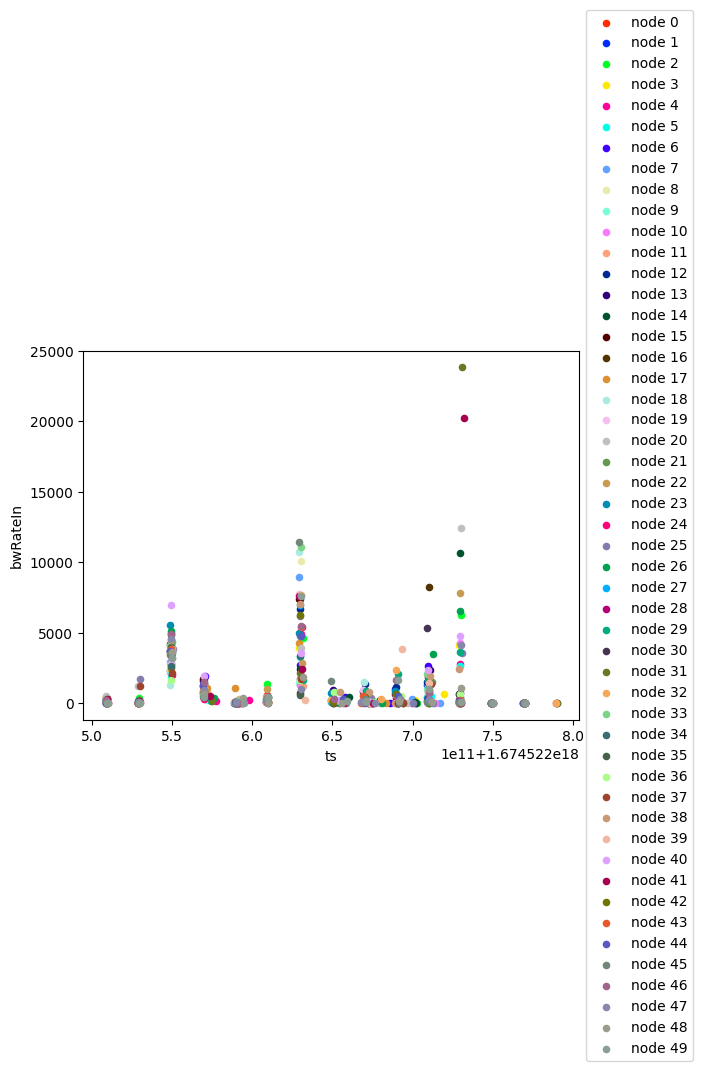

In [3737]:
# aggregated Bandwidth Rate In

aggBwTs = {
    "bwRateIn": [],
    "ts": []
}

def resetBwTs():
    global aggBwTs
    aggBwTs = {
        "bwRateIn": [],
        "ts": []
    }
    return

aggBwTsList = []
for i in range(len(bandwidthStatsList)):
    for j in range(len(bandwidthStatsList[i]["bandwidthRateIn"])):
        aggBwTs["bwRateIn"].append(bandwidthStatsList[i]["bandwidthRateIn"][j])
        aggBwTs["ts"].append(bandwidthStatsList[i]["tsRateIn"][j])
    aggBwTsList.append(aggBwTs)
    resetBwTs()

df1 = pd.DataFrame(aggBwTsList[0])
df2 = pd.DataFrame(aggBwTsList[1])
df3 = pd.DataFrame(aggBwTsList[2])
df4 = pd.DataFrame(aggBwTsList[3])
df5 = pd.DataFrame(aggBwTsList[4])
df6 = pd.DataFrame(aggBwTsList[5])
df7 = pd.DataFrame(aggBwTsList[6])
df8 = pd.DataFrame(aggBwTsList[7])
df9 = pd.DataFrame(aggBwTsList[8])
df10 = pd.DataFrame(aggBwTsList[9])
df11 = pd.DataFrame(aggBwTsList[10])
df12 = pd.DataFrame(aggBwTsList[11])
df13 = pd.DataFrame(aggBwTsList[12])
df14 = pd.DataFrame(aggBwTsList[13])
df15 = pd.DataFrame(aggBwTsList[14])
df16 = pd.DataFrame(aggBwTsList[15])
df17 = pd.DataFrame(aggBwTsList[16])
df18 = pd.DataFrame(aggBwTsList[17])
df19 = pd.DataFrame(aggBwTsList[18])
df20 = pd.DataFrame(aggBwTsList[19])
df21 = pd.DataFrame(aggBwTsList[20])
df22 = pd.DataFrame(aggBwTsList[21])
df23 = pd.DataFrame(aggBwTsList[22])
df24 = pd.DataFrame(aggBwTsList[23])
df25 = pd.DataFrame(aggBwTsList[24])
df26 = pd.DataFrame(aggBwTsList[25])
df27 = pd.DataFrame(aggBwTsList[26])
df28 = pd.DataFrame(aggBwTsList[27])
df29 = pd.DataFrame(aggBwTsList[28])
df30 = pd.DataFrame(aggBwTsList[29])
df31 = pd.DataFrame(aggBwTsList[30])
df32 = pd.DataFrame(aggBwTsList[31])
df33 = pd.DataFrame(aggBwTsList[32])
df34 = pd.DataFrame(aggBwTsList[33])
df35 = pd.DataFrame(aggBwTsList[34])
df36 = pd.DataFrame(aggBwTsList[35])
df37 = pd.DataFrame(aggBwTsList[36])
df38 = pd.DataFrame(aggBwTsList[37])
df39 = pd.DataFrame(aggBwTsList[38])
df40 = pd.DataFrame(aggBwTsList[39])
df41 = pd.DataFrame(aggBwTsList[40])
df42 = pd.DataFrame(aggBwTsList[41])
df43 = pd.DataFrame(aggBwTsList[42])
df44 = pd.DataFrame(aggBwTsList[43])
df45 = pd.DataFrame(aggBwTsList[44])
df46 = pd.DataFrame(aggBwTsList[45])
df47 = pd.DataFrame(aggBwTsList[46])
df48 = pd.DataFrame(aggBwTsList[47])
df49 = pd.DataFrame(aggBwTsList[48])
df50 = pd.DataFrame(aggBwTsList[49])

plt.figure()

c = [
    "#FF2D00", # red
    "#002CFF", # blue
    "#00FF24", # lime green
    "#FFE800", # yellow
    "#FF009D", # magenta
    "#00FFE7", # teal
    "#4100FF", # purple
    "#61A1FF", # light blue
    "#E8EBAA", # light yellow
    "#79FFD7", # sf green
    "#FA79FF", # pink
    "#FFA379", # orange
    "#002B94", # dark blue
    "#32007D", # dark purple
    "#00532E", # dark green
    "#530000", # dark red
    "#533300", # brown
    "#DE8F2F", # golden orange
    "#AAEBE0", # light sf green
    "#F4BFEE", # light pink
    "#BFBFBF", # grey
    "#639950", # army green
    "#C79C52", # gold
    "#008CB3", # darker sky blue
    "#FF007B", # neon pink
    "#817DAD", # purp grey
    "#00A150", # green
    "#00AEFF", # sky blue
    "#B50076", # dark magenta
    "#00AB80", # dark light green
    "#473352", # darker purple
    "#6B7822", # dirty yellow
    "#F5A958", # light orange
    "#7AD686", # light green
    "#396D70", # dark sea blue
    "#46614C", # darker army green
    "#A7FF87", # lemon green
    "#9E442E", # brick red
    "#CC9774", # skin
    "#F2B7A0", # peach
    "#DEA1FF", # light purple
    "#A60050", # dark neon pink
    "#6F7500", # dark dirty yellow
    "#E8582C", # pale orange
    "#5957C2", # purple blue
    "#708779", # light army green
    "#A1648B", # dirty pink
    "#8688AD", # hazy blue
    "#9B9C8C", # yellow grey
    "#8B9E93", # green grey
    "#9E9092", # red grey
]

ax1 = df1.plot(kind="scatter",  x="ts", y="bwRateIn", c=c[0], rot=0)
ax2 = df2.plot(ax=ax1, kind="scatter", x="ts", y="bwRateIn", c=c[1], rot=0)
ax3 = df3.plot(ax=ax2, kind="scatter", x="ts", y="bwRateIn", c=c[2], rot=0)
ax4 = df4.plot(ax=ax3, kind="scatter", x="ts", y="bwRateIn", c=c[3], rot=0)
ax5 = df5.plot(ax=ax4, kind="scatter", x="ts", y="bwRateIn", c=c[4], rot=0)
ax6 = df6.plot(ax=ax5, kind="scatter", x="ts", y="bwRateIn", c=c[5], rot=0)
ax7 = df7.plot(ax=ax6, kind="scatter", x="ts", y="bwRateIn", c=c[6], rot=0)
ax8 = df8.plot(ax=ax7, kind="scatter", x="ts", y="bwRateIn", c=c[7], rot=0)
ax9 = df9.plot(ax=ax8, kind="scatter", x="ts", y="bwRateIn", c=c[8], rot=0)
ax10 = df10.plot(ax=ax9, kind="scatter", x="ts", y="bwRateIn", c=c[9], rot=0)
ax11 = df11.plot(ax=ax10, kind="scatter", x="ts", y="bwRateIn", c=c[10], rot=0)
ax12 = df12.plot(ax=ax11, kind="scatter", x="ts", y="bwRateIn", c=c[11], rot=0)
ax13 = df13.plot(ax=ax12, kind="scatter", x="ts", y="bwRateIn", c=c[12], rot=0)
ax14 = df14.plot(ax=ax13, kind="scatter", x="ts", y="bwRateIn", c=c[13], rot=0)
ax15 = df15.plot(ax=ax14, kind="scatter", x="ts", y="bwRateIn", c=c[14], rot=0)
ax16 = df16.plot(ax=ax15, kind="scatter", x="ts", y="bwRateIn", c=c[15], rot=0)
ax17 = df17.plot(ax=ax16, kind="scatter", x="ts", y="bwRateIn", c=c[16], rot=0)
ax18 = df18.plot(ax=ax17, kind="scatter", x="ts", y="bwRateIn", c=c[17], rot=0)
ax19 = df19.plot(ax=ax18, kind="scatter", x="ts", y="bwRateIn", c=c[18], rot=0)
ax20 = df20.plot(ax=ax19, kind="scatter", x="ts", y="bwRateIn", c=c[19], rot=0)
ax21 = df21.plot(ax=ax20, kind="scatter", x="ts", y="bwRateIn", c=c[20], rot=0)
ax22 = df22.plot(ax=ax21, kind="scatter", x="ts", y="bwRateIn", c=c[21], rot=0)
ax23 = df23.plot(ax=ax22, kind="scatter", x="ts", y="bwRateIn", c=c[22], rot=0)
ax24 = df24.plot(ax=ax23, kind="scatter", x="ts", y="bwRateIn", c=c[23], rot=0)
ax25 = df25.plot(ax=ax24, kind="scatter", x="ts", y="bwRateIn", c=c[24], rot=0)
ax26 = df26.plot(ax=ax25, kind="scatter", x="ts", y="bwRateIn", c=c[25], rot=0)
ax27 = df27.plot(ax=ax26, kind="scatter", x="ts", y="bwRateIn", c=c[26], rot=0)
ax28 = df28.plot(ax=ax27, kind="scatter", x="ts", y="bwRateIn", c=c[27], rot=0)
ax29 = df29.plot(ax=ax28, kind="scatter", x="ts", y="bwRateIn", c=c[28], rot=0)
ax30 = df30.plot(ax=ax29, kind="scatter", x="ts", y="bwRateIn", c=c[29], rot=0)
ax31 = df31.plot(ax=ax30, kind="scatter", x="ts", y="bwRateIn", c=c[30], rot=0)
ax32 = df32.plot(ax=ax31, kind="scatter", x="ts", y="bwRateIn", c=c[31], rot=0)
ax33 = df33.plot(ax=ax32, kind="scatter", x="ts", y="bwRateIn", c=c[32], rot=0)
ax34 = df34.plot(ax=ax33, kind="scatter", x="ts", y="bwRateIn", c=c[33], rot=0)
ax35 = df35.plot(ax=ax34, kind="scatter", x="ts", y="bwRateIn", c=c[34], rot=0)
ax36 = df36.plot(ax=ax35, kind="scatter", x="ts", y="bwRateIn", c=c[35], rot=0)
ax37 = df37.plot(ax=ax36, kind="scatter", x="ts", y="bwRateIn", c=c[36], rot=0)
ax38 = df38.plot(ax=ax37, kind="scatter", x="ts", y="bwRateIn", c=c[37], rot=0)
ax39 = df39.plot(ax=ax38, kind="scatter", x="ts", y="bwRateIn", c=c[38], rot=0)
ax40 = df40.plot(ax=ax39, kind="scatter", x="ts", y="bwRateIn", c=c[39], rot=0)
ax41 = df41.plot(ax=ax40, kind="scatter", x="ts", y="bwRateIn", c=c[40], rot=0)
ax42 = df42.plot(ax=ax41, kind="scatter", x="ts", y="bwRateIn", c=c[41], rot=0)
ax43 = df43.plot(ax=ax42, kind="scatter", x="ts", y="bwRateIn", c=c[42], rot=0)
ax44 = df44.plot(ax=ax43, kind="scatter", x="ts", y="bwRateIn", c=c[43], rot=0)
ax45 = df45.plot(ax=ax44, kind="scatter", x="ts", y="bwRateIn", c=c[44], rot=0)
ax46 = df46.plot(ax=ax45, kind="scatter", x="ts", y="bwRateIn", c=c[45], rot=0)
ax47 = df47.plot(ax=ax46, kind="scatter", x="ts", y="bwRateIn", c=c[46], rot=0)
ax48 = df48.plot(ax=ax47, kind="scatter", x="ts", y="bwRateIn", c=c[47], rot=0)
ax49 = df49.plot(ax=ax48, kind="scatter", x="ts", y="bwRateIn", c=c[48], rot=0)
ax50 = df50.plot(ax=ax49, kind="scatter", x="ts", y="bwRateIn", c=c[49], rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

<Figure size 640x480 with 0 Axes>

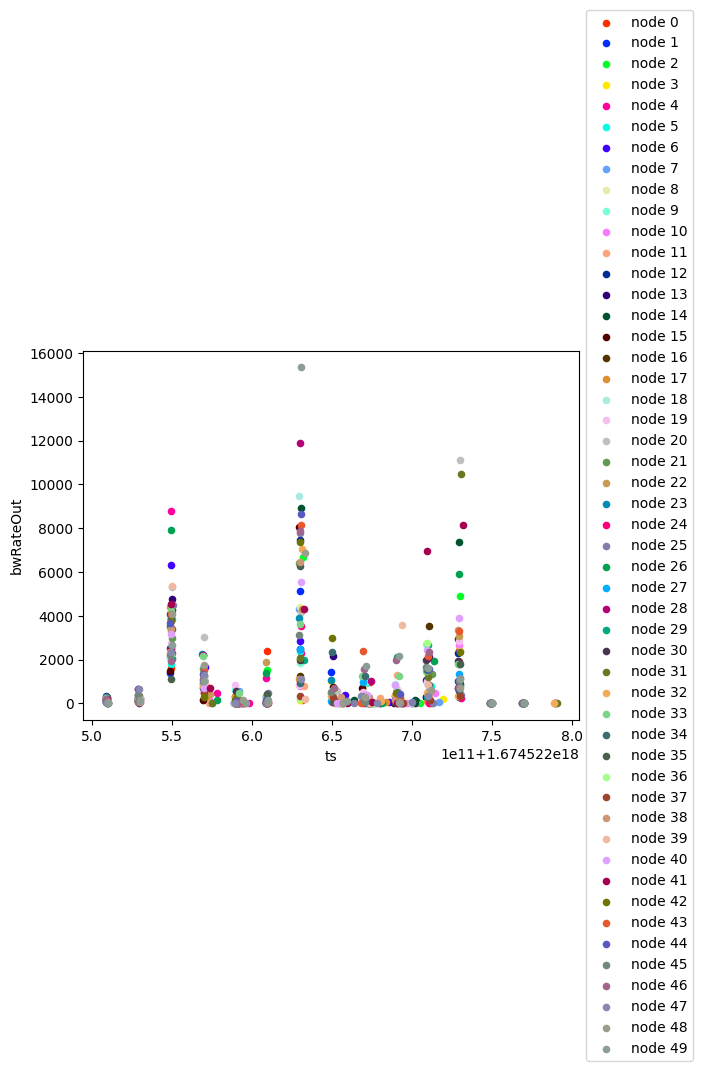

In [3738]:
# aggregated Bandwidth Rate Out

aggBwTs = {
    "bwRateOut": [],
    "ts": []
}

def resetBwTs():
    global aggBwTs
    aggBwTs = {
        "bwRateOut": [],
        "ts": []
    }
    return

aggBwTsList = []
for i in range(len(bandwidthStatsList)):
    for j in range(len(bandwidthStatsList[i]["bandwidthRateOut"])):
        aggBwTs["bwRateOut"].append(bandwidthStatsList[i]["bandwidthRateOut"][j])
        aggBwTs["ts"].append(bandwidthStatsList[i]["tsRateOut"][j])
    aggBwTsList.append(aggBwTs)
    resetBwTs()

df1 = pd.DataFrame(aggBwTsList[0])
df2 = pd.DataFrame(aggBwTsList[1])
df3 = pd.DataFrame(aggBwTsList[2])
df4 = pd.DataFrame(aggBwTsList[3])
df5 = pd.DataFrame(aggBwTsList[4])
df6 = pd.DataFrame(aggBwTsList[5])
df7 = pd.DataFrame(aggBwTsList[6])
df8 = pd.DataFrame(aggBwTsList[7])
df9 = pd.DataFrame(aggBwTsList[8])
df10 = pd.DataFrame(aggBwTsList[9])
df11 = pd.DataFrame(aggBwTsList[10])
df12 = pd.DataFrame(aggBwTsList[11])
df13 = pd.DataFrame(aggBwTsList[12])
df14 = pd.DataFrame(aggBwTsList[13])
df15 = pd.DataFrame(aggBwTsList[14])
df16 = pd.DataFrame(aggBwTsList[15])
df17 = pd.DataFrame(aggBwTsList[16])
df18 = pd.DataFrame(aggBwTsList[17])
df19 = pd.DataFrame(aggBwTsList[18])
df20 = pd.DataFrame(aggBwTsList[19])
df21 = pd.DataFrame(aggBwTsList[20])
df22 = pd.DataFrame(aggBwTsList[21])
df23 = pd.DataFrame(aggBwTsList[22])
df24 = pd.DataFrame(aggBwTsList[23])
df25 = pd.DataFrame(aggBwTsList[24])
df26 = pd.DataFrame(aggBwTsList[25])
df27 = pd.DataFrame(aggBwTsList[26])
df28 = pd.DataFrame(aggBwTsList[27])
df29 = pd.DataFrame(aggBwTsList[28])
df30 = pd.DataFrame(aggBwTsList[29])
df31 = pd.DataFrame(aggBwTsList[30])
df32 = pd.DataFrame(aggBwTsList[31])
df33 = pd.DataFrame(aggBwTsList[32])
df34 = pd.DataFrame(aggBwTsList[33])
df35 = pd.DataFrame(aggBwTsList[34])
df36 = pd.DataFrame(aggBwTsList[35])
df37 = pd.DataFrame(aggBwTsList[36])
df38 = pd.DataFrame(aggBwTsList[37])
df39 = pd.DataFrame(aggBwTsList[38])
df40 = pd.DataFrame(aggBwTsList[39])
df41 = pd.DataFrame(aggBwTsList[40])
df42 = pd.DataFrame(aggBwTsList[41])
df43 = pd.DataFrame(aggBwTsList[42])
df44 = pd.DataFrame(aggBwTsList[43])
df45 = pd.DataFrame(aggBwTsList[44])
df46 = pd.DataFrame(aggBwTsList[45])
df47 = pd.DataFrame(aggBwTsList[46])
df48 = pd.DataFrame(aggBwTsList[47])
df49 = pd.DataFrame(aggBwTsList[48])
df50 = pd.DataFrame(aggBwTsList[49])

plt.figure()

c = [
    "#FF2D00", # red
    "#002CFF", # blue
    "#00FF24", # lime green
    "#FFE800", # yellow
    "#FF009D", # magenta
    "#00FFE7", # teal
    "#4100FF", # purple
    "#61A1FF", # light blue
    "#E8EBAA", # light yellow
    "#79FFD7", # sf green
    "#FA79FF", # pink
    "#FFA379", # orange
    "#002B94", # dark blue
    "#32007D", # dark purple
    "#00532E", # dark green
    "#530000", # dark red
    "#533300", # brown
    "#DE8F2F", # golden orange
    "#AAEBE0", # light sf green
    "#F4BFEE", # light pink
    "#BFBFBF", # grey
    "#639950", # army green
    "#C79C52", # gold
    "#008CB3", # darker sky blue
    "#FF007B", # neon pink
    "#817DAD", # purp grey
    "#00A150", # green
    "#00AEFF", # sky blue
    "#B50076", # dark magenta
    "#00AB80", # dark light green
    "#473352", # darker purple
    "#6B7822", # dirty yellow
    "#F5A958", # light orange
    "#7AD686", # light green
    "#396D70", # dark sea blue
    "#46614C", # darker army green
    "#A7FF87", # lemon green
    "#9E442E", # brick red
    "#CC9774", # skin
    "#F2B7A0", # peach
    "#DEA1FF", # light purple
    "#A60050", # dark neon pink
    "#6F7500", # dark dirty yellow
    "#E8582C", # pale orange
    "#5957C2", # purple blue
    "#708779", # light army green
    "#A1648B", # dirty pink
    "#8688AD", # hazy blue
    "#9B9C8C", # yellow grey
    "#8B9E93", # green grey
    "#9E9092", # red grey
]

ax1 = df1.plot(kind="scatter",  x="ts", y="bwRateOut", c=c[0], rot=0)
ax2 = df2.plot(ax=ax1, kind="scatter", x="ts", y="bwRateOut", c=c[1], rot=0)
ax3 = df3.plot(ax=ax2, kind="scatter", x="ts", y="bwRateOut", c=c[2], rot=0)
ax4 = df4.plot(ax=ax3, kind="scatter", x="ts", y="bwRateOut", c=c[3], rot=0)
ax5 = df5.plot(ax=ax4, kind="scatter", x="ts", y="bwRateOut", c=c[4], rot=0)
ax6 = df6.plot(ax=ax5, kind="scatter", x="ts", y="bwRateOut", c=c[5], rot=0)
ax7 = df7.plot(ax=ax6, kind="scatter", x="ts", y="bwRateOut", c=c[6], rot=0)
ax8 = df8.plot(ax=ax7, kind="scatter", x="ts", y="bwRateOut", c=c[7], rot=0)
ax9 = df9.plot(ax=ax8, kind="scatter", x="ts", y="bwRateOut", c=c[8], rot=0)
ax10 = df10.plot(ax=ax9, kind="scatter", x="ts", y="bwRateOut", c=c[9], rot=0)
ax11 = df11.plot(ax=ax10, kind="scatter", x="ts", y="bwRateOut", c=c[10], rot=0)
ax12 = df12.plot(ax=ax11, kind="scatter", x="ts", y="bwRateOut", c=c[11], rot=0)
ax13 = df13.plot(ax=ax12, kind="scatter", x="ts", y="bwRateOut", c=c[12], rot=0)
ax14 = df14.plot(ax=ax13, kind="scatter", x="ts", y="bwRateOut", c=c[13], rot=0)
ax15 = df15.plot(ax=ax14, kind="scatter", x="ts", y="bwRateOut", c=c[14], rot=0)
ax16 = df16.plot(ax=ax15, kind="scatter", x="ts", y="bwRateOut", c=c[15], rot=0)
ax17 = df17.plot(ax=ax16, kind="scatter", x="ts", y="bwRateOut", c=c[16], rot=0)
ax18 = df18.plot(ax=ax17, kind="scatter", x="ts", y="bwRateOut", c=c[17], rot=0)
ax19 = df19.plot(ax=ax18, kind="scatter", x="ts", y="bwRateOut", c=c[18], rot=0)
ax20 = df20.plot(ax=ax19, kind="scatter", x="ts", y="bwRateOut", c=c[19], rot=0)
ax21 = df21.plot(ax=ax20, kind="scatter", x="ts", y="bwRateOut", c=c[20], rot=0)
ax22 = df22.plot(ax=ax21, kind="scatter", x="ts", y="bwRateOut", c=c[21], rot=0)
ax23 = df23.plot(ax=ax22, kind="scatter", x="ts", y="bwRateOut", c=c[22], rot=0)
ax24 = df24.plot(ax=ax23, kind="scatter", x="ts", y="bwRateOut", c=c[23], rot=0)
ax25 = df25.plot(ax=ax24, kind="scatter", x="ts", y="bwRateOut", c=c[24], rot=0)
ax26 = df26.plot(ax=ax25, kind="scatter", x="ts", y="bwRateOut", c=c[25], rot=0)
ax27 = df27.plot(ax=ax26, kind="scatter", x="ts", y="bwRateOut", c=c[26], rot=0)
ax28 = df28.plot(ax=ax27, kind="scatter", x="ts", y="bwRateOut", c=c[27], rot=0)
ax29 = df29.plot(ax=ax28, kind="scatter", x="ts", y="bwRateOut", c=c[28], rot=0)
ax30 = df30.plot(ax=ax29, kind="scatter", x="ts", y="bwRateOut", c=c[29], rot=0)
ax31 = df31.plot(ax=ax30, kind="scatter", x="ts", y="bwRateOut", c=c[30], rot=0)
ax32 = df32.plot(ax=ax31, kind="scatter", x="ts", y="bwRateOut", c=c[31], rot=0)
ax33 = df33.plot(ax=ax32, kind="scatter", x="ts", y="bwRateOut", c=c[32], rot=0)
ax34 = df34.plot(ax=ax33, kind="scatter", x="ts", y="bwRateOut", c=c[33], rot=0)
ax35 = df35.plot(ax=ax34, kind="scatter", x="ts", y="bwRateOut", c=c[34], rot=0)
ax36 = df36.plot(ax=ax35, kind="scatter", x="ts", y="bwRateOut", c=c[35], rot=0)
ax37 = df37.plot(ax=ax36, kind="scatter", x="ts", y="bwRateOut", c=c[36], rot=0)
ax38 = df38.plot(ax=ax37, kind="scatter", x="ts", y="bwRateOut", c=c[37], rot=0)
ax39 = df39.plot(ax=ax38, kind="scatter", x="ts", y="bwRateOut", c=c[38], rot=0)
ax40 = df40.plot(ax=ax39, kind="scatter", x="ts", y="bwRateOut", c=c[39], rot=0)
ax41 = df41.plot(ax=ax40, kind="scatter", x="ts", y="bwRateOut", c=c[40], rot=0)
ax42 = df42.plot(ax=ax41, kind="scatter", x="ts", y="bwRateOut", c=c[41], rot=0)
ax43 = df43.plot(ax=ax42, kind="scatter", x="ts", y="bwRateOut", c=c[42], rot=0)
ax44 = df44.plot(ax=ax43, kind="scatter", x="ts", y="bwRateOut", c=c[43], rot=0)
ax45 = df45.plot(ax=ax44, kind="scatter", x="ts", y="bwRateOut", c=c[44], rot=0)
ax46 = df46.plot(ax=ax45, kind="scatter", x="ts", y="bwRateOut", c=c[45], rot=0)
ax47 = df47.plot(ax=ax46, kind="scatter", x="ts", y="bwRateOut", c=c[46], rot=0)
ax48 = df48.plot(ax=ax47, kind="scatter", x="ts", y="bwRateOut", c=c[47], rot=0)
ax49 = df49.plot(ax=ax48, kind="scatter", x="ts", y="bwRateOut", c=c[48], rot=0)
ax50 = df50.plot(ax=ax49, kind="scatter", x="ts", y="bwRateOut", c=c[49], rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

In [3739]:
####### NODE DIAGNOSTICS PARSING #######

<Figure size 640x480 with 0 Axes>

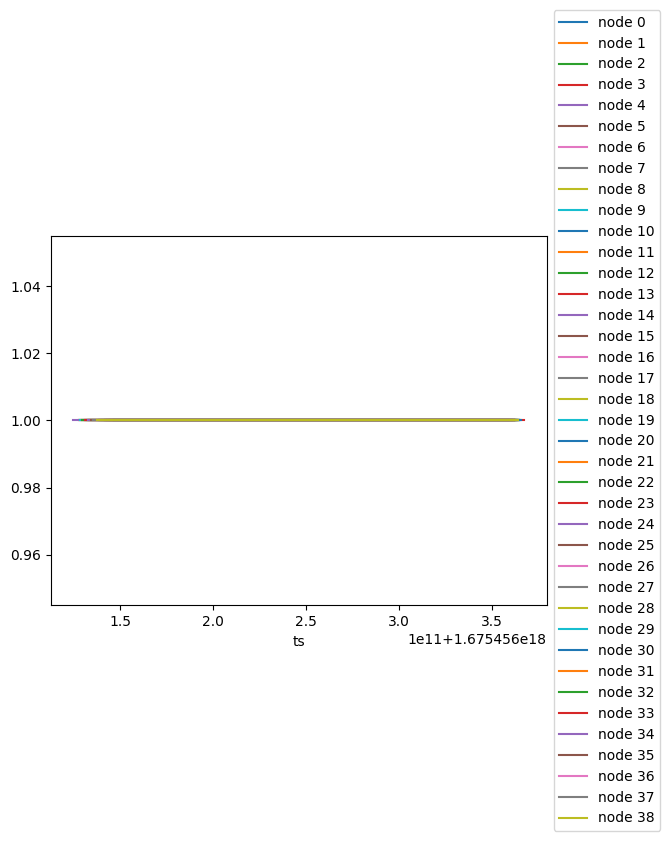

In [234]:
# EnableGC aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["EnableGC"])
df2 = pd.DataFrame(nodeDiagnostics[1]["EnableGC"])
df3 = pd.DataFrame(nodeDiagnostics[2]["EnableGC"])
df4 = pd.DataFrame(nodeDiagnostics[3]["EnableGC"])
df5 = pd.DataFrame(nodeDiagnostics[4]["EnableGC"])
df6 = pd.DataFrame(nodeDiagnostics[5]["EnableGC"])
df7 = pd.DataFrame(nodeDiagnostics[6]["EnableGC"])
df8 = pd.DataFrame(nodeDiagnostics[7]["EnableGC"])
df9 = pd.DataFrame(nodeDiagnostics[8]["EnableGC"])
df10 = pd.DataFrame(nodeDiagnostics[9]["EnableGC"])
df11 = pd.DataFrame(nodeDiagnostics[10]["EnableGC"])
df12 = pd.DataFrame(nodeDiagnostics[11]["EnableGC"])
df13 = pd.DataFrame(nodeDiagnostics[12]["EnableGC"])
df14 = pd.DataFrame(nodeDiagnostics[13]["EnableGC"])
df15 = pd.DataFrame(nodeDiagnostics[14]["EnableGC"])
df16 = pd.DataFrame(nodeDiagnostics[15]["EnableGC"])
df17 = pd.DataFrame(nodeDiagnostics[16]["EnableGC"])
df18 = pd.DataFrame(nodeDiagnostics[17]["EnableGC"])
df19 = pd.DataFrame(nodeDiagnostics[18]["EnableGC"])
df20 = pd.DataFrame(nodeDiagnostics[19]["EnableGC"])
df21 = pd.DataFrame(nodeDiagnostics[20]["EnableGC"])
df22 = pd.DataFrame(nodeDiagnostics[21]["EnableGC"])
df23 = pd.DataFrame(nodeDiagnostics[22]["EnableGC"])
df24 = pd.DataFrame(nodeDiagnostics[23]["EnableGC"])
df25 = pd.DataFrame(nodeDiagnostics[24]["EnableGC"])
df26 = pd.DataFrame(nodeDiagnostics[25]["EnableGC"])
df27 = pd.DataFrame(nodeDiagnostics[26]["EnableGC"])
df28 = pd.DataFrame(nodeDiagnostics[27]["EnableGC"])
df29 = pd.DataFrame(nodeDiagnostics[28]["EnableGC"])
df30 = pd.DataFrame(nodeDiagnostics[29]["EnableGC"])
df31 = pd.DataFrame(nodeDiagnostics[30]["EnableGC"])
df32 = pd.DataFrame(nodeDiagnostics[31]["EnableGC"])
df33 = pd.DataFrame(nodeDiagnostics[32]["EnableGC"])
df34 = pd.DataFrame(nodeDiagnostics[33]["EnableGC"])
df35 = pd.DataFrame(nodeDiagnostics[34]["EnableGC"])
df36 = pd.DataFrame(nodeDiagnostics[35]["EnableGC"])
df37 = pd.DataFrame(nodeDiagnostics[36]["EnableGC"])
df38 = pd.DataFrame(nodeDiagnostics[37]["EnableGC"])
df39 = pd.DataFrame(nodeDiagnostics[38]["EnableGC"])
df40 = pd.DataFrame(nodeDiagnostics[39]["EnableGC"])
# df41 = pd.DataFrame(nodeDiagnostics[40]["EnableGC"])
# df42 = pd.DataFrame(nodeDiagnostics[41]["EnableGC"])
# df43 = pd.DataFrame(nodeDiagnostics[42]["EnableGC"])
# df44 = pd.DataFrame(nodeDiagnostics[43]["EnableGC"])
# df45 = pd.DataFrame(nodeDiagnostics[44]["EnableGC"])
# df46 = pd.DataFrame(nodeDiagnostics[45]["EnableGC"])
# df47 = pd.DataFrame(nodeDiagnostics[46]["EnableGC"])
# df48 = pd.DataFrame(nodeDiagnostics[47]["EnableGC"])
# df49 = pd.DataFrame(nodeDiagnostics[48]["EnableGC"])
# df50 = pd.DataFrame(nodeDiagnostics[49]["EnableGC"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
# ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
# ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
# ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
# ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
# ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
# ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
# ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
# ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
# ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
# ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
# ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

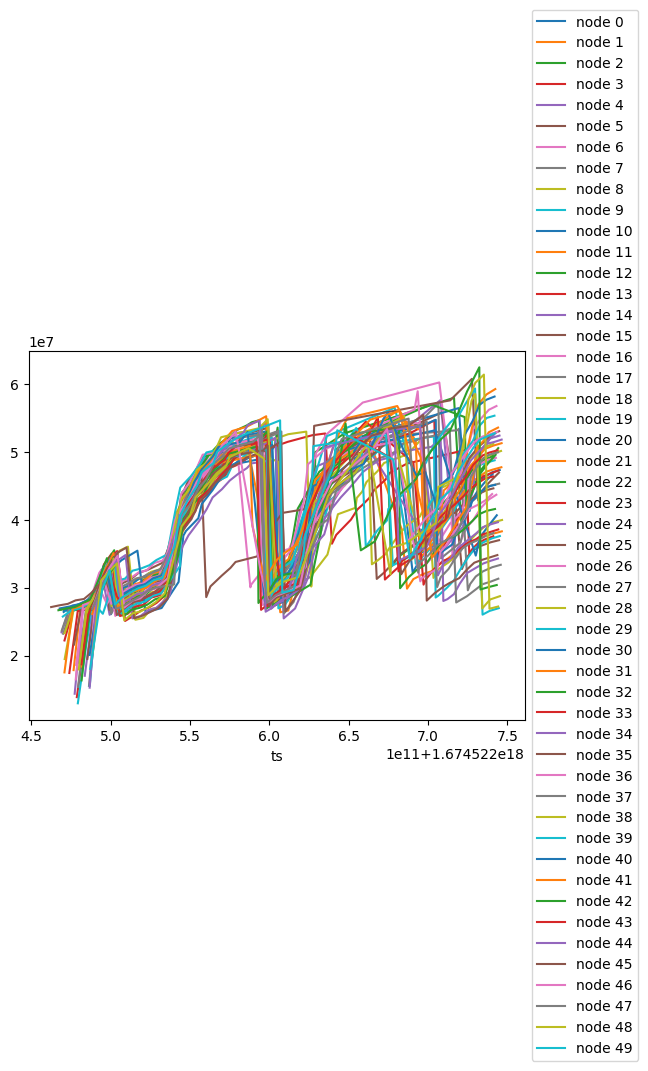

In [3741]:
# HeapAlloc aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["HeapAlloc"])
df2 = pd.DataFrame(nodeDiagnostics[1]["HeapAlloc"])
df3 = pd.DataFrame(nodeDiagnostics[2]["HeapAlloc"])
df4 = pd.DataFrame(nodeDiagnostics[3]["HeapAlloc"])
df5 = pd.DataFrame(nodeDiagnostics[4]["HeapAlloc"])
df6 = pd.DataFrame(nodeDiagnostics[5]["HeapAlloc"])
df7 = pd.DataFrame(nodeDiagnostics[6]["HeapAlloc"])
df8 = pd.DataFrame(nodeDiagnostics[7]["HeapAlloc"])
df9 = pd.DataFrame(nodeDiagnostics[8]["HeapAlloc"])
df10 = pd.DataFrame(nodeDiagnostics[9]["HeapAlloc"])
df11 = pd.DataFrame(nodeDiagnostics[10]["HeapAlloc"])
df12 = pd.DataFrame(nodeDiagnostics[11]["HeapAlloc"])
df13 = pd.DataFrame(nodeDiagnostics[12]["HeapAlloc"])
df14 = pd.DataFrame(nodeDiagnostics[13]["HeapAlloc"])
df15 = pd.DataFrame(nodeDiagnostics[14]["HeapAlloc"])
df16 = pd.DataFrame(nodeDiagnostics[15]["HeapAlloc"])
df17 = pd.DataFrame(nodeDiagnostics[16]["HeapAlloc"])
df18 = pd.DataFrame(nodeDiagnostics[17]["HeapAlloc"])
df19 = pd.DataFrame(nodeDiagnostics[18]["HeapAlloc"])
df20 = pd.DataFrame(nodeDiagnostics[19]["HeapAlloc"])
df21 = pd.DataFrame(nodeDiagnostics[20]["HeapAlloc"])
df22 = pd.DataFrame(nodeDiagnostics[21]["HeapAlloc"])
df23 = pd.DataFrame(nodeDiagnostics[22]["HeapAlloc"])
df24 = pd.DataFrame(nodeDiagnostics[23]["HeapAlloc"])
df25 = pd.DataFrame(nodeDiagnostics[24]["HeapAlloc"])
df26 = pd.DataFrame(nodeDiagnostics[25]["HeapAlloc"])
df27 = pd.DataFrame(nodeDiagnostics[26]["HeapAlloc"])
df28 = pd.DataFrame(nodeDiagnostics[27]["HeapAlloc"])
df29 = pd.DataFrame(nodeDiagnostics[28]["HeapAlloc"])
df30 = pd.DataFrame(nodeDiagnostics[29]["HeapAlloc"])
df31 = pd.DataFrame(nodeDiagnostics[30]["HeapAlloc"])
df32 = pd.DataFrame(nodeDiagnostics[31]["HeapAlloc"])
df33 = pd.DataFrame(nodeDiagnostics[32]["HeapAlloc"])
df34 = pd.DataFrame(nodeDiagnostics[33]["HeapAlloc"])
df35 = pd.DataFrame(nodeDiagnostics[34]["HeapAlloc"])
df36 = pd.DataFrame(nodeDiagnostics[35]["HeapAlloc"])
df37 = pd.DataFrame(nodeDiagnostics[36]["HeapAlloc"])
df38 = pd.DataFrame(nodeDiagnostics[37]["HeapAlloc"])
df39 = pd.DataFrame(nodeDiagnostics[38]["HeapAlloc"])
df40 = pd.DataFrame(nodeDiagnostics[39]["HeapAlloc"])
# df41 = pd.DataFrame(nodeDiagnostics[40]["HeapAlloc"])
# df42 = pd.DataFrame(nodeDiagnostics[41]["HeapAlloc"])
# df43 = pd.DataFrame(nodeDiagnostics[42]["HeapAlloc"])
# df44 = pd.DataFrame(nodeDiagnostics[43]["HeapAlloc"])
# df45 = pd.DataFrame(nodeDiagnostics[44]["HeapAlloc"])
# df46 = pd.DataFrame(nodeDiagnostics[45]["HeapAlloc"])
# df47 = pd.DataFrame(nodeDiagnostics[46]["HeapAlloc"])
# df48 = pd.DataFrame(nodeDiagnostics[47]["HeapAlloc"])
# df49 = pd.DataFrame(nodeDiagnostics[48]["HeapAlloc"])
# df50 = pd.DataFrame(nodeDiagnostics[49]["HeapAlloc"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
# ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
# ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
# ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
# ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
# ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
# ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
# ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
# ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
# ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
# ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
# ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)


plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

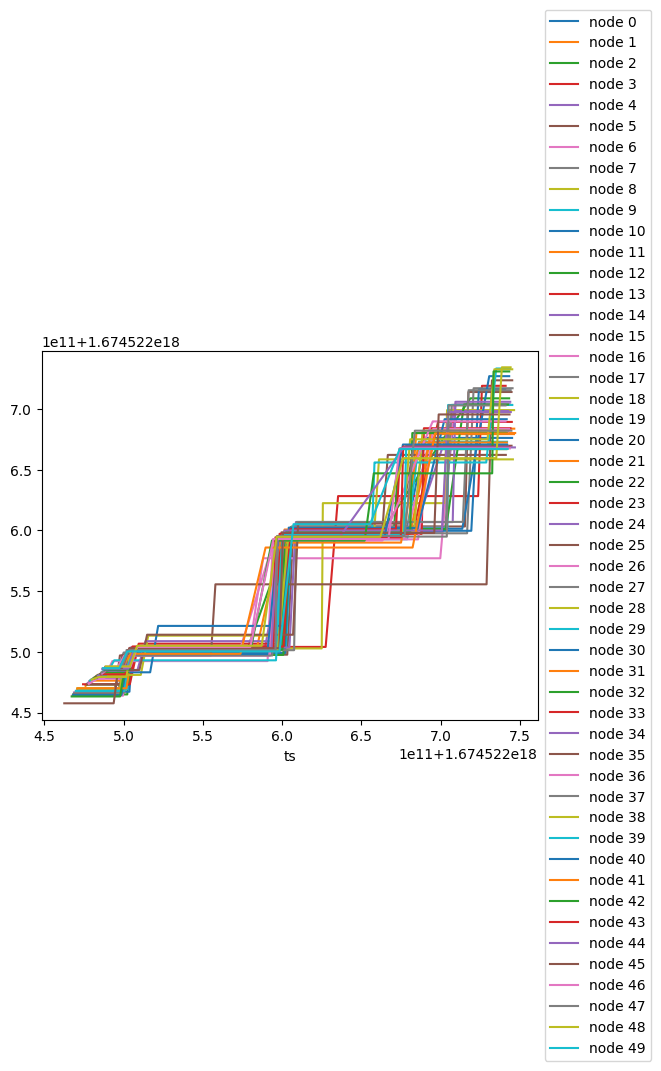

In [3742]:
# LastGC aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["LastGC"])
df2 = pd.DataFrame(nodeDiagnostics[1]["LastGC"])
df3 = pd.DataFrame(nodeDiagnostics[2]["LastGC"])
df4 = pd.DataFrame(nodeDiagnostics[3]["LastGC"])
df5 = pd.DataFrame(nodeDiagnostics[4]["LastGC"])
df6 = pd.DataFrame(nodeDiagnostics[5]["LastGC"])
df7 = pd.DataFrame(nodeDiagnostics[6]["LastGC"])
df8 = pd.DataFrame(nodeDiagnostics[7]["LastGC"])
df9 = pd.DataFrame(nodeDiagnostics[8]["LastGC"])
df10 = pd.DataFrame(nodeDiagnostics[9]["LastGC"])
df11 = pd.DataFrame(nodeDiagnostics[10]["LastGC"])
df12 = pd.DataFrame(nodeDiagnostics[11]["LastGC"])
df13 = pd.DataFrame(nodeDiagnostics[12]["LastGC"])
df14 = pd.DataFrame(nodeDiagnostics[13]["LastGC"])
df15 = pd.DataFrame(nodeDiagnostics[14]["LastGC"])
df16 = pd.DataFrame(nodeDiagnostics[15]["LastGC"])
df17 = pd.DataFrame(nodeDiagnostics[16]["LastGC"])
df18 = pd.DataFrame(nodeDiagnostics[17]["LastGC"])
df19 = pd.DataFrame(nodeDiagnostics[18]["LastGC"])
df20 = pd.DataFrame(nodeDiagnostics[19]["LastGC"])
df21 = pd.DataFrame(nodeDiagnostics[20]["LastGC"])
df22 = pd.DataFrame(nodeDiagnostics[21]["LastGC"])
df23 = pd.DataFrame(nodeDiagnostics[22]["LastGC"])
df24 = pd.DataFrame(nodeDiagnostics[23]["LastGC"])
df25 = pd.DataFrame(nodeDiagnostics[24]["LastGC"])
df26 = pd.DataFrame(nodeDiagnostics[25]["LastGC"])
df27 = pd.DataFrame(nodeDiagnostics[26]["LastGC"])
df28 = pd.DataFrame(nodeDiagnostics[27]["LastGC"])
df29 = pd.DataFrame(nodeDiagnostics[28]["LastGC"])
df30 = pd.DataFrame(nodeDiagnostics[29]["LastGC"])
df31 = pd.DataFrame(nodeDiagnostics[30]["LastGC"])
df32 = pd.DataFrame(nodeDiagnostics[31]["LastGC"])
df33 = pd.DataFrame(nodeDiagnostics[32]["LastGC"])
df34 = pd.DataFrame(nodeDiagnostics[33]["LastGC"])
df35 = pd.DataFrame(nodeDiagnostics[34]["LastGC"])
df36 = pd.DataFrame(nodeDiagnostics[35]["LastGC"])
df37 = pd.DataFrame(nodeDiagnostics[36]["LastGC"])
df38 = pd.DataFrame(nodeDiagnostics[37]["LastGC"])
df39 = pd.DataFrame(nodeDiagnostics[38]["LastGC"])
df40 = pd.DataFrame(nodeDiagnostics[39]["LastGC"])
df41 = pd.DataFrame(nodeDiagnostics[40]["LastGC"])
df42 = pd.DataFrame(nodeDiagnostics[41]["LastGC"])
df43 = pd.DataFrame(nodeDiagnostics[42]["LastGC"])
df44 = pd.DataFrame(nodeDiagnostics[43]["LastGC"])
df45 = pd.DataFrame(nodeDiagnostics[44]["LastGC"])
df46 = pd.DataFrame(nodeDiagnostics[45]["LastGC"])
df47 = pd.DataFrame(nodeDiagnostics[46]["LastGC"])
df48 = pd.DataFrame(nodeDiagnostics[47]["LastGC"])
df49 = pd.DataFrame(nodeDiagnostics[48]["LastGC"])
df50 = pd.DataFrame(nodeDiagnostics[49]["LastGC"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

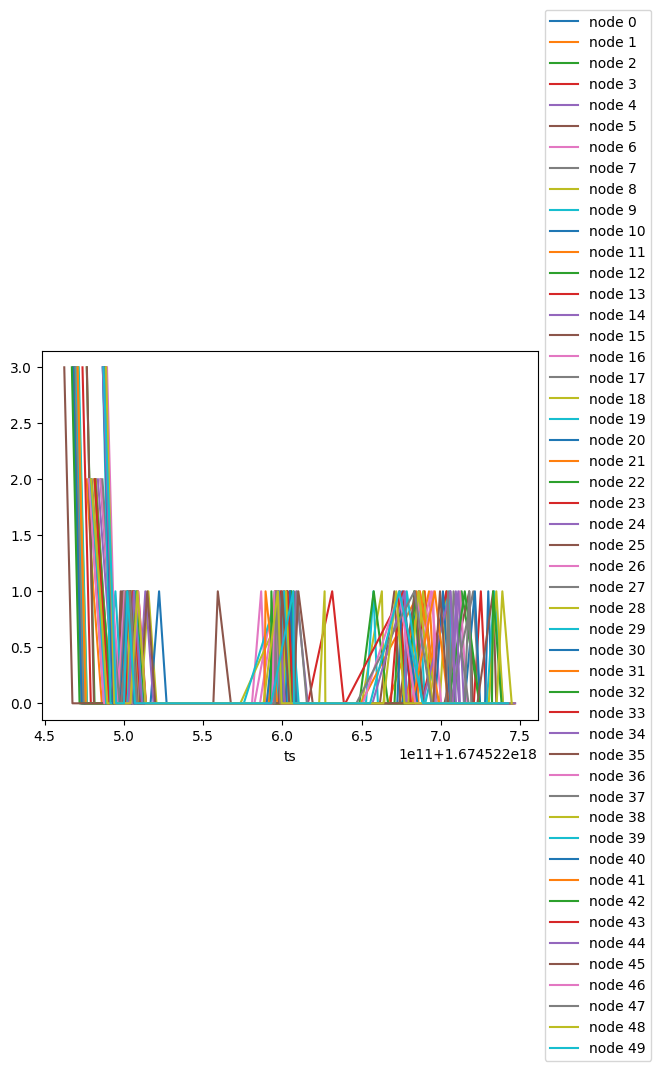

In [3743]:
# NumGC aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["NumGC"])
df2 = pd.DataFrame(nodeDiagnostics[1]["NumGC"])
df3 = pd.DataFrame(nodeDiagnostics[2]["NumGC"])
df4 = pd.DataFrame(nodeDiagnostics[3]["NumGC"])
df5 = pd.DataFrame(nodeDiagnostics[4]["NumGC"])
df6 = pd.DataFrame(nodeDiagnostics[5]["NumGC"])
df7 = pd.DataFrame(nodeDiagnostics[6]["NumGC"])
df8 = pd.DataFrame(nodeDiagnostics[7]["NumGC"])
df9 = pd.DataFrame(nodeDiagnostics[8]["NumGC"])
df10 = pd.DataFrame(nodeDiagnostics[9]["NumGC"])
df11 = pd.DataFrame(nodeDiagnostics[10]["NumGC"])
df12 = pd.DataFrame(nodeDiagnostics[11]["NumGC"])
df13 = pd.DataFrame(nodeDiagnostics[12]["NumGC"])
df14 = pd.DataFrame(nodeDiagnostics[13]["NumGC"])
df15 = pd.DataFrame(nodeDiagnostics[14]["NumGC"])
df16 = pd.DataFrame(nodeDiagnostics[15]["NumGC"])
df17 = pd.DataFrame(nodeDiagnostics[16]["NumGC"])
df18 = pd.DataFrame(nodeDiagnostics[17]["NumGC"])
df19 = pd.DataFrame(nodeDiagnostics[18]["NumGC"])
df20 = pd.DataFrame(nodeDiagnostics[19]["NumGC"])
df21 = pd.DataFrame(nodeDiagnostics[20]["NumGC"])
df22 = pd.DataFrame(nodeDiagnostics[21]["NumGC"])
df23 = pd.DataFrame(nodeDiagnostics[22]["NumGC"])
df24 = pd.DataFrame(nodeDiagnostics[23]["NumGC"])
df25 = pd.DataFrame(nodeDiagnostics[24]["NumGC"])
df26 = pd.DataFrame(nodeDiagnostics[25]["NumGC"])
df27 = pd.DataFrame(nodeDiagnostics[26]["NumGC"])
df28 = pd.DataFrame(nodeDiagnostics[27]["NumGC"])
df29 = pd.DataFrame(nodeDiagnostics[28]["NumGC"])
df30 = pd.DataFrame(nodeDiagnostics[29]["NumGC"])
df31 = pd.DataFrame(nodeDiagnostics[30]["NumGC"])
df32 = pd.DataFrame(nodeDiagnostics[31]["NumGC"])
df33 = pd.DataFrame(nodeDiagnostics[32]["NumGC"])
df34 = pd.DataFrame(nodeDiagnostics[33]["NumGC"])
df35 = pd.DataFrame(nodeDiagnostics[34]["NumGC"])
df36 = pd.DataFrame(nodeDiagnostics[35]["NumGC"])
df37 = pd.DataFrame(nodeDiagnostics[36]["NumGC"])
df38 = pd.DataFrame(nodeDiagnostics[37]["NumGC"])
df39 = pd.DataFrame(nodeDiagnostics[38]["NumGC"])
df40 = pd.DataFrame(nodeDiagnostics[39]["NumGC"])
df41 = pd.DataFrame(nodeDiagnostics[40]["NumGC"])
df42 = pd.DataFrame(nodeDiagnostics[41]["NumGC"])
df43 = pd.DataFrame(nodeDiagnostics[42]["NumGC"])
df44 = pd.DataFrame(nodeDiagnostics[43]["NumGC"])
df45 = pd.DataFrame(nodeDiagnostics[44]["NumGC"])
df46 = pd.DataFrame(nodeDiagnostics[45]["NumGC"])
df47 = pd.DataFrame(nodeDiagnostics[46]["NumGC"])
df48 = pd.DataFrame(nodeDiagnostics[47]["NumGC"])
df49 = pd.DataFrame(nodeDiagnostics[48]["NumGC"])
df50 = pd.DataFrame(nodeDiagnostics[49]["NumGC"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)


plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

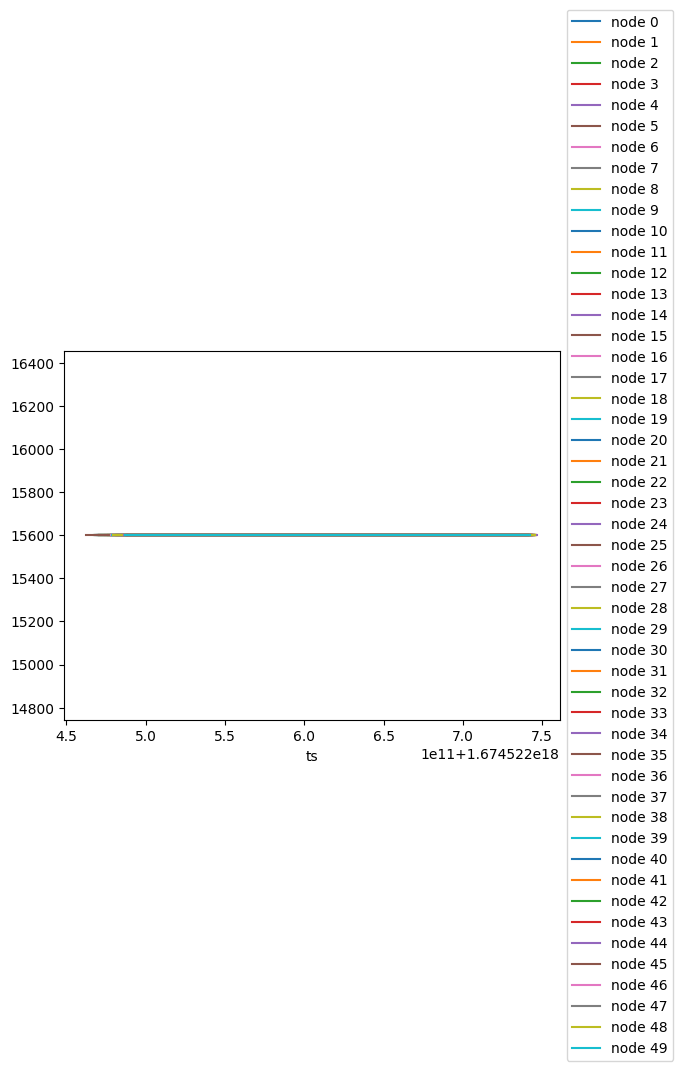

In [3744]:
# MCacheSys aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["MCacheSys"])
df2 = pd.DataFrame(nodeDiagnostics[1]["MCacheSys"])
df3 = pd.DataFrame(nodeDiagnostics[2]["MCacheSys"])
df4 = pd.DataFrame(nodeDiagnostics[3]["MCacheSys"])
df5 = pd.DataFrame(nodeDiagnostics[4]["MCacheSys"])
df6 = pd.DataFrame(nodeDiagnostics[5]["MCacheSys"])
df7 = pd.DataFrame(nodeDiagnostics[6]["MCacheSys"])
df8 = pd.DataFrame(nodeDiagnostics[7]["MCacheSys"])
df9 = pd.DataFrame(nodeDiagnostics[8]["MCacheSys"])
df10 = pd.DataFrame(nodeDiagnostics[9]["MCacheSys"])
df11 = pd.DataFrame(nodeDiagnostics[10]["MCacheSys"])
df12 = pd.DataFrame(nodeDiagnostics[11]["MCacheSys"])
df13 = pd.DataFrame(nodeDiagnostics[12]["MCacheSys"])
df14 = pd.DataFrame(nodeDiagnostics[13]["MCacheSys"])
df15 = pd.DataFrame(nodeDiagnostics[14]["MCacheSys"])
df16 = pd.DataFrame(nodeDiagnostics[15]["MCacheSys"])
df17 = pd.DataFrame(nodeDiagnostics[16]["MCacheSys"])
df18 = pd.DataFrame(nodeDiagnostics[17]["MCacheSys"])
df19 = pd.DataFrame(nodeDiagnostics[18]["MCacheSys"])
df20 = pd.DataFrame(nodeDiagnostics[19]["MCacheSys"])
df21 = pd.DataFrame(nodeDiagnostics[20]["MCacheSys"])
df22 = pd.DataFrame(nodeDiagnostics[21]["MCacheSys"])
df23 = pd.DataFrame(nodeDiagnostics[22]["MCacheSys"])
df24 = pd.DataFrame(nodeDiagnostics[23]["MCacheSys"])
df25 = pd.DataFrame(nodeDiagnostics[24]["MCacheSys"])
df26 = pd.DataFrame(nodeDiagnostics[25]["MCacheSys"])
df27 = pd.DataFrame(nodeDiagnostics[26]["MCacheSys"])
df28 = pd.DataFrame(nodeDiagnostics[27]["MCacheSys"])
df29 = pd.DataFrame(nodeDiagnostics[28]["MCacheSys"])
df30 = pd.DataFrame(nodeDiagnostics[29]["MCacheSys"])
df31 = pd.DataFrame(nodeDiagnostics[30]["MCacheSys"])
df32 = pd.DataFrame(nodeDiagnostics[31]["MCacheSys"])
df33 = pd.DataFrame(nodeDiagnostics[32]["MCacheSys"])
df34 = pd.DataFrame(nodeDiagnostics[33]["MCacheSys"])
df35 = pd.DataFrame(nodeDiagnostics[34]["MCacheSys"])
df36 = pd.DataFrame(nodeDiagnostics[35]["MCacheSys"])
df37 = pd.DataFrame(nodeDiagnostics[36]["MCacheSys"])
df38 = pd.DataFrame(nodeDiagnostics[37]["MCacheSys"])
df39 = pd.DataFrame(nodeDiagnostics[38]["MCacheSys"])
df40 = pd.DataFrame(nodeDiagnostics[39]["MCacheSys"])
df41 = pd.DataFrame(nodeDiagnostics[40]["MCacheSys"])
df42 = pd.DataFrame(nodeDiagnostics[41]["MCacheSys"])
df43 = pd.DataFrame(nodeDiagnostics[42]["MCacheSys"])
df44 = pd.DataFrame(nodeDiagnostics[43]["MCacheSys"])
df45 = pd.DataFrame(nodeDiagnostics[44]["MCacheSys"])
df46 = pd.DataFrame(nodeDiagnostics[45]["MCacheSys"])
df47 = pd.DataFrame(nodeDiagnostics[46]["MCacheSys"])
df48 = pd.DataFrame(nodeDiagnostics[47]["MCacheSys"])
df49 = pd.DataFrame(nodeDiagnostics[48]["MCacheSys"])
df50 = pd.DataFrame(nodeDiagnostics[49]["MCacheSys"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)


plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

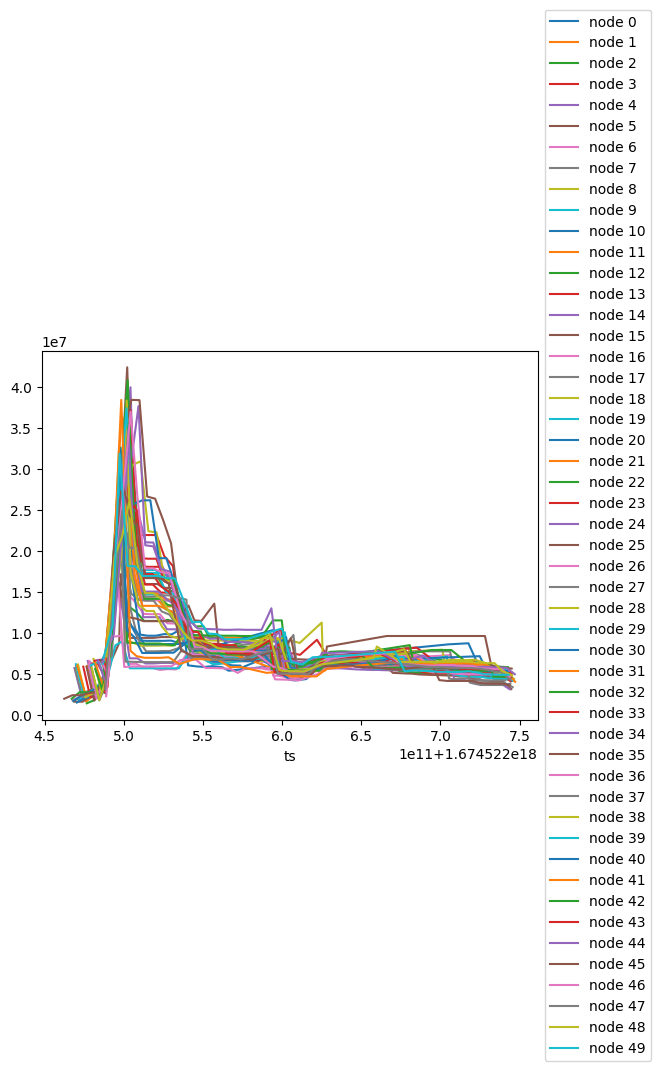

In [3745]:
# StackSys aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["StackSys"])
df2 = pd.DataFrame(nodeDiagnostics[1]["StackSys"])
df3 = pd.DataFrame(nodeDiagnostics[2]["StackSys"])
df4 = pd.DataFrame(nodeDiagnostics[3]["StackSys"])
df5 = pd.DataFrame(nodeDiagnostics[4]["StackSys"])
df6 = pd.DataFrame(nodeDiagnostics[5]["StackSys"])
df7 = pd.DataFrame(nodeDiagnostics[6]["StackSys"])
df8 = pd.DataFrame(nodeDiagnostics[7]["StackSys"])
df9 = pd.DataFrame(nodeDiagnostics[8]["StackSys"])
df10 = pd.DataFrame(nodeDiagnostics[9]["StackSys"])
df11 = pd.DataFrame(nodeDiagnostics[10]["StackSys"])
df12 = pd.DataFrame(nodeDiagnostics[11]["StackSys"])
df13 = pd.DataFrame(nodeDiagnostics[12]["StackSys"])
df14 = pd.DataFrame(nodeDiagnostics[13]["StackSys"])
df15 = pd.DataFrame(nodeDiagnostics[14]["StackSys"])
df16 = pd.DataFrame(nodeDiagnostics[15]["StackSys"])
df17 = pd.DataFrame(nodeDiagnostics[16]["StackSys"])
df18 = pd.DataFrame(nodeDiagnostics[17]["StackSys"])
df19 = pd.DataFrame(nodeDiagnostics[18]["StackSys"])
df20 = pd.DataFrame(nodeDiagnostics[19]["StackSys"])
df21 = pd.DataFrame(nodeDiagnostics[20]["StackSys"])
df22 = pd.DataFrame(nodeDiagnostics[21]["StackSys"])
df23 = pd.DataFrame(nodeDiagnostics[22]["StackSys"])
df24 = pd.DataFrame(nodeDiagnostics[23]["StackSys"])
df25 = pd.DataFrame(nodeDiagnostics[24]["StackSys"])
df26 = pd.DataFrame(nodeDiagnostics[25]["StackSys"])
df27 = pd.DataFrame(nodeDiagnostics[26]["StackSys"])
df28 = pd.DataFrame(nodeDiagnostics[27]["StackSys"])
df29 = pd.DataFrame(nodeDiagnostics[28]["StackSys"])
df30 = pd.DataFrame(nodeDiagnostics[29]["StackSys"])
df31 = pd.DataFrame(nodeDiagnostics[30]["StackSys"])
df32 = pd.DataFrame(nodeDiagnostics[31]["StackSys"])
df33 = pd.DataFrame(nodeDiagnostics[32]["StackSys"])
df34 = pd.DataFrame(nodeDiagnostics[33]["StackSys"])
df35 = pd.DataFrame(nodeDiagnostics[34]["StackSys"])
df36 = pd.DataFrame(nodeDiagnostics[35]["StackSys"])
df37 = pd.DataFrame(nodeDiagnostics[36]["StackSys"])
df38 = pd.DataFrame(nodeDiagnostics[37]["StackSys"])
df39 = pd.DataFrame(nodeDiagnostics[38]["StackSys"])
df40 = pd.DataFrame(nodeDiagnostics[39]["StackSys"])
df41 = pd.DataFrame(nodeDiagnostics[40]["StackSys"])
df42 = pd.DataFrame(nodeDiagnostics[41]["StackSys"])
df43 = pd.DataFrame(nodeDiagnostics[42]["StackSys"])
df44 = pd.DataFrame(nodeDiagnostics[43]["StackSys"])
df45 = pd.DataFrame(nodeDiagnostics[44]["StackSys"])
df46 = pd.DataFrame(nodeDiagnostics[45]["StackSys"])
df47 = pd.DataFrame(nodeDiagnostics[46]["StackSys"])
df48 = pd.DataFrame(nodeDiagnostics[47]["StackSys"])
df49 = pd.DataFrame(nodeDiagnostics[48]["StackSys"])
df50 = pd.DataFrame(nodeDiagnostics[49]["StackSys"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)


plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

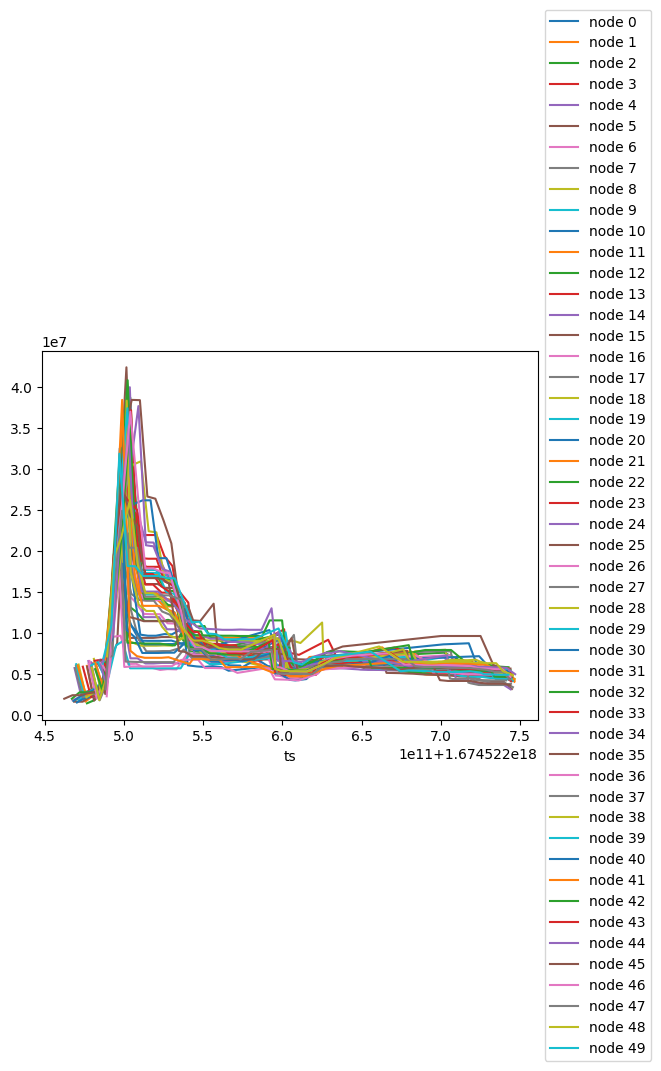

In [3746]:
# StackInuse aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["StackInuse"])
df2 = pd.DataFrame(nodeDiagnostics[1]["StackInuse"])
df3 = pd.DataFrame(nodeDiagnostics[2]["StackInuse"])
df4 = pd.DataFrame(nodeDiagnostics[3]["StackInuse"])
df5 = pd.DataFrame(nodeDiagnostics[4]["StackInuse"])
df6 = pd.DataFrame(nodeDiagnostics[5]["StackInuse"])
df7 = pd.DataFrame(nodeDiagnostics[6]["StackInuse"])
df8 = pd.DataFrame(nodeDiagnostics[7]["StackInuse"])
df9 = pd.DataFrame(nodeDiagnostics[8]["StackInuse"])
df10 = pd.DataFrame(nodeDiagnostics[9]["StackInuse"])
df11 = pd.DataFrame(nodeDiagnostics[10]["StackInuse"])
df12 = pd.DataFrame(nodeDiagnostics[11]["StackInuse"])
df13 = pd.DataFrame(nodeDiagnostics[12]["StackInuse"])
df14 = pd.DataFrame(nodeDiagnostics[13]["StackInuse"])
df15 = pd.DataFrame(nodeDiagnostics[14]["StackInuse"])
df16 = pd.DataFrame(nodeDiagnostics[15]["StackInuse"])
df17 = pd.DataFrame(nodeDiagnostics[16]["StackInuse"])
df18 = pd.DataFrame(nodeDiagnostics[17]["StackInuse"])
df19 = pd.DataFrame(nodeDiagnostics[18]["StackInuse"])
df20 = pd.DataFrame(nodeDiagnostics[19]["StackInuse"])
df21 = pd.DataFrame(nodeDiagnostics[20]["StackInuse"])
df22 = pd.DataFrame(nodeDiagnostics[21]["StackInuse"])
df23 = pd.DataFrame(nodeDiagnostics[22]["StackInuse"])
df24 = pd.DataFrame(nodeDiagnostics[23]["StackInuse"])
df25 = pd.DataFrame(nodeDiagnostics[24]["StackInuse"])
df26 = pd.DataFrame(nodeDiagnostics[25]["StackInuse"])
df27 = pd.DataFrame(nodeDiagnostics[26]["StackInuse"])
df28 = pd.DataFrame(nodeDiagnostics[27]["StackInuse"])
df29 = pd.DataFrame(nodeDiagnostics[28]["StackInuse"])
df30 = pd.DataFrame(nodeDiagnostics[29]["StackInuse"])
df31 = pd.DataFrame(nodeDiagnostics[30]["StackInuse"])
df32 = pd.DataFrame(nodeDiagnostics[31]["StackInuse"])
df33 = pd.DataFrame(nodeDiagnostics[32]["StackInuse"])
df34 = pd.DataFrame(nodeDiagnostics[33]["StackInuse"])
df35 = pd.DataFrame(nodeDiagnostics[34]["StackInuse"])
df36 = pd.DataFrame(nodeDiagnostics[35]["StackInuse"])
df37 = pd.DataFrame(nodeDiagnostics[36]["StackInuse"])
df38 = pd.DataFrame(nodeDiagnostics[37]["StackInuse"])
df39 = pd.DataFrame(nodeDiagnostics[38]["StackInuse"])
df40 = pd.DataFrame(nodeDiagnostics[39]["StackInuse"])
df41 = pd.DataFrame(nodeDiagnostics[40]["StackInuse"])
df42 = pd.DataFrame(nodeDiagnostics[41]["StackInuse"])
df43 = pd.DataFrame(nodeDiagnostics[42]["StackInuse"])
df44 = pd.DataFrame(nodeDiagnostics[43]["StackInuse"])
df45 = pd.DataFrame(nodeDiagnostics[44]["StackInuse"])
df46 = pd.DataFrame(nodeDiagnostics[45]["StackInuse"])
df47 = pd.DataFrame(nodeDiagnostics[46]["StackInuse"])
df48 = pd.DataFrame(nodeDiagnostics[47]["StackInuse"])
df49 = pd.DataFrame(nodeDiagnostics[48]["StackInuse"])
df50 = pd.DataFrame(nodeDiagnostics[49]["StackInuse"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)


plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

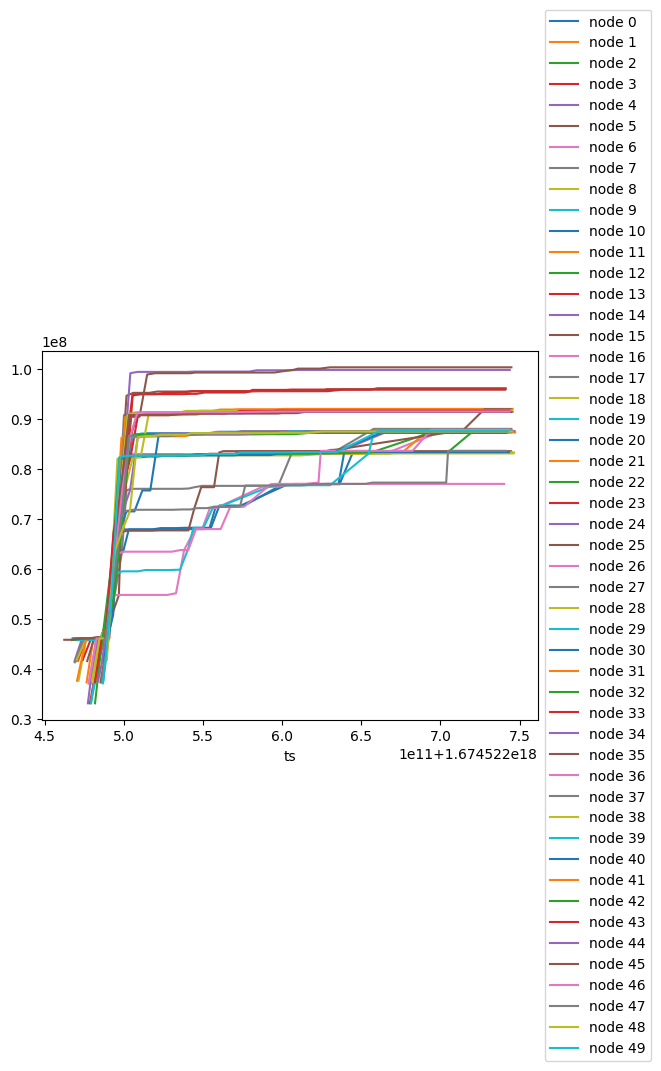

In [3747]:
# Sys aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["Sys"])
df2 = pd.DataFrame(nodeDiagnostics[1]["Sys"])
df3 = pd.DataFrame(nodeDiagnostics[2]["Sys"])
df4 = pd.DataFrame(nodeDiagnostics[3]["Sys"])
df5 = pd.DataFrame(nodeDiagnostics[4]["Sys"])
df6 = pd.DataFrame(nodeDiagnostics[5]["Sys"])
df7 = pd.DataFrame(nodeDiagnostics[6]["Sys"])
df8 = pd.DataFrame(nodeDiagnostics[7]["Sys"])
df9 = pd.DataFrame(nodeDiagnostics[8]["Sys"])
df10 = pd.DataFrame(nodeDiagnostics[9]["Sys"])
df11 = pd.DataFrame(nodeDiagnostics[10]["Sys"])
df12 = pd.DataFrame(nodeDiagnostics[11]["Sys"])
df13 = pd.DataFrame(nodeDiagnostics[12]["Sys"])
df14 = pd.DataFrame(nodeDiagnostics[13]["Sys"])
df15 = pd.DataFrame(nodeDiagnostics[14]["Sys"])
df16 = pd.DataFrame(nodeDiagnostics[15]["Sys"])
df17 = pd.DataFrame(nodeDiagnostics[16]["Sys"])
df18 = pd.DataFrame(nodeDiagnostics[17]["Sys"])
df19 = pd.DataFrame(nodeDiagnostics[18]["Sys"])
df20 = pd.DataFrame(nodeDiagnostics[19]["Sys"])
df21 = pd.DataFrame(nodeDiagnostics[20]["Sys"])
df22 = pd.DataFrame(nodeDiagnostics[21]["Sys"])
df23 = pd.DataFrame(nodeDiagnostics[22]["Sys"])
df24 = pd.DataFrame(nodeDiagnostics[23]["Sys"])
df25 = pd.DataFrame(nodeDiagnostics[24]["Sys"])
df26 = pd.DataFrame(nodeDiagnostics[25]["Sys"])
df27 = pd.DataFrame(nodeDiagnostics[26]["Sys"])
df28 = pd.DataFrame(nodeDiagnostics[27]["Sys"])
df29 = pd.DataFrame(nodeDiagnostics[28]["Sys"])
df30 = pd.DataFrame(nodeDiagnostics[29]["Sys"])
df31 = pd.DataFrame(nodeDiagnostics[30]["Sys"])
df32 = pd.DataFrame(nodeDiagnostics[31]["Sys"])
df33 = pd.DataFrame(nodeDiagnostics[32]["Sys"])
df34 = pd.DataFrame(nodeDiagnostics[33]["Sys"])
df35 = pd.DataFrame(nodeDiagnostics[34]["Sys"])
df36 = pd.DataFrame(nodeDiagnostics[35]["Sys"])
df37 = pd.DataFrame(nodeDiagnostics[36]["Sys"])
df38 = pd.DataFrame(nodeDiagnostics[37]["Sys"])
df39 = pd.DataFrame(nodeDiagnostics[38]["Sys"])
df40 = pd.DataFrame(nodeDiagnostics[39]["Sys"])
df41 = pd.DataFrame(nodeDiagnostics[40]["Sys"])
df42 = pd.DataFrame(nodeDiagnostics[41]["Sys"])
df43 = pd.DataFrame(nodeDiagnostics[42]["Sys"])
df44 = pd.DataFrame(nodeDiagnostics[43]["Sys"])
df45 = pd.DataFrame(nodeDiagnostics[44]["Sys"])
df46 = pd.DataFrame(nodeDiagnostics[45]["Sys"])
df47 = pd.DataFrame(nodeDiagnostics[46]["Sys"])
df48 = pd.DataFrame(nodeDiagnostics[47]["Sys"])
df49 = pd.DataFrame(nodeDiagnostics[48]["Sys"])
df50 = pd.DataFrame(nodeDiagnostics[49]["Sys"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)


plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

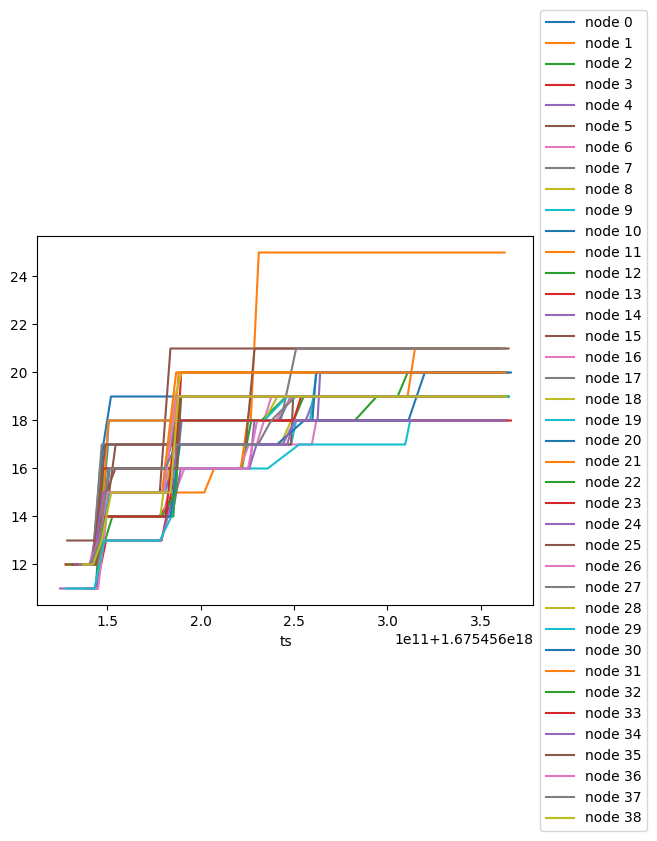

In [311]:
# NumThread aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["NumThread"])
df2 = pd.DataFrame(nodeDiagnostics[1]["NumThread"])
df3 = pd.DataFrame(nodeDiagnostics[2]["NumThread"])
df4 = pd.DataFrame(nodeDiagnostics[3]["NumThread"])
df5 = pd.DataFrame(nodeDiagnostics[4]["NumThread"])
df6 = pd.DataFrame(nodeDiagnostics[5]["NumThread"])
df7 = pd.DataFrame(nodeDiagnostics[6]["NumThread"])
df8 = pd.DataFrame(nodeDiagnostics[7]["NumThread"])
df9 = pd.DataFrame(nodeDiagnostics[8]["NumThread"])
df10 = pd.DataFrame(nodeDiagnostics[9]["NumThread"])
df11 = pd.DataFrame(nodeDiagnostics[10]["NumThread"])
df12 = pd.DataFrame(nodeDiagnostics[11]["NumThread"])
df13 = pd.DataFrame(nodeDiagnostics[12]["NumThread"])
df14 = pd.DataFrame(nodeDiagnostics[13]["NumThread"])
df15 = pd.DataFrame(nodeDiagnostics[14]["NumThread"])
df16 = pd.DataFrame(nodeDiagnostics[15]["NumThread"])
df17 = pd.DataFrame(nodeDiagnostics[16]["NumThread"])
df18 = pd.DataFrame(nodeDiagnostics[17]["NumThread"])
df19 = pd.DataFrame(nodeDiagnostics[18]["NumThread"])
df20 = pd.DataFrame(nodeDiagnostics[19]["NumThread"])
df21 = pd.DataFrame(nodeDiagnostics[20]["NumThread"])
df22 = pd.DataFrame(nodeDiagnostics[21]["NumThread"])
df23 = pd.DataFrame(nodeDiagnostics[22]["NumThread"])
df24 = pd.DataFrame(nodeDiagnostics[23]["NumThread"])
df25 = pd.DataFrame(nodeDiagnostics[24]["NumThread"])
df26 = pd.DataFrame(nodeDiagnostics[25]["NumThread"])
df27 = pd.DataFrame(nodeDiagnostics[26]["NumThread"])
df28 = pd.DataFrame(nodeDiagnostics[27]["NumThread"])
df29 = pd.DataFrame(nodeDiagnostics[28]["NumThread"])
df30 = pd.DataFrame(nodeDiagnostics[29]["NumThread"])
df31 = pd.DataFrame(nodeDiagnostics[30]["NumThread"])
df32 = pd.DataFrame(nodeDiagnostics[31]["NumThread"])
df33 = pd.DataFrame(nodeDiagnostics[32]["NumThread"])
df34 = pd.DataFrame(nodeDiagnostics[33]["NumThread"])
df35 = pd.DataFrame(nodeDiagnostics[34]["NumThread"])
df36 = pd.DataFrame(nodeDiagnostics[35]["NumThread"])
df37 = pd.DataFrame(nodeDiagnostics[36]["NumThread"])
df38 = pd.DataFrame(nodeDiagnostics[37]["NumThread"])
df39 = pd.DataFrame(nodeDiagnostics[38]["NumThread"])
df40 = pd.DataFrame(nodeDiagnostics[39]["NumThread"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

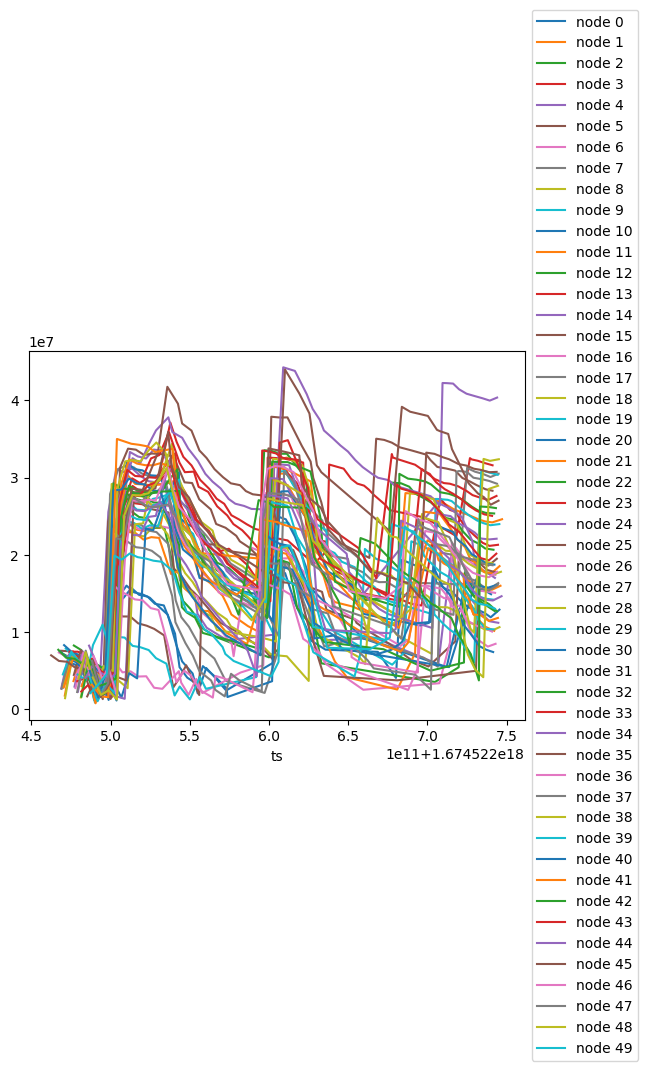

In [3749]:
# HeapIdle aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["HeapIdle"])
df2 = pd.DataFrame(nodeDiagnostics[1]["HeapIdle"])
df3 = pd.DataFrame(nodeDiagnostics[2]["HeapIdle"])
df4 = pd.DataFrame(nodeDiagnostics[3]["HeapIdle"])
df5 = pd.DataFrame(nodeDiagnostics[4]["HeapIdle"])
df6 = pd.DataFrame(nodeDiagnostics[5]["HeapIdle"])
df7 = pd.DataFrame(nodeDiagnostics[6]["HeapIdle"])
df8 = pd.DataFrame(nodeDiagnostics[7]["HeapIdle"])
df9 = pd.DataFrame(nodeDiagnostics[8]["HeapIdle"])
df10 = pd.DataFrame(nodeDiagnostics[9]["HeapIdle"])
df11 = pd.DataFrame(nodeDiagnostics[10]["HeapIdle"])
df12 = pd.DataFrame(nodeDiagnostics[11]["HeapIdle"])
df13 = pd.DataFrame(nodeDiagnostics[12]["HeapIdle"])
df14 = pd.DataFrame(nodeDiagnostics[13]["HeapIdle"])
df15 = pd.DataFrame(nodeDiagnostics[14]["HeapIdle"])
df16 = pd.DataFrame(nodeDiagnostics[15]["HeapIdle"])
df17 = pd.DataFrame(nodeDiagnostics[16]["HeapIdle"])
df18 = pd.DataFrame(nodeDiagnostics[17]["HeapIdle"])
df19 = pd.DataFrame(nodeDiagnostics[18]["HeapIdle"])
df20 = pd.DataFrame(nodeDiagnostics[19]["HeapIdle"])
df21 = pd.DataFrame(nodeDiagnostics[20]["HeapIdle"])
df22 = pd.DataFrame(nodeDiagnostics[21]["HeapIdle"])
df23 = pd.DataFrame(nodeDiagnostics[22]["HeapIdle"])
df24 = pd.DataFrame(nodeDiagnostics[23]["HeapIdle"])
df25 = pd.DataFrame(nodeDiagnostics[24]["HeapIdle"])
df26 = pd.DataFrame(nodeDiagnostics[25]["HeapIdle"])
df27 = pd.DataFrame(nodeDiagnostics[26]["HeapIdle"])
df28 = pd.DataFrame(nodeDiagnostics[27]["HeapIdle"])
df29 = pd.DataFrame(nodeDiagnostics[28]["HeapIdle"])
df30 = pd.DataFrame(nodeDiagnostics[29]["HeapIdle"])
df31 = pd.DataFrame(nodeDiagnostics[30]["HeapIdle"])
df32 = pd.DataFrame(nodeDiagnostics[31]["HeapIdle"])
df33 = pd.DataFrame(nodeDiagnostics[32]["HeapIdle"])
df34 = pd.DataFrame(nodeDiagnostics[33]["HeapIdle"])
df35 = pd.DataFrame(nodeDiagnostics[34]["HeapIdle"])
df36 = pd.DataFrame(nodeDiagnostics[35]["HeapIdle"])
df37 = pd.DataFrame(nodeDiagnostics[36]["HeapIdle"])
df38 = pd.DataFrame(nodeDiagnostics[37]["HeapIdle"])
df39 = pd.DataFrame(nodeDiagnostics[38]["HeapIdle"])
df40 = pd.DataFrame(nodeDiagnostics[39]["HeapIdle"])
df41 = pd.DataFrame(nodeDiagnostics[40]["HeapIdle"])
df42 = pd.DataFrame(nodeDiagnostics[41]["HeapIdle"])
df43 = pd.DataFrame(nodeDiagnostics[42]["HeapIdle"])
df44 = pd.DataFrame(nodeDiagnostics[43]["HeapIdle"])
df45 = pd.DataFrame(nodeDiagnostics[44]["HeapIdle"])
df46 = pd.DataFrame(nodeDiagnostics[45]["HeapIdle"])
df47 = pd.DataFrame(nodeDiagnostics[46]["HeapIdle"])
df48 = pd.DataFrame(nodeDiagnostics[47]["HeapIdle"])
df49 = pd.DataFrame(nodeDiagnostics[48]["HeapIdle"])
df50 = pd.DataFrame(nodeDiagnostics[49]["HeapIdle"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)


plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

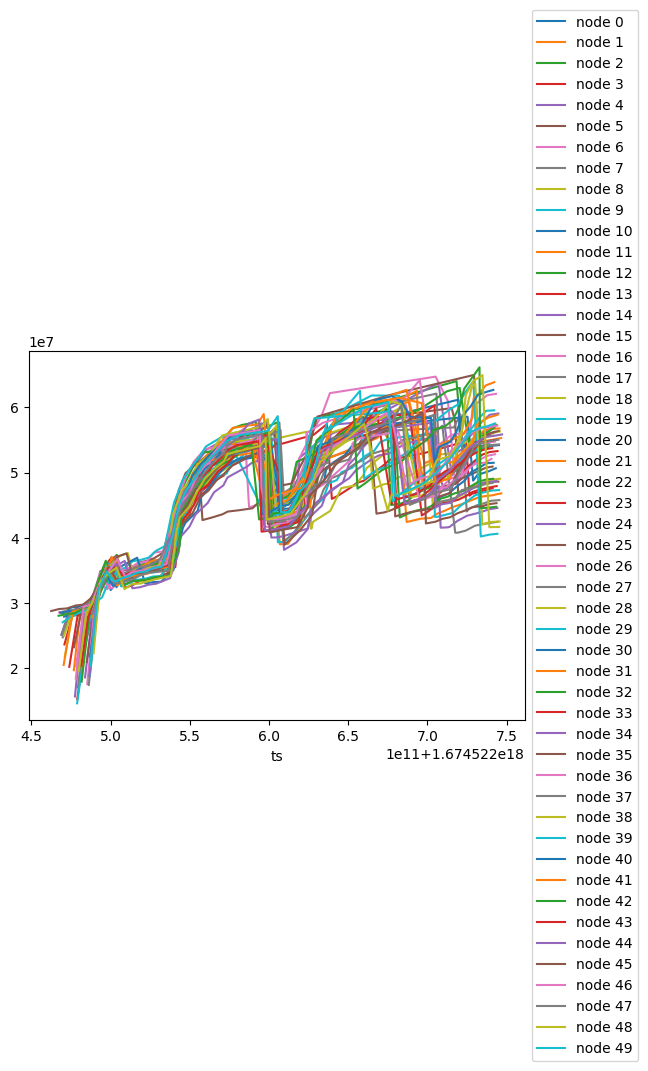

In [3750]:
# HeapInuse aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["HeapInuse"])
df2 = pd.DataFrame(nodeDiagnostics[1]["HeapInuse"])
df3 = pd.DataFrame(nodeDiagnostics[2]["HeapInuse"])
df4 = pd.DataFrame(nodeDiagnostics[3]["HeapInuse"])
df5 = pd.DataFrame(nodeDiagnostics[4]["HeapInuse"])
df6 = pd.DataFrame(nodeDiagnostics[5]["HeapInuse"])
df7 = pd.DataFrame(nodeDiagnostics[6]["HeapInuse"])
df8 = pd.DataFrame(nodeDiagnostics[7]["HeapInuse"])
df9 = pd.DataFrame(nodeDiagnostics[8]["HeapInuse"])
df10 = pd.DataFrame(nodeDiagnostics[9]["HeapInuse"])
df11 = pd.DataFrame(nodeDiagnostics[10]["HeapInuse"])
df12 = pd.DataFrame(nodeDiagnostics[11]["HeapInuse"])
df13 = pd.DataFrame(nodeDiagnostics[12]["HeapInuse"])
df14 = pd.DataFrame(nodeDiagnostics[13]["HeapInuse"])
df15 = pd.DataFrame(nodeDiagnostics[14]["HeapInuse"])
df16 = pd.DataFrame(nodeDiagnostics[15]["HeapInuse"])
df17 = pd.DataFrame(nodeDiagnostics[16]["HeapInuse"])
df18 = pd.DataFrame(nodeDiagnostics[17]["HeapInuse"])
df19 = pd.DataFrame(nodeDiagnostics[18]["HeapInuse"])
df20 = pd.DataFrame(nodeDiagnostics[19]["HeapInuse"])
df21 = pd.DataFrame(nodeDiagnostics[20]["HeapInuse"])
df22 = pd.DataFrame(nodeDiagnostics[21]["HeapInuse"])
df23 = pd.DataFrame(nodeDiagnostics[22]["HeapInuse"])
df24 = pd.DataFrame(nodeDiagnostics[23]["HeapInuse"])
df25 = pd.DataFrame(nodeDiagnostics[24]["HeapInuse"])
df26 = pd.DataFrame(nodeDiagnostics[25]["HeapInuse"])
df27 = pd.DataFrame(nodeDiagnostics[26]["HeapInuse"])
df28 = pd.DataFrame(nodeDiagnostics[27]["HeapInuse"])
df29 = pd.DataFrame(nodeDiagnostics[28]["HeapInuse"])
df30 = pd.DataFrame(nodeDiagnostics[29]["HeapInuse"])
df31 = pd.DataFrame(nodeDiagnostics[30]["HeapInuse"])
df32 = pd.DataFrame(nodeDiagnostics[31]["HeapInuse"])
df33 = pd.DataFrame(nodeDiagnostics[32]["HeapInuse"])
df34 = pd.DataFrame(nodeDiagnostics[33]["HeapInuse"])
df35 = pd.DataFrame(nodeDiagnostics[34]["HeapInuse"])
df36 = pd.DataFrame(nodeDiagnostics[35]["HeapInuse"])
df37 = pd.DataFrame(nodeDiagnostics[36]["HeapInuse"])
df38 = pd.DataFrame(nodeDiagnostics[37]["HeapInuse"])
df39 = pd.DataFrame(nodeDiagnostics[38]["HeapInuse"])
df40 = pd.DataFrame(nodeDiagnostics[39]["HeapInuse"])
df41 = pd.DataFrame(nodeDiagnostics[40]["HeapInuse"])
df42 = pd.DataFrame(nodeDiagnostics[41]["HeapInuse"])
df43 = pd.DataFrame(nodeDiagnostics[42]["HeapInuse"])
df44 = pd.DataFrame(nodeDiagnostics[43]["HeapInuse"])
df45 = pd.DataFrame(nodeDiagnostics[44]["HeapInuse"])
df46 = pd.DataFrame(nodeDiagnostics[45]["HeapInuse"])
df47 = pd.DataFrame(nodeDiagnostics[46]["HeapInuse"])
df48 = pd.DataFrame(nodeDiagnostics[47]["HeapInuse"])
df49 = pd.DataFrame(nodeDiagnostics[48]["HeapInuse"])
df50 = pd.DataFrame(nodeDiagnostics[49]["HeapInuse"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)


plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

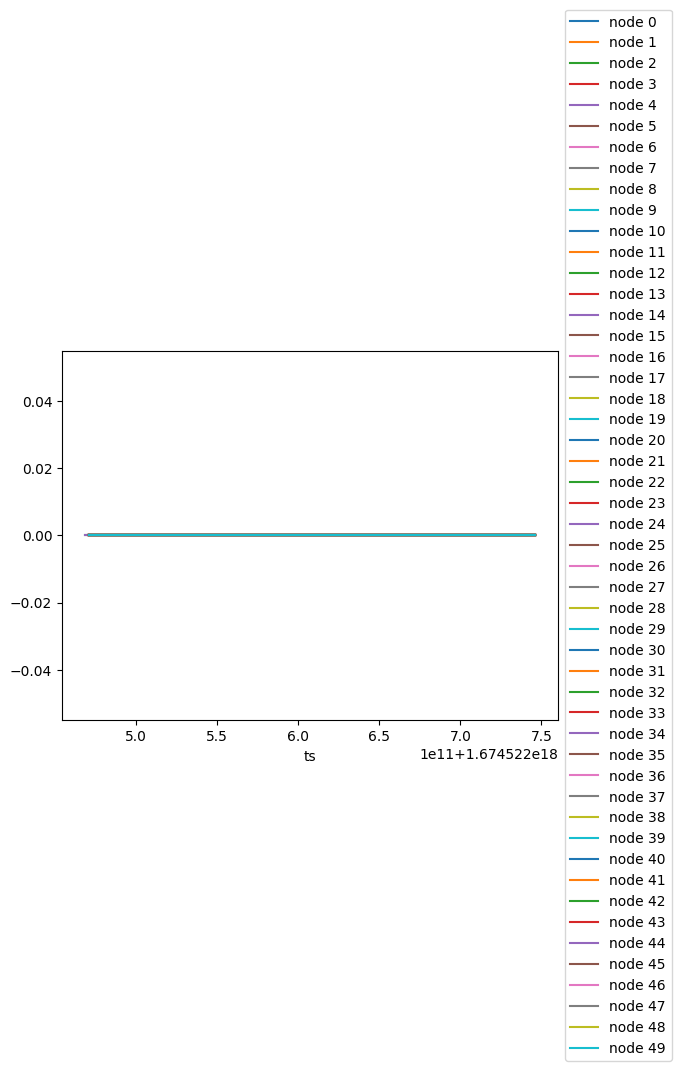

In [3751]:
# Lookups aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["Lookups"])
df2 = pd.DataFrame(nodeDiagnostics[1]["Lookups"])
df3 = pd.DataFrame(nodeDiagnostics[2]["Lookups"])
df4 = pd.DataFrame(nodeDiagnostics[3]["Lookups"])
df5 = pd.DataFrame(nodeDiagnostics[4]["Lookups"])
df6 = pd.DataFrame(nodeDiagnostics[5]["Lookups"])
df7 = pd.DataFrame(nodeDiagnostics[6]["Lookups"])
df8 = pd.DataFrame(nodeDiagnostics[7]["Lookups"])
df9 = pd.DataFrame(nodeDiagnostics[8]["Lookups"])
df10 = pd.DataFrame(nodeDiagnostics[9]["Lookups"])
df11 = pd.DataFrame(nodeDiagnostics[10]["Lookups"])
df12 = pd.DataFrame(nodeDiagnostics[11]["Lookups"])
df13 = pd.DataFrame(nodeDiagnostics[12]["Lookups"])
df14 = pd.DataFrame(nodeDiagnostics[13]["Lookups"])
df15 = pd.DataFrame(nodeDiagnostics[14]["Lookups"])
df16 = pd.DataFrame(nodeDiagnostics[15]["Lookups"])
df17 = pd.DataFrame(nodeDiagnostics[16]["Lookups"])
df18 = pd.DataFrame(nodeDiagnostics[17]["Lookups"])
df19 = pd.DataFrame(nodeDiagnostics[18]["Lookups"])
df20 = pd.DataFrame(nodeDiagnostics[19]["Lookups"])
df21 = pd.DataFrame(nodeDiagnostics[20]["Lookups"])
df22 = pd.DataFrame(nodeDiagnostics[21]["Lookups"])
df23 = pd.DataFrame(nodeDiagnostics[22]["Lookups"])
df24 = pd.DataFrame(nodeDiagnostics[23]["Lookups"])
df25 = pd.DataFrame(nodeDiagnostics[24]["Lookups"])
df26 = pd.DataFrame(nodeDiagnostics[25]["Lookups"])
df27 = pd.DataFrame(nodeDiagnostics[26]["Lookups"])
df28 = pd.DataFrame(nodeDiagnostics[27]["Lookups"])
df29 = pd.DataFrame(nodeDiagnostics[28]["Lookups"])
df30 = pd.DataFrame(nodeDiagnostics[29]["Lookups"])
df31 = pd.DataFrame(nodeDiagnostics[30]["Lookups"])
df32 = pd.DataFrame(nodeDiagnostics[31]["Lookups"])
df33 = pd.DataFrame(nodeDiagnostics[32]["Lookups"])
df34 = pd.DataFrame(nodeDiagnostics[33]["Lookups"])
df35 = pd.DataFrame(nodeDiagnostics[34]["Lookups"])
df36 = pd.DataFrame(nodeDiagnostics[35]["Lookups"])
df37 = pd.DataFrame(nodeDiagnostics[36]["Lookups"])
df38 = pd.DataFrame(nodeDiagnostics[37]["Lookups"])
df39 = pd.DataFrame(nodeDiagnostics[38]["Lookups"])
df40 = pd.DataFrame(nodeDiagnostics[39]["Lookups"])
df41 = pd.DataFrame(nodeDiagnostics[40]["Lookups"])
df42 = pd.DataFrame(nodeDiagnostics[41]["Lookups"])
df43 = pd.DataFrame(nodeDiagnostics[42]["Lookups"])
df44 = pd.DataFrame(nodeDiagnostics[43]["Lookups"])
df45 = pd.DataFrame(nodeDiagnostics[44]["Lookups"])
df46 = pd.DataFrame(nodeDiagnostics[45]["Lookups"])
df47 = pd.DataFrame(nodeDiagnostics[46]["Lookups"])
df48 = pd.DataFrame(nodeDiagnostics[47]["Lookups"])
df49 = pd.DataFrame(nodeDiagnostics[48]["Lookups"])
df50 = pd.DataFrame(nodeDiagnostics[49]["Lookups"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

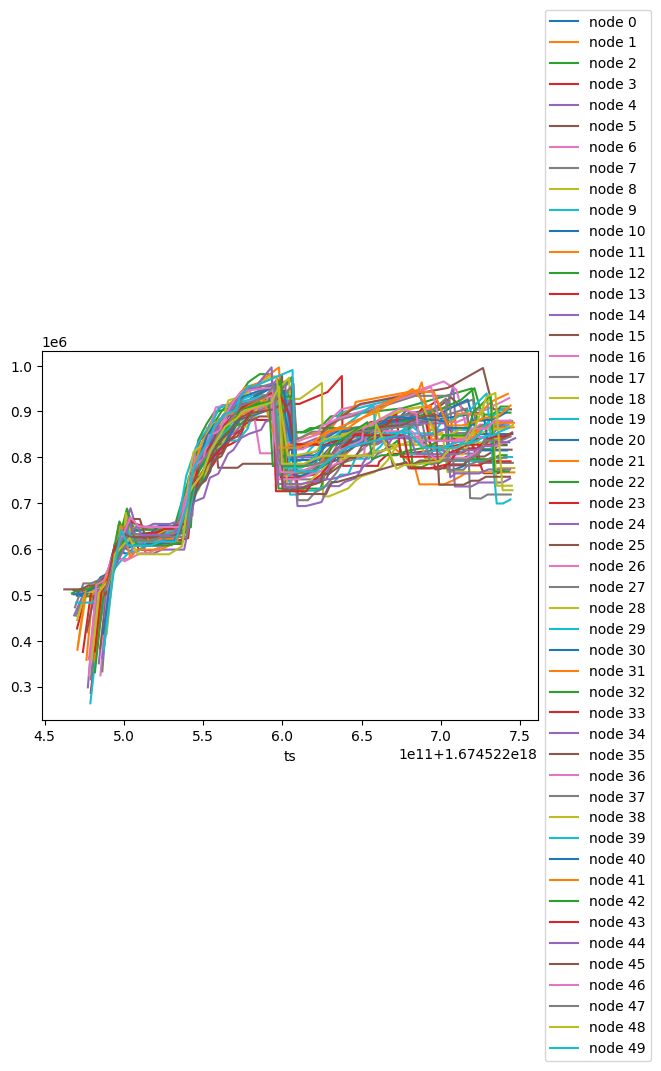

In [3752]:
# MSpanInuse aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["MSpanInuse"])
df2 = pd.DataFrame(nodeDiagnostics[1]["MSpanInuse"])
df3 = pd.DataFrame(nodeDiagnostics[2]["MSpanInuse"])
df4 = pd.DataFrame(nodeDiagnostics[3]["MSpanInuse"])
df5 = pd.DataFrame(nodeDiagnostics[4]["MSpanInuse"])
df6 = pd.DataFrame(nodeDiagnostics[5]["MSpanInuse"])
df7 = pd.DataFrame(nodeDiagnostics[6]["MSpanInuse"])
df8 = pd.DataFrame(nodeDiagnostics[7]["MSpanInuse"])
df9 = pd.DataFrame(nodeDiagnostics[8]["MSpanInuse"])
df10 = pd.DataFrame(nodeDiagnostics[9]["MSpanInuse"])
df11 = pd.DataFrame(nodeDiagnostics[10]["MSpanInuse"])
df12 = pd.DataFrame(nodeDiagnostics[11]["MSpanInuse"])
df13 = pd.DataFrame(nodeDiagnostics[12]["MSpanInuse"])
df14 = pd.DataFrame(nodeDiagnostics[13]["MSpanInuse"])
df15 = pd.DataFrame(nodeDiagnostics[14]["MSpanInuse"])
df16 = pd.DataFrame(nodeDiagnostics[15]["MSpanInuse"])
df17 = pd.DataFrame(nodeDiagnostics[16]["MSpanInuse"])
df18 = pd.DataFrame(nodeDiagnostics[17]["MSpanInuse"])
df19 = pd.DataFrame(nodeDiagnostics[18]["MSpanInuse"])
df20 = pd.DataFrame(nodeDiagnostics[19]["MSpanInuse"])
df21 = pd.DataFrame(nodeDiagnostics[20]["MSpanInuse"])
df22 = pd.DataFrame(nodeDiagnostics[21]["MSpanInuse"])
df23 = pd.DataFrame(nodeDiagnostics[22]["MSpanInuse"])
df24 = pd.DataFrame(nodeDiagnostics[23]["MSpanInuse"])
df25 = pd.DataFrame(nodeDiagnostics[24]["MSpanInuse"])
df26 = pd.DataFrame(nodeDiagnostics[25]["MSpanInuse"])
df27 = pd.DataFrame(nodeDiagnostics[26]["MSpanInuse"])
df28 = pd.DataFrame(nodeDiagnostics[27]["MSpanInuse"])
df29 = pd.DataFrame(nodeDiagnostics[28]["MSpanInuse"])
df30 = pd.DataFrame(nodeDiagnostics[29]["MSpanInuse"])
df31 = pd.DataFrame(nodeDiagnostics[30]["MSpanInuse"])
df32 = pd.DataFrame(nodeDiagnostics[31]["MSpanInuse"])
df33 = pd.DataFrame(nodeDiagnostics[32]["MSpanInuse"])
df34 = pd.DataFrame(nodeDiagnostics[33]["MSpanInuse"])
df35 = pd.DataFrame(nodeDiagnostics[34]["MSpanInuse"])
df36 = pd.DataFrame(nodeDiagnostics[35]["MSpanInuse"])
df37 = pd.DataFrame(nodeDiagnostics[36]["MSpanInuse"])
df38 = pd.DataFrame(nodeDiagnostics[37]["MSpanInuse"])
df39 = pd.DataFrame(nodeDiagnostics[38]["MSpanInuse"])
df40 = pd.DataFrame(nodeDiagnostics[39]["MSpanInuse"])
df41 = pd.DataFrame(nodeDiagnostics[40]["MSpanInuse"])
df42 = pd.DataFrame(nodeDiagnostics[41]["MSpanInuse"])
df43 = pd.DataFrame(nodeDiagnostics[42]["MSpanInuse"])
df44 = pd.DataFrame(nodeDiagnostics[43]["MSpanInuse"])
df45 = pd.DataFrame(nodeDiagnostics[44]["MSpanInuse"])
df46 = pd.DataFrame(nodeDiagnostics[45]["MSpanInuse"])
df47 = pd.DataFrame(nodeDiagnostics[46]["MSpanInuse"])
df48 = pd.DataFrame(nodeDiagnostics[47]["MSpanInuse"])
df49 = pd.DataFrame(nodeDiagnostics[48]["MSpanInuse"])
df50 = pd.DataFrame(nodeDiagnostics[49]["MSpanInuse"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)


plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

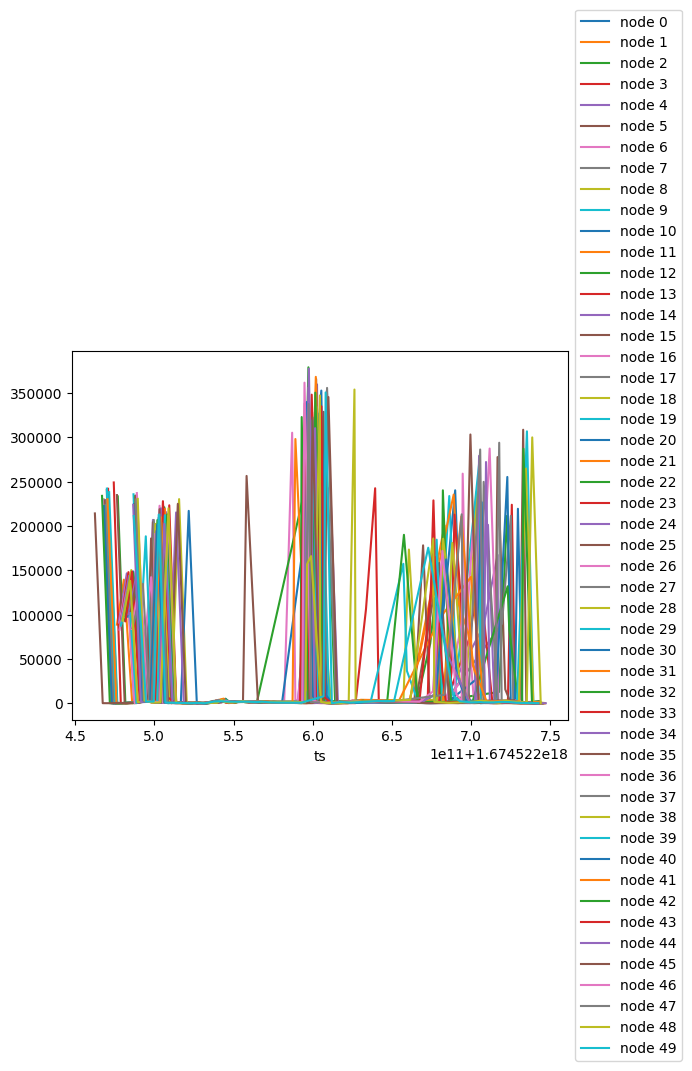

In [3753]:
# Frees aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["Frees"])
df2 = pd.DataFrame(nodeDiagnostics[1]["Frees"])
df3 = pd.DataFrame(nodeDiagnostics[2]["Frees"])
df4 = pd.DataFrame(nodeDiagnostics[3]["Frees"])
df5 = pd.DataFrame(nodeDiagnostics[4]["Frees"])
df6 = pd.DataFrame(nodeDiagnostics[5]["Frees"])
df7 = pd.DataFrame(nodeDiagnostics[6]["Frees"])
df8 = pd.DataFrame(nodeDiagnostics[7]["Frees"])
df9 = pd.DataFrame(nodeDiagnostics[8]["Frees"])
df10 = pd.DataFrame(nodeDiagnostics[9]["Frees"])
df11 = pd.DataFrame(nodeDiagnostics[10]["Frees"])
df12 = pd.DataFrame(nodeDiagnostics[11]["Frees"])
df13 = pd.DataFrame(nodeDiagnostics[12]["Frees"])
df14 = pd.DataFrame(nodeDiagnostics[13]["Frees"])
df15 = pd.DataFrame(nodeDiagnostics[14]["Frees"])
df16 = pd.DataFrame(nodeDiagnostics[15]["Frees"])
df17 = pd.DataFrame(nodeDiagnostics[16]["Frees"])
df18 = pd.DataFrame(nodeDiagnostics[17]["Frees"])
df19 = pd.DataFrame(nodeDiagnostics[18]["Frees"])
df20 = pd.DataFrame(nodeDiagnostics[19]["Frees"])
df21 = pd.DataFrame(nodeDiagnostics[20]["Frees"])
df22 = pd.DataFrame(nodeDiagnostics[21]["Frees"])
df23 = pd.DataFrame(nodeDiagnostics[22]["Frees"])
df24 = pd.DataFrame(nodeDiagnostics[23]["Frees"])
df25 = pd.DataFrame(nodeDiagnostics[24]["Frees"])
df26 = pd.DataFrame(nodeDiagnostics[25]["Frees"])
df27 = pd.DataFrame(nodeDiagnostics[26]["Frees"])
df28 = pd.DataFrame(nodeDiagnostics[27]["Frees"])
df29 = pd.DataFrame(nodeDiagnostics[28]["Frees"])
df30 = pd.DataFrame(nodeDiagnostics[29]["Frees"])
df31 = pd.DataFrame(nodeDiagnostics[30]["Frees"])
df32 = pd.DataFrame(nodeDiagnostics[31]["Frees"])
df33 = pd.DataFrame(nodeDiagnostics[32]["Frees"])
df34 = pd.DataFrame(nodeDiagnostics[33]["Frees"])
df35 = pd.DataFrame(nodeDiagnostics[34]["Frees"])
df36 = pd.DataFrame(nodeDiagnostics[35]["Frees"])
df37 = pd.DataFrame(nodeDiagnostics[36]["Frees"])
df38 = pd.DataFrame(nodeDiagnostics[37]["Frees"])
df39 = pd.DataFrame(nodeDiagnostics[38]["Frees"])
df40 = pd.DataFrame(nodeDiagnostics[39]["Frees"])
df41 = pd.DataFrame(nodeDiagnostics[40]["Frees"])
df42 = pd.DataFrame(nodeDiagnostics[41]["Frees"])
df43 = pd.DataFrame(nodeDiagnostics[42]["Frees"])
df44 = pd.DataFrame(nodeDiagnostics[43]["Frees"])
df45 = pd.DataFrame(nodeDiagnostics[44]["Frees"])
df46 = pd.DataFrame(nodeDiagnostics[45]["Frees"])
df47 = pd.DataFrame(nodeDiagnostics[46]["Frees"])
df48 = pd.DataFrame(nodeDiagnostics[47]["Frees"])
df49 = pd.DataFrame(nodeDiagnostics[48]["Frees"])
df50 = pd.DataFrame(nodeDiagnostics[49]["Frees"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)


plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

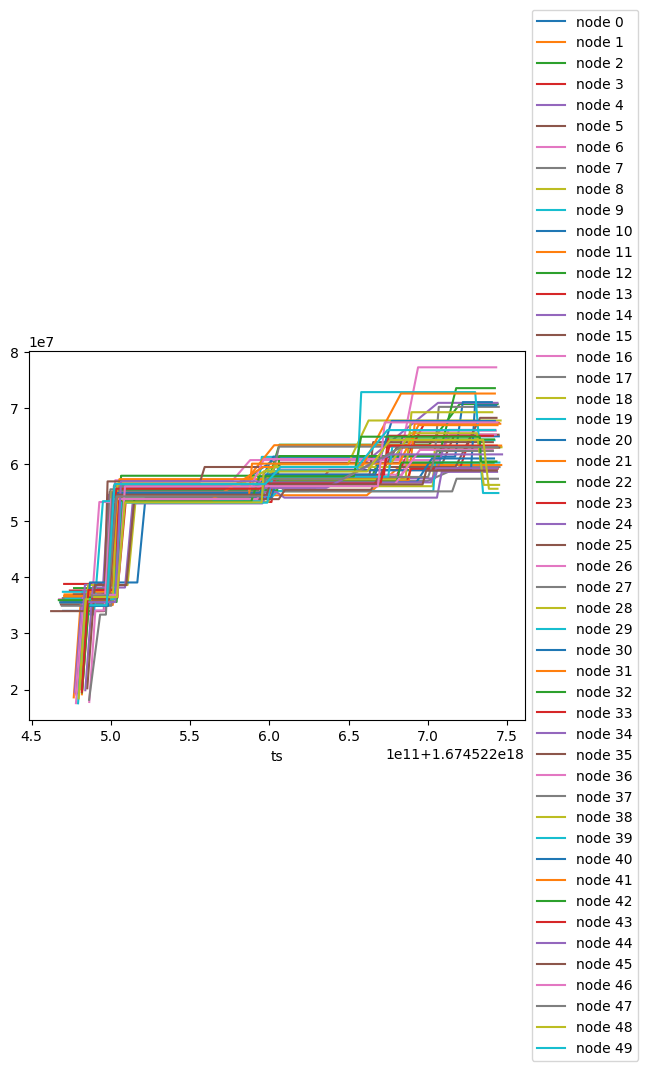

In [3754]:
# NextGC aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["NextGC"])
df2 = pd.DataFrame(nodeDiagnostics[1]["NextGC"])
df3 = pd.DataFrame(nodeDiagnostics[2]["NextGC"])
df4 = pd.DataFrame(nodeDiagnostics[3]["NextGC"])
df5 = pd.DataFrame(nodeDiagnostics[4]["NextGC"])
df6 = pd.DataFrame(nodeDiagnostics[5]["NextGC"])
df7 = pd.DataFrame(nodeDiagnostics[6]["NextGC"])
df8 = pd.DataFrame(nodeDiagnostics[7]["NextGC"])
df9 = pd.DataFrame(nodeDiagnostics[8]["NextGC"])
df10 = pd.DataFrame(nodeDiagnostics[9]["NextGC"])
df11 = pd.DataFrame(nodeDiagnostics[10]["NextGC"])
df12 = pd.DataFrame(nodeDiagnostics[11]["NextGC"])
df13 = pd.DataFrame(nodeDiagnostics[12]["NextGC"])
df14 = pd.DataFrame(nodeDiagnostics[13]["NextGC"])
df15 = pd.DataFrame(nodeDiagnostics[14]["NextGC"])
df16 = pd.DataFrame(nodeDiagnostics[15]["NextGC"])
df17 = pd.DataFrame(nodeDiagnostics[16]["NextGC"])
df18 = pd.DataFrame(nodeDiagnostics[17]["NextGC"])
df19 = pd.DataFrame(nodeDiagnostics[18]["NextGC"])
df20 = pd.DataFrame(nodeDiagnostics[19]["NextGC"])
df21 = pd.DataFrame(nodeDiagnostics[20]["NextGC"])
df22 = pd.DataFrame(nodeDiagnostics[21]["NextGC"])
df23 = pd.DataFrame(nodeDiagnostics[22]["NextGC"])
df24 = pd.DataFrame(nodeDiagnostics[23]["NextGC"])
df25 = pd.DataFrame(nodeDiagnostics[24]["NextGC"])
df26 = pd.DataFrame(nodeDiagnostics[25]["NextGC"])
df27 = pd.DataFrame(nodeDiagnostics[26]["NextGC"])
df28 = pd.DataFrame(nodeDiagnostics[27]["NextGC"])
df29 = pd.DataFrame(nodeDiagnostics[28]["NextGC"])
df30 = pd.DataFrame(nodeDiagnostics[29]["NextGC"])
df31 = pd.DataFrame(nodeDiagnostics[30]["NextGC"])
df32 = pd.DataFrame(nodeDiagnostics[31]["NextGC"])
df33 = pd.DataFrame(nodeDiagnostics[32]["NextGC"])
df34 = pd.DataFrame(nodeDiagnostics[33]["NextGC"])
df35 = pd.DataFrame(nodeDiagnostics[34]["NextGC"])
df36 = pd.DataFrame(nodeDiagnostics[35]["NextGC"])
df37 = pd.DataFrame(nodeDiagnostics[36]["NextGC"])
df38 = pd.DataFrame(nodeDiagnostics[37]["NextGC"])
df39 = pd.DataFrame(nodeDiagnostics[38]["NextGC"])
df40 = pd.DataFrame(nodeDiagnostics[39]["NextGC"])
df41 = pd.DataFrame(nodeDiagnostics[40]["NextGC"])
df42 = pd.DataFrame(nodeDiagnostics[41]["NextGC"])
df43 = pd.DataFrame(nodeDiagnostics[42]["NextGC"])
df44 = pd.DataFrame(nodeDiagnostics[43]["NextGC"])
df45 = pd.DataFrame(nodeDiagnostics[44]["NextGC"])
df46 = pd.DataFrame(nodeDiagnostics[45]["NextGC"])
df47 = pd.DataFrame(nodeDiagnostics[46]["NextGC"])
df48 = pd.DataFrame(nodeDiagnostics[47]["NextGC"])
df49 = pd.DataFrame(nodeDiagnostics[48]["NextGC"])
df50 = pd.DataFrame(nodeDiagnostics[49]["NextGC"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)


plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

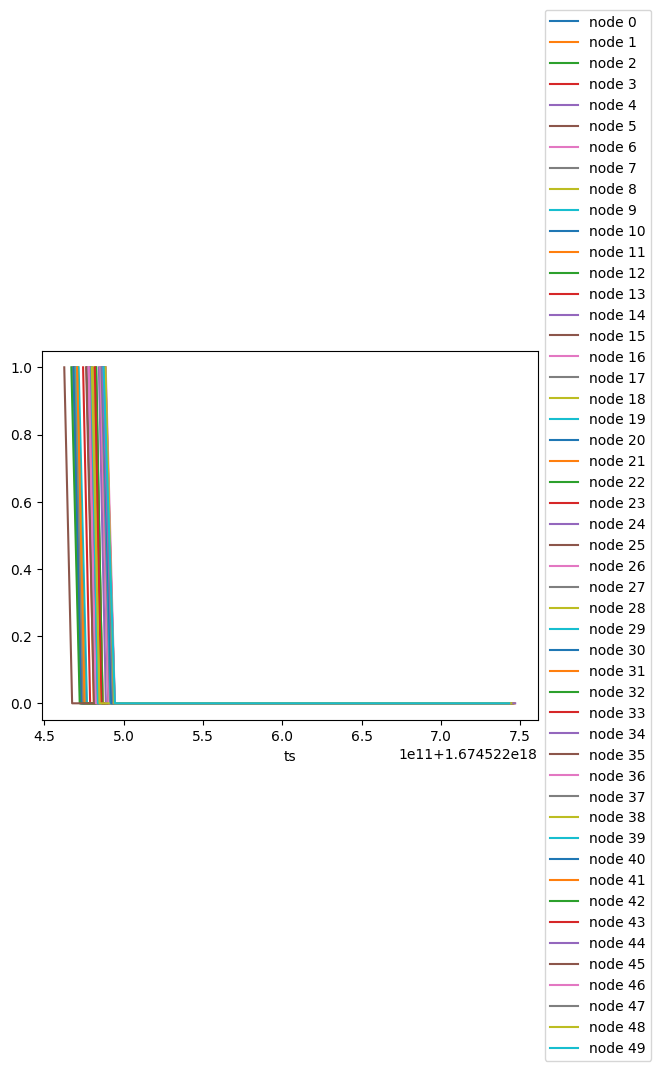

In [3755]:
# NumCgoCall aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["NumCgoCall"])
df2 = pd.DataFrame(nodeDiagnostics[1]["NumCgoCall"])
df3 = pd.DataFrame(nodeDiagnostics[2]["NumCgoCall"])
df4 = pd.DataFrame(nodeDiagnostics[3]["NumCgoCall"])
df5 = pd.DataFrame(nodeDiagnostics[4]["NumCgoCall"])
df6 = pd.DataFrame(nodeDiagnostics[5]["NumCgoCall"])
df7 = pd.DataFrame(nodeDiagnostics[6]["NumCgoCall"])
df8 = pd.DataFrame(nodeDiagnostics[7]["NumCgoCall"])
df9 = pd.DataFrame(nodeDiagnostics[8]["NumCgoCall"])
df10 = pd.DataFrame(nodeDiagnostics[9]["NumCgoCall"])
df11 = pd.DataFrame(nodeDiagnostics[10]["NumCgoCall"])
df12 = pd.DataFrame(nodeDiagnostics[11]["NumCgoCall"])
df13 = pd.DataFrame(nodeDiagnostics[12]["NumCgoCall"])
df14 = pd.DataFrame(nodeDiagnostics[13]["NumCgoCall"])
df15 = pd.DataFrame(nodeDiagnostics[14]["NumCgoCall"])
df16 = pd.DataFrame(nodeDiagnostics[15]["NumCgoCall"])
df17 = pd.DataFrame(nodeDiagnostics[16]["NumCgoCall"])
df18 = pd.DataFrame(nodeDiagnostics[17]["NumCgoCall"])
df19 = pd.DataFrame(nodeDiagnostics[18]["NumCgoCall"])
df20 = pd.DataFrame(nodeDiagnostics[19]["NumCgoCall"])
df21 = pd.DataFrame(nodeDiagnostics[20]["NumCgoCall"])
df22 = pd.DataFrame(nodeDiagnostics[21]["NumCgoCall"])
df23 = pd.DataFrame(nodeDiagnostics[22]["NumCgoCall"])
df24 = pd.DataFrame(nodeDiagnostics[23]["NumCgoCall"])
df25 = pd.DataFrame(nodeDiagnostics[24]["NumCgoCall"])
df26 = pd.DataFrame(nodeDiagnostics[25]["NumCgoCall"])
df27 = pd.DataFrame(nodeDiagnostics[26]["NumCgoCall"])
df28 = pd.DataFrame(nodeDiagnostics[27]["NumCgoCall"])
df29 = pd.DataFrame(nodeDiagnostics[28]["NumCgoCall"])
df30 = pd.DataFrame(nodeDiagnostics[29]["NumCgoCall"])
df31 = pd.DataFrame(nodeDiagnostics[30]["NumCgoCall"])
df32 = pd.DataFrame(nodeDiagnostics[31]["NumCgoCall"])
df33 = pd.DataFrame(nodeDiagnostics[32]["NumCgoCall"])
df34 = pd.DataFrame(nodeDiagnostics[33]["NumCgoCall"])
df35 = pd.DataFrame(nodeDiagnostics[34]["NumCgoCall"])
df36 = pd.DataFrame(nodeDiagnostics[35]["NumCgoCall"])
df37 = pd.DataFrame(nodeDiagnostics[36]["NumCgoCall"])
df38 = pd.DataFrame(nodeDiagnostics[37]["NumCgoCall"])
df39 = pd.DataFrame(nodeDiagnostics[38]["NumCgoCall"])
df40 = pd.DataFrame(nodeDiagnostics[39]["NumCgoCall"])
df41 = pd.DataFrame(nodeDiagnostics[40]["NumCgoCall"])
df42 = pd.DataFrame(nodeDiagnostics[41]["NumCgoCall"])
df43 = pd.DataFrame(nodeDiagnostics[42]["NumCgoCall"])
df44 = pd.DataFrame(nodeDiagnostics[43]["NumCgoCall"])
df45 = pd.DataFrame(nodeDiagnostics[44]["NumCgoCall"])
df46 = pd.DataFrame(nodeDiagnostics[45]["NumCgoCall"])
df47 = pd.DataFrame(nodeDiagnostics[46]["NumCgoCall"])
df48 = pd.DataFrame(nodeDiagnostics[47]["NumCgoCall"])
df49 = pd.DataFrame(nodeDiagnostics[48]["NumCgoCall"])
df50 = pd.DataFrame(nodeDiagnostics[49]["NumCgoCall"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)


plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

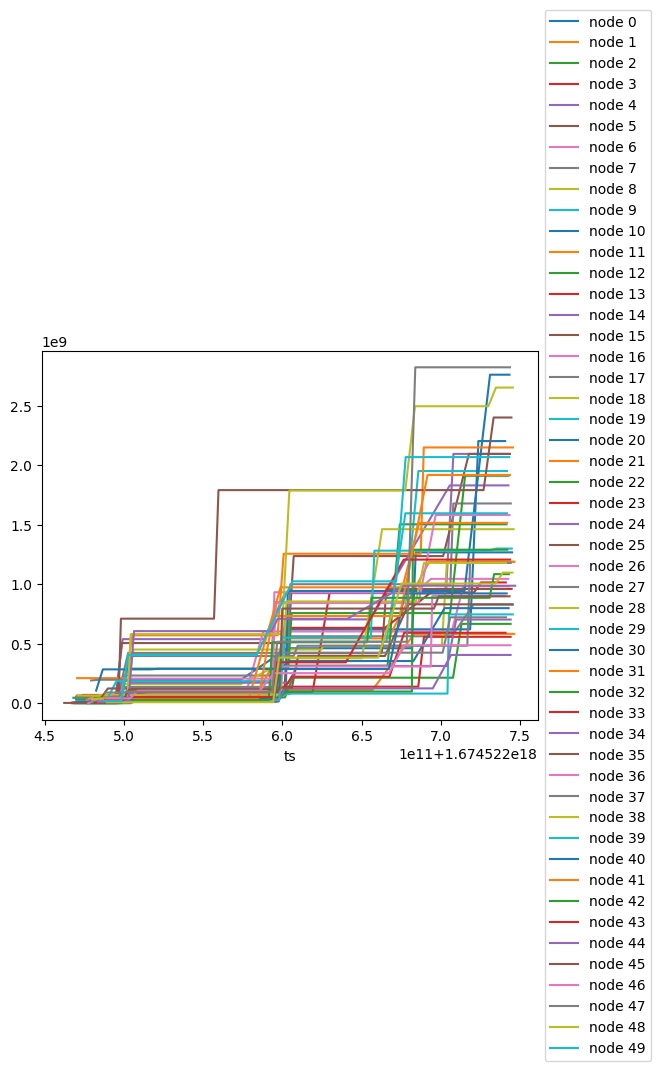

In [3756]:
# PauseTotalNs aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["PauseTotalNs"])
df2 = pd.DataFrame(nodeDiagnostics[1]["PauseTotalNs"])
df3 = pd.DataFrame(nodeDiagnostics[2]["PauseTotalNs"])
df4 = pd.DataFrame(nodeDiagnostics[3]["PauseTotalNs"])
df5 = pd.DataFrame(nodeDiagnostics[4]["PauseTotalNs"])
df6 = pd.DataFrame(nodeDiagnostics[5]["PauseTotalNs"])
df7 = pd.DataFrame(nodeDiagnostics[6]["PauseTotalNs"])
df8 = pd.DataFrame(nodeDiagnostics[7]["PauseTotalNs"])
df9 = pd.DataFrame(nodeDiagnostics[8]["PauseTotalNs"])
df10 = pd.DataFrame(nodeDiagnostics[9]["PauseTotalNs"])
df11 = pd.DataFrame(nodeDiagnostics[10]["PauseTotalNs"])
df12 = pd.DataFrame(nodeDiagnostics[11]["PauseTotalNs"])
df13 = pd.DataFrame(nodeDiagnostics[12]["PauseTotalNs"])
df14 = pd.DataFrame(nodeDiagnostics[13]["PauseTotalNs"])
df15 = pd.DataFrame(nodeDiagnostics[14]["PauseTotalNs"])
df16 = pd.DataFrame(nodeDiagnostics[15]["PauseTotalNs"])
df17 = pd.DataFrame(nodeDiagnostics[16]["PauseTotalNs"])
df18 = pd.DataFrame(nodeDiagnostics[17]["PauseTotalNs"])
df19 = pd.DataFrame(nodeDiagnostics[18]["PauseTotalNs"])
df20 = pd.DataFrame(nodeDiagnostics[19]["PauseTotalNs"])
df21 = pd.DataFrame(nodeDiagnostics[20]["PauseTotalNs"])
df22 = pd.DataFrame(nodeDiagnostics[21]["PauseTotalNs"])
df23 = pd.DataFrame(nodeDiagnostics[22]["PauseTotalNs"])
df24 = pd.DataFrame(nodeDiagnostics[23]["PauseTotalNs"])
df25 = pd.DataFrame(nodeDiagnostics[24]["PauseTotalNs"])
df26 = pd.DataFrame(nodeDiagnostics[25]["PauseTotalNs"])
df27 = pd.DataFrame(nodeDiagnostics[26]["PauseTotalNs"])
df28 = pd.DataFrame(nodeDiagnostics[27]["PauseTotalNs"])
df29 = pd.DataFrame(nodeDiagnostics[28]["PauseTotalNs"])
df30 = pd.DataFrame(nodeDiagnostics[29]["PauseTotalNs"])
df31 = pd.DataFrame(nodeDiagnostics[30]["PauseTotalNs"])
df32 = pd.DataFrame(nodeDiagnostics[31]["PauseTotalNs"])
df33 = pd.DataFrame(nodeDiagnostics[32]["PauseTotalNs"])
df34 = pd.DataFrame(nodeDiagnostics[33]["PauseTotalNs"])
df35 = pd.DataFrame(nodeDiagnostics[34]["PauseTotalNs"])
df36 = pd.DataFrame(nodeDiagnostics[35]["PauseTotalNs"])
df37 = pd.DataFrame(nodeDiagnostics[36]["PauseTotalNs"])
df38 = pd.DataFrame(nodeDiagnostics[37]["PauseTotalNs"])
df39 = pd.DataFrame(nodeDiagnostics[38]["PauseTotalNs"])
df40 = pd.DataFrame(nodeDiagnostics[39]["PauseTotalNs"])
df41 = pd.DataFrame(nodeDiagnostics[40]["PauseTotalNs"])
df42 = pd.DataFrame(nodeDiagnostics[41]["PauseTotalNs"])
df43 = pd.DataFrame(nodeDiagnostics[42]["PauseTotalNs"])
df44 = pd.DataFrame(nodeDiagnostics[43]["PauseTotalNs"])
df45 = pd.DataFrame(nodeDiagnostics[44]["PauseTotalNs"])
df46 = pd.DataFrame(nodeDiagnostics[45]["PauseTotalNs"])
df47 = pd.DataFrame(nodeDiagnostics[46]["PauseTotalNs"])
df48 = pd.DataFrame(nodeDiagnostics[47]["PauseTotalNs"])
df49 = pd.DataFrame(nodeDiagnostics[48]["PauseTotalNs"])
df50 = pd.DataFrame(nodeDiagnostics[49]["PauseTotalNs"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)


plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

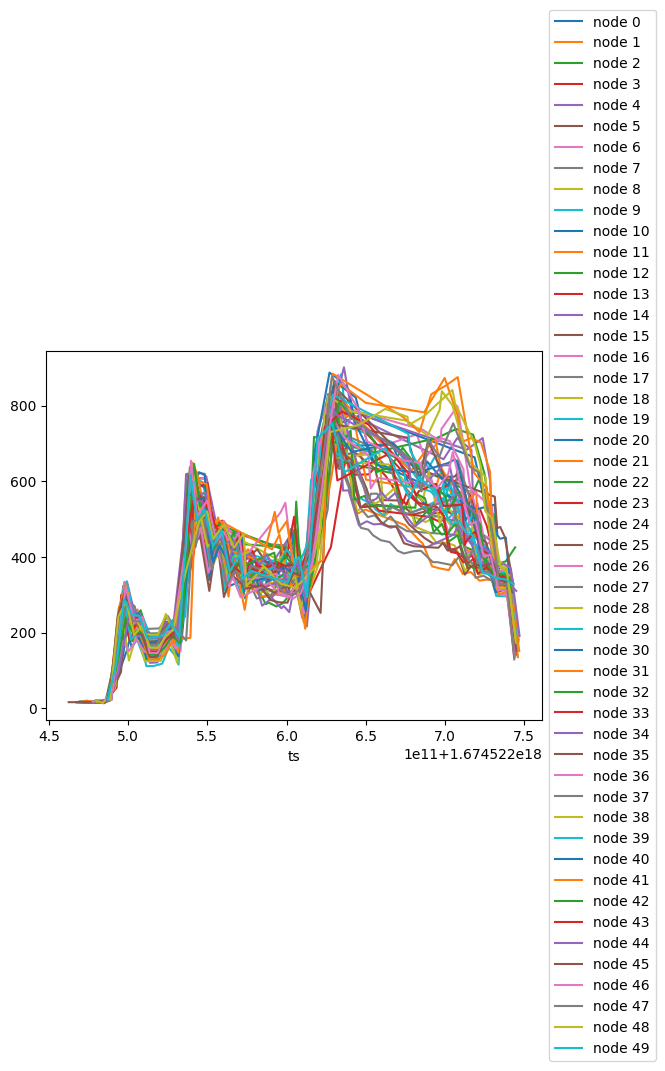

In [3757]:
# NumGoroutine aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["NumGoroutine"])
df2 = pd.DataFrame(nodeDiagnostics[1]["NumGoroutine"])
df3 = pd.DataFrame(nodeDiagnostics[2]["NumGoroutine"])
df4 = pd.DataFrame(nodeDiagnostics[3]["NumGoroutine"])
df5 = pd.DataFrame(nodeDiagnostics[4]["NumGoroutine"])
df6 = pd.DataFrame(nodeDiagnostics[5]["NumGoroutine"])
df7 = pd.DataFrame(nodeDiagnostics[6]["NumGoroutine"])
df8 = pd.DataFrame(nodeDiagnostics[7]["NumGoroutine"])
df9 = pd.DataFrame(nodeDiagnostics[8]["NumGoroutine"])
df10 = pd.DataFrame(nodeDiagnostics[9]["NumGoroutine"])
df11 = pd.DataFrame(nodeDiagnostics[10]["NumGoroutine"])
df12 = pd.DataFrame(nodeDiagnostics[11]["NumGoroutine"])
df13 = pd.DataFrame(nodeDiagnostics[12]["NumGoroutine"])
df14 = pd.DataFrame(nodeDiagnostics[13]["NumGoroutine"])
df15 = pd.DataFrame(nodeDiagnostics[14]["NumGoroutine"])
df16 = pd.DataFrame(nodeDiagnostics[15]["NumGoroutine"])
df17 = pd.DataFrame(nodeDiagnostics[16]["NumGoroutine"])
df18 = pd.DataFrame(nodeDiagnostics[17]["NumGoroutine"])
df19 = pd.DataFrame(nodeDiagnostics[18]["NumGoroutine"])
df20 = pd.DataFrame(nodeDiagnostics[19]["NumGoroutine"])
df21 = pd.DataFrame(nodeDiagnostics[20]["NumGoroutine"])
df22 = pd.DataFrame(nodeDiagnostics[21]["NumGoroutine"])
df23 = pd.DataFrame(nodeDiagnostics[22]["NumGoroutine"])
df24 = pd.DataFrame(nodeDiagnostics[23]["NumGoroutine"])
df25 = pd.DataFrame(nodeDiagnostics[24]["NumGoroutine"])
df26 = pd.DataFrame(nodeDiagnostics[25]["NumGoroutine"])
df27 = pd.DataFrame(nodeDiagnostics[26]["NumGoroutine"])
df28 = pd.DataFrame(nodeDiagnostics[27]["NumGoroutine"])
df29 = pd.DataFrame(nodeDiagnostics[28]["NumGoroutine"])
df30 = pd.DataFrame(nodeDiagnostics[29]["NumGoroutine"])
df31 = pd.DataFrame(nodeDiagnostics[30]["NumGoroutine"])
df32 = pd.DataFrame(nodeDiagnostics[31]["NumGoroutine"])
df33 = pd.DataFrame(nodeDiagnostics[32]["NumGoroutine"])
df34 = pd.DataFrame(nodeDiagnostics[33]["NumGoroutine"])
df35 = pd.DataFrame(nodeDiagnostics[34]["NumGoroutine"])
df36 = pd.DataFrame(nodeDiagnostics[35]["NumGoroutine"])
df37 = pd.DataFrame(nodeDiagnostics[36]["NumGoroutine"])
df38 = pd.DataFrame(nodeDiagnostics[37]["NumGoroutine"])
df39 = pd.DataFrame(nodeDiagnostics[38]["NumGoroutine"])
df40 = pd.DataFrame(nodeDiagnostics[39]["NumGoroutine"])
df41 = pd.DataFrame(nodeDiagnostics[40]["NumGoroutine"])
df42 = pd.DataFrame(nodeDiagnostics[41]["NumGoroutine"])
df43 = pd.DataFrame(nodeDiagnostics[42]["NumGoroutine"])
df44 = pd.DataFrame(nodeDiagnostics[43]["NumGoroutine"])
df45 = pd.DataFrame(nodeDiagnostics[44]["NumGoroutine"])
df46 = pd.DataFrame(nodeDiagnostics[45]["NumGoroutine"])
df47 = pd.DataFrame(nodeDiagnostics[46]["NumGoroutine"])
df48 = pd.DataFrame(nodeDiagnostics[47]["NumGoroutine"])
df49 = pd.DataFrame(nodeDiagnostics[48]["NumGoroutine"])
df50 = pd.DataFrame(nodeDiagnostics[49]["NumGoroutine"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)


plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

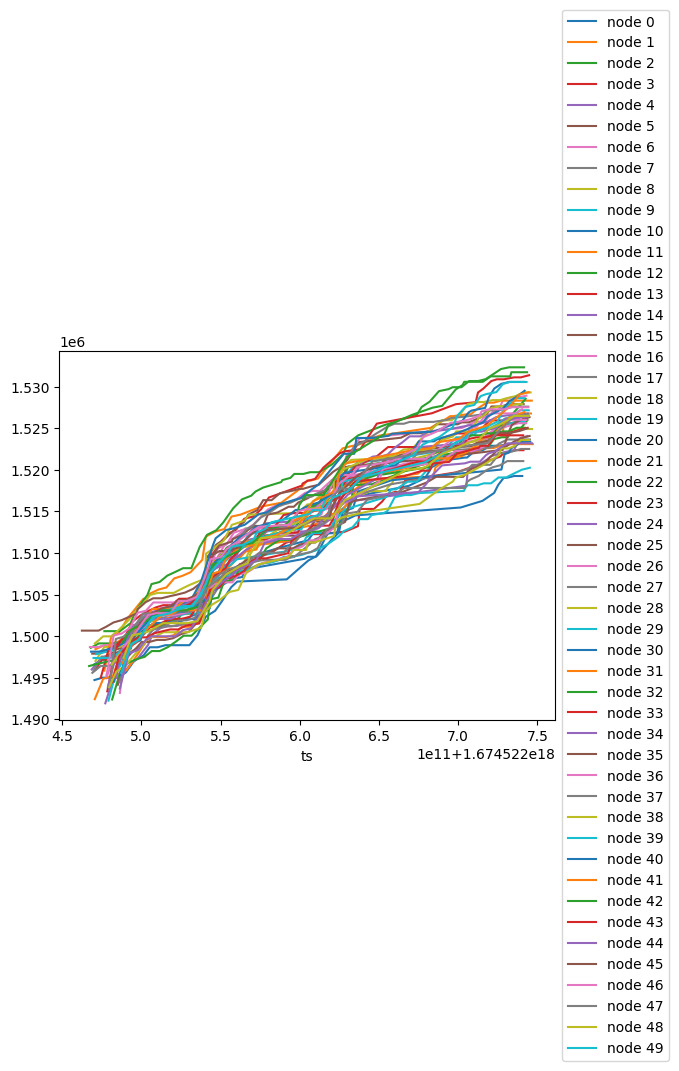

In [3758]:
# BuckHashSys aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["BuckHashSys"])
df2 = pd.DataFrame(nodeDiagnostics[1]["BuckHashSys"])
df3 = pd.DataFrame(nodeDiagnostics[2]["BuckHashSys"])
df4 = pd.DataFrame(nodeDiagnostics[3]["BuckHashSys"])
df5 = pd.DataFrame(nodeDiagnostics[4]["BuckHashSys"])
df6 = pd.DataFrame(nodeDiagnostics[5]["BuckHashSys"])
df7 = pd.DataFrame(nodeDiagnostics[6]["BuckHashSys"])
df8 = pd.DataFrame(nodeDiagnostics[7]["BuckHashSys"])
df9 = pd.DataFrame(nodeDiagnostics[8]["BuckHashSys"])
df10 = pd.DataFrame(nodeDiagnostics[9]["BuckHashSys"])
df11 = pd.DataFrame(nodeDiagnostics[10]["BuckHashSys"])
df12 = pd.DataFrame(nodeDiagnostics[11]["BuckHashSys"])
df13 = pd.DataFrame(nodeDiagnostics[12]["BuckHashSys"])
df14 = pd.DataFrame(nodeDiagnostics[13]["BuckHashSys"])
df15 = pd.DataFrame(nodeDiagnostics[14]["BuckHashSys"])
df16 = pd.DataFrame(nodeDiagnostics[15]["BuckHashSys"])
df17 = pd.DataFrame(nodeDiagnostics[16]["BuckHashSys"])
df18 = pd.DataFrame(nodeDiagnostics[17]["BuckHashSys"])
df19 = pd.DataFrame(nodeDiagnostics[18]["BuckHashSys"])
df20 = pd.DataFrame(nodeDiagnostics[19]["BuckHashSys"])
df21 = pd.DataFrame(nodeDiagnostics[20]["BuckHashSys"])
df22 = pd.DataFrame(nodeDiagnostics[21]["BuckHashSys"])
df23 = pd.DataFrame(nodeDiagnostics[22]["BuckHashSys"])
df24 = pd.DataFrame(nodeDiagnostics[23]["BuckHashSys"])
df25 = pd.DataFrame(nodeDiagnostics[24]["BuckHashSys"])
df26 = pd.DataFrame(nodeDiagnostics[25]["BuckHashSys"])
df27 = pd.DataFrame(nodeDiagnostics[26]["BuckHashSys"])
df28 = pd.DataFrame(nodeDiagnostics[27]["BuckHashSys"])
df29 = pd.DataFrame(nodeDiagnostics[28]["BuckHashSys"])
df30 = pd.DataFrame(nodeDiagnostics[29]["BuckHashSys"])
df31 = pd.DataFrame(nodeDiagnostics[30]["BuckHashSys"])
df32 = pd.DataFrame(nodeDiagnostics[31]["BuckHashSys"])
df33 = pd.DataFrame(nodeDiagnostics[32]["BuckHashSys"])
df34 = pd.DataFrame(nodeDiagnostics[33]["BuckHashSys"])
df35 = pd.DataFrame(nodeDiagnostics[34]["BuckHashSys"])
df36 = pd.DataFrame(nodeDiagnostics[35]["BuckHashSys"])
df37 = pd.DataFrame(nodeDiagnostics[36]["BuckHashSys"])
df38 = pd.DataFrame(nodeDiagnostics[37]["BuckHashSys"])
df39 = pd.DataFrame(nodeDiagnostics[38]["BuckHashSys"])
df40 = pd.DataFrame(nodeDiagnostics[39]["BuckHashSys"])
df41 = pd.DataFrame(nodeDiagnostics[40]["BuckHashSys"])
df42 = pd.DataFrame(nodeDiagnostics[41]["BuckHashSys"])
df43 = pd.DataFrame(nodeDiagnostics[42]["BuckHashSys"])
df44 = pd.DataFrame(nodeDiagnostics[43]["BuckHashSys"])
df45 = pd.DataFrame(nodeDiagnostics[44]["BuckHashSys"])
df46 = pd.DataFrame(nodeDiagnostics[45]["BuckHashSys"])
df47 = pd.DataFrame(nodeDiagnostics[46]["BuckHashSys"])
df48 = pd.DataFrame(nodeDiagnostics[47]["BuckHashSys"])
df49 = pd.DataFrame(nodeDiagnostics[48]["BuckHashSys"])
df50 = pd.DataFrame(nodeDiagnostics[49]["BuckHashSys"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df6.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df7.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df8.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df9.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df10.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df11.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df12.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df13.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df14.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df15.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df16.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df17.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df18.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df19.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df20.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df21.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df22.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df23.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df24.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df25.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df26.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df27.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df28.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df29.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df30.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df31.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df32.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df33.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df34.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df35.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df36.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df37.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df38.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df39.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df40.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df41.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df42.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df43.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df44.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df45.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df46.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df47.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df48.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df49.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df50.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


<Figure size 640x480 with 0 Axes>

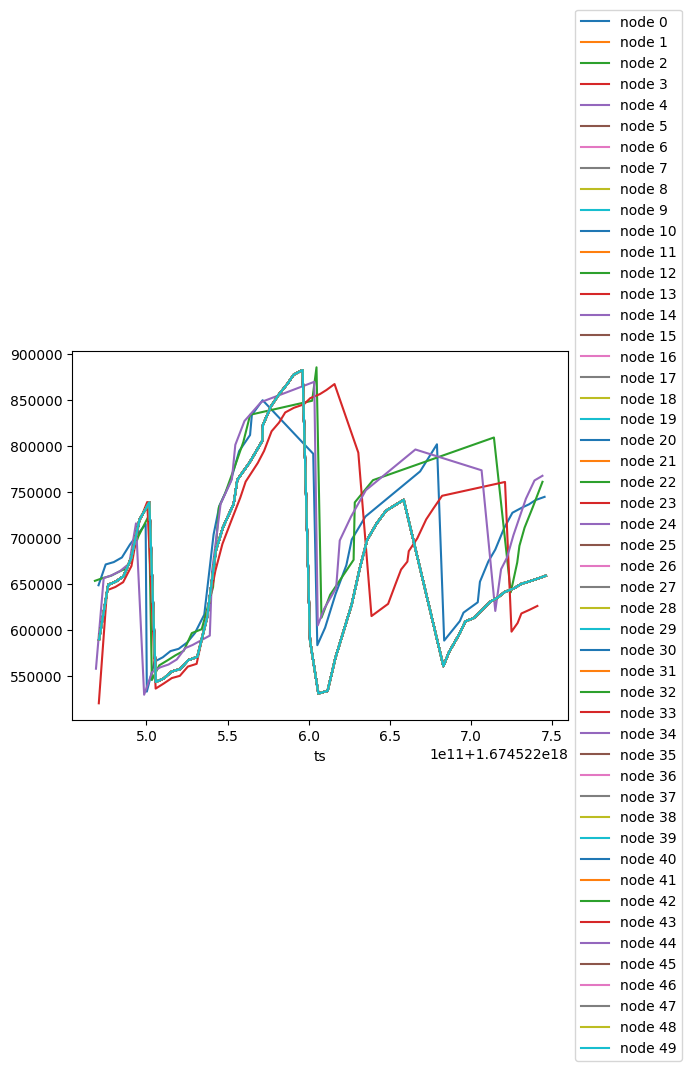

In [3759]:
# HeapObjects aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["HeapObjects"])
df2 = pd.DataFrame(nodeDiagnostics[1]["HeapObjects"])
df3 = pd.DataFrame(nodeDiagnostics[2]["HeapObjects"])
df4 = pd.DataFrame(nodeDiagnostics[3]["HeapObjects"])
df5 = pd.DataFrame(nodeDiagnostics[4]["HeapObjects"])
df6 = pd.DataFrame(nodeDiagnostics[5]["HeapObjects"])
df7 = pd.DataFrame(nodeDiagnostics[6]["HeapObjects"])
df8 = pd.DataFrame(nodeDiagnostics[7]["HeapObjects"])
df9 = pd.DataFrame(nodeDiagnostics[8]["HeapObjects"])
df10 = pd.DataFrame(nodeDiagnostics[9]["HeapObjects"])
df11 = pd.DataFrame(nodeDiagnostics[10]["HeapObjects"])
df12 = pd.DataFrame(nodeDiagnostics[11]["HeapObjects"])
df13 = pd.DataFrame(nodeDiagnostics[12]["HeapObjects"])
df14 = pd.DataFrame(nodeDiagnostics[13]["HeapObjects"])
df15 = pd.DataFrame(nodeDiagnostics[14]["HeapObjects"])
df16 = pd.DataFrame(nodeDiagnostics[15]["HeapObjects"])
df17 = pd.DataFrame(nodeDiagnostics[16]["HeapObjects"])
df18 = pd.DataFrame(nodeDiagnostics[17]["HeapObjects"])
df19 = pd.DataFrame(nodeDiagnostics[18]["HeapObjects"])
df20 = pd.DataFrame(nodeDiagnostics[19]["HeapObjects"])
df21 = pd.DataFrame(nodeDiagnostics[20]["HeapObjects"])
df22 = pd.DataFrame(nodeDiagnostics[21]["HeapObjects"])
df23 = pd.DataFrame(nodeDiagnostics[22]["HeapObjects"])
df24 = pd.DataFrame(nodeDiagnostics[23]["HeapObjects"])
df25 = pd.DataFrame(nodeDiagnostics[24]["HeapObjects"])
df26 = pd.DataFrame(nodeDiagnostics[25]["HeapObjects"])
df27 = pd.DataFrame(nodeDiagnostics[26]["HeapObjects"])
df28 = pd.DataFrame(nodeDiagnostics[27]["HeapObjects"])
df29 = pd.DataFrame(nodeDiagnostics[28]["HeapObjects"])
df30 = pd.DataFrame(nodeDiagnostics[29]["HeapObjects"])
df31 = pd.DataFrame(nodeDiagnostics[30]["HeapObjects"])
df32 = pd.DataFrame(nodeDiagnostics[31]["HeapObjects"])
df33 = pd.DataFrame(nodeDiagnostics[32]["HeapObjects"])
df34 = pd.DataFrame(nodeDiagnostics[33]["HeapObjects"])
df35 = pd.DataFrame(nodeDiagnostics[34]["HeapObjects"])
df36 = pd.DataFrame(nodeDiagnostics[35]["HeapObjects"])
df37 = pd.DataFrame(nodeDiagnostics[36]["HeapObjects"])
df38 = pd.DataFrame(nodeDiagnostics[37]["HeapObjects"])
df39 = pd.DataFrame(nodeDiagnostics[38]["HeapObjects"])
df40 = pd.DataFrame(nodeDiagnostics[39]["HeapObjects"])
df41 = pd.DataFrame(nodeDiagnostics[40]["HeapObjects"])
df42 = pd.DataFrame(nodeDiagnostics[41]["HeapObjects"])
df43 = pd.DataFrame(nodeDiagnostics[42]["HeapObjects"])
df44 = pd.DataFrame(nodeDiagnostics[43]["HeapObjects"])
df45 = pd.DataFrame(nodeDiagnostics[44]["HeapObjects"])
df46 = pd.DataFrame(nodeDiagnostics[45]["HeapObjects"])
df47 = pd.DataFrame(nodeDiagnostics[46]["HeapObjects"])
df48 = pd.DataFrame(nodeDiagnostics[47]["HeapObjects"])
df49 = pd.DataFrame(nodeDiagnostics[48]["HeapObjects"])
df50 = pd.DataFrame(nodeDiagnostics[49]["HeapObjects"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()
